In [1]:
import pandas as pd
import sys
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt

# Precinct Shapefile

## VEST's Documentation File

Election results from Illinois State Board of Elections(https://www.elections.il.gov/electionoperations/votetotalsearch.aspx)

Precinct shapefile from the U.S. Census Bureau's 2020 Redistricting Data Program final release.

Countywide votes were distributed for Bureau, Kankakee, Livingston, Macon, Perry, Sangamon. It was just 6 votes in Sangamon and 1 to 3 votes in each of the other counties.

The following modifications were made to match precinct boundaries in use for the 2020 general election.

Washington: Merge Hoyleton 1/2
Winnebago: Adjust Rockton 5/11/12/13

- G20PREDBID - Joseph R. Biden (Democratic Party)
- G20PRERTRU - Donald J. Trump (Republican Party)
- G20PRELJOR - Jo Jorgensen (Libertarian Party)
- G20PREGHAW - Howie Hawkins (Green Party)
- G20PREACAR - Brian Carroll (American Solidarity Party)
- G20PRESLAR - Gloria La Riva (Party for Socialism and Liberation)


- G20USSDDUR - Richard J. Durbin (Democratic Party)
- G20USSRCUR - Mark C. Curran Jr. (Republican Party)
- G20USSIWIL - Willie L. Wilson (Willie Wilson Party)
- G20USSLMAL - Danny Malouf (Libertarian Party)
- G20USSGBLA - David F. Black (Green Party)


## Load VEST's Final File

In [2]:
vest_shp = gp.read_file("./raw-from-source/VEST/il_2020/il_2020.shp")

In [3]:
vest_shp.shape

(10083, 17)

In [4]:
vest_shp.head(1)

,STATEFP20,COUNTYFP20,VTDST20,GEOID20,NAME20,G20PREDBID,G20PRERTRU,G20PRELJOR,G20PREGHAW,G20PREACAR,G20PRESLAR,G20USSDDUR,G20USSRCUR,G20USSIWIL,G20USSLMAL,G20USSGBLA,geometry
0,17,019,CN0100,17019CN0100,Cunningham 1,753,62,7,9,2,5,684,51,70,12,15,"POLYGON ((-88.23247 40.13302, -88.23175 40.134..."


<AxesSubplot:>

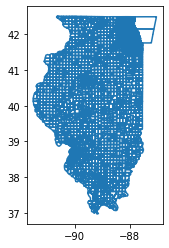

In [5]:
vest_shp.boundary.plot()

# Loading, Combining Election Results

## Load County Fips File

In [6]:
#Load in the nationwide FIPS file
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="Illinois"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)

#Make the FIPS three digits
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)

#Create the dictionary
fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))

## Presidential Results

In [7]:
pres_results = pd.read_csv('./raw-from-source/SOS/58-120-PRESIDENT AND VICE PRESIDENT-2020GE.csv')
pres_results.head()

,JurisdictionID,JurisContainerID,JurisName,EISCandidateID,CandidateName,EISContestID,ContestName,PrecinctName,Registration,EISPartyID,PartyName,VoteCount
0,1,0,ADAMS,100,JOSEPH R. BIDEN,120,PRESIDENT AND VICE PRESIDENT,BEVERLY 1,223,11,DEMOCRATIC,21
1,1,0,ADAMS,100,JOSEPH R. BIDEN,120,PRESIDENT AND VICE PRESIDENT,BURTON 1,666,11,DEMOCRATIC,67
2,1,0,ADAMS,100,JOSEPH R. BIDEN,120,PRESIDENT AND VICE PRESIDENT,CAMP POINT 1,520,11,DEMOCRATIC,59
3,1,0,ADAMS,100,JOSEPH R. BIDEN,120,PRESIDENT AND VICE PRESIDENT,CAMP POINT 2,574,11,DEMOCRATIC,49
4,1,0,ADAMS,100,JOSEPH R. BIDEN,120,PRESIDENT AND VICE PRESIDENT,CLAYTON 1,622,11,DEMOCRATIC,91


In [8]:
pres_pivot = pres_results.pivot_table(index = ['JurisdictionID','JurisName','PrecinctName'],
                         columns = ['ContestName','CandidateName'],
                        values = ['VoteCount'],
                         aggfunc = 'sum')
pres_pivot.reset_index(inplace = True)
pres_pivot.head()

JurisdictionID JurisName  PrecinctName  \
ContestName                                            
CandidateName                                          
0                          1     ADAMS     BEVERLY 1   
1                          1     ADAMS      BURTON 1   
2                          1     ADAMS  CAMP POINT 1   
3                          1     ADAMS  CAMP POINT 2   
4                          1     ADAMS     CLAYTON 1   

                                 VoteCount                                 \
ContestName   PRESIDENT AND VICE PRESIDENT                                  
CandidateName                BRIAN CARROLL DONALD J. TRUMP GLORIA LA RIVA   
0                                      0.0           147.0            0.0   
1                                      0.0           494.0            0.0   
2                                      1.0           349.0            0.0   
3                                      0.0           403.0            0.0   
4                                      0.0           383.0            1.0   

                                                                            \
ContestName                                                                  
CandidateName HOWIE HAWKINS JO JORGENSEN JOSEPH R. BIDEN WRITE-IN Write-In   
0                       0.0          0.0            21.0      NaN      NaN   
1                       1.0          8.0            67.0      NaN      NaN   
2                       4.0          8.0            59.0      NaN      NaN   
3                       3.0          3.0            49.0      NaN      NaN   
4                       1.0          2.0            91.0      NaN      NaN   

                        
ContestName             
CandidateName Write-in  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN

In [9]:
pres_pivot.columns = ['JurisdictionID','JurisName','PrecinctName','G20PREACAR','G20PRERTRU','G20PRESLAR','G20PREGHAW','G20PRELJOR','G20PREDBID','wi1','wi2','wi3']
pres_pivot.drop(columns = ['wi1','wi2','wi3'], inplace = True)

In [10]:
pres_pivot.head()

,JurisdictionID,JurisName,PrecinctName,G20PREACAR,G20PRERTRU,G20PRESLAR,G20PREGHAW,G20PRELJOR,G20PREDBID
0,1,ADAMS,BEVERLY 1,0.0,147.0,0.0,0.0,0.0,21.0
1,1,ADAMS,BURTON 1,0.0,494.0,0.0,1.0,8.0,67.0
2,1,ADAMS,CAMP POINT 1,1.0,349.0,0.0,4.0,8.0,59.0
3,1,ADAMS,CAMP POINT 2,0.0,403.0,0.0,3.0,3.0,49.0
4,1,ADAMS,CLAYTON 1,0.0,383.0,1.0,1.0,2.0,91.0


## U.S. Senate Results

In [11]:
uss_results = pd.read_csv('./raw-from-source/SOS/58-160-UNITED STATES SENATOR-2020GE.csv')
uss_results.head()

,JurisdictionID,JurisContainerID,JurisName,EISCandidateID,CandidateName,EISContestID,ContestName,PrecinctName,Registration,EISPartyID,PartyName,VoteCount
0,1,0,ADAMS,140,RICHARD J. DURBIN,160,UNITED STATES SENATOR,BEVERLY 1,223,11,DEMOCRATIC,21
1,1,0,ADAMS,140,RICHARD J. DURBIN,160,UNITED STATES SENATOR,BURTON 1,666,11,DEMOCRATIC,80
2,1,0,ADAMS,140,RICHARD J. DURBIN,160,UNITED STATES SENATOR,CAMP POINT 1,520,11,DEMOCRATIC,65
3,1,0,ADAMS,140,RICHARD J. DURBIN,160,UNITED STATES SENATOR,CAMP POINT 2,574,11,DEMOCRATIC,56
4,1,0,ADAMS,140,RICHARD J. DURBIN,160,UNITED STATES SENATOR,CLAYTON 1,622,11,DEMOCRATIC,98


In [12]:
uss_pivot = uss_results.pivot_table(index = ['JurisdictionID','JurisName','PrecinctName'],
                         columns = ['ContestName','CandidateName'],
                        values = ['VoteCount'],
                         aggfunc = 'sum')
uss_pivot.reset_index(inplace = True)
uss_pivot.head()

JurisdictionID JurisName  PrecinctName             VoteCount  \
ContestName                                          UNITED STATES SENATOR   
CandidateName                                                 DANNY MALOUF   
0                          1     ADAMS     BEVERLY 1                   2.0   
1                          1     ADAMS      BURTON 1                   5.0   
2                          1     ADAMS  CAMP POINT 1                   7.0   
3                          1     ADAMS  CAMP POINT 2                   4.0   
4                          1     ADAMS     CLAYTON 1                   6.0   

                                                                   \
ContestName                                                         
CandidateName DAVID F. BLACK MARK C. CURRAN JR. RICHARD J. DURBIN   
0                        1.0              144.0              21.0   
1                        0.0              477.0              80.0   
2                        0.0              344.0              65.0   
3                        3.0              395.0              56.0   
4                        2.0              361.0              98.0   

                                                           
ContestName                                                
CandidateName WILLIE L. WILSON WRITE-IN Write-In Write-in  
0                          0.0      NaN      NaN      NaN  
1                          2.0      NaN      NaN      NaN  
2                          5.0      NaN      NaN      NaN  
3                          0.0      NaN      NaN      NaN  
4                          5.0      NaN      NaN      NaN

In [13]:
uss_pivot.columns = ['JurisdictionID','JurisName','PrecinctName','G20USSLMAL','G20USSGBLA','G20USSRCUR','G20USSDDUR','G20USSIWIL','wi1','wi2','wi3']
uss_pivot.drop(columns = ['wi1','wi2','wi3'], inplace = True)

In [14]:
uss_pivot.head()

,JurisdictionID,JurisName,PrecinctName,G20USSLMAL,G20USSGBLA,G20USSRCUR,G20USSDDUR,G20USSIWIL
0,1,ADAMS,BEVERLY 1,2.0,1.0,144.0,21.0,0.0
1,1,ADAMS,BURTON 1,5.0,0.0,477.0,80.0,2.0
2,1,ADAMS,CAMP POINT 1,7.0,0.0,344.0,65.0,5.0
3,1,ADAMS,CAMP POINT 2,4.0,3.0,395.0,56.0,0.0
4,1,ADAMS,CLAYTON 1,6.0,2.0,361.0,98.0,5.0


## Combine Results

In [15]:
print(pres_pivot.shape, uss_pivot.shape)

(10113, 9) (10081, 8)


In [16]:
election_results = pres_pivot.merge(uss_pivot, how = 'outer', on = ['JurisName','PrecinctName'], indicator = True)

In [17]:
election_results.groupby('_merge').count()

,JurisdictionID_x,JurisName,PrecinctName,G20PREACAR,G20PRERTRU,G20PRESLAR,G20PREGHAW,G20PRELJOR,G20PREDBID,JurisdictionID_y,G20USSLMAL,G20USSGBLA,G20USSRCUR,G20USSDDUR,G20USSIWIL
_merge,,,,,,,,,,,,,,,
left_only,32,32,32,31,32,31,31,31,31,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
both,10081,10081,10081,8250,10080,8574,9797,9578,10081,10081,9892,10006,10075,10081,10078


In [18]:
election_results.columns

Index(['JurisdictionID_x', 'JurisName', 'PrecinctName', 'G20PREACAR',
       'G20PRERTRU', 'G20PRESLAR', 'G20PREGHAW', 'G20PRELJOR', 'G20PREDBID',
       'JurisdictionID_y', 'G20USSLMAL', 'G20USSGBLA', 'G20USSRCUR',
       'G20USSDDUR', 'G20USSIWIL', '_merge'],
      dtype='object')

In [19]:
election_results[(election_results['_merge'] != 'both')].groupby('JurisName').sum()

,JurisdictionID_x,G20PREACAR,G20PRERTRU,G20PRESLAR,G20PREGHAW,G20PRELJOR,G20PREDBID,JurisdictionID_y,G20USSLMAL,G20USSGBLA,G20USSRCUR,G20USSDDUR,G20USSIWIL
JurisName,,,,,,,,,,,,,
BOND,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BOONE,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BUREAU,6,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CARROLL,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CHRISTIAN,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CLARK,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
COLES,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DOUGLAS,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DeWITT,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
election_results[(election_results['_merge'] != 'both') & ((election_results.G20PRERTRU > 0) | (election_results.G20PREDBID > 0))].groupby('JurisName').sum()

,JurisdictionID_x,G20PREACAR,G20PRERTRU,G20PRESLAR,G20PREGHAW,G20PRELJOR,G20PREDBID,JurisdictionID_y,G20USSLMAL,G20USSGBLA,G20USSRCUR,G20USSDDUR,G20USSIWIL
JurisName,,,,,,,,,,,,,
BUREAU,6,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KANKAKEE,46,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
LIVINGSTON,53,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MACON,55,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PERRY,73,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SANGAMON,83,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The precincts that did not merge are the 6 ones with county-wide votes that VEST distributed. Max county-wide votes is 6. 

In [21]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(election_results[['JurisName']].drop_duplicates())

                    JurisName
0                       ADAMS
74                  ALEXANDER
85                       BOND
111                     BOONE
150                     BROWN
164                    BUREAU
215                   CALHOUN
222                   CARROLL
245                      CASS
266                 CHAMPAIGN
384                 CHRISTIAN
415                     CLARK
439                      CLAY
457                   CLINTON
496                     COLES
541                      COOK
2140                 CRAWFORD
2164               CUMBERLAND
2176                   DeKALB
2241                   DeWITT
2265                  DOUGLAS
2283                   DuPAGE
3214                    EDGAR
3246                  EDWARDS
3258                EFFINGHAM
3295                  FAYETTE
3323                     FORD
3345                 FRANKLIN
3380                   FULTON
3437                 GALLATIN
3448                   GREENE
3470                   GRUNDY
3510      

In [22]:
pd.options.display.max_columns = 50
display(election_results[election_results["PrecinctName"]=="7000011"])

,JurisdictionID_x,JurisName,PrecinctName,G20PREACAR,G20PRERTRU,G20PRESLAR,G20PREGHAW,G20PRELJOR,G20PREDBID,JurisdictionID_y,G20USSLMAL,G20USSGBLA,G20USSRCUR,G20USSDDUR,G20USSIWIL,_merge
551,16,COOK,7000011,NaN,379.0,NaN,2.0,14.0,348.0,16.0,13.0,5.0,415.0,302.0,11.0,both


In [23]:
data_columns = ['G20PREACAR','G20PRERTRU', 'G20PRESLAR', 'G20PREGHAW', 'G20PRELJOR', 'G20PREDBID', 
                'G20USSLMAL', 'G20USSGBLA', 'G20USSRCUR', 'G20USSDDUR']

for race in data_columns:
    election_results[race] = election_results[race].fillna(0)


# Validating Election Results

## Statewide

In [24]:
election_results.columns

Index(['JurisdictionID_x', 'JurisName', 'PrecinctName', 'G20PREACAR',
       'G20PRERTRU', 'G20PRESLAR', 'G20PREGHAW', 'G20PRELJOR', 'G20PREDBID',
       'JurisdictionID_y', 'G20USSLMAL', 'G20USSGBLA', 'G20USSRCUR',
       'G20USSDDUR', 'G20USSIWIL', '_merge'],
      dtype='object')

In [25]:
data_columns = ['G20PREACAR','G20PRERTRU', 'G20PRESLAR', 'G20PREGHAW', 'G20PRELJOR', 'G20PREDBID', 
                'G20USSLMAL', 'G20USSGBLA', 'G20USSRCUR', 'G20USSDDUR']

def statewide_totals_check(partner_df,source_df,column_list):
    print("***Statewide Totals Check***")
    for race in column_list:
        if (sum(partner_df[race])- source_df[race].sum() != 0):
            print(race+" has a difference of "+str(sum(partner_df[race])-source_df[race].sum())+" votes")
            print("\tVEST: "+str(sum(partner_df[race]))+" votes")
            print("\tSOURCES: "+str(source_df[race].sum())+" votes")
        else:
            print(race + " is equal", "\tVEST / RDH: " + str(sum(partner_df[race])))


## County-by-county

In [26]:
#There are 6 cities referenced here
print(election_results['JurisName'].unique())

['ADAMS' 'ALEXANDER' 'BOND' 'BOONE' 'BROWN' 'BUREAU' 'CALHOUN' 'CARROLL'
 'CASS' 'CHAMPAIGN' 'CHRISTIAN' 'CLARK' 'CLAY' 'CLINTON' 'COLES' 'COOK'
 'CRAWFORD' 'CUMBERLAND' 'DeKALB' 'DeWITT' 'DOUGLAS' 'DuPAGE' 'EDGAR'
 'EDWARDS' 'EFFINGHAM' 'FAYETTE' 'FORD' 'FRANKLIN' 'FULTON' 'GALLATIN'
 'GREENE' 'GRUNDY' 'HAMILTON' 'HANCOCK' 'HARDIN' 'HENDERSON' 'HENRY'
 'IROQUOIS' 'JACKSON' 'JASPER' 'JEFFERSON' 'JERSEY' 'JoDAVIESS' 'JOHNSON'
 'KANE' 'KANKAKEE' 'KENDALL' 'KNOX' 'LAKE' 'LaSALLE' 'LAWRENCE' 'LEE'
 'LIVINGSTON' 'LOGAN' 'MACON' 'MACOUPIN' 'MADISON' 'MARION' 'MARSHALL'
 'MASON' 'MASSAC' 'McDONOUGH' 'McHENRY' 'McLEAN' 'MENARD' 'MERCER'
 'MONROE' 'MONTGOMERY' 'MORGAN' 'MOULTRIE' 'OGLE' 'PEORIA' 'PERRY' 'PIATT'
 'PIKE' 'POPE' 'PULASKI' 'PUTNAM' 'RANDOLPH' 'RICHLAND' 'ROCK ISLAND'
 'SALINE' 'SANGAMON' 'SCHUYLER' 'SCOTT' 'SHELBY' 'STARK' 'ST. CLAIR'
 'STEPHENSON' 'TAZEWELL' 'UNION' 'VERMILION' 'WABASH' 'WARREN'
 'WASHINGTON' 'WAYNE' 'WHITE' 'WHITESIDE' 'WILL' 'WILLIAMSON' 'WINNEBAGO'
 'WOODFORD' 

All but one of these cities (Chicago) is in one county. Look up these cities and assign them to the correct county. 
Chicago is split across two counties, but the majority of the city is in Cook County. To start, we will assign the precincts to Cook County, compare to VEST and the official county counts and change if needed

In [27]:
juris_name_changes_dict = {'CITY OF BLOOMINGTON':'McLEAN',
 #Expecting Cook and DuPage values to be off
'CITY OF CHICAGO':'COOK',
'CITY OF DANVILLE':'VERMILION',
'CITY OF EAST ST. LOUIS':'ST. CLAIR',
'CITY OF GALESBURG':'KNOX',
'CITY OF ROCKFORD':'WINNEBAGO'}

#Add in the county data and change everything to uppercase
election_results['JurisName'] = election_results['JurisName'].map(juris_name_changes_dict).fillna(election_results['JurisName'])
election_results['JurisName'] = election_results['JurisName'].str.upper()

#Load in the nationwide FIPS file
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="Illinois"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)
fips_file["County Name"]=fips_file["County Name"].str.upper()

#Make the FIPS three digits
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)

#Create the dictionary
fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))

#Modify the names slightly to match the fips file format
name_mods = {'DEKALB':'DE KALB',
'DUPAGE':"DU PAGE",
'JODAVIESS':"JO DAVIESS",
'LASALLE':"LA SALLE",
'ST. CLAIR':"ST CLAIR"
}

#Change names and add fips
election_results['JurisName'] = election_results['JurisName'].map(name_mods).fillna(election_results['JurisName'])
election_results['COUNTYFP20'] = election_results['JurisName'].map(fips_dict).fillna(election_results['JurisName'])

#Print the values
election_results['COUNTYFP20'].unique()

array(['001', '003', '005', '007', '009', '011', '013', '015', '017',
       '019', '021', '023', '025', '027', '029', '031', '033', '035',
       '037', '039', '041', '043', '045', '047', '049', '051', '053',
       '055', '057', '059', '061', '063', '065', '067', '069', '071',
       '073', '075', '077', '079', '081', '083', '085', '087', '089',
       '091', '093', '095', '097', '099', '101', '103', '105', '107',
       '115', '117', '119', '121', '123', '125', '127', '109', '111',
       '113', '129', '131', '133', '135', '137', '139', '141', '143',
       '145', '147', '149', '151', '153', '155', '157', '159', '161',
       '165', '167', '169', '171', '173', '175', '163', '177', '179',
       '181', '183', '185', '187', '189', '191', '193', '195', '197',
       '199', '201', '203'], dtype=object)

In [28]:
data_columns = ['G20PREACAR','G20PRERTRU', 'G20PRESLAR', 'G20PREGHAW', 'G20PRELJOR', 'G20PREDBID', 
                'G20USSLMAL', 'G20USSGBLA', 'G20USSRCUR', 'G20USSDDUR']

def county_totals_check(partner_df,source_df,column_list,county_col,full_print=False):
    print("***Countywide Totals Check***")
    print("")
    diff_counties=[]
    for race in column_list:
        diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
        for val in diff[diff != 0].index.values.tolist():
            if val not in diff_counties:
                diff_counties.append(val)
        if len(diff[diff != 0]!=0):   
            print(race + " contains differences in these counties:")
            for val in diff[diff != 0].index.values.tolist():
                county_differences = diff[diff != 0]
                print("\t"+val+" has a difference of "+str(county_differences[val])+" votes")
                print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
                print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
        else:
            print(race + " is equal across all counties")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")


In [29]:
county_totals_check(vest_shp,election_results,data_columns,'COUNTYFP20',True)

***Countywide Totals Check***

G20PREACAR is equal across all counties
	001: 64 votes
	003: 0 votes
	005: 22 votes
	007: 26 votes
	009: 39 votes
	011: 37 votes
	013: 4 votes
	015: 11 votes
	017: 6 votes
	019: 288 votes
	021: 23 votes
	023: 9 votes
	025: 10 votes
	027: 23 votes
	029: 35 votes
	031: 3085 votes
	033: 8 votes
	035: 3 votes
	037: 103 votes
	039: 12 votes
	041: 10 votes
	043: 1115 votes
	045: 8 votes
	047: 2 votes
	049: 27 votes
	051: 16 votes
	053: 10 votes
	055: 12 votes
	057: 22 votes
	059: 2 votes
	061: 11 votes
	063: 34 votes
	065: 3 votes
	067: 5 votes
	069: 0 votes
	071: 4 votes
	073: 43 votes
	075: 24 votes
	077: 34 votes
	079: 4 votes
	081: 16 votes
	083: 10 votes
	085: 16 votes
	087: 3 votes
	089: 543 votes
	091: 60 votes
	093: 102 votes
	095: 22 votes
	097: 553 votes
	099: 51 votes
	101: 2 votes
	103: 22 votes
	105: 22 votes
	107: 27 votes
	109: 19 votes
	111: 298 votes
	113: 283 votes
	115: 84 votes
	117: 24 votes
	119: 206 votes
	121: 9 votes
	123: 6 votes
	125:

	005: 2288 votes
	007: 10542 votes
	009: 486 votes
	011: 6669 votes
	013: 677 votes
	015: 2748 votes
	017: 1615 votes
	019: 57067 votes
	021: 4335 votes
	023: 1993 votes
	025: 1129 votes
	027: 4493 votes
	029: 8067 votes
	031: 1725973 votes
	033: 2202 votes
	035: 1142 votes
	037: 24643 votes
	039: 2191 votes
	041: 2335 votes
	043: 281222 votes
	045: 1887 votes
	047: 488 votes
	049: 3716 votes
	051: 1826 votes
	053: 1754 votes
	055: 4760 votes
	057: 6503 votes
	059: 622 votes
	061: 1349 votes
	063: 9626 votes
	065: 824 votes
	067: 2315 votes
	069: 449 votes
	071: 1187 votes
	073: 9797 votes
	075: 2908 votes
	077: 11181 votes
	079: 1007 votes
	081: 4608 votes
	083: 2961 votes
	085: 5109 votes
	087: 1281 votes
	089: 130166 votes
	091: 20271 votes
	093: 33168 votes
	095: 10703 votes
	097: 204032 votes
	099: 22442 votes
	101: 1419 votes
	103: 6407 votes
	105: 4615 votes
	107: 3840 votes
	109: 4992 votes
	111: 78154 votes
	113: 43933 votes
	115: 19847 votes
	117: 7365 votes
	119: 57836 votes

	157: 4645 votes
	159: 1932 votes
	161: 36493 votes
	163: 66801 votes
	165: 3246 votes
	167: 48733 votes
	169: 1283 votes
	171: 705 votes
	173: 2921 votes
	175: 843 votes
	177: 9043 votes
	179: 25380 votes
	181: 3102 votes
	183: 11375 votes
	185: 1276 votes
	187: 3049 votes
	189: 1914 votes
	191: 1401 votes
	193: 1686 votes
	195: 12502 votes
	197: 175089 votes
	199: 11473 votes
	201: 61182 votes
	203: 6276 votes


Note: It looks like we assigned the Chicago precincts in the same way that VEST did. The final step is to make sure whether, based on shapefiles, that VEST assigned these precincts correctly.

In [30]:
shp_list = []
for fips in list(fips_file["FIPS County"]):
    file_path = "./raw-from-source/CENSUS/tl_2020_17_all/tl_2020_17"+str(fips)+"_vtd20.shp"
    county_val = gp.read_file(file_path)
    print(county_val)
    shp_list.append(county_val)
full_shapefiles_census = pd.concat(shp_list, axis=0, ignore_index=True)

   STATEFP20 COUNTYFP20 VTDST20      GEOID20 VTDI20        NAME20  \
0         17        001  001001  17001001001      A       CLAYTON   
1         17        001  002001  17001002001      A     NORTHEAST   
2         17        001  003001  17001003001      A  CAMP POINT 1   
3         17        001  003002  17001003002      A  CAMP POINT 2   
4         17        001  004001  17001004001      A       HOUSTON   
..       ...        ...     ...          ...    ...           ...   
69        17        001  023036  17001023036      A     QUINCY 36   
70        17        001  023037  17001023037      A     QUINCY 37   
71        17        001  023038  17001023038      A     QUINCY 38   
72        17        001  023039  17001023039      A     QUINCY 39   
73        17        001  023040  17001023040      A     QUINCY 40   

                      NAMELSAD20 LSAD20 MTFCC20 FUNCSTAT20   ALAND20  \
0        CLAYTON Voting District     V2   G5240          N  95748292   
1      NORTHEAST Voting Dis

   STATEFP20 COUNTYFP20 VTDST20      GEOID20 VTDI20          NAME20  \
0         17        007  001001  17007001001      A     BELVIDERE 1   
1         17        007  001002  17007001002      A     BELVIDERE 2   
2         17        007  001003  17007001003      A     BELVIDERE 3   
3         17        007  001004  17007001004      A     BELVIDERE 4   
4         17        007  001005  17007001005      A     BELVIDERE 5   
5         17        007  001006  17007001006      A     BELVIDERE 6   
6         17        007  001007  17007001007      A     BELVIDERE 7   
7         17        007  001008  17007001008      A     BELVIDERE 8   
8         17        007  001009  17007001009      A     BELVIDERE 9   
9         17        007  001010  17007001010      A    BELVIDERE 10   
10        17        007  001011  17007001011      A    BELVIDERE 11   
11        17        007  001012  17007001012      A    BELVIDERE 12   
12        17        007  001013  17007001013      A    BELVIDERE 13   
13    

   STATEFP20 COUNTYFP20 VTDST20      GEOID20 VTDI20         NAME20  \
0         17        009  000101  17009000101      A       BUCKHORN   
1         17        009  000201  17009000201      A    COOPERSTOWN   
2         17        009  000301  17009000301      A        ELKHORN   
3         17        009  000401  17009000401      A            LEE   
4         17        009  000501  17009000501      A       MISSOURI   
5         17        009  000601  17009000601      A  MT STERLING 1   
6         17        009  000602  17009000602      A  MT STERLING 2   
7         17        009  000603  17009000603      A  MT STERLING 3   
8         17        009  000604  17009000604      A  MT STERLING 4   
9         17        009  000605  17009000605      A  MT STERLING 5   
10        17        009  000701  17009000701      A      PEA RIDGE   
11        17        009  000801  17009000801      A         RIPLEY   
12        17        009  000901  17009000901      A   VERSAILLES 1   
13        17        

  STATEFP20 COUNTYFP20 VTDST20      GEOID20 VTDI20         NAME20  \
0        17        013  000001  17013000001      A      BELLEVIEW   
1        17        013  000002  17013000002      A  CRATER-CARLIN   
2        17        013  000003  17013000003      A        HAMBURG   
3        17        013  000004  17013000004      A         HARDIN   
4        17        013  000005  17013000005      A         GILEAD   
5        17        013  000006  17013000006      A      RICHWOODS   
6        17        013  000007  17013000007      A          POINT   

                      NAMELSAD20 LSAD20 MTFCC20 FUNCSTAT20    ALAND20  \
0      BELLEVIEW Voting District     V2   G5240          N  143735237   
1  CRATER-CARLIN Voting District     V2   G5240          N  112888706   
2        HAMBURG Voting District     V2   G5240          N   74985949   
3         HARDIN Voting District     V2   G5240          N   59650979   
4         GILEAD Voting District     V2   G5240          N   53851658   
5      RI

    STATEFP20 COUNTYFP20 VTDST20      GEOID20 VTDI20                NAME20  \
0          17        019  AYE000  17019AYE000      A                 Ayers   
1          17        019  BF1000  17019BF1000      A          Brown Fisher   
2          17        019  BFO000  17019BFO000      A        Brown Foosland   
3          17        019  CC0100  17019CC0100      A  City of Champaign 01   
4          17        019  CC0200  17019CC0200      A  City of Champaign 02   
..        ...        ...     ...          ...    ...                   ...   
113        17        019  TO3000  17019TO3000      A              Tolono 3   
114        17        019  UR1000  17019UR1000      A              Urbana 1   
115        17        019  UR2000  17019UR2000      A              Urbana 2   
116        17        019  UR3000  17019UR3000      A              Urbana 3   
117        17        019  UR4000  17019UR4000      A              Urbana 4   

               NAMELSAD20 LSAD20 MTFCC20 FUNCSTAT20   ALAND20  

   STATEFP20 COUNTYFP20 VTDST20      GEOID20 VTDI20          NAME20  \
0         17        023  001001  17023001001      A        ANDERSON   
1         17        023  002001  17023002001      A          AUBURN   
2         17        023  003001  17023003001      A         CASEY 1   
3         17        023  003002  17023003002      A         CASEY 2   
4         17        023  003003  17023003003      A         CASEY 3   
5         17        023  003004  17023003004      A         CASEY 4   
6         17        023  004001  17023004001      A          DARWIN   
7         17        023  005001  17023005001      A          DOLSON   
8         17        023  006001  17023006001      A         DOUGLAS   
9         17        023  007001  17023007001      A         JOHNSON   
10        17        023  008001  17023008001      A      MARSHALL 1   
11        17        023  008002  17023008002      A      MARSHALL 2   
12        17        023  008003  17023008003      A      MARSHALL 3   
13    

     STATEFP20 COUNTYFP20 VTDST20      GEOID20 VTDI20  \
0           17        031  001001  17031001001      A   
1           17        031  001002  17031001002      A   
2           17        031  001003  17031001003      A   
3           17        031  001004  17031001004      A   
4           17        031  001005  17031001005      A   
...        ...        ...     ...          ...    ...   
3664        17        031  997004  17031997004      A   
3665        17        031  998001  17031998001      A   
3666        17        031  998002  17031998002      A   
3667        17        031  998003  17031998003      A   
3668        17        031  ZZZZZZ  17031ZZZZZZ      P   

                            NAME20                    NAMELSAD20 LSAD20  \
0                     Wd 01 Pct 01                  Wd 01 Pct 01     00   
1                     Wd 01 Pct 02                  Wd 01 Pct 02     00   
2                     Wd 01 Pct 03                  Wd 01 Pct 03     00   
3              

    STATEFP20 COUNTYFP20 VTDST20      GEOID20 VTDI20     NAME20 NAMELSAD20  \
0          17        043  001001  17043001001      A  Addison 1  Addison 1   
1          17        043  001002  17043001002      A  Addison 2  Addison 2   
2          17        043  001003  17043001003      A  Addison 3  Addison 3   
3          17        043  001004  17043001004      A  Addison 4  Addison 4   
4          17        043  001005  17043001005      A  Addison 5  Addison 5   
..        ...        ...     ...          ...    ...        ...        ...   
925        17        043  009132  17043009132      A   York 132   York 132   
926        17        043  009133  17043009133      A   York 133   York 133   
927        17        043  009134  17043009134      A   York 134   York 134   
928        17        043  009135  17043009135      A   York 135   York 135   
929        17        043  009136  17043009136      A   York 136   York 136   

    LSAD20 MTFCC20 FUNCSTAT20  ALAND20  AWATER20   INTPTLAT20  

   STATEFP20 COUNTYFP20 VTDST20      GEOID20 VTDI20       NAME20  \
0         17        055  00BA01  1705500BA01      A       BARREN   
1         17        055  00BE01  1705500BE01      A     BENTON 1   
2         17        055  00BE02  1705500BE02      A     BENTON 2   
3         17        055  00BE03  1705500BE03      A     BENTON 3   
4         17        055  00BE04  1705500BE04      A     BENTON 4   
5         17        055  00BE05  1705500BE05      A     BENTON 5   
6         17        055  00BE06  1705500BE06      A     BENTON 6   
7         17        055  00BE07  1705500BE07      A     BENTON 7   
8         17        055  00BR01  1705500BR01      A   BROWNING 1   
9         17        055  00BR02  1705500BR02      A   BROWNING 2   
10        17        055  00BR03  1705500BR03      A   BROWNING 3   
11        17        055  00CA01  1705500CA01      A       CAVE 1   
12        17        055  00DE01  1705500DE01      A    DENNING 1   
13        17        055  00DE02  1705500DE02    

   STATEFP20 COUNTYFP20 VTDST20      GEOID20 VTDI20            NAME20  \
0         17        067  000101  17067000101      A            NAUVOO   
1         17        067  000201  17067000201      A         APPANOOSE   
2         17        067  000301  17067000301      A         PONTOOSUC   
3         17        067  000401  17067000401      A       DALLAS CITY   
4         17        067  000501  17067000501      A            DURHAM   
5         17        067  000601  17067000601      A         LAHARPE I   
6         17        067  000602  17067000602      A        LAHARPE II   
7         17        067  000701  17067000701      A            SONORA   
8         17        067  000801  17067000801      A        ROCK CREEK   
9         17        067  000901  17067000901      A       PILOT GROVE   
10        17        067  001001  17067001001      A    FOUNTAIN GREEN   
11        17        067  001101  17067001101      A      MONTEBELLO I   
12        17        067  001102  17067001102      A

   STATEFP20 COUNTYFP20 VTDST20      GEOID20 VTDI20         NAME20  \
0         17        079  00CR01  1707900CR01      A  CROOKED CREEK   
1         17        079  00FX01  1707900FX01      A            FOX   
2         17        079  00GR01  1707900GR01      A          GROVE   
3         17        079  00GV01  1707900GV01      A     GRANDVILLE   
4         17        079  00HC01  1707900HC01      A      HUNT CITY   
5         17        079  00NM01  1707900NM01      A    NORTH MUDDY   
6         17        079  00SM01  1707900SM01      A    SOUTH MUDDY   
7         17        079  00ST01  1707900ST01      A    STE MARIE 1   
8         17        079  00ST02  1707900ST02      A    STE MARIE 2   
9         17        079  00SW01  1707900SW01      A      SMALLWOOD   
10        17        079  00WA01  1707900WA01      A         WADE 1   
11        17        079  00WA02  1707900WA02      A         WADE 2   
12        17        079  00WA03  1707900WA03      A         WADE 3   
13        17        

    STATEFP20 COUNTYFP20 VTDST20      GEOID20 VTDI20            NAME20  \
0          17        089  00AU01  1708900AU01      A          AURORA 1   
1          17        089  00AU02  1708900AU02      A          AURORA 2   
2          17        089  00AU03  1708900AU03      A          AURORA 3   
3          17        089  00AU04  1708900AU04      A          AURORA 4   
4          17        089  00AU05  1708900AU05      A          AURORA 5   
..        ...        ...     ...          ...    ...               ...   
286        17        089  0AC703  170890AC703      A   AURORA CITY 7-3   
287        17        089  0AC704  170890AC704      A   AURORA CITY 7-4   
288        17        089  0AC705  170890AC705      A   AURORA CITY 7-5   
289        17        089  0AC706  170890AC706      A   AURORA CITY 7-6   
290        17        089  AC1001  17089AC1001      A  AURORA CITY 10-1   

           NAMELSAD20 LSAD20 MTFCC20 FUNCSTAT20  ALAND20  AWATER20  \
0            AURORA 1     00   G5240     

    STATEFP20 COUNTYFP20 VTDST20      GEOID20 VTDI20     NAME20 NAMELSAD20  \
0          17        097  00Ant1  1709700Ant1      A  Antioch 1  Antioch 1   
1          17        097  00Ant2  1709700Ant2      A  Antioch 2  Antioch 2   
2          17        097  00Ant3  1709700Ant3      A  Antioch 3  Antioch 3   
3          17        097  00Ant4  1709700Ant4      A  Antioch 4  Antioch 4   
4          17        097  00Ant5  1709700Ant5      A  Antioch 5  Antioch 5   
..        ...        ...     ...          ...    ...        ...        ...   
411        17        097  Zio411  17097Zio411      A   Zion 411   Zion 411   
412        17        097  Zio412  17097Zio412      A   Zion 412   Zion 412   
413        17        097  Zio413  17097Zio413      A   Zion 413   Zion 413   
414        17        097  Zio414  17097Zio414      A   Zion 414   Zion 414   
415        17        097  Zio415  17097Zio415      A   Zion 415   Zion 415   

    LSAD20 MTFCC20 FUNCSTAT20   ALAND20  AWATER20   INTPTLAT20 

   STATEFP20 COUNTYFP20 VTDST20      GEOID20 VTDI20            NAME20  \
0         17        107  000101  17107000101      A  LAKE FORK/LAENNA   
1         17        107  000301  17107000301      A             AETNA   
2         17        107  000401  17107000401      A              ORAN   
3         17        107  000501  17107000501      A           ATLANTA   
4         17        107  000601  17107000601      A      MT PULASKI 1   
5         17        107  000602  17107000602      A      MT PULASKI 2   
6         17        107  000701  17107000701      A           CHESTER   
7         17        107  000801  17107000801      A    EAST LINCOLN 1   
8         17        107  000802  17107000802      A    EAST LINCOLN 2   
9         17        107  000803  17107000803      A    EAST LINCOLN 3   
10        17        107  000804  17107000804      A    EAST LINCOLN 4   
11        17        107  000805  17107000805      A    EAST LINCOLN 5   
12        17        107  000806  17107000806      A

   STATEFP20 COUNTYFP20 VTDST20      GEOID20 VTDI20             NAME20  \
0         17        115  501001  17115501001      A          DECATUR 1   
1         17        115  501002  17115501002      A          DECATUR 2   
2         17        115  501003  17115501003      A          DECATUR 3   
3         17        115  501005  17115501005      A          DECATUR 4   
4         17        115  501006  17115501006      A          DECATUR 5   
..       ...        ...     ...          ...    ...                ...   
67        17        115  516001  17115516001      A  SOUTH WHEATLAND 1   
68        17        115  516002  17115516002      A  SOUTH WHEATLAND 2   
69        17        115  516003  17115516003      A  SOUTH WHEATLAND 3   
70        17        115  517001  17115517001      A         WHITMORE 1   
71        17        115  517002  17115517002      A         WHITMORE 2   

           NAMELSAD20 LSAD20 MTFCC20 FUNCSTAT20   ALAND20  AWATER20  \
0           DECATUR 1     00   G5240    

   STATEFP20 COUNTYFP20 VTDST20      GEOID20 VTDI20      NAME20  \
0         17        123  001001  17123001001      A  BELL PLAIN   
1         17        123  002001  17123002001      A  BENNINGTON   
2         17        123  003001  17123003001      A       EVANS   
3         17        123  004001  17123004001      A     HENRY 1   
4         17        123  004002  17123004002      A     HENRY 2   
5         17        123  005001  17123005001      A    HOPEWELL   
6         17        123  006001  17123006001      A     LACON 1   
7         17        123  006002  17123006002      A     LACON 2   
8         17        123  007001  17123007001      A  LA PRAIRIE   
9         17        123  008001  17123008001      A    RICHLAND   
10        17        123  009001  17123009001      A     ROBERTS   
11        17        123  010001  17123010001      A    SARATOGA   
12        17        123  011001  17123011001      A     STEUBEN   
13        17        123  012001  17123012001      A  WHITEFIEL

   STATEFP20 COUNTYFP20 VTDST20      GEOID20 VTDI20              NAME20  \
0         17        135  000101  17135000101      A             AUDUBON   
1         17        135  000201  17135000201      A          BOIS D'ARC   
2         17        135  000301  17135000301      A        BUTLER GROVE   
3         17        135  000401  17135000401      A         EAST FORK 1   
4         17        135  000402  17135000402      A         EAST FORK 2   
5         17        135  000403  17135000403      A         EAST FORK 3   
6         17        135  000501  17135000501      A            FILLMORE   
7         17        135  000601  17135000601      A           GRISHAM 1   
8         17        135  000602  17135000602      A           GRISHAM 2   
9         17        135  000701  17135000701      A              HARVEL   
10        17        135  000801  17135000801      A         HILLSBORO 1   
11        17        135  000802  17135000802      A         HILLSBORO 2   
12        17        135  

   STATEFP20 COUNTYFP20 VTDST20      GEOID20 VTDI20           NAME20  \
0         17        145  00BE01  1714500BE01      A         BEAUCOUP   
1         17        145  00CU01  1714500CU01      A           CUTLER   
2         17        145  00DQ01  1714500DQ01      A       DU QUOIN 1   
3         17        145  00DQ02  1714500DQ02      A       DU QUOIN 2   
4         17        145  00DQ03  1714500DQ03      A       DU QUOIN 3   
5         17        145  00DQ04  1714500DQ04      A       DU QUOIN 4   
6         17        145  00DQ05  1714500DQ05      A       DU QUOIN 5   
7         17        145  00DQ06  1714500DQ06      A       DU QUOIN 6   
8         17        145  00DQ07  1714500DQ07      A       DU QUOIN 7   
9         17        145  00DQ08  1714500DQ08      A       DU QUOIN 8   
10        17        145  00DQ09  1714500DQ09      A       DU QUOIN 9   
11        17        145  00DQ10  1714500DQ10      A      DU QUOIN 10   
12        17        145  00DQ11  1714500DQ11      A      DU QUOI

   STATEFP20 COUNTYFP20 VTDST20      GEOID20 VTDI20             NAME20  \
0         17        157  000101  17157000101      A            BALDWIN   
1         17        157  000301  17157000301      A             BREMEN   
2         17        157  000401  17157000401      A        BREWERVILLE   
3         17        157  000501  17157000501      A            CENTRAL   
4         17        157  000601  17157000601      A          CHESTER 1   
5         17        157  000602  17157000602      A          CHESTER 2   
6         17        157  000603  17157000603      A          CHESTER 3   
7         17        157  000604  17157000604      A          CHESTER 4   
8         17        157  000605  17157000605      A          CHESTER 5   
9         17        157  000606  17157000606      P          CHESTER 6   
10        17        157  000607  17157000607      A          CHESTER 7   
11        17        157  000701  17157000701      A     COULTERVILLE 1   
12        17        157  000702  17157

   STATEFP20 COUNTYFP20 VTDST20      GEOID20 VTDI20           NAME20  \
0         17        165  000101  17165000101      A           BRUSHY   
1         17        165  000201  17165000201      A  CARRIER MILLS 1   
2         17        165  000202  17165000202      A  CARRIER MILLS 2   
3         17        165  000301  17165000301      A          COTTAGE   
4         17        165  000401  17165000401      A       ELDORADO 1   
5         17        165  000402  17165000402      A       ELDORADO 2   
6         17        165  000403  17165000403      A       ELDORADO 3   
7         17        165  000404  17165000404      A       ELDORADO 4   
8         17        165  000405  17165000405      A       ELDORADO 5   
9         17        165  000406  17165000406      A       ELDORADO 6   
10        17        165  000501  17165000501      A          GALATIA   
11        17        165  000601  17165000601      A     HARRISBURG 1   
12        17        165  000602  17165000602      A     HARRISBU

    STATEFP20 COUNTYFP20 VTDST20      GEOID20 VTDI20        NAME20  \
0          17        179  000101  17179000101      A     BOYNTON 1   
1          17        179  000201  17179000201      A  CINCINNATI 1   
2          17        179  000202  17179000202      A  CINCINNATI 2   
3          17        179  000203  17179000203      A  CINCINNATI 3   
4          17        179  000204  17179000204      A  CINCINNATI 4   
..        ...        ...     ...          ...    ...           ...   
104        17        179  001918  17179001918      A      PEKIN 18   
105        17        179  001919  17179001919      P      PEKIN 19   
106        17        179  001920  17179001920      A      PEKIN 20   
107        17        179  001921  17179001921      A      PEKIN 21   
108        17        179  001922  17179001922      A      PEKIN 22   

                       NAMELSAD20 LSAD20 MTFCC20 FUNCSTAT20   ALAND20  \
0       BOYNTON 1 Voting District     V2   G5240          N  76629621   
1    CINCINNA

   STATEFP20 COUNTYFP20 VTDST20      GEOID20 VTDI20        NAME20  \
0         17        189  00AS01  1718900AS01      A        ASHLEY   
1         17        189  00BE01  1718900BE01      A      BEAUCOUP   
2         17        189  00BO01  1718900BO01      A          BOLO   
3         17        189  00CV01  1718900CV01      A     COVINGTON   
4         17        189  00DU01  1718900DU01      A      DUBOIS 1   
5         17        189  00DU02  1718900DU02      A      DUBOIS 2   
6         17        189  00HY01  1718900HY01      A    HOYLETON 1   
7         17        189  00HY02  1718900HY02      A    HOYLETON 2   
8         17        189  00IR01  1718900IR01      A     IRVINGTON   
9         17        189  00JH01  1718900JH01      A  JOHANNISBURG   
10        17        189  00LG01  1718900LG01      A  LIVELY GROVE   
11        17        189  00NV01  1718900NV01      A   NASHVILLE 1   
12        17        189  00NV03  1718900NV03      A   NASHVILLE 3   
13        17        189  00NV04  1

   STATEFP20 COUNTYFP20 VTDST20      GEOID20 VTDI20          NAME20  \
0         17        199  00BL01  1719900BL01      A   BLAIRSVILLE 1   
1         17        199  00BL02  1719900BL02      A   BLAIRSVILLE 2   
2         17        199  00BL03  1719900BL03      A   BLAIRSVILLE 3   
3         17        199  00BL04  1719900BL04      A   BLAIRSVILLE 4   
4         17        199  00BL05  1719900BL05      A   BLAIRSVILLE 5   
..       ...        ...     ...          ...    ...             ...   
60        17        199  00WM07  1719900WM07      A   WEST MARION 7   
61        17        199  00WM08  1719900WM08      A   WEST MARION 8   
62        17        199  00WM09  1719900WM09      A   WEST MARION 9   
63        17        199  00WM10  1719900WM10      A  WEST MARION 10   
64        17        199  00WM11  1719900WM11      A  WEST MARION 11   

                        NAMELSAD20 LSAD20 MTFCC20 FUNCSTAT20   ALAND20  \
0    BLAIRSVILLE 1 Voting District     V2   G5240          N  32413568   

The census county map and VEST's county map seem to match, okay to proceed!

<AxesSubplot:>

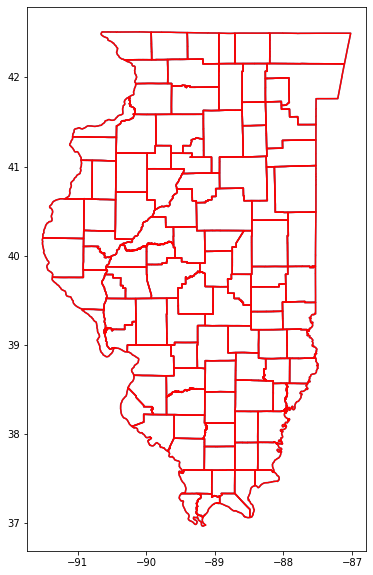

In [31]:
counties_source = full_shapefiles_census.dissolve("COUNTYFP20")
counties_vest = vest_shp.dissolve("COUNTYFP20")

ax = counties_source.boundary.plot(figsize=(10,10))
counties_vest.boundary.plot(ax=ax,color="red")

## Precinct-by-precinct

In [32]:
#Create unique_ID columns for both the election results file and the VEST file
election_results["unique_ID"] = election_results["COUNTYFP20"]+"-"+election_results["PrecinctName"].str.upper()
election_results["unique_ID"].value_counts(dropna=False)

vest_shp["unique_ID"] = vest_shp["COUNTYFP20"]+"-"+vest_shp["NAME20"].str.upper()
vest_shp["unique_ID"].value_counts(dropna=False)

163-ST CLAIR 21     1
029-MATTOON 10      1
031-WD 13 PCT 12    1
043-WAYNE 40        1
001-CAMP POINT 1    1
                   ..
177-FREEPORT 12     1
113-NORMAL 20       1
031-WD 48 PCT 10    1
031-PROVISO 64      1
043-MILTON 126      1
Name: unique_ID, Length: 10083, dtype: int64

### Allocate absentee votes

In [33]:
to_allocate = ['005-PRESIDENTIAL BALLOT', '007-PRESIDENTIAL BALLOT', '011-PRESIDENTIAL BALLOT', '015-PRESIDENTIAL BALLOT', '021-PRESIDENTIAL BALLOT', '023-PRESIDENTIAL BALLOT', '029-PRESIDENTIAL BALLOT', '039-PRESIDENTIAL BALLOT', '041-PRESIDENTIAL BALLOT', '043-PRESIDENTIAL BALLOT', '045-PRESIDENTIAL BALLOT', '069-PRESIDENTIAL BALLOT', '079-ELECTIONS OFFICE', '091-PRESIDENTIAL ONLY', '105-PRESIDENTIAL BALLOT', '107-PRESIDENTIAL BALLOT', '115-PRESIDENTIAL BALLOT', '117-PRESIDENTIAL BALLOT', '125-PRESIDENTIAL BALLOT', '113-ELECTIONS OFFICE', '139-PRESIDENTIAL BALLOT', '145-ELECTIONS OFFICE', '147-ELECTIONS OFFICE', '155-PRESIDENTIAL BALLOT', '167-PRES ONLY', '173-PRESIDENTIAL BALLOT', '177-PRESIDENTIAL BALLOT', '179-PRESIDENTIAL BALLOT', '183-PRESIDENTIAL BALLOT', '193-ELECTIONS OFFICE', '195-PRESIDENTIAL BALLOT', '197-PRESIDENTIAL']

absentee = election_results[election_results["unique_ID"].isin(to_allocate)]
election_results_no_absentee = election_results[~election_results["unique_ID"].isin(to_allocate)]

In [34]:
def allocate_absentee(df_receiving_votes,df_allocating,column_list,col_allocating):
    original_cols = list(df_receiving_votes.columns)
    
    #Add in the "Total Votes column"
    df_receiving_votes.loc[:,"Total_Votes"]=0
    for race in column_list:
        df_receiving_votes.loc[:,"Total_Votes"]+=df_receiving_votes.loc[:,race]
    
    #Create the needed dataframes
    precinct_specific_totals = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())
    precinct_specific_totals.reset_index(drop=False,inplace=True)
    to_dole_out_totals = pd.DataFrame(df_allocating.groupby([col_allocating]).sum())
    to_dole_out_totals.reset_index(drop=False,inplace=True)
    
    #Print out any instances where the allocation, as written, won't work
    special_allocation_needed = []
    for index, row in precinct_specific_totals.iterrows():
        for race in column_list:
            if (row[race]==0):
                race_district = row[col_allocating]
                if race_district in to_dole_out_totals[col_allocating].unique():
                    to_allocate = int(to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==race_district][race])
                    if (to_allocate != 0):
                        special_allocation_needed.append([race_district,race])
    
    #Create some new columns for each of these races to deal with the allocation
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        df_receiving_votes.loc[:,add_var]=0.0
        df_receiving_votes.loc[:,rem_var]=0.0
        df_receiving_votes.loc[:,floor_var]=0.0

    #Iterate over the rows
    #Note this function iterates over the dataframe two times so the rounded vote totals match the totals to allocate
    for index, row in df_receiving_votes.iterrows():
        if row[col_allocating] in to_dole_out_totals[col_allocating].unique():
            for race in column_list:
                add_var = race+"_add"
                rem_var = race+"_rem"
                floor_var = race+"_floor"
                #Grab the district
                county_id = row[col_allocating]
                if [county_id,race] in special_allocation_needed:
                    print([county_id,race])
                    print("Inside this")
                    #Get the denominator for the allocation (the precinct vote totals)
                    denom = precinct_specific_totals.loc[precinct_specific_totals[col_allocating]==county_id]["Total_Votes"]
                    #Get one of the numerators, how many districtwide votes to allocate
                    numer = to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county_id][race]
                    #Get the vote totals for this race in this precinct
                    val = df_receiving_votes.at[index,"Total_Votes"]
                    #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
                else:
                    #Get the denominator for the allocation (the precinct vote totals)
                    denom = precinct_specific_totals.loc[precinct_specific_totals[col_allocating]==county_id][race]
                    #Get one of the numerators, how many districtwide votes to allocate
                    numer = to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county_id][race]
                    #Get the vote totals for this race in this precinct
                    val = df_receiving_votes.at[index,race]
                    #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
                if ((float(denom)==0)):
                    vote_share = 0
                else:
                    vote_share = (float(val)/float(denom))*float(numer)
                df_receiving_votes.at[index,add_var] = vote_share
                #Take the decimal remainder of the allocation
                df_receiving_votes.at[index,rem_var] = vote_share%1
                #Take the floor of the allocation
                df_receiving_votes.at[index,floor_var] = np.floor(vote_share)

    #After the first pass through, get the sums of the races by district to assist in the rounding            
    first_allocation = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())

    #Now we want to iterate district by district to work on rounding
    county_list = list(to_dole_out_totals[col_allocating].unique()) 

    #Iterate over the district
    for county in county_list:
        for race in column_list:
            add_var = race+"_add"
            rem_var = race+"_rem"
            floor_var = race+"_floor"
            #County how many votes still need to be allocated (because we took the floor of all the initial allocations)
            to_go = int(np.round((int(to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county][race])-first_allocation.loc[first_allocation.index==county,floor_var])))
            #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
            for index in df_receiving_votes.loc[df_receiving_votes[col_allocating]==county][rem_var].nlargest(to_go).index:
                df_receiving_votes.at[index,add_var] = np.ceil(df_receiving_votes.at[index,add_var])

    #Iterate over every race again
    for race in column_list:
        add_var = race+"_add"
        #Round every allocation down to not add fractional votes
        df_receiving_votes.loc[:,add_var]=np.floor(df_receiving_votes.loc[:,add_var])
        df_receiving_votes.loc[:,race]+=df_receiving_votes.loc[:,add_var]
        
    df_receiving_votes = df_receiving_votes[original_cols]
    
    return df_receiving_votes

In [35]:
column_list = ['G20PREACAR','G20PRERTRU', 'G20PRESLAR', 'G20PREGHAW', 'G20PRELJOR', 'G20PREDBID', 
                'G20USSLMAL', 'G20USSGBLA', 'G20USSRCUR', 'G20USSDDUR']
election_results_final = allocate_absentee(election_results_no_absentee,absentee,column_list,'COUNTYFP20')

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying

### Attempt join

In [36]:
join = pd.merge(election_results_final,vest_shp,how="outer",on="unique_ID",indicator="final_merge")
print(join["final_merge"].value_counts())

election_only = join[join["final_merge"]=="left_only"]
vest_only = join[join["final_merge"]=="right_only"]

election_only.to_csv("./election_only.csv")
vest_only.to_csv("./vest_only.csv")

right_only    6139
left_only     6137
both          3944
Name: final_merge, dtype: int64


### Define dictionary of ID changes and attempt join again

In [37]:
election_vest_id_changes_dict = {'001-GILMER 1': '001-GILMER', '001-LIBERTY 1': '001-LIBERTY', '001-URSA 1': '001-URSA', '001-CLAYTON 1': '001-CLAYTON', '001-NORTHEAST 1': '001-NORTHEAST', '001-BURTON 1': '001-BURTON', '001-HONEY CREEK 1': '001-HONEY CREEK', '001-KEENE 1': '001-KEENE', '001-FALL CREEK 1': '001-FALL CREEK', '001-LIMA 1': '001-LIMA', '001-COLUMBUS 1': '001-COLUMBUS', '001-RICHFIELD 1': '001-RICHFIELD', '001-BEVERLY 1': '001-BEVERLY', '001-CONCORD 1': '001-CONCORD', '001-HOUSTON 1': '001-HOUSTON', '001-MCKEE 1': '001-MCKEE', '005-CENTRAL 1-A': '005-CENTRAL 1A', '007-LE ROY': '007-LEROY', '009-MT. STERLING 1': '009-MT STERLING 1', '009-MT. STERLING 2': '009-MT STERLING 2', '009-MT. STERLING 5': '009-MT STERLING 5', '009-MT. STERLING 4': '009-MT STERLING 4', '009-VERSAILLES TWP 1': '009-VERSAILLES 1', '009-VERSAILLES TWP 2': '009-VERSAILLES 2', '009-ELKHORN TWP': '009-ELKHORN', '009-COOPERSTOWN TWP': '009-COOPERSTOWN', '009-LEE TWP': '009-LEE', '009-MT. STERLING 3': '009-MT STERLING 3', '009-MISSOURI TWP': '009-MISSOURI', '009-PEA RIDGE TWP': '009-PEA RIDGE', '009-RIPLEY TWP': '009-RIPLEY', '009-BUCKHORN TWP': '009-BUCKHORN', '013-POINT PRECINCT': '013-POINT', '013-HARDIN PRECINCT': '013-HARDIN', '013-RICHWOODS PRECINCT': '013-RICHWOODS', '013-CRATER-CARLIN PCT.': '013-CRATER-CARLIN', '013-HAMBURG PRECINCT': '013-HAMBURG', '013-GILEAD PRECINCT': '013-GILEAD', '013-BELLEVIEW PRECINCT': '013-BELLEVIEW', '015-MT. CARROLL 2': '015-MT CARROLL 2', '015-ROCK CREEK-LIMA 1': '015-ROCK CREEK/LIMA 1', '015-ROCK CREEK-LIMA 2': '015-ROCK CREEK/LIMA 2', '015-CHERRY GROVE SHANNON 2': '015-CHERRY GROVE/SHANNON 2', '015-MT. CARROLL 1': '015-MT CARROLL 1', '015-MT. CARROLL 3': '015-MT CARROLL 3', '015-CHERRY GROVE SHANNON 1': '015-CHERRY GROVE/SHANNON 1', '019-CITY OF CHAMPAIGN 7': '019-CITY OF CHAMPAIGN 07', '019-CITY OF CHAMPAIGN 3': '019-CITY OF CHAMPAIGN 03', '019-CITY OF CHAMPAIGN 8': '019-CITY OF CHAMPAIGN 08', '019-CITY OF CHAMPAIGN 6': '019-CITY OF CHAMPAIGN 06', '019-CITY OF CHAMPAIGN 5': '019-CITY OF CHAMPAIGN 05', '019-CITY OF CHAMPAIGN 9': '019-CITY OF CHAMPAIGN 09', '019-CITY OF CHAMPAIGN 2': '019-CITY OF CHAMPAIGN 02', '019-CITY OF CHAMPAIGN 4': '019-CITY OF CHAMPAIGN 04', '019-CITY OF CHAMPAIGN 1': '019-CITY OF CHAMPAIGN 01', '019-ST. JOSEPH 2': '019-ST JOSEPH 2', '019-ST. JOSEPH 1': '019-ST JOSEPH 1', '019-ST. JOSEPH 3': '019-ST JOSEPH 3', '021-TAYLORVILLE #5': '021-TAYLORVILLE 5', '021-TAYLORVILLE #4': '021-TAYLORVILLE 4', '021-PANA #2': '021-PANA 2', '021-TAYLORVILLE #3': '021-TAYLORVILLE 3', '021-TAYLORVILLE #8': '021-TAYLORVILLE 8', '021-TAYLORVILLE #6': '021-TAYLORVILLE 6', '021-TAYLORVILLE #7': '021-TAYLORVILLE 7', '021-TAYLORVILLE #2': '021-TAYLORVILLE 2', '021-TAYLORVILLE #1': '021-TAYLORVILLE 1', '021-SOUTH FORK #1': '021-SOUTH FORK 1', '021-PANA #3': '021-PANA 3', '021-PANA #1': '021-PANA 1', '021-PANA #4': '021-PANA 4', '021-SOUTH FORK #2': '021-SOUTH FORK 2', '021-SOUTH FORK #3': '021-SOUTH FORK 3', '021-PANA #5': '021-PANA 5', '025-HARTER 3': '025-HARTER III', '025-HARTER 5': '025-HARTER V', '025-CLAY CITY': '025-CLAY CITY I', '025-HARTER 1': '025-HARTER I', '025-HARTER 6': '025-HARTER VI', '025-LOUISVILLE 2': '025-LOUISVILLE II', '025-HARTER 7': '025-HARTER VII', '025-HARTER 4': '025-HARTER IV', '025-PIXLEY': '025-PIXLEY I', '025-LOUISVILLE 1': '025-LOUISVILLE I', '025-LARKINSBURG': '025-LARKINSBURG I', '031-9000001': '031-RICH 1', '031-9000036': '031-RICH 36', '031-7600027': '031-HANOVER 27', '031-WARD 27 PRECINCT 45': '031-WD 27 PCT 45', '031-WARD 42 PRECINCT 04': '031-WD 42 PCT 04', '031-8300051': '031-NORTHFIELD 51', '031-7502001': '031-EVANSTON 2-1', '031-7100038': '031-BLOOM 38', '031-8500031': '031-OAK PARK 31', '031-8500020': '031-OAK PARK 20', '031-7507002': '031-EVANSTON 7-2', '031-WARD 03 PRECINCT 39': '031-WD 03 PCT 39', '031-WARD 42 PRECINCT 39': '031-WD 42 PCT 39', '031-8500017': '031-OAK PARK 17', '031-WARD 04 PRECINCT 37': '031-WD 04 PCT 37', '031-WARD 42 PRECINCT 42': '031-WD 42 PCT 42', '031-WARD 27 PRECINCT 01': '031-WD 27 PCT 01', '031-8500016': '031-OAK PARK 16', '031-WARD 46 PRECINCT 10': '031-WD 46 PCT 10', '031-WARD 42 PRECINCT 36': '031-WD 42 PCT 36', '031-7507001': '031-EVANSTON 7-1', '031-7506001': '031-EVANSTON 6-1', '031-7504004': '031-EVANSTON 4-4', '031-8100002': '031-NEW TRIER 2', '031-9000015': '031-RICH 15', '031-8500028': '031-OAK PARK 28', '031-9000008': '031-RICH 8', '031-8000030': '031-MAINE 30', '031-8100001': '031-NEW TRIER 1', '031-WARD 47 PRECINCT 19': '031-WD 47 PCT 19', '031-WARD 04 PRECINCT 16': '031-WD 04 PCT 16', '031-WARD 25 PRECINCT 21': '031-WD 25 PCT 21', '031-WARD 25 PRECINCT 31': '031-WD 25 PCT 31', '031-9000047': '031-RICH 47', '031-8500003': '031-OAK PARK 3', '031-WARD 44 PRECINCT 01': '031-WD 44 PCT 01', '031-7501004': '031-EVANSTON 1-4', '031-8500006': '031-OAK PARK 6', '031-8500015': '031-OAK PARK 15', '031-8500035': '031-OAK PARK 35', '031-WARD 03 PRECINCT 25': '031-WD 03 PCT 25', '031-WARD 42 PRECINCT 26': '031-WD 42 PCT 26', '031-7506005': '031-EVANSTON 6-5', '031-WARD 05 PRECINCT 23': '031-WD 05 PCT 23', '031-8300028': '031-NORTHFIELD 28', '031-8500002': '031-OAK PARK 2', '031-7502004': '031-EVANSTON 2-4', '031-7900016': '031-LYONS 16', '031-7507005': '031-EVANSTON 7-5', '031-7509003': '031-EVANSTON 9-3', '031-8900071': '031-PROVISO 71', '031-9000023': '031-RICH 23', '031-7100024': '031-BLOOM 24', '031-WARD 01 PRECINCT 21': '031-WD 01 PCT 21', '031-9000046': '031-RICH 46', '031-WARD 27 PRECINCT 48': '031-WD 27 PCT 48', '031-8900034': '031-PROVISO 34', '031-WARD 44 PRECINCT 08': '031-WD 44 PCT 08', '031-9000025': '031-RICH 25', '031-WARD 03 PRECINCT 32': '031-WD 03 PCT 32', '031-7505002': '031-EVANSTON 5-2', '031-8500036': '031-OAK PARK 36', '031-WARD 25 PRECINCT 03': '031-WD 25 PCT 03', '031-WARD 42 PRECINCT 17': '031-WD 42 PCT 17', '031-7506007': '031-EVANSTON 6-7', '031-WARD 49 PRECINCT 20': '031-WD 49 PCT 20', '031-7508005': '031-EVANSTON 8-5', '031-8200038': '031-NILES 38', '031-WARD 42 PRECINCT 40': '031-WD 42 PCT 40', '031-7503002': '031-EVANSTON 3-2', '031-8500030': '031-OAK PARK 30', '031-8200021': '031-NILES 21', '031-7504006': '031-EVANSTON 4-6', '031-WARD 44 PRECINCT 17': '031-WD 44 PCT 17', '031-WARD 46 PRECINCT 26': '031-WD 46 PCT 26', '031-8200007': '031-NILES 7', '031-9300001': '031-SCHAUMBURG 1', '031-WARD 44 PRECINCT 41': '031-WD 44 PCT 41', '031-WARD 33 PRECINCT 18': '031-WD 33 PCT 18', '031-8500005': '031-OAK PARK 5', '031-WARD 03 PRECINCT 34': '031-WD 03 PCT 34', '031-8100036': '031-NEW TRIER 36', '031-9500077': '031-THORNTON 77', '031-9000030': '031-RICH 30', '031-WARD 44 PRECINCT 06': '031-WD 44 PCT 06', '031-8500019': '031-OAK PARK 19', '031-WARD 47 PRECINCT 26': '031-WD 47 PCT 26', '031-WARD 43 PRECINCT 16': '031-WD 43 PCT 16', '031-WARD 43 PRECINCT 29': '031-WD 43 PCT 29', '031-8300012': '031-NORTHFIELD 12', '031-9500120': '031-THORNTON 120', '031-WARD 04 PRECINCT 01': '031-WD 04 PCT 01', '031-WARD 03 PRECINCT 17': '031-WD 03 PCT 17', '031-7508001': '031-EVANSTON 8-1', '031-8900082': '031-PROVISO 82', '031-7503005': '031-EVANSTON 3-5', '031-WARD 49 PRECINCT 28': '031-WD 49 PCT 28', '031-9100008': '031-RIVER FOREST 8', '031-8900050': '031-PROVISO 50', '031-WARD 25 PRECINCT 16': '031-WD 25 PCT 16', '031-7100013': '031-BLOOM 13', '031-9908001': '031-BERWYN 8-1', '031-WARD 33 PRECINCT 03': '031-WD 33 PCT 03', '031-WARD 48 PRECINCT 10': '031-WD 48 PCT 10', '031-8200053': '031-NILES 53', '031-7900060': '031-LYONS 60', '031-9000032': '031-RICH 32', '031-8200059': '031-NILES 59', '031-7200040': '031-BREMEN 40', '031-WARD 40 PRECINCT 13': '031-WD 40 PCT 13', '031-WARD 48 PRECINCT 31': '031-WD 48 PCT 31', '031-8500014': '031-OAK PARK 14', '031-WARD 44 PRECINCT 26': '031-WD 44 PCT 26', '031-WARD 28 PRECINCT 11': '031-WD 28 PCT 11', '031-9000006': '031-RICH 6', '031-8100013': '031-NEW TRIER 13', '031-9300002': '031-SCHAUMBURG 2', '031-8900067': '031-PROVISO 67', '031-7503001': '031-EVANSTON 3-1', '031-WARD 44 PRECINCT 21': '031-WD 44 PCT 21', '031-8200049': '031-NILES 49', '031-8100004': '031-NEW TRIER 4', '031-WARD 04 PRECINCT 30': '031-WD 04 PCT 30', '031-9905001': '031-BERWYN 5-1', '031-WARD 44 PRECINCT 30': '031-WD 44 PCT 30', '031-WARD 01 PRECINCT 29': '031-WD 01 PCT 29', '031-8900090': '031-PROVISO 90', '031-9000003': '031-RICH 3', '031-WARD 46 PRECINCT 05': '031-WD 46 PCT 05', '031-8500004': '031-OAK PARK 4', '031-8300021': '031-NORTHFIELD 21', '031-WARD 33 PRECINCT 16': '031-WD 33 PCT 16', '031-WARD 44 PRECINCT 20': '031-WD 44 PCT 20', '031-WARD 04 PRECINCT 27': '031-WD 04 PCT 27', '031-9902004': '031-BERWYN 2-4', '031-9000045': '031-RICH 45', '031-WARD 42 PRECINCT 15': '031-WD 42 PCT 15', '031-7200029': '031-BREMEN 29', '031-9500054': '031-THORNTON 54', '031-8200016': '031-NILES 16', '031-8200003': '031-NILES 3', '031-WARD 24 PRECINCT 16': '031-WD 24 PCT 16', '031-WARD 33 PRECINCT 04': '031-WD 33 PCT 04', '031-WARD 47 PRECINCT 30': '031-WD 47 PCT 30', '031-7509004': '031-EVANSTON 9-4', '031-9100001': '031-RIVER FOREST 1', '031-8500023': '031-OAK PARK 23', '031-WARD 01 PRECINCT 23': '031-WD 01 PCT 23', '031-WARD 33 PRECINCT 02': '031-WD 33 PCT 02', '031-7400034': '031-ELK GROVE 34', '031-WARD 42 PRECINCT 14': '031-WD 42 PCT 14', '031-WARD 03 PRECINCT 18': '031-WD 03 PCT 18', '031-WARD 44 PRECINCT 19': '031-WD 44 PCT 19', '031-7300006': '031-CALUMET 6', '031-WARD 02 PRECINCT 08': '031-WD 02 PCT 08', '031-9500035': '031-THORNTON 35', '031-WARD 46 PRECINCT 27': '031-WD 46 PCT 27', '031-7600020': '031-HANOVER 20', '031-WARD 42 PRECINCT 09': '031-WD 42 PCT 09', '031-WARD 04 PRECINCT 13': '031-WD 04 PCT 13', '031-WARD 42 PRECINCT 18': '031-WD 42 PCT 18', '031-8100015': '031-NEW TRIER 15', '031-WARD 42 PRECINCT 10': '031-WD 42 PCT 10', '031-WARD 44 PRECINCT 38': '031-WD 44 PCT 38', '031-8300018': '031-NORTHFIELD 18', '031-WARD 44 PRECINCT 29': '031-WD 44 PCT 29', '031-8000009': '031-MAINE 9', '031-WARD 42 PRECINCT 21': '031-WD 42 PCT 21', '031-9500038': '031-THORNTON 38', '031-WARD 47 PRECINCT 32': '031-WD 47 PCT 32', '031-WARD 46 PRECINCT 34': '031-WD 46 PCT 34', '031-8100016': '031-NEW TRIER 16', '031-WARD 01 PRECINCT 10': '031-WD 01 PCT 10', '031-WARD 02 PRECINCT 40': '031-WD 02 PCT 40', '031-9500073': '031-THORNTON 73', '031-8900018': '031-PROVISO 18', '031-8200061': '031-NILES 61', '031-8100024': '031-NEW TRIER 24', '031-7503003': '031-EVANSTON 3-3', '031-9500066': '031-THORNTON 66', '031-7600001': '031-HANOVER 1', '031-WARD 47 PRECINCT 25': '031-WD 47 PCT 25', '031-WARD 32 PRECINCT 06': '031-WD 32 PCT 06', '031-7501002': '031-EVANSTON 1-2', '031-WARD 49 PRECINCT 11': '031-WD 49 PCT 11', '031-WARD 47 PRECINCT 15': '031-WD 47 PCT 15', '031-WARD 33 PRECINCT 20': '031-WD 33 PCT 20', '031-8100020': '031-NEW TRIER 20', '031-8500010': '031-OAK PARK 10', '031-8900054': '031-PROVISO 54', '031-9500034': '031-THORNTON 34', '031-7300011': '031-CALUMET 11', '031-WARD 03 PRECINCT 22': '031-WD 03 PCT 22', '031-WARD 48 PRECINCT 21': '031-WD 48 PCT 21', '031-7100045': '031-BLOOM 45', '031-9600041': '031-WHEELING 41', '031-WARD 03 PRECINCT 06': '031-WD 03 PCT 06', '031-WARD 03 PRECINCT 01': '031-WD 03 PCT 01', '031-WARD 47 PRECINCT 06': '031-WD 47 PCT 06', '031-WARD 32 PRECINCT 08': '031-WD 32 PCT 08', '031-WARD 49 PRECINCT 04': '031-WD 49 PCT 04', '031-WARD 44 PRECINCT 16': '031-WD 44 PCT 16', '031-WARD 48 PRECINCT 41': '031-WD 48 PCT 41', '031-WARD 33 PRECINCT 08': '031-WD 33 PCT 08', '031-WARD 44 PRECINCT 27': '031-WD 44 PCT 27', '031-9500087': '031-THORNTON 87', '031-8200060': '031-NILES 60', '031-WARD 47 PRECINCT 47': '031-WD 47 PCT 47', '031-WARD 47 PRECINCT 10': '031-WD 47 PCT 10', '031-WARD 43 PRECINCT 20': '031-WD 43 PCT 20', '031-WARD 44 PRECINCT 37': '031-WD 44 PCT 37', '031-WARD 04 PRECINCT 02': '031-WD 04 PCT 02', '031-8200033': '031-NILES 33', '031-WARD 46 PRECINCT 24': '031-WD 46 PCT 24', '031-WARD 42 PRECINCT 35': '031-WD 42 PCT 35', '031-8500008': '031-OAK PARK 8', '031-8100033': '031-NEW TRIER 33', '031-WARD 42 PRECINCT 02': '031-WD 42 PCT 02', '031-WARD 46 PRECINCT 38': '031-WD 46 PCT 38', '031-WARD 04 PRECINCT 23': '031-WD 04 PCT 23', '031-8900066': '031-PROVISO 66', '031-8500013': '031-OAK PARK 13', '031-8100011': '031-NEW TRIER 11', '031-WARD 02 PRECINCT 20': '031-WD 02 PCT 20', '031-8300007': '031-NORTHFIELD 7', '031-WARD 49 PRECINCT 18': '031-WD 49 PCT 18', '031-WARD 02 PRECINCT 05': '031-WD 02 PCT 05', '031-7506004': '031-EVANSTON 6-4', '031-WARD 40 PRECINCT 08': '031-WD 40 PCT 08', '031-9000005': '031-RICH 5', '031-WARD 04 PRECINCT 04': '031-WD 04 PCT 04', '031-WARD 49 PRECINCT 23': '031-WD 49 PCT 23', '031-8300046': '031-NORTHFIELD 46', '031-7900020': '031-LYONS 20', '031-9600049': '031-WHEELING 49', '031-WARD 44 PRECINCT 36': '031-WD 44 PCT 36', '031-WARD 48 PRECINCT 12': '031-WD 48 PCT 12', '031-8200064': '031-NILES 64', '031-WARD 49 PRECINCT 25': '031-WD 49 PCT 25', '031-WARD 04 PRECINCT 25': '031-WD 04 PCT 25', '031-WARD 01 PRECINCT 35': '031-WD 01 PCT 35', '031-9000021': '031-RICH 21', '031-WARD 11 PRECINCT 06': '031-WD 11 PCT 06', '031-7100014': '031-BLOOM 14', '031-WARD 02 PRECINCT 35': '031-WD 02 PCT 35', '031-WARD 01 PRECINCT 03': '031-WD 01 PCT 03', '031-7900021': '031-LYONS 21', '031-WARD 02 PRECINCT 33': '031-WD 02 PCT 33', '031-WARD 32 PRECINCT 01': '031-WD 32 PCT 01', '031-WARD 10 PRECINCT 15': '031-WD 10 PCT 15', '031-WARD 25 PRECINCT 10': '031-WD 25 PCT 10', '031-WARD 48 PRECINCT 44': '031-WD 48 PCT 44', '031-WARD 47 PRECINCT 04': '031-WD 47 PCT 04', '031-9500021': '031-THORNTON 21', '031-WARD 44 PRECINCT 32': '031-WD 44 PCT 32', '031-8500025': '031-OAK PARK 25', '031-WARD 32 PRECINCT 32': '031-WD 32 PCT 32', '031-8900083': '031-PROVISO 83', '031-7503006': '031-EVANSTON 3-6', '031-WARD 01 PRECINCT 11': '031-WD 01 PCT 11', '031-WARD 43 PRECINCT 04': '031-WD 43 PCT 04', '031-WARD 04 PRECINCT 12': '031-WD 04 PCT 12', '031-9500083': '031-THORNTON 83', '031-WARD 04 PRECINCT 10': '031-WD 04 PCT 10', '031-8100030': '031-NEW TRIER 30', '031-WARD 32 PRECINCT 22': '031-WD 32 PCT 22', '031-WARD 44 PRECINCT 35': '031-WD 44 PCT 35', '031-WARD 43 PRECINCT 10': '031-WD 43 PCT 10', '031-WARD 44 PRECINCT 18': '031-WD 44 PCT 18', '031-WARD 42 PRECINCT 20': '031-WD 42 PCT 20', '031-WARD 40 PRECINCT 16': '031-WD 40 PCT 16', '031-WARD 49 PRECINCT 03': '031-WD 49 PCT 03', '031-WARD 33 PRECINCT 24': '031-WD 33 PCT 24', '031-9000027': '031-RICH 27', '031-8300047': '031-NORTHFIELD 47', '031-9500089': '031-THORNTON 89', '031-WARD 44 PRECINCT 33': '031-WD 44 PCT 33', '031-WARD 33 PRECINCT 19': '031-WD 33 PCT 19', '031-8300032': '031-NORTHFIELD 32', '031-WARD 44 PRECINCT 11': '031-WD 44 PCT 11', '031-WARD 04 PRECINCT 07': '031-WD 04 PCT 07', '031-7100036': '031-BLOOM 36', '031-WARD 05 PRECINCT 04': '031-WD 05 PCT 04', '031-9600064': '031-WHEELING 64', '031-8200063': '031-NILES 63', '031-WARD 01 PRECINCT 19': '031-WD 01 PCT 19', '031-WARD 49 PRECINCT 12': '031-WD 49 PCT 12', '031-9600084': '031-WHEELING 84', '031-WARD 48 PRECINCT 13': '031-WD 48 PCT 13', '031-WARD 32 PRECINCT 07': '031-WD 32 PCT 07', '031-WARD 02 PRECINCT 03': '031-WD 02 PCT 03', '031-WARD 43 PRECINCT 41': '031-WD 43 PCT 41', '031-9000043': '031-RICH 43', '031-9000012': '031-RICH 12', '031-9500084': '031-THORNTON 84', '031-WARD 47 PRECINCT 36': '031-WD 47 PCT 36', '031-WARD 03 PRECINCT 33': '031-WD 03 PCT 33', '031-WARD 43 PRECINCT 28': '031-WD 43 PCT 28', '031-WARD 42 PRECINCT 19': '031-WD 42 PCT 19', '031-9000026': '031-RICH 26', '031-9000018': '031-RICH 18', '031-WARD 32 PRECINCT 37': '031-WD 32 PCT 37', '031-9600071': '031-WHEELING 71', '031-9500122': '031-THORNTON 122', '031-8200017': '031-NILES 17', '031-WARD 49 PRECINCT 29': '031-WD 49 PCT 29', '031-WARD 27 PRECINCT 07': '031-WD 27 PCT 07', '031-WARD 46 PRECINCT 35': '031-WD 46 PCT 35', '031-WARD 44 PRECINCT 34': '031-WD 44 PCT 34', '031-WARD 48 PRECINCT 06': '031-WD 48 PCT 06', '031-WARD 01 PRECINCT 04': '031-WD 01 PCT 04', '031-9700059': '031-WORTH 59', '031-8200014': '031-NILES 14', '031-WARD 47 PRECINCT 23': '031-WD 47 PCT 23', '031-WARD 33 PRECINCT 25': '031-WD 33 PCT 25', '031-9600078': '031-WHEELING 78', '031-WARD 44 PRECINCT 10': '031-WD 44 PCT 10', '031-WARD 01 PRECINCT 12': '031-WD 01 PCT 12', '031-WARD 32 PRECINCT 34': '031-WD 32 PCT 34', '031-9100004': '031-RIVER FOREST 4', '031-WARD 02 PRECINCT 43': '031-WD 02 PCT 43', '031-7502003': '031-EVANSTON 2-3', '031-8700040': '031-PALATINE 40', '031-WARD 02 PRECINCT 01': '031-WD 02 PCT 01', '031-WARD 04 PRECINCT 36': '031-WD 04 PCT 36', '031-8300060': '031-NORTHFIELD 60', '031-WARD 44 PRECINCT 25': '031-WD 44 PCT 25', '031-WARD 44 PRECINCT 39': '031-WD 44 PCT 39', '031-9500107': '031-THORNTON 107', '031-WARD 32 PRECINCT 39': '031-WD 32 PCT 39', '031-9500006': '031-THORNTON 6', '031-7200063': '031-BREMEN 63', '031-8700059': '031-PALATINE 59', '031-WARD 02 PRECINCT 25': '031-WD 02 PCT 25', '031-9600027': '031-WHEELING 27', '031-WARD 05 PRECINCT 35': '031-WD 05 PCT 35', '031-7100041': '031-BLOOM 41', '031-WARD 46 PRECINCT 03': '031-WD 46 PCT 03', '031-8000060': '031-MAINE 60', '031-9000009': '031-RICH 9', '031-WARD 07 PRECINCT 09': '031-WD 07 PCT 09', '031-WARD 33 PRECINCT 27': '031-WD 33 PCT 27', '031-WARD 47 PRECINCT 29': '031-WD 47 PCT 29', '031-WARD 32 PRECINCT 02': '031-WD 32 PCT 02', '031-8900062': '031-PROVISO 62', '031-9600092': '031-WHEELING 92', '031-WARD 47 PRECINCT 24': '031-WD 47 PCT 24', '031-WARD 46 PRECINCT 14': '031-WD 46 PCT 14', '031-9500027': '031-THORNTON 27', '031-9700004': '031-WORTH 4', '031-8500026': '031-OAK PARK 26', '031-WARD 01 PRECINCT 36': '031-WD 01 PCT 36', '031-WARD 32 PRECINCT 36': '031-WD 32 PCT 36', '031-8100038': '031-NEW TRIER 38', '031-9800001': '031-CICERO 1', '031-WARD 47 PRECINCT 41': '031-WD 47 PCT 41', '031-8900076': '031-PROVISO 76', '031-8900048': '031-PROVISO 48', '031-WARD 30 PRECINCT 24': '031-WD 30 PCT 24', '031-8300045': '031-NORTHFIELD 45', '031-WARD 44 PRECINCT 28': '031-WD 44 PCT 28', '031-WARD 40 PRECINCT 27': '031-WD 40 PCT 27', '031-WARD 04 PRECINCT 17': '031-WD 04 PCT 17', '031-WARD 42 PRECINCT 31': '031-WD 42 PCT 31', '031-WARD 43 PRECINCT 37': '031-WD 43 PCT 37', '031-7900004': '031-LYONS 4', '031-9300044': '031-SCHAUMBURG 44', '031-9200004': '031-RIVERSIDE 4', '031-WARD 49 PRECINCT 13': '031-WD 49 PCT 13', '031-WARD 30 PRECINCT 25': '031-WD 30 PCT 25', '031-8700041': '031-PALATINE 41', '031-WARD 49 PRECINCT 26': '031-WD 49 PCT 26', '031-9000039': '031-RICH 39', '031-WARD 42 PRECINCT 32': '031-WD 42 PCT 32', '031-8200044': '031-NILES 44', '031-7501003': '031-EVANSTON 1-3', '031-7505003': '031-EVANSTON 5-3', '031-WARD 05 PRECINCT 24': '031-WD 05 PCT 24', '031-WARD 32 PRECINCT 13': '031-WD 32 PCT 13', '031-9600036': '031-WHEELING 36', '031-8500029': '031-OAK PARK 29', '031-WARD 43 PRECINCT 18': '031-WD 43 PCT 18', '031-WARD 46 PRECINCT 09': '031-WD 46 PCT 09', '031-WARD 44 PRECINCT 02': '031-WD 44 PCT 02', '031-WARD 30 PRECINCT 22': '031-WD 30 PCT 22', '031-WARD 48 PRECINCT 43': '031-WD 48 PCT 43', '031-WARD 01 PRECINCT 30': '031-WD 01 PCT 30', '031-WARD 47 PRECINCT 12': '031-WD 47 PCT 12', '031-7508004': '031-EVANSTON 8-4', '031-WARD 49 PRECINCT 27': '031-WD 49 PCT 27', '031-8900092': '031-PROVISO 92', '031-WARD 44 PRECINCT 12': '031-WD 44 PCT 12', '031-7600028': '031-HANOVER 28', '031-9600046': '031-WHEELING 46', '031-8900024': '031-PROVISO 24', '031-WARD 32 PRECINCT 05': '031-WD 32 PCT 05', '031-WARD 01 PRECINCT 05': '031-WD 01 PCT 05', '031-WARD 32 PRECINCT 10': '031-WD 32 PCT 10', '031-WARD 44 PRECINCT 09': '031-WD 44 PCT 09', '031-WARD 25 PRECINCT 27': '031-WD 25 PCT 27', '031-7800023': '031-LEYDEN 23', '031-WARD 47 PRECINCT 05': '031-WD 47 PCT 05', '031-WARD 01 PRECINCT 33': '031-WD 01 PCT 33', '031-8100027': '031-NEW TRIER 27', '031-8500011': '031-OAK PARK 11', '031-WARD 40 PRECINCT 03': '031-WD 40 PCT 03', '031-WARD 01 PRECINCT 27': '031-WD 01 PCT 27', '031-8900033': '031-PROVISO 33', '031-9600026': '031-WHEELING 26', '031-8900026': '031-PROVISO 26', '031-WARD 40 PRECINCT 22': '031-WD 40 PCT 22', '031-8200041': '031-NILES 41', '031-WARD 02 PRECINCT 17': '031-WD 02 PCT 17', '031-7000008': '031-BARRINGTON 8', '031-9000020': '031-RICH 20', '031-WARD 33 PRECINCT 23': '031-WD 33 PCT 23', '031-WARD 48 PRECINCT 03': '031-WD 48 PCT 03', '031-WARD 44 PRECINCT 05': '031-WD 44 PCT 05', '031-9000024': '031-RICH 24', '031-WARD 42 PRECINCT 07': '031-WD 42 PCT 07', '031-7900056': '031-LYONS 56', '031-WARD 48 PRECINCT 42': '031-WD 48 PCT 42', '031-WARD 46 PRECINCT 12': '031-WD 46 PCT 12', '031-WARD 46 PRECINCT 33': '031-WD 46 PCT 33', '031-WARD 42 PRECINCT 33': '031-WD 42 PCT 33', '031-WARD 04 PRECINCT 21': '031-WD 04 PCT 21', '031-WARD 43 PRECINCT 21': '031-WD 43 PCT 21', '031-WARD 05 PRECINCT 09': '031-WD 05 PCT 09', '031-8000077': '031-MAINE 77', '031-8100021': '031-NEW TRIER 21', '031-WARD 46 PRECINCT 18': '031-WD 46 PCT 18', '031-WARD 40 PRECINCT 25': '031-WD 40 PCT 25', '031-9600083': '031-WHEELING 83', '031-8500033': '031-OAK PARK 33', '031-8200024': '031-NILES 24', '031-WARD 02 PRECINCT 21': '031-WD 02 PCT 21', '031-WARD 46 PRECINCT 31': '031-WD 46 PCT 31', '031-7505001': '031-EVANSTON 5-1', '031-8900039': '031-PROVISO 39', '031-WARD 27 PRECINCT 33': '031-WD 27 PCT 33', '031-7900045': '031-LYONS 45', '031-9600007': '031-WHEELING 7', '031-8100012': '031-NEW TRIER 12', '031-WARD 01 PRECINCT 16': '031-WD 01 PCT 16', '031-9600082': '031-WHEELING 82', '031-WARD 03 PRECINCT 31': '031-WD 03 PCT 31', '031-9901003': '031-BERWYN 1-3', '031-WARD 46 PRECINCT 16': '031-WD 46 PCT 16', '031-8700066': '031-PALATINE 66', '031-7600041': '031-HANOVER 41', '031-8900029': '031-PROVISO 29', '031-8500018': '031-OAK PARK 18', '031-WARD 42 PRECINCT 29': '031-WD 42 PCT 29', '031-WARD 04 PRECINCT 06': '031-WD 04 PCT 06', '031-7200051': '031-BREMEN 51', '031-WARD 32 PRECINCT 14': '031-WD 32 PCT 14', '031-WARD 45 PRECINCT 07': '031-WD 45 PCT 07', '031-7400023': '031-ELK GROVE 23', '031-9500018': '031-THORNTON 18', '031-7100030': '031-BLOOM 30', '031-9000048': '031-RICH 48', '031-WARD 40 PRECINCT 23': '031-WD 40 PCT 23', '031-7509002': '031-EVANSTON 9-2', '031-WARD 03 PRECINCT 27': '031-WD 03 PCT 27', '031-WARD 02 PRECINCT 45': '031-WD 02 PCT 45', '031-WARD 40 PRECINCT 38': '031-WD 40 PCT 38', '031-9800019': '031-CICERO 19', '031-9600037': '031-WHEELING 37', '031-WARD 03 PRECINCT 13': '031-WD 03 PCT 13', '031-WARD 04 PRECINCT 35': '031-WD 04 PCT 35', '031-7900014': '031-LYONS 14', '031-8200039': '031-NILES 39', '031-8200058': '031-NILES 58', '031-WARD 32 PRECINCT 29': '031-WD 32 PCT 29', '031-WARD 33 PRECINCT 09': '031-WD 33 PCT 09', '031-8200028': '031-NILES 28', '031-WARD 27 PRECINCT 13': '031-WD 27 PCT 13', '031-9500004': '031-THORNTON 4', '031-WARD 46 PRECINCT 30': '031-WD 46 PCT 30', '031-WARD 47 PRECINCT 22': '031-WD 47 PCT 22', '031-WARD 47 PRECINCT 31': '031-WD 47 PCT 31', '031-WARD 32 PRECINCT 23': '031-WD 32 PCT 23', '031-8700050': '031-PALATINE 50', '031-8200056': '031-NILES 56', '031-8700057': '031-PALATINE 57', '031-WARD 28 PRECINCT 34': '031-WD 28 PCT 34', '031-WARD 40 PRECINCT 06': '031-WD 40 PCT 06', '031-WARD 44 PRECINCT 40': '031-WD 44 PCT 40', '031-WARD 03 PRECINCT 14': '031-WD 03 PCT 14', '031-WARD 32 PRECINCT 03': '031-WD 32 PCT 03', '031-WARD 05 PRECINCT 22': '031-WD 05 PCT 22', '031-WARD 33 PRECINCT 21': '031-WD 33 PCT 21', '031-WARD 32 PRECINCT 41': '031-WD 32 PCT 41', '031-WARD 03 PRECINCT 19': '031-WD 03 PCT 19', '031-8100014': '031-NEW TRIER 14', '031-7503007': '031-EVANSTON 3-7', '031-7504002': '031-EVANSTON 4-2', '031-7508002': '031-EVANSTON 8-2', '031-WARD 49 PRECINCT 10': '031-WD 49 PCT 10', '031-WARD 48 PRECINCT 32': '031-WD 48 PCT 32', '031-WARD 01 PRECINCT 01': '031-WD 01 PCT 01', '031-7509006': '031-EVANSTON 9-6', '031-WARD 47 PRECINCT 11': '031-WD 47 PCT 11', '031-8100037': '031-NEW TRIER 37', '031-WARD 32 PRECINCT 31': '031-WD 32 PCT 31', '031-WARD 02 PRECINCT 28': '031-WD 02 PCT 28', '031-WARD 46 PRECINCT 13': '031-WD 46 PCT 13', '031-WARD 02 PRECINCT 06': '031-WD 02 PCT 06', '031-9907004': '031-BERWYN 7-4', '031-WARD 32 PRECINCT 09': '031-WD 32 PCT 09', '031-WARD 42 PRECINCT 25': '031-WD 42 PCT 25', '031-8900097': '031-PROVISO 97', '031-7000010': '031-BARRINGTON 10', '031-9300061': '031-SCHAUMBURG 61', '031-WARD 48 PRECINCT 37': '031-WD 48 PCT 37', '031-WARD 27 PRECINCT 40': '031-WD 27 PCT 40', '031-9800023': '031-CICERO 23', '031-WARD 43 PRECINCT 02': '031-WD 43 PCT 02', '031-WARD 04 PRECINCT 15': '031-WD 04 PCT 15', '031-WARD 32 PRECINCT 40': '031-WD 32 PCT 40', '031-WARD 47 PRECINCT 38': '031-WD 47 PCT 38', '031-WARD 44 PRECINCT 23': '031-WD 44 PCT 23', '031-WARD 34 PRECINCT 25': '031-WD 34 PCT 25', '031-WARD 02 PRECINCT 04': '031-WD 02 PCT 04', '031-WARD 28 PRECINCT 46': '031-WD 28 PCT 46', '031-WARD 19 PRECINCT 43': '031-WD 19 PCT 43', '031-8700039': '031-PALATINE 39', '031-9200011': '031-RIVERSIDE 11', '031-7900044': '031-LYONS 44', '031-WARD 48 PRECINCT 07': '031-WD 48 PCT 07', '031-WARD 46 PRECINCT 15': '031-WD 46 PCT 15', '031-WARD 46 PRECINCT 17': '031-WD 46 PCT 17', '031-WARD 48 PRECINCT 16': '031-WD 48 PCT 16', '031-8300050': '031-NORTHFIELD 50', '031-9600019': '031-WHEELING 19', '031-WARD 33 PRECINCT 07': '031-WD 33 PCT 07', '031-WARD 33 PRECINCT 01': '031-WD 33 PCT 01', '031-WARD 47 PRECINCT 20': '031-WD 47 PCT 20', '031-WARD 47 PRECINCT 33': '031-WD 47 PCT 33', '031-8100031': '031-NEW TRIER 31', '031-WARD 04 PRECINCT 08': '031-WD 04 PCT 08', '031-WARD 45 PRECINCT 06': '031-WD 45 PCT 06', '031-9904003': '031-BERWYN 4-3', '031-WARD 47 PRECINCT 34': '031-WD 47 PCT 34', '031-8300016': '031-NORTHFIELD 16', '031-WARD 25 PRECINCT 02': '031-WD 25 PCT 02', '031-WARD 35 PRECINCT 10': '031-WD 35 PCT 10', '031-WARD 25 PRECINCT 13': '031-WD 25 PCT 13', '031-9200008': '031-RIVERSIDE 8', '031-7600037': '031-HANOVER 37', '031-9600076': '031-WHEELING 76', '031-WARD 39 PRECINCT 12': '031-WD 39 PCT 12', '031-9300031': '031-SCHAUMBURG 31', '031-9500092': '031-THORNTON 92', '031-WARD 04 PRECINCT 32': '031-WD 04 PCT 32', '031-7400039': '031-ELK GROVE 39', '031-7502005': '031-EVANSTON 2-5', '031-WARD 42 PRECINCT 41': '031-WD 42 PCT 41', '031-WARD 04 PRECINCT 38': '031-WD 04 PCT 38', '031-7600026': '031-HANOVER 26', '031-WARD 01 PRECINCT 14': '031-WD 01 PCT 14', '031-9100007': '031-RIVER FOREST 7', '031-9500019': '031-THORNTON 19', '031-8100009': '031-NEW TRIER 9', '031-7800026': '031-LEYDEN 26', '031-8200015': '031-NILES 15', '031-8900061': '031-PROVISO 61', '031-8200046': '031-NILES 46', '031-WARD 40 PRECINCT 31': '031-WD 40 PCT 31', '031-WARD 49 PRECINCT 30': '031-WD 49 PCT 30', '031-WARD 43 PRECINCT 32': '031-WD 43 PCT 32', '031-WARD 32 PRECINCT 30': '031-WD 32 PCT 30', '031-WARD 32 PRECINCT 21': '031-WD 32 PCT 21', '031-9000038': '031-RICH 38', '031-9500017': '031-THORNTON 17', '031-WARD 03 PRECINCT 26': '031-WD 03 PCT 26', '031-WARD 02 PRECINCT 41': '031-WD 02 PCT 41', '031-9500076': '031-THORNTON 76', '031-8600001': '031-ORLAND 1', '031-9600034': '031-WHEELING 34', '031-8500022': '031-OAK PARK 22', '031-8300001': '031-NORTHFIELD 1', '031-WARD 40 PRECINCT 21': '031-WD 40 PCT 21', '031-WARD 45 PRECINCT 14': '031-WD 45 PCT 14', '031-WARD 44 PRECINCT 22': '031-WD 44 PCT 22', '031-7100001': '031-BLOOM 1', '031-WARD 32 PRECINCT 27': '031-WD 32 PCT 27', '031-8000042': '031-MAINE 42', '031-9000040': '031-RICH 40', '031-WARD 44 PRECINCT 14': '031-WD 44 PCT 14', '031-WARD 02 PRECINCT 31': '031-WD 02 PCT 31', '031-WARD 19 PRECINCT 36': '031-WD 19 PCT 36', '031-WARD 35 PRECINCT 22': '031-WD 35 PCT 22', '031-WARD 47 PRECINCT 39': '031-WD 47 PCT 39', '031-7400010': '031-ELK GROVE 10', '031-8200057': '031-NILES 57', '031-WARD 35 PRECINCT 15': '031-WD 35 PCT 15', '031-7800050': '031-LEYDEN 50', '031-WARD 48 PRECINCT 20': '031-WD 48 PCT 20', '031-7400005': '031-ELK GROVE 5', '031-8500034': '031-OAK PARK 34', '031-WARD 50 PRECINCT 31': '031-WD 50 PCT 31', '031-9000002': '031-RICH 2', '031-9500094': '031-THORNTON 94', '031-8900004': '031-PROVISO 4', '031-WARD 03 PRECINCT 04': '031-WD 03 PCT 04', '031-WARD 32 PRECINCT 38': '031-WD 32 PCT 38', '031-WARD 01 PRECINCT 18': '031-WD 01 PCT 18', '031-WARD 04 PRECINCT 09': '031-WD 04 PCT 09', '031-8000005': '031-MAINE 5', '031-WARD 42 PRECINCT 03': '031-WD 42 PCT 03', '031-WARD 02 PRECINCT 22': '031-WD 02 PCT 22', '031-WARD 43 PRECINCT 30': '031-WD 43 PCT 30', '031-WARD 03 PRECINCT 09': '031-WD 03 PCT 09', '031-WARD 32 PRECINCT 26': '031-WD 32 PCT 26', '031-8100003': '031-NEW TRIER 3', '031-9300077': '031-SCHAUMBURG 77', '031-9500008': '031-THORNTON 8', '031-WARD 29 PRECINCT 21': '031-WD 29 PCT 21', '031-8300022': '031-NORTHFIELD 22', '031-7000004': '031-BARRINGTON 4', '031-WARD 40 PRECINCT 32': '031-WD 40 PCT 32', '031-8300056': '031-NORTHFIELD 56', '031-WARD 49 PRECINCT 09': '031-WD 49 PCT 09', '031-7900009': '031-LYONS 9', '031-9800024': '031-CICERO 24', '031-7000006': '031-BARRINGTON 6', '031-WARD 02 PRECINCT 14': '031-WD 02 PCT 14', '031-9100003': '031-RIVER FOREST 3', '031-WARD 01 PRECINCT 38': '031-WD 01 PCT 38', '031-WARD 20 PRECINCT 09': '031-WD 20 PCT 09', '031-WARD 03 PRECINCT 29': '031-WD 03 PCT 29', '031-8300043': '031-NORTHFIELD 43', '031-9300039': '031-SCHAUMBURG 39', '031-9600070': '031-WHEELING 70', '031-9300042': '031-SCHAUMBURG 42', '031-8700002': '031-PALATINE 2', '031-9800017': '031-CICERO 17', '031-WARD 47 PRECINCT 46': '031-WD 47 PCT 46', '031-WARD 49 PRECINCT 22': '031-WD 49 PCT 22', '031-8300030': '031-NORTHFIELD 30', '031-WARD 01 PRECINCT 37': '031-WD 01 PCT 37', '031-WARD 33 PRECINCT 15': '031-WD 33 PCT 15', '031-8100017': '031-NEW TRIER 17', '031-WARD 47 PRECINCT 02': '031-WD 47 PCT 02', '031-WARD 32 PRECINCT 35': '031-WD 32 PCT 35', '031-WARD 42 PRECINCT 23': '031-WD 42 PCT 23', '031-8100007': '031-NEW TRIER 7', '031-8900003': '031-PROVISO 3', '031-9902003': '031-BERWYN 2-3', '031-WARD 42 PRECINCT 16': '031-WD 42 PCT 16', '031-9000042': '031-RICH 42', '031-8200035': '031-NILES 35', '031-7600014': '031-HANOVER 14', '031-WARD 40 PRECINCT 19': '031-WD 40 PCT 19', '031-WARD 48 PRECINCT 28': '031-WD 48 PCT 28', '031-7100047': '031-BLOOM 47', '031-WARD 02 PRECINCT 29': '031-WD 02 PCT 29', '031-WARD 40 PRECINCT 26': '031-WD 40 PCT 26', '031-WARD 02 PRECINCT 36': '031-WD 02 PCT 36', '031-7900072': '031-LYONS 72', '031-7600016': '031-HANOVER 16', '031-WARD 47 PRECINCT 35': '031-WD 47 PCT 35', '031-WARD 47 PRECINCT 08': '031-WD 47 PCT 08', '031-9700096': '031-WORTH 96', '031-8900053': '031-PROVISO 53', '031-7300010': '031-CALUMET 10', '031-WARD 25 PRECINCT 08': '031-WD 25 PCT 08', '031-WARD 03 PRECINCT 02': '031-WD 03 PCT 02', '031-WARD 27 PRECINCT 27': '031-WD 27 PCT 27', '031-7600034': '031-HANOVER 34', '031-9903005': '031-BERWYN 3-5', '031-8700042': '031-PALATINE 42', '031-9700080': '031-WORTH 80', '031-WARD 32 PRECINCT 28': '031-WD 32 PCT 28', '031-WARD 33 PRECINCT 17': '031-WD 33 PCT 17', '031-WARD 32 PRECINCT 25': '031-WD 32 PCT 25', '031-WARD 47 PRECINCT 40': '031-WD 47 PCT 40', '031-9600025': '031-WHEELING 25', '031-WARD 35 PRECINCT 11': '031-WD 35 PCT 11', '031-8700024': '031-PALATINE 24', '031-WARD 32 PRECINCT 16': '031-WD 32 PCT 16', '031-WARD 47 PRECINCT 09': '031-WD 47 PCT 09', '031-WARD 47 PRECINCT 18': '031-WD 47 PCT 18', '031-8900074': '031-PROVISO 74', '031-WARD 46 PRECINCT 32': '031-WD 46 PCT 32', '031-WARD 02 PRECINCT 42': '031-WD 02 PCT 42', '031-7504003': '031-EVANSTON 4-3', '031-9500067': '031-THORNTON 67', '031-8000091': '031-MAINE 91', '031-8000006': '031-MAINE 6', '031-WARD 05 PRECINCT 34': '031-WD 05 PCT 34', '031-9500074': '031-THORNTON 74', '031-8200023': '031-NILES 23', '031-8200050': '031-NILES 50', '031-8900102': '031-PROVISO 102', '031-7200075': '031-BREMEN 75', '031-WARD 03 PRECINCT 11': '031-WD 03 PCT 11', '031-WARD 48 PRECINCT 04': '031-WD 48 PCT 04', '031-WARD 48 PRECINCT 24': '031-WD 48 PCT 24', '031-9300022': '031-SCHAUMBURG 22', '031-WARD 01 PRECINCT 25': '031-WD 01 PCT 25', '031-WARD 33 PRECINCT 05': '031-WD 33 PCT 05', '031-9000049': '031-RICH 49', '031-8300031': '031-NORTHFIELD 31', '031-WARD 27 PRECINCT 28': '031-WD 27 PCT 28', '031-WARD 30 PRECINCT 18': '031-WD 30 PCT 18', '031-9906004': '031-BERWYN 6-4', '031-WARD 02 PRECINCT 15': '031-WD 02 PCT 15', '031-WARD 02 PRECINCT 16': '031-WD 02 PCT 16', '031-7509001': '031-EVANSTON 9-1', '031-WARD 27 PRECINCT 38': '031-WD 27 PCT 38', '031-WARD 03 PRECINCT 20': '031-WD 03 PCT 20', '031-8700029': '031-PALATINE 29', '031-WARD 47 PRECINCT 42': '031-WD 47 PCT 42', '031-WARD 44 PRECINCT 15': '031-WD 44 PCT 15', '031-WARD 47 PRECINCT 13': '031-WD 47 PCT 13', '031-8300019': '031-NORTHFIELD 19', '031-WARD 04 PRECINCT 11': '031-WD 04 PCT 11', '031-WARD 05 PRECINCT 08': '031-WD 05 PCT 08', '031-WARD 33 PRECINCT 12': '031-WD 33 PCT 12', '031-9200010': '031-RIVERSIDE 10', '031-WARD 32 PRECINCT 19': '031-WD 32 PCT 19', '031-8000029': '031-MAINE 29', '031-WARD 33 PRECINCT 11': '031-WD 33 PCT 11', '031-9600010': '031-WHEELING 10', '031-WARD 43 PRECINCT 44': '031-WD 43 PCT 44', '031-9500065': '031-THORNTON 65', '031-WARD 47 PRECINCT 17': '031-WD 47 PCT 17', '031-WARD 46 PRECINCT 25': '031-WD 46 PCT 25', '031-8000024': '031-MAINE 24', '031-8100032': '031-NEW TRIER 32', '031-WARD 43 PRECINCT 15': '031-WD 43 PCT 15', '031-9000051': '031-RICH 51', '031-WARD 46 PRECINCT 07': '031-WD 46 PCT 07', '031-WARD 48 PRECINCT 01': '031-WD 48 PCT 01', '031-WARD 05 PRECINCT 20': '031-WD 05 PCT 20', '031-9000022': '031-RICH 22', '031-9500046': '031-THORNTON 46', '031-9600011': '031-WHEELING 11', '031-WARD 47 PRECINCT 37': '031-WD 47 PCT 37', '031-8600029': '031-ORLAND 29', '031-WARD 32 PRECINCT 20': '031-WD 32 PCT 20', '031-8200031': '031-NILES 31', '031-WARD 25 PRECINCT 23': '031-WD 25 PCT 23', '031-WARD 32 PRECINCT 33': '031-WD 32 PCT 33', '031-WARD 03 PRECINCT 21': '031-WD 03 PCT 21', '031-WARD 03 PRECINCT 40': '031-WD 03 PCT 40', '031-WARD 05 PRECINCT 33': '031-WD 05 PCT 33', '031-WARD 22 PRECINCT 03': '031-WD 22 PCT 03', '031-8200043': '031-NILES 43', '031-WARD 32 PRECINCT 04': '031-WD 32 PCT 04', '031-9600091': '031-WHEELING 91', '031-WARD 14 PRECINCT 05': '031-WD 14 PCT 05', '031-8400011': '031-NORWOOD PARK 11', '031-WARD 32 PRECINCT 42': '031-WD 32 PCT 42', '031-9000034': '031-RICH 34', '031-8900019': '031-PROVISO 19', '031-WARD 04 PRECINCT 05': '031-WD 04 PCT 05', '031-WARD 05 PRECINCT 32': '031-WD 05 PCT 32', '031-WARD 43 PRECINCT 09': '031-WD 43 PCT 09', '031-WARD 29 PRECINCT 02': '031-WD 29 PCT 02', '031-WARD 32 PRECINCT 17': '031-WD 32 PCT 17', '031-WARD 11 PRECINCT 33': '031-WD 11 PCT 33', '031-8900064': '031-PROVISO 64', '031-WARD 27 PRECINCT 35': '031-WD 27 PCT 35', '031-WARD 02 PRECINCT 07': '031-WD 02 PCT 07', '031-8300062': '031-NORTHFIELD 62', '031-8900036': '031-PROVISO 36', '031-8700054': '031-PALATINE 54', '031-WARD 19 PRECINCT 47': '031-WD 19 PCT 47', '031-7600039': '031-HANOVER 39', '031-9300062': '031-SCHAUMBURG 62', '031-WARD 43 PRECINCT 19': '031-WD 43 PCT 19', '031-WARD 47 PRECINCT 44': '031-WD 47 PCT 44', '031-8900030': '031-PROVISO 30', '031-8200026': '031-NILES 26', '031-WARD 39 PRECINCT 28': '031-WD 39 PCT 28', '031-WARD 05 PRECINCT 03': '031-WD 05 PCT 03', '031-8500001': '031-OAK PARK 1', '031-9500058': '031-THORNTON 58', '031-WARD 48 PRECINCT 38': '031-WD 48 PCT 38', '031-9300052': '031-SCHAUMBURG 52', '031-WARD 46 PRECINCT 02': '031-WD 46 PCT 02', '031-9600065': '031-WHEELING 65', '031-8700056': '031-PALATINE 56', '031-9700069': '031-WORTH 69', '031-8200002': '031-NILES 2', '031-9600088': '031-WHEELING 88', '031-WARD 43 PRECINCT 35': '031-WD 43 PCT 35', '031-7100049': '031-BLOOM 49', '031-7800049': '031-LEYDEN 49', '031-WARD 32 PRECINCT 18': '031-WD 32 PCT 18', '031-WARD 04 PRECINCT 14': '031-WD 04 PCT 14', '031-7800010': '031-LEYDEN 10', '031-8200027': '031-NILES 27', '031-8500021': '031-OAK PARK 21', '031-WARD 43 PRECINCT 13': '031-WD 43 PCT 13', '031-8900099': '031-PROVISO 99', '031-8300037': '031-NORTHFIELD 37', '031-WARD 19 PRECINCT 48': '031-WD 19 PCT 48', '031-9600043': '031-WHEELING 43', '031-9300034': '031-SCHAUMBURG 34', '031-WARD 47 PRECINCT 21': '031-WD 47 PCT 21', '031-WARD 05 PRECINCT 27': '031-WD 05 PCT 27', '031-9800027': '031-CICERO 27', '031-WARD 27 PRECINCT 11': '031-WD 27 PCT 11', '031-7300003': '031-CALUMET 3', '031-7400018': '031-ELK GROVE 18', '031-8200010': '031-NILES 10', '031-WARD 47 PRECINCT 16': '031-WD 47 PCT 16', '031-WARD 49 PRECINCT 19': '031-WD 49 PCT 19', '031-WARD 43 PRECINCT 14': '031-WD 43 PCT 14', '031-7200056': '031-BREMEN 56', '031-9500078': '031-THORNTON 78', '031-8200037': '031-NILES 37', '031-8200042': '031-NILES 42', '031-WARD 47 PRECINCT 28': '031-WD 47 PCT 28', '031-WARD 04 PRECINCT 22': '031-WD 04 PCT 22', '031-9700015': '031-WORTH 15', '031-WARD 40 PRECINCT 10': '031-WD 40 PCT 10', '031-WARD 47 PRECINCT 45': '031-WD 47 PCT 45', '031-8700005': '031-PALATINE 5', '031-8900025': '031-PROVISO 25', '031-WARD 29 PRECINCT 44': '031-WD 29 PCT 44', '031-WARD 33 PRECINCT 13': '031-WD 33 PCT 13', '031-WARD 05 PRECINCT 37': '031-WD 05 PCT 37', '031-WARD 43 PRECINCT 42': '031-WD 43 PCT 42', '031-WARD 01 PRECINCT 08': '031-WD 01 PCT 08', '031-8900005': '031-PROVISO 5', '031-WARD 50 PRECINCT 35': '031-WD 50 PCT 35', '031-WARD 46 PRECINCT 04': '031-WD 46 PCT 04', '031-WARD 11 PRECINCT 05': '031-WD 11 PCT 05', '031-WARD 49 PRECINCT 32': '031-WD 49 PCT 32', '031-8300020': '031-NORTHFIELD 20', '031-8000056': '031-MAINE 56', '031-8000034': '031-MAINE 34', '031-WARD 33 PRECINCT 28': '031-WD 33 PCT 28', '031-9600022': '031-WHEELING 22', '031-9500003': '031-THORNTON 3', '031-WARD 11 PRECINCT 19': '031-WD 11 PCT 19', '031-WARD 40 PRECINCT 28': '031-WD 40 PCT 28', '031-9500024': '031-THORNTON 24', '031-9400003': '031-STICKNEY 3', '031-WARD 46 PRECINCT 06': '031-WD 46 PCT 06', '031-WARD 48 PRECINCT 27': '031-WD 48 PCT 27', '031-8900032': '031-PROVISO 32', '031-9600030': '031-WHEELING 30', '031-9700031': '031-WORTH 31', '031-9000029': '031-RICH 29', '031-9700010': '031-WORTH 10', '031-7600024': '031-HANOVER 24', '031-WARD 01 PRECINCT 44': '031-WD 01 PCT 44', '031-7900007': '031-LYONS 7', '031-WARD 20 PRECINCT 11': '031-WD 20 PCT 11', '031-9907003': '031-BERWYN 7-3', '031-WARD 29 PRECINCT 30': '031-WD 29 PCT 30', '031-WARD 43 PRECINCT 03': '031-WD 43 PCT 03', '031-WARD 29 PRECINCT 28': '031-WD 29 PCT 28', '031-8700026': '031-PALATINE 26', '031-9600066': '031-WHEELING 66', '031-WARD 32 PRECINCT 15': '031-WD 32 PCT 15', '031-WARD 20 PRECINCT 22': '031-WD 20 PCT 22', '031-9500052': '031-THORNTON 52', '031-WARD 40 PRECINCT 37': '031-WD 40 PCT 37', '031-WARD 47 PRECINCT 07': '031-WD 47 PCT 07', '031-8900085': '031-PROVISO 85', '031-WARD 35 PRECINCT 07': '031-WD 35 PCT 07', '031-8500007': '031-OAK PARK 7', '031-7100002': '031-BLOOM 2', '031-7900057': '031-LYONS 57', '031-WARD 49 PRECINCT 16': '031-WD 49 PCT 16', '031-WARD 28 PRECINCT 08': '031-WD 28 PCT 08', '031-8300002': '031-NORTHFIELD 2', '031-WARD 43 PRECINCT 31': '031-WD 43 PCT 31', '031-WARD 39 PRECINCT 30': '031-WD 39 PCT 30', '031-WARD 40 PRECINCT 05': '031-WD 40 PCT 05', '031-WARD 35 PRECINCT 17': '031-WD 35 PCT 17', '031-WARD 12 PRECINCT 10': '031-WD 12 PCT 10', '031-8000021': '031-MAINE 21', '031-WARD 43 PRECINCT 05': '031-WD 43 PCT 05', '031-9500116': '031-THORNTON 116', '031-WARD 04 PRECINCT 29': '031-WD 04 PCT 29', '031-WARD 25 PRECINCT 17': '031-WD 25 PCT 17', '031-9700017': '031-WORTH 17', '031-9700008': '031-WORTH 8', '031-WARD 04 PRECINCT 18': '031-WD 04 PCT 18', '031-WARD 46 PRECINCT 11': '031-WD 46 PCT 11', '031-WARD 46 PRECINCT 39': '031-WD 46 PCT 39', '031-8000035': '031-MAINE 35', '031-9200013': '031-RIVERSIDE 13', '031-WARD 05 PRECINCT 29': '031-WD 05 PCT 29', '031-9600042': '031-WHEELING 42', '031-9600012': '031-WHEELING 12', '031-7506002': '031-EVANSTON 6-2', '031-8900075': '031-PROVISO 75', '031-WARD 43 PRECINCT 43': '031-WD 43 PCT 43', '031-8700006': '031-PALATINE 6', '031-WARD 42 PRECINCT 38': '031-WD 42 PCT 38', '031-WARD 04 PRECINCT 33': '031-WD 04 PCT 33', '031-WARD 40 PRECINCT 33': '031-WD 40 PCT 33', '031-9600038': '031-WHEELING 38', '031-WARD 05 PRECINCT 21': '031-WD 05 PCT 21', '031-9000011': '031-RICH 11', '031-WARD 09 PRECINCT 50': '031-WD 09 PCT 50', '031-WARD 47 PRECINCT 14': '031-WD 47 PCT 14', '031-9600039': '031-WHEELING 39', '031-WARD 01 PRECINCT 32': '031-WD 01 PCT 32', '031-WARD 05 PRECINCT 07': '031-WD 05 PCT 07', '031-WARD 32 PRECINCT 11': '031-WD 32 PCT 11', '031-WARD 49 PRECINCT 05': '031-WD 49 PCT 05', '031-WARD 20 PRECINCT 34': '031-WD 20 PCT 34', '031-WARD 05 PRECINCT 15': '031-WD 05 PCT 15', '031-WARD 30 PRECINCT 23': '031-WD 30 PCT 23', '031-WARD 47 PRECINCT 03': '031-WD 47 PCT 03', '031-9600062': '031-WHEELING 62', '031-WARD 44 PRECINCT 13': '031-WD 44 PCT 13', '031-7900069': '031-LYONS 69', '031-8300055': '031-NORTHFIELD 55', '031-7600035': '031-HANOVER 35', '031-WARD 01 PRECINCT 24': '031-WD 01 PCT 24', '031-WARD 42 PRECINCT 28': '031-WD 42 PCT 28', '031-WARD 46 PRECINCT 23': '031-WD 46 PCT 23', '031-WARD 02 PRECINCT 24': '031-WD 02 PCT 24', '031-8000022': '031-MAINE 22', '031-8300027': '031-NORTHFIELD 27', '031-9300054': '031-SCHAUMBURG 54', '031-7506003': '031-EVANSTON 6-3', '031-9200001': '031-RIVERSIDE 1', '031-WARD 01 PRECINCT 31': '031-WD 01 PCT 31', '031-WARD 08 PRECINCT 21': '031-WD 08 PCT 21', '031-WARD 50 PRECINCT 32': '031-WD 50 PCT 32', '031-9800028': '031-CICERO 28', '031-WARD 04 PRECINCT 24': '031-WD 04 PCT 24', '031-WARD 08 PRECINCT 42': '031-WD 08 PCT 42', '031-8700060': '031-PALATINE 60', '031-8300053': '031-NORTHFIELD 53', '031-7600040': '031-HANOVER 40', '031-9500037': '031-THORNTON 37', '031-8900038': '031-PROVISO 38', '031-7800031': '031-LEYDEN 31', '031-8700046': '031-PALATINE 46', '031-7506006': '031-EVANSTON 6-6', '031-8100029': '031-NEW TRIER 29', '031-9000004': '031-RICH 4', '031-WARD 27 PRECINCT 06': '031-WD 27 PCT 06', '031-7800006': '031-LEYDEN 6', '031-9300016': '031-SCHAUMBURG 16', '031-8900051': '031-PROVISO 51', '031-WARD 20 PRECINCT 24': '031-WD 20 PCT 24', '031-7508003': '031-EVANSTON 8-3', '031-8900040': '031-PROVISO 40', '031-9800005': '031-CICERO 5', '031-WARD 19 PRECINCT 02': '031-WD 19 PCT 02', '031-8700037': '031-PALATINE 37', '031-8600013': '031-ORLAND 13', '031-WARD 40 PRECINCT 11': '031-WD 40 PCT 11', '031-WARD 25 PRECINCT 19': '031-WD 25 PCT 19', '031-WARD 35 PRECINCT 21': '031-WD 35 PCT 21', '031-7900015': '031-LYONS 15', '031-7900050': '031-LYONS 50', '031-WARD 05 PRECINCT 11': '031-WD 05 PCT 11', '031-7300007': '031-CALUMET 7', '031-WARD 46 PRECINCT 28': '031-WD 46 PCT 28', '031-8500024': '031-OAK PARK 24', '031-8700008': '031-PALATINE 8', '031-9800009': '031-CICERO 9', '031-9800010': '031-CICERO 10', '031-WARD 09 PRECINCT 37': '031-WD 09 PCT 37', '031-9700021': '031-WORTH 21', '031-WARD 47 PRECINCT 43': '031-WD 47 PCT 43', '031-WARD 44 PRECINCT 31': '031-WD 44 PCT 31', '031-9600028': '031-WHEELING 28', '031-WARD 24 PRECINCT 26': '031-WD 24 PCT 26', '031-WARD 32 PRECINCT 43': '031-WD 32 PCT 43', '031-WARD 47 PRECINCT 27': '031-WD 47 PCT 27', '031-WARD 25 PRECINCT 28': '031-WD 25 PCT 28', '031-8900027': '031-PROVISO 27', '031-8900009': '031-PROVISO 9', '031-8100010': '031-NEW TRIER 10', '031-WARD 45 PRECINCT 04': '031-WD 45 PCT 04', '031-WARD 01 PRECINCT 40': '031-WD 01 PCT 40', '031-7200021': '031-BREMEN 21', '031-WARD 35 PRECINCT 06': '031-WD 35 PCT 06', '031-WARD 46 PRECINCT 36': '031-WD 46 PCT 36', '031-WARD 25 PRECINCT 24': '031-WD 25 PCT 24', '031-9500072': '031-THORNTON 72', '031-WARD 35 PRECINCT 01': '031-WD 35 PCT 01', '031-WARD 25 PRECINCT 07': '031-WD 25 PCT 07', '031-WARD 04 PRECINCT 31': '031-WD 04 PCT 31', '031-WARD 39 PRECINCT 34': '031-WD 39 PCT 34', '031-9600020': '031-WHEELING 20', '031-WARD 29 PRECINCT 01': '031-WD 29 PCT 01', '031-9500010': '031-THORNTON 10', '031-8900086': '031-PROVISO 86', '031-7600043': '031-HANOVER 43', '031-7400028': '031-ELK GROVE 28', '031-WARD 33 PRECINCT 06': '031-WD 33 PCT 06', '031-WARD 01 PRECINCT 06': '031-WD 01 PCT 06', '031-WARD 01 PRECINCT 17': '031-WD 01 PCT 17', '031-WARD 02 PRECINCT 09': '031-WD 02 PCT 09', '031-WARD 05 PRECINCT 28': '031-WD 05 PCT 28', '031-8600073': '031-ORLAND 73', '031-8900063': '031-PROVISO 63', '031-8900028': '031-PROVISO 28', '031-9500090': '031-THORNTON 90', '031-WARD 19 PRECINCT 28': '031-WD 19 PCT 28', '031-8200048': '031-NILES 48', '031-9400016': '031-STICKNEY 16', '031-9300045': '031-SCHAUMBURG 45', '031-8900073': '031-PROVISO 73', '031-9300028': '031-SCHAUMBURG 28', '031-WARD 42 PRECINCT 24': '031-WD 42 PCT 24', '031-WARD 07 PRECINCT 06': '031-WD 07 PCT 06', '031-9500088': '031-THORNTON 88', '031-WARD 30 PRECINCT 08': '031-WD 30 PCT 08', '031-WARD 27 PRECINCT 16': '031-WD 27 PCT 16', '031-WARD 02 PRECINCT 11': '031-WD 02 PCT 11', '031-7100043': '031-BLOOM 43', '031-WARD 28 PRECINCT 25': '031-WD 28 PCT 25', '031-WARD 40 PRECINCT 20': '031-WD 40 PCT 20', '031-WARD 48 PRECINCT 23': '031-WD 48 PCT 23', '031-WARD 50 PRECINCT 13': '031-WD 50 PCT 13', '031-9700038': '031-WORTH 38', '031-8900045': '031-PROVISO 45', '031-WARD 20 PRECINCT 31': '031-WD 20 PCT 31', '031-8700021': '031-PALATINE 21', '031-WARD 35 PRECINCT 25': '031-WD 35 PCT 25', '031-WARD 49 PRECINCT 06': '031-WD 49 PCT 06', '031-WARD 19 PRECINCT 49': '031-WD 19 PCT 49', '031-WARD 03 PRECINCT 12': '031-WD 03 PCT 12', '031-WARD 45 PRECINCT 15': '031-WD 45 PCT 15', '031-8000014': '031-MAINE 14', '031-9600059': '031-WHEELING 59', '031-WARD 28 PRECINCT 45': '031-WD 28 PCT 45', '031-7800024': '031-LEYDEN 24', '031-WARD 35 PRECINCT 02': '031-WD 35 PCT 02', '031-9500115': '031-THORNTON 115', '031-WARD 29 PRECINCT 43': '031-WD 29 PCT 43', '031-7100023': '031-BLOOM 23', '031-8100025': '031-NEW TRIER 25', '031-8200034': '031-NILES 34', '031-8600025': '031-ORLAND 25', '031-WARD 33 PRECINCT 22': '031-WD 33 PCT 22', '031-WARD 43 PRECINCT 33': '031-WD 43 PCT 33', '031-WARD 25 PRECINCT 22': '031-WD 25 PCT 22', '031-8300008': '031-NORTHFIELD 8', '031-9800015': '031-CICERO 15', '031-WARD 19 PRECINCT 13': '031-WD 19 PCT 13', '031-WARD 35 PRECINCT 31': '031-WD 35 PCT 31', '031-7600033': '031-HANOVER 33', '031-7600038': '031-HANOVER 38', '031-9300021': '031-SCHAUMBURG 21', '031-WARD 44 PRECINCT 04': '031-WD 44 PCT 04', '031-WARD 43 PRECINCT 11': '031-WD 43 PCT 11', '031-WARD 04 PRECINCT 26': '031-WD 04 PCT 26', '031-7502002': '031-EVANSTON 2-2', '031-7400019': '031-ELK GROVE 19', '031-8900016': '031-PROVISO 16', '031-9300032': '031-SCHAUMBURG 32', '031-WARD 03 PRECINCT 15': '031-WD 03 PCT 15', '031-7200077': '031-BREMEN 77', '031-8700062': '031-PALATINE 62', '031-8000067': '031-MAINE 67', '031-WARD 08 PRECINCT 52': '031-WD 08 PCT 52', '031-7800013': '031-LEYDEN 13', '031-WARD 49 PRECINCT 08': '031-WD 49 PCT 08', '031-7800016': '031-LEYDEN 16', '031-WARD 15 PRECINCT 09': '031-WD 15 PCT 09', '031-WARD 35 PRECINCT 08': '031-WD 35 PCT 08', '031-WARD 50 PRECINCT 07': '031-WD 50 PCT 07', '031-8700015': '031-PALATINE 15', '031-7600011': '031-HANOVER 11', '031-WARD 25 PRECINCT 11': '031-WD 25 PCT 11', '031-WARD 25 PRECINCT 05': '031-WD 25 PCT 05', '031-7100027': '031-BLOOM 27', '031-7100012': '031-BLOOM 12', '031-8000070': '031-MAINE 70', '031-WARD 40 PRECINCT 07': '031-WD 40 PCT 07', '031-WARD 35 PRECINCT 20': '031-WD 35 PCT 20', '031-WARD 11 PRECINCT 17': '031-WD 11 PCT 17', '031-8700020': '031-PALATINE 20', '031-WARD 02 PRECINCT 12': '031-WD 02 PCT 12', '031-WARD 20 PRECINCT 16': '031-WD 20 PCT 16', '031-9500048': '031-THORNTON 48', '031-WARD 29 PRECINCT 12': '031-WD 29 PCT 12', '031-WARD 11 PRECINCT 03': '031-WD 11 PCT 03', '031-WARD 35 PRECINCT 23': '031-WD 35 PCT 23', '031-WARD 01 PRECINCT 02': '031-WD 01 PCT 02', '031-WARD 46 PRECINCT 37': '031-WD 46 PCT 37', '031-WARD 25 PRECINCT 09': '031-WD 25 PCT 09', '031-7300001': '031-CALUMET 1', '031-7900028': '031-LYONS 28', '031-WARD 05 PRECINCT 18': '031-WD 05 PCT 18', '031-7200080': '031-BREMEN 80', '031-8200022': '031-NILES 22', '031-WARD 48 PRECINCT 34': '031-WD 48 PCT 34', '031-7100044': '031-BLOOM 44', '031-WARD 43 PRECINCT 27': '031-WD 43 PCT 27', '031-WARD 01 PRECINCT 15': '031-WD 01 PCT 15', '031-WARD 19 PRECINCT 19': '031-WD 19 PCT 19', '031-9500015': '031-THORNTON 15', '031-WARD 05 PRECINCT 16': '031-WD 05 PCT 16', '031-WARD 33 PRECINCT 10': '031-WD 33 PCT 10', '031-WARD 46 PRECINCT 20': '031-WD 46 PCT 20', '031-9500079': '031-THORNTON 79', '031-9000014': '031-RICH 14', '031-WARD 29 PRECINCT 04': '031-WD 29 PCT 04', '031-7400022': '031-ELK GROVE 22', '031-WARD 11 PRECINCT 25': '031-WD 11 PCT 25', '031-7100019': '031-BLOOM 19', '031-9500117': '031-THORNTON 117', '031-WARD 27 PRECINCT 37': '031-WD 27 PCT 37', '031-WARD 05 PRECINCT 26': '031-WD 05 PCT 26', '031-WARD 05 PRECINCT 38': '031-WD 05 PCT 38', '031-WARD 22 PRECINCT 10': '031-WD 22 PCT 10', '031-9600073': '031-WHEELING 73', '031-9800029': '031-CICERO 29', '031-WARD 02 PRECINCT 26': '031-WD 02 PCT 26', '031-9400006': '031-STICKNEY 6', '031-7400049': '031-ELK GROVE 49', '031-WARD 48 PRECINCT 40': '031-WD 48 PCT 40', '031-WARD 22 PRECINCT 08': '031-WD 22 PCT 08', '031-WARD 08 PRECINCT 10': '031-WD 08 PCT 10', '031-8100022': '031-NEW TRIER 22', '031-8900013': '031-PROVISO 13', '031-WARD 05 PRECINCT 19': '031-WD 05 PCT 19', '031-9600057': '031-WHEELING 57', '031-9906003': '031-BERWYN 6-3', '031-WARD 22 PRECINCT 17': '031-WD 22 PCT 17', '031-8700034': '031-PALATINE 34', '031-9000028': '031-RICH 28', '031-7200031': '031-BREMEN 31', '031-WARD 18 PRECINCT 10': '031-WD 18 PCT 10', '031-WARD 34 PRECINCT 35': '031-WD 34 PCT 35', '031-WARD 05 PRECINCT 05': '031-WD 05 PCT 05', '031-8200019': '031-NILES 19', '031-7600018': '031-HANOVER 18', '031-7509005': '031-EVANSTON 9-5', '031-8000025': '031-MAINE 25', '031-9500033': '031-THORNTON 33', '031-WARD 04 PRECINCT 34': '031-WD 04 PCT 34', '031-WARD 34 PRECINCT 17': '031-WD 34 PCT 17', '031-WARD 09 PRECINCT 15': '031-WD 09 PCT 15', '031-7600004': '031-HANOVER 4', '031-8200013': '031-NILES 13', '031-9600055': '031-WHEELING 55', '031-9904002': '031-BERWYN 4-2', '031-WARD 50 PRECINCT 15': '031-WD 50 PCT 15', '031-WARD 04 PRECINCT 28': '031-WD 04 PCT 28', '031-9300073': '031-SCHAUMBURG 73', '031-WARD 01 PRECINCT 39': '031-WD 01 PCT 39', '031-8500032': '031-OAK PARK 32', '031-WARD 15 PRECINCT 10': '031-WD 15 PCT 10', '031-9700075': '031-WORTH 75', '031-9500119': '031-THORNTON 119', '031-8100005': '031-NEW TRIER 5', '031-9000037': '031-RICH 37', '031-8300024': '031-NORTHFIELD 24', '031-WARD 32 PRECINCT 24': '031-WD 32 PCT 24', '031-9500014': '031-THORNTON 14', '031-WARD 35 PRECINCT 28': '031-WD 35 PCT 28', '031-9000044': '031-RICH 44', '031-9600003': '031-WHEELING 3', '031-WARD 05 PRECINCT 01': '031-WD 05 PCT 01', '031-9908002': '031-BERWYN 8-2', '031-WARD 40 PRECINCT 02': '031-WD 40 PCT 02', '031-WARD 07 PRECINCT 33': '031-WD 07 PCT 33', '031-WARD 48 PRECINCT 17': '031-WD 48 PCT 17', '031-WARD 18 PRECINCT 21': '031-WD 18 PCT 21', '031-8100023': '031-NEW TRIER 23', '031-WARD 45 PRECINCT 02': '031-WD 45 PCT 02', '031-9600044': '031-WHEELING 44', '031-WARD 06 PRECINCT 44': '031-WD 06 PCT 44', '031-WARD 07 PRECINCT 32': '031-WD 07 PCT 32', '031-9300023': '031-SCHAUMBURG 23', '031-WARD 36 PRECINCT 19': '031-WD 36 PCT 19', '031-7100042': '031-BLOOM 42', '031-WARD 17 PRECINCT 12': '031-WD 17 PCT 12', '031-8300035': '031-NORTHFIELD 35', '031-WARD 09 PRECINCT 26': '031-WD 09 PCT 26', '031-WARD 20 PRECINCT 29': '031-WD 20 PCT 29', '031-7800048': '031-LEYDEN 48', '031-7800009': '031-LEYDEN 9', '031-WARD 27 PRECINCT 02': '031-WD 27 PCT 02', '031-WARD 29 PRECINCT 25': '031-WD 29 PCT 25', '031-WARD 17 PRECINCT 41': '031-WD 17 PCT 41', '031-9700036': '031-WORTH 36', '031-9600005': '031-WHEELING 5', '031-9000017': '031-RICH 17', '031-WARD 40 PRECINCT 15': '031-WD 40 PCT 15', '031-WARD 29 PRECINCT 10': '031-WD 29 PCT 10', '031-WARD 13 PRECINCT 15': '031-WD 13 PCT 15', '031-WARD 01 PRECINCT 34': '031-WD 01 PCT 34', '031-9500091': '031-THORNTON 91', '031-WARD 06 PRECINCT 06': '031-WD 06 PCT 06', '031-WARD 29 PRECINCT 42': '031-WD 29 PCT 42', '031-8700064': '031-PALATINE 64', '031-8400003': '031-NORWOOD PARK 3', '031-9500075': '031-THORNTON 75', '031-WARD 20 PRECINCT 07': '031-WD 20 PCT 07', '031-7600002': '031-HANOVER 2', '031-WARD 31 PRECINCT 07': '031-WD 31 PCT 07', '031-WARD 07 PRECINCT 34': '031-WD 07 PCT 34', '031-8900094': '031-PROVISO 94', '031-WARD 21 PRECINCT 28': '031-WD 21 PCT 28', '031-7600023': '031-HANOVER 23', '031-9600069': '031-WHEELING 69', '031-9800006': '031-CICERO 6', '031-9500068': '031-THORNTON 68', '031-WARD 37 PRECINCT 26': '031-WD 37 PCT 26', '031-8300006': '031-NORTHFIELD 6', '031-WARD 20 PRECINCT 05': '031-WD 20 PCT 05', '031-9700040': '031-WORTH 40', '031-7400047': '031-ELK GROVE 47', '031-7507004': '031-EVANSTON 7-4', '031-9600051': '031-WHEELING 51', '031-9300057': '031-SCHAUMBURG 57', '031-WARD 50 PRECINCT 34': '031-WD 50 PCT 34', '031-WARD 49 PRECINCT 24': '031-WD 49 PCT 24', '031-9700072': '031-WORTH 72', '031-8900055': '031-PROVISO 55', '031-9500022': '031-THORNTON 22', '031-WARD 08 PRECINCT 35': '031-WD 08 PCT 35', '031-WARD 18 PRECINCT 41': '031-WD 18 PCT 41', '031-7600007': '031-HANOVER 7', '031-9300029': '031-SCHAUMBURG 29', '031-8100034': '031-NEW TRIER 34', '031-WARD 25 PRECINCT 26': '031-WD 25 PCT 26', '031-8900035': '031-PROVISO 35', '031-8300014': '031-NORTHFIELD 14', '031-WARD 02 PRECINCT 18': '031-WD 02 PCT 18', '031-9500080': '031-THORNTON 80', '031-9600053': '031-WHEELING 53', '031-7700012': '031-LEMONT 12', '031-WARD 14 PRECINCT 02': '031-WD 14 PCT 02', '031-WARD 48 PRECINCT 11': '031-WD 48 PCT 11', '031-WARD 42 PRECINCT 05': '031-WD 42 PCT 05', '031-WARD 21 PRECINCT 35': '031-WD 21 PCT 35', '031-WARD 29 PRECINCT 40': '031-WD 29 PCT 40', '031-7200001': '031-BREMEN 1', '031-WARD 08 PRECINCT 20': '031-WD 08 PCT 20', '031-WARD 35 PRECINCT 30': '031-WD 35 PCT 30', '031-WARD 45 PRECINCT 05': '031-WD 45 PCT 05', '031-WARD 26 PRECINCT 28': '031-WD 26 PCT 28', '031-WARD 18 PRECINCT 26': '031-WD 18 PCT 26', '031-WARD 14 PRECINCT 07': '031-WD 14 PCT 07', '031-7800008': '031-LEYDEN 8', '031-WARD 48 PRECINCT 30': '031-WD 48 PCT 30', '031-8300041': '031-NORTHFIELD 41', '031-WARD 19 PRECINCT 10': '031-WD 19 PCT 10', '031-7100016': '031-BLOOM 16', '031-9000007': '031-RICH 7', '031-WARD 03 PRECINCT 37': '031-WD 03 PCT 37', '031-WARD 46 PRECINCT 40': '031-WD 46 PCT 40', '031-8600054': '031-ORLAND 54', '031-7100050': '031-BLOOM 50', '031-7100060': '031-BLOOM 60', '031-9100002': '031-RIVER FOREST 2', '031-WARD 07 PRECINCT 36': '031-WD 07 PCT 36', '031-WARD 03 PRECINCT 30': '031-WD 03 PCT 30', '031-9700078': '031-WORTH 78', '031-7900067': '031-LYONS 67', '031-8000048': '031-MAINE 48', '031-9700057': '031-WORTH 57', '031-WARD 08 PRECINCT 13': '031-WD 08 PCT 13', '031-8700007': '031-PALATINE 7', '031-8100028': '031-NEW TRIER 28', '031-WARD 05 PRECINCT 25': '031-WD 05 PCT 25', '031-WARD 28 PRECINCT 43': '031-WD 28 PCT 43', '031-9400015': '031-STICKNEY 15', '031-WARD 40 PRECINCT 12': '031-WD 40 PCT 12', '031-7400051': '031-ELK GROVE 51', '031-7400007': '031-ELK GROVE 7', '031-WARD 37 PRECINCT 10': '031-WD 37 PCT 10', '031-WARD 07 PRECINCT 11': '031-WD 07 PCT 11', '031-7600044': '031-HANOVER 44', '031-WARD 42 PRECINCT 08': '031-WD 42 PCT 08', '031-9000010': '031-RICH 10', '031-WARD 28 PRECINCT 10': '031-WD 28 PCT 10', '031-WARD 17 PRECINCT 10': '031-WD 17 PCT 10', '031-9500085': '031-THORNTON 85', '031-9300026': '031-SCHAUMBURG 26', '031-WARD 39 PRECINCT 03': '031-WD 39 PCT 03', '031-9800021': '031-CICERO 21', '031-7900063': '031-LYONS 63', '031-9100005': '031-RIVER FOREST 5', '031-9800004': '031-CICERO 4', '031-9400005': '031-STICKNEY 5', '031-9300012': '031-SCHAUMBURG 12', '031-8900012': '031-PROVISO 12', '031-7400014': '031-ELK GROVE 14', '031-WARD 46 PRECINCT 29': '031-WD 46 PCT 29', '031-WARD 12 PRECINCT 03': '031-WD 12 PCT 03', '031-7200078': '031-BREMEN 78', '031-WARD 29 PRECINCT 03': '031-WD 29 PCT 03', '031-8300052': '031-NORTHFIELD 52', '031-9500056': '031-THORNTON 56', '031-WARD 07 PRECINCT 14': '031-WD 07 PCT 14', '031-8000051': '031-MAINE 51', '031-WARD 36 PRECINCT 10': '031-WD 36 PCT 10', '031-9600086': '031-WHEELING 86', '031-9700013': '031-WORTH 13', '031-WARD 30 PRECINCT 20': '031-WD 30 PCT 20', '031-WARD 43 PRECINCT 25': '031-WD 43 PCT 25', '031-WARD 34 PRECINCT 21': '031-WD 34 PCT 21', '031-WARD 29 PRECINCT 15': '031-WD 29 PCT 15', '031-WARD 21 PRECINCT 18': '031-WD 21 PCT 18', '031-WARD 04 PRECINCT 03': '031-WD 04 PCT 03', '031-8600036': '031-ORLAND 36', '031-WARD 33 PRECINCT 26': '031-WD 33 PCT 26', '031-8900072': '031-PROVISO 72', '031-WARD 48 PRECINCT 25': '031-WD 48 PCT 25', '031-9800011': '031-CICERO 11', '031-WARD 35 PRECINCT 04': '031-WD 35 PCT 04', '031-7900047': '031-LYONS 47', '031-8900065': '031-PROVISO 65', '031-WARD 22 PRECINCT 23': '031-WD 22 PCT 23', '031-8400006': '031-NORWOOD PARK 6', '031-8200020': '031-NILES 20', '031-9700090': '031-WORTH 90', '031-WARD 40 PRECINCT 29': '031-WD 40 PCT 29', '031-9600075': '031-WHEELING 75', '031-7400011': '031-ELK GROVE 11', '031-WARD 25 PRECINCT 30': '031-WD 25 PCT 30', '031-7200026': '031-BREMEN 26', '031-WARD 34 PRECINCT 26': '031-WD 34 PCT 26', '031-WARD 11 PRECINCT 22': '031-WD 11 PCT 22', '031-8300010': '031-NORTHFIELD 10', '031-9300059': '031-SCHAUMBURG 59', '031-WARD 49 PRECINCT 07': '031-WD 49 PCT 07', '031-8000026': '031-MAINE 26', '031-9905002': '031-BERWYN 5-2', '031-WARD 11 PRECINCT 07': '031-WD 11 PCT 07', '031-9500007': '031-THORNTON 7', '031-8900020': '031-PROVISO 20', '031-WARD 06 PRECINCT 36': '031-WD 06 PCT 36', '031-9400010': '031-STICKNEY 10', '031-7800032': '031-LEYDEN 32', '031-9700025': '031-WORTH 25', '031-9300056': '031-SCHAUMBURG 56', '031-WARD 01 PRECINCT 20': '031-WD 01 PCT 20', '031-WARD 07 PRECINCT 10': '031-WD 07 PCT 10', '031-WARD 08 PRECINCT 29': '031-WD 08 PCT 29', '031-7600005': '031-HANOVER 5', '031-7800015': '031-LEYDEN 15', '031-8500009': '031-OAK PARK 9', '031-WARD 26 PRECINCT 33': '031-WD 26 PCT 33', '031-8700047': '031-PALATINE 47', '031-WARD 04 PRECINCT 19': '031-WD 04 PCT 19', '031-8600018': '031-ORLAND 18', '031-8600070': '031-ORLAND 70', '031-7200074': '031-BREMEN 74', '031-WARD 35 PRECINCT 29': '031-WD 35 PCT 29', '031-8900015': '031-PROVISO 15', '031-WARD 30 PRECINCT 07': '031-WD 30 PCT 07', '031-8300026': '031-NORTHFIELD 26', '031-9500081': '031-THORNTON 81', '031-WARD 08 PRECINCT 04': '031-WD 08 PCT 04', '031-9500045': '031-THORNTON 45', '031-7200018': '031-BREMEN 18', '031-WARD 30 PRECINCT 28': '031-WD 30 PCT 28', '031-WARD 49 PRECINCT 14': '031-WD 49 PCT 14', '031-WARD 30 PRECINCT 01': '031-WD 30 PCT 01', '031-8700069': '031-PALATINE 69', '031-WARD 34 PRECINCT 40': '031-WD 34 PCT 40', '031-WARD 05 PRECINCT 13': '031-WD 05 PCT 13', '031-9300024': '031-SCHAUMBURG 24', '031-8000079': '031-MAINE 79', '031-9903004': '031-BERWYN 3-4', '031-WARD 42 PRECINCT 06': '031-WD 42 PCT 06', '031-WARD 02 PRECINCT 38': '031-WD 02 PCT 38', '031-WARD 06 PRECINCT 03': '031-WD 06 PCT 03', '031-8600047': '031-ORLAND 47', '031-8300017': '031-NORTHFIELD 17', '031-7800019': '031-LEYDEN 19', '031-8300054': '031-NORTHFIELD 54', '031-WARD 12 PRECINCT 20': '031-WD 12 PCT 20', '031-WARD 26 PRECINCT 21': '031-WD 26 PCT 21', '031-WARD 49 PRECINCT 33': '031-WD 49 PCT 33', '031-WARD 43 PRECINCT 06': '031-WD 43 PCT 06', '031-8700010': '031-PALATINE 10', '031-WARD 03 PRECINCT 24': '031-WD 03 PCT 24', '031-WARD 34 PRECINCT 34': '031-WD 34 PCT 34', '031-WARD 09 PRECINCT 09': '031-WD 09 PCT 09', '031-9300027': '031-SCHAUMBURG 27', '031-9000031': '031-RICH 31', '031-WARD 17 PRECINCT 20': '031-WD 17 PCT 20', '031-WARD 03 PRECINCT 23': '031-WD 03 PCT 23', '031-7300004': '031-CALUMET 4', '031-7800030': '031-LEYDEN 30', '031-8000047': '031-MAINE 47', '031-8300004': '031-NORTHFIELD 4', '031-7100054': '031-BLOOM 54', '031-WARD 17 PRECINCT 21': '031-WD 17 PCT 21', '031-9700070': '031-WORTH 70', '031-WARD 10 PRECINCT 11': '031-WD 10 PCT 11', '031-WARD 35 PRECINCT 27': '031-WD 35 PCT 27', '031-WARD 50 PRECINCT 37': '031-WD 50 PCT 37', '031-7100007': '031-BLOOM 7', '031-8900010': '031-PROVISO 10', '031-9500105': '031-THORNTON 105', '031-7400003': '031-ELK GROVE 3', '031-WARD 45 PRECINCT 08': '031-WD 45 PCT 08', '031-WARD 35 PRECINCT 24': '031-WD 35 PCT 24', '031-WARD 50 PRECINCT 28': '031-WD 50 PCT 28', '031-9500023': '031-THORNTON 23', '031-WARD 34 PRECINCT 19': '031-WD 34 PCT 19', '031-9500086': '031-THORNTON 86', '031-WARD 16 PRECINCT 01': '031-WD 16 PCT 01', '031-WARD 35 PRECINCT 09': '031-WD 35 PCT 09', '031-WARD 10 PRECINCT 14': '031-WD 10 PCT 14', '031-7100017': '031-BLOOM 17', '031-WARD 39 PRECINCT 33': '031-WD 39 PCT 33', '031-8700063': '031-PALATINE 63', '031-WARD 26 PRECINCT 03': '031-WD 26 PCT 03', '031-WARD 26 PRECINCT 32': '031-WD 26 PCT 32', '031-9700014': '031-WORTH 14', '031-9500012': '031-THORNTON 12', '031-7300005': '031-CALUMET 5', '031-WARD 17 PRECINCT 04': '031-WD 17 PCT 04', '031-WARD 08 PRECINCT 41': '031-WD 08 PCT 41', '031-WARD 12 PRECINCT 06': '031-WD 12 PCT 06', '031-WARD 08 PRECINCT 03': '031-WD 08 PCT 03', '031-8600009': '031-ORLAND 9', '031-WARD 40 PRECINCT 36': '031-WD 40 PCT 36', '031-9600040': '031-WHEELING 40', '031-9000035': '031-RICH 35', '031-7200047': '031-BREMEN 47', '031-7100004': '031-BLOOM 4', '031-8900059': '031-PROVISO 59', '031-WARD 08 PRECINCT 07': '031-WD 08 PCT 07', '031-WARD 08 PRECINCT 27': '031-WD 08 PCT 27', '031-WARD 37 PRECINCT 16': '031-WD 37 PCT 16', '031-WARD 06 PRECINCT 38': '031-WD 06 PCT 38', '031-WARD 34 PRECINCT 06': '031-WD 34 PCT 06', '031-WARD 29 PRECINCT 20': '031-WD 29 PCT 20', '031-8900100': '031-PROVISO 100', '031-9907002': '031-BERWYN 7-2', '031-9300014': '031-SCHAUMBURG 14', '031-7100033': '031-BLOOM 33', '031-8100008': '031-NEW TRIER 8', '031-WARD 09 PRECINCT 23': '031-WD 09 PCT 23', '031-WARD 28 PRECINCT 31': '031-WD 28 PCT 31', '031-WARD 30 PRECINCT 10': '031-WD 30 PCT 10', '031-WARD 39 PRECINCT 08': '031-WD 39 PCT 08', '031-8300048': '031-NORTHFIELD 48', '031-WARD 30 PRECINCT 19': '031-WD 30 PCT 19', '031-8300049': '031-NORTHFIELD 49', '031-8900002': '031-PROVISO 2', '031-WARD 25 PRECINCT 12': '031-WD 25 PCT 12', '031-WARD 49 PRECINCT 17': '031-WD 49 PCT 17', '031-WARD 18 PRECINCT 35': '031-WD 18 PCT 35', '031-WARD 29 PRECINCT 13': '031-WD 29 PCT 13', '031-7800003': '031-LEYDEN 3', '031-9300071': '031-SCHAUMBURG 71', '031-WARD 02 PRECINCT 37': '031-WD 02 PCT 37', '031-8300025': '031-NORTHFIELD 25', '031-7100055': '031-BLOOM 55', '031-7200032': '031-BREMEN 32', '031-WARD 08 PRECINCT 30': '031-WD 08 PCT 30', '031-WARD 06 PRECINCT 01': '031-WD 06 PCT 01', '031-7400037': '031-ELK GROVE 37', '031-WARD 12 PRECINCT 17': '031-WD 12 PCT 17', '031-7700011': '031-LEMONT 11', '031-WARD 13 PRECINCT 19': '031-WD 13 PCT 19', '031-8000008': '031-MAINE 8', '031-8300059': '031-NORTHFIELD 59', '031-WARD 15 PRECINCT 11': '031-WD 15 PCT 11', '031-9300043': '031-SCHAUMBURG 43', '031-8900001': '031-PROVISO 1', '031-WARD 28 PRECINCT 23': '031-WD 28 PCT 23', '031-8700036': '031-PALATINE 36', '031-WARD 05 PRECINCT 39': '031-WD 05 PCT 39', '031-9700019': '031-WORTH 19', '031-WARD 28 PRECINCT 40': '031-WD 28 PCT 40', '031-WARD 21 PRECINCT 19': '031-WD 21 PCT 19', '031-WARD 05 PRECINCT 10': '031-WD 05 PCT 10', '031-7400004': '031-ELK GROVE 4', '031-WARD 39 PRECINCT 35': '031-WD 39 PCT 35', '031-7900005': '031-LYONS 5', '031-9600087': '031-WHEELING 87', '031-8900022': '031-PROVISO 22', '031-8700014': '031-PALATINE 14', '031-WARD 15 PRECINCT 12': '031-WD 15 PCT 12', '031-WARD 35 PRECINCT 03': '031-WD 35 PCT 03', '031-WARD 50 PRECINCT 08': '031-WD 50 PCT 08', '031-9500025': '031-THORNTON 25', '031-WARD 06 PRECINCT 16': '031-WD 06 PCT 16', '031-WARD 35 PRECINCT 05': '031-WD 35 PCT 05', '031-7600030': '031-HANOVER 30', '031-7100028': '031-BLOOM 28', '031-8300029': '031-NORTHFIELD 29', '031-WARD 03 PRECINCT 03': '031-WD 03 PCT 03', '031-WARD 09 PRECINCT 13': '031-WD 09 PCT 13', '031-7700008': '031-LEMONT 8', '031-9500118': '031-THORNTON 118', '031-9500013': '031-THORNTON 13', '031-8900041': '031-PROVISO 41', '031-WARD 21 PRECINCT 01': '031-WD 21 PCT 01', '031-WARD 21 PRECINCT 42': '031-WD 21 PCT 42', '031-WARD 22 PRECINCT 24': '031-WD 22 PCT 24', '031-WARD 50 PRECINCT 29': '031-WD 50 PCT 29', '031-9700054': '031-WORTH 54', '031-9600072': '031-WHEELING 72', '031-WARD 08 PRECINCT 19': '031-WD 08 PCT 19', '031-7000003': '031-BARRINGTON 3', '031-WARD 18 PRECINCT 37': '031-WD 18 PCT 37', '031-WARD 09 PRECINCT 14': '031-WD 09 PCT 14', '031-WARD 21 PRECINCT 49': '031-WD 21 PCT 49', '031-WARD 27 PRECINCT 17': '031-WD 27 PCT 17', '031-WARD 06 PRECINCT 34': '031-WD 06 PCT 34', '031-7600042': '031-HANOVER 42', '031-8700016': '031-PALATINE 16', '031-7300002': '031-CALUMET 2', '031-WARD 08 PRECINCT 05': '031-WD 08 PCT 05', '031-WARD 09 PRECINCT 12': '031-WD 09 PCT 12', '031-WARD 34 PRECINCT 07': '031-WD 34 PCT 07', '031-WARD 34 PRECINCT 20': '031-WD 34 PCT 20', '031-7200042': '031-BREMEN 42', '031-9700046': '031-WORTH 46', '031-7800033': '031-LEYDEN 33', '031-9300025': '031-SCHAUMBURG 25', '031-WARD 29 PRECINCT 38': '031-WD 29 PCT 38', '031-WARD 40 PRECINCT 18': '031-WD 40 PCT 18', '031-WARD 18 PRECINCT 31': '031-WD 18 PCT 31', '031-WARD 18 PRECINCT 22': '031-WD 18 PCT 22', '031-WARD 21 PRECINCT 26': '031-WD 21 PCT 26', '031-WARD 49 PRECINCT 15': '031-WD 49 PCT 15', '031-WARD 26 PRECINCT 39': '031-WD 26 PCT 39', '031-8900079': '031-PROVISO 79', '031-9500099': '031-THORNTON 99', '031-9700002': '031-WORTH 2', '031-WARD 36 PRECINCT 17': '031-WD 36 PCT 17', '031-7600009': '031-HANOVER 9', '031-WARD 42 PRECINCT 01': '031-WD 42 PCT 01', '031-WARD 27 PRECINCT 21': '031-WD 27 PCT 21', '031-WARD 42 PRECINCT 12': '031-WD 42 PCT 12', '031-WARD 04 PRECINCT 20': '031-WD 04 PCT 20', '031-WARD 16 PRECINCT 35': '031-WD 16 PCT 35', '031-7200012': '031-BREMEN 12', '031-WARD 24 PRECINCT 40': '031-WD 24 PCT 40', '031-7400027': '031-ELK GROVE 27', '031-8000004': '031-MAINE 4', '031-WARD 30 PRECINCT 11': '031-WD 30 PCT 11', '031-WARD 46 PRECINCT 08': '031-WD 46 PCT 08', '031-8700017': '031-PALATINE 17', '031-8600015': '031-ORLAND 15', '031-WARD 18 PRECINCT 34': '031-WD 18 PCT 34', '031-WARD 08 PRECINCT 56': '031-WD 08 PCT 56', '031-WARD 37 PRECINCT 31': '031-WD 37 PCT 31', '031-9800025': '031-CICERO 25', '031-9600009': '031-WHEELING 9', '031-8000013': '031-MAINE 13', '031-WARD 02 PRECINCT 13': '031-WD 02 PCT 13', '031-WARD 05 PRECINCT 17': '031-WD 05 PCT 17', '031-WARD 34 PRECINCT 01': '031-WD 34 PCT 01', '031-WARD 34 PRECINCT 12': '031-WD 34 PCT 12', '031-WARD 21 PRECINCT 46': '031-WD 21 PCT 46', '031-WARD 40 PRECINCT 14': '031-WD 40 PCT 14', '031-9000033': '031-RICH 33', '031-WARD 19 PRECINCT 14': '031-WD 19 PCT 14', '031-8000054': '031-MAINE 54', '031-9500101': '031-THORNTON 101', '031-WARD 20 PRECINCT 19': '031-WD 20 PCT 19', '031-WARD 03 PRECINCT 08': '031-WD 03 PCT 08', '031-8000078': '031-MAINE 78', '031-WARD 14 PRECINCT 22': '031-WD 14 PCT 22', '031-WARD 11 PRECINCT 11': '031-WD 11 PCT 11', '031-8100026': '031-NEW TRIER 26', '031-WARD 43 PRECINCT 40': '031-WD 43 PCT 40', '031-WARD 15 PRECINCT 16': '031-WD 15 PCT 16', '031-WARD 46 PRECINCT 22': '031-WD 46 PCT 22', '031-9300017': '031-SCHAUMBURG 17', '031-WARD 18 PRECINCT 29': '031-WD 18 PCT 29', '031-9700097': '031-WORTH 97', '031-7400001': '031-ELK GROVE 1', '031-WARD 43 PRECINCT 39': '031-WD 43 PCT 39', '031-WARD 39 PRECINCT 22': '031-WD 39 PCT 22', '031-9700094': '031-WORTH 94', '031-WARD 45 PRECINCT 09': '031-WD 45 PCT 09', '031-8900057': '031-PROVISO 57', '031-9800030': '031-CICERO 30', '031-8100006': '031-NEW TRIER 6', '031-WARD 21 PRECINCT 09': '031-WD 21 PCT 09', '031-WARD 21 PRECINCT 29': '031-WD 21 PCT 29', '031-WARD 28 PRECINCT 13': '031-WD 28 PCT 13', '031-8200030': '031-NILES 30', '031-7600032': '031-HANOVER 32', '031-9700058': '031-WORTH 58', '031-WARD 45 PRECINCT 17': '031-WD 45 PCT 17', '031-9700034': '031-WORTH 34', '031-9800014': '031-CICERO 14', '031-WARD 06 PRECINCT 29': '031-WD 06 PCT 29', '031-WARD 21 PRECINCT 05': '031-WD 21 PCT 05', '031-WARD 06 PRECINCT 08': '031-WD 06 PCT 08', '031-WARD 21 PRECINCT 44': '031-WD 21 PCT 44', '031-9400014': '031-STICKNEY 14', '031-7900052': '031-LYONS 52', '031-7700013': '031-LEMONT 13', '031-WARD 02 PRECINCT 32': '031-WD 02 PCT 32', '031-8900069': '031-PROVISO 69', '031-WARD 27 PRECINCT 50': '031-WD 27 PCT 50', '031-9300009': '031-SCHAUMBURG 9', '031-WARD 14 PRECINCT 15': '031-WD 14 PCT 15', '031-WARD 42 PRECINCT 34': '031-WD 42 PCT 34', '031-WARD 42 PRECINCT 37': '031-WD 42 PCT 37', '031-WARD 02 PRECINCT 30': '031-WD 02 PCT 30', '031-WARD 03 PRECINCT 41': '031-WD 03 PCT 41', '031-WARD 24 PRECINCT 22': '031-WD 24 PCT 22', '031-8200045': '031-NILES 45', '031-WARD 39 PRECINCT 06': '031-WD 39 PCT 06', '031-WARD 44 PRECINCT 24': '031-WD 44 PCT 24', '031-7600015': '031-HANOVER 15', '031-WARD 50 PRECINCT 06': '031-WD 50 PCT 06', '031-WARD 45 PRECINCT 35': '031-WD 45 PCT 35', '031-WARD 36 PRECINCT 04': '031-WD 36 PCT 04', '031-7900039': '031-LYONS 39', '031-WARD 29 PRECINCT 19': '031-WD 29 PCT 19', '031-WARD 09 PRECINCT 40': '031-WD 09 PCT 40', '031-9700030': '031-WORTH 30', '031-9700065': '031-WORTH 65', '031-WARD 45 PRECINCT 03': '031-WD 45 PCT 03', '031-9600054': '031-WHEELING 54', '031-9700063': '031-WORTH 63', '031-WARD 43 PRECINCT 17': '031-WD 43 PCT 17', '031-WARD 29 PRECINCT 18': '031-WD 29 PCT 18', '031-WARD 06 PRECINCT 45': '031-WD 06 PCT 45', '031-8700022': '031-PALATINE 22', '031-9903001': '031-BERWYN 3-1', '031-8800028': '031-PALOS 28', '031-8100018': '031-NEW TRIER 18', '031-WARD 18 PRECINCT 14': '031-WD 18 PCT 14', '031-WARD 21 PRECINCT 27': '031-WD 21 PCT 27', '031-WARD 09 PRECINCT 49': '031-WD 09 PCT 49', '031-WARD 24 PRECINCT 03': '031-WD 24 PCT 03', '031-WARD 24 PRECINCT 11': '031-WD 24 PCT 11', '031-WARD 20 PRECINCT 13': '031-WD 20 PCT 13', '031-8900087': '031-PROVISO 87', '031-WARD 12 PRECINCT 13': '031-WD 12 PCT 13', '031-7600025': '031-HANOVER 25', '031-7400036': '031-ELK GROVE 36', '031-7000002': '031-BARRINGTON 2', '031-WARD 19 PRECINCT 05': '031-WD 19 PCT 05', '031-WARD 18 PRECINCT 13': '031-WD 18 PCT 13', '031-WARD 06 PRECINCT 42': '031-WD 06 PCT 42', '031-WARD 17 PRECINCT 38': '031-WD 17 PCT 38', '031-7900065': '031-LYONS 65', '031-9907001': '031-BERWYN 7-1', '031-8000040': '031-MAINE 40', '031-8900101': '031-PROVISO 101', '031-8700019': '031-PALATINE 19', '031-WARD 21 PRECINCT 08': '031-WD 21 PCT 08', '031-8000031': '031-MAINE 31', '031-8300042': '031-NORTHFIELD 42', '031-WARD 29 PRECINCT 07': '031-WD 29 PCT 07', '031-7200049': '031-BREMEN 49', '031-WARD 17 PRECINCT 16': '031-WD 17 PCT 16', '031-WARD 03 PRECINCT 16': '031-WD 03 PCT 16', '031-WARD 06 PRECINCT 09': '031-WD 06 PCT 09', '031-9600061': '031-WHEELING 61', '031-9300053': '031-SCHAUMBURG 53', '031-WARD 10 PRECINCT 28': '031-WD 10 PCT 28', '031-WARD 49 PRECINCT 31': '031-WD 49 PCT 31', '031-9500064': '031-THORNTON 64', '031-8900056': '031-PROVISO 56', '031-7200017': '031-BREMEN 17', '031-WARD 06 PRECINCT 37': '031-WD 06 PCT 37', '031-WARD 07 PRECINCT 01': '031-WD 07 PCT 01', '031-WARD 21 PRECINCT 41': '031-WD 21 PCT 41', '031-8200012': '031-NILES 12', '031-WARD 39 PRECINCT 16': '031-WD 39 PCT 16', '031-WARD 26 PRECINCT 27': '031-WD 26 PCT 27', '031-9200009': '031-RIVERSIDE 9', '031-WARD 08 PRECINCT 51': '031-WD 08 PCT 51', '031-WARD 06 PRECINCT 07': '031-WD 06 PCT 07', '031-WARD 20 PRECINCT 01': '031-WD 20 PCT 01', '031-WARD 07 PRECINCT 02': '031-WD 07 PCT 02', '031-WARD 21 PRECINCT 38': '031-WD 21 PCT 38', '031-9700035': '031-WORTH 35', '031-8000046': '031-MAINE 46', '031-WARD 12 PRECINCT 11': '031-WD 12 PCT 11', '031-8300015': '031-NORTHFIELD 15', '031-WARD 12 PRECINCT 04': '031-WD 12 PCT 04', '031-WARD 28 PRECINCT 28': '031-WD 28 PCT 28', '031-8600051': '031-ORLAND 51', '031-9300072': '031-SCHAUMBURG 72', '031-WARD 50 PRECINCT 20': '031-WD 50 PCT 20', '031-WARD 48 PRECINCT 45': '031-WD 48 PCT 45', '031-WARD 46 PRECINCT 01': '031-WD 46 PCT 01', '031-9500016': '031-THORNTON 16', '031-WARD 18 PRECINCT 04': '031-WD 18 PCT 04', '031-WARD 34 PRECINCT 51': '031-WD 34 PCT 51', '031-WARD 37 PRECINCT 33': '031-WD 37 PCT 33', '031-WARD 06 PRECINCT 02': '031-WD 06 PCT 02', '031-WARD 08 PRECINCT 36': '031-WD 08 PCT 36', '031-WARD 17 PRECINCT 18': '031-WD 17 PCT 18', '031-WARD 37 PRECINCT 37': '031-WD 37 PCT 37', '031-9300003': '031-SCHAUMBURG 3', '031-WARD 30 PRECINCT 17': '031-WD 30 PCT 17', '031-7200027': '031-BREMEN 27', '031-WARD 43 PRECINCT 22': '031-WD 43 PCT 22', '031-8300038': '031-NORTHFIELD 38', '031-9600090': '031-WHEELING 90', '031-WARD 43 PRECINCT 08': '031-WD 43 PCT 08', '031-7200038': '031-BREMEN 38', '031-WARD 21 PRECINCT 24': '031-WD 21 PCT 24', '031-9300018': '031-SCHAUMBURG 18', '031-7200025': '031-BREMEN 25', '031-7900019': '031-LYONS 19', '031-9700064': '031-WORTH 64', '031-9700011': '031-WORTH 11', '031-WARD 46 PRECINCT 21': '031-WD 46 PCT 21', '031-WARD 19 PRECINCT 40': '031-WD 19 PCT 40', '031-WARD 17 PRECINCT 14': '031-WD 17 PCT 14', '031-WARD 06 PRECINCT 31': '031-WD 06 PCT 31', '031-WARD 21 PRECINCT 52': '031-WD 21 PCT 52', '031-9700098': '031-WORTH 98', '031-WARD 50 PRECINCT 04': '031-WD 50 PCT 04', '031-WARD 12 PRECINCT 21': '031-WD 12 PCT 21', '031-7900018': '031-LYONS 18', '031-WARD 27 PRECINCT 25': '031-WD 27 PCT 25', '031-WARD 29 PRECINCT 16': '031-WD 29 PCT 16', '031-WARD 25 PRECINCT 29': '031-WD 25 PCT 29', '031-9700092': '031-WORTH 92', '031-8200001': '031-NILES 1', '031-8700058': '031-PALATINE 58', '031-WARD 36 PRECINCT 25': '031-WD 36 PCT 25', '031-7100057': '031-BLOOM 57', '031-9000016': '031-RICH 16', '031-WARD 07 PRECINCT 35': '031-WD 07 PCT 35', '031-WARD 05 PRECINCT 14': '031-WD 05 PCT 14', '031-WARD 07 PRECINCT 45': '031-WD 07 PCT 45', '031-WARD 28 PRECINCT 35': '031-WD 28 PCT 35', '031-WARD 13 PRECINCT 41': '031-WD 13 PCT 41', '031-8900011': '031-PROVISO 11', '031-WARD 30 PRECINCT 02': '031-WD 30 PCT 02', '031-7800036': '031-LEYDEN 36', '031-WARD 32 PRECINCT 12': '031-WD 32 PCT 12', '031-7200011': '031-BREMEN 11', '031-8700011': '031-PALATINE 11', '031-WARD 41 PRECINCT 19': '031-WD 41 PCT 19', '031-8900091': '031-PROVISO 91', '031-9500114': '031-THORNTON 114', '031-WARD 21 PRECINCT 14': '031-WD 21 PCT 14', '031-WARD 18 PRECINCT 32': '031-WD 18 PCT 32', '031-WARD 09 PRECINCT 39': '031-WD 09 PCT 39', '031-WARD 06 PRECINCT 41': '031-WD 06 PCT 41', '031-WARD 37 PRECINCT 14': '031-WD 37 PCT 14', '031-WARD 24 PRECINCT 19': '031-WD 24 PCT 19', '031-WARD 14 PRECINCT 08': '031-WD 14 PCT 08', '031-8000017': '031-MAINE 17', '031-WARD 40 PRECINCT 24': '031-WD 40 PCT 24', '031-WARD 48 PRECINCT 22': '031-WD 48 PCT 22', '031-WARD 48 PRECINCT 39': '031-WD 48 PCT 39', '031-WARD 41 PRECINCT 15': '031-WD 41 PCT 15', '031-8700032': '031-PALATINE 32', '031-8800016': '031-PALOS 16', '031-WARD 43 PRECINCT 24': '031-WD 43 PCT 24', '031-7200069': '031-BREMEN 69', '031-WARD 08 PRECINCT 28': '031-WD 08 PCT 28', '031-8100041': '031-NEW TRIER 41', '031-WARD 09 PRECINCT 22': '031-WD 09 PCT 22', '031-WARD 27 PRECINCT 10': '031-WD 27 PCT 10', '031-7600022': '031-HANOVER 22', '031-9300038': '031-SCHAUMBURG 38', '031-WARD 45 PRECINCT 18': '031-WD 45 PCT 18', '031-WARD 40 PRECINCT 01': '031-WD 40 PCT 01', '031-9700009': '031-WORTH 9', '031-9600080': '031-WHEELING 80', '031-WARD 50 PRECINCT 36': '031-WD 50 PCT 36', '031-WARD 39 PRECINCT 14': '031-WD 39 PCT 14', '031-8900081': '031-PROVISO 81', '031-WARD 06 PRECINCT 48': '031-WD 06 PCT 48', '031-WARD 09 PRECINCT 48': '031-WD 09 PCT 48', '031-9300078': '031-SCHAUMBURG 78', '031-8000052': '031-MAINE 52', '031-WARD 25 PRECINCT 15': '031-WD 25 PCT 15', '031-WARD 22 PRECINCT 13': '031-WD 22 PCT 13', '031-7200064': '031-BREMEN 64', '031-7505004': '031-EVANSTON 5-4', '031-WARD 19 PRECINCT 37': '031-WD 19 PCT 37', '031-WARD 08 PRECINCT 50': '031-WD 08 PCT 50', '031-WARD 09 PRECINCT 47': '031-WD 09 PCT 47', '031-WARD 09 PRECINCT 08': '031-WD 09 PCT 08', '031-WARD 36 PRECINCT 24': '031-WD 36 PCT 24', '031-WARD 45 PRECINCT 10': '031-WD 45 PCT 10', '031-WARD 35 PRECINCT 26': '031-WD 35 PCT 26', '031-8300044': '031-NORTHFIELD 44', '031-7200048': '031-BREMEN 48', '031-WARD 08 PRECINCT 25': '031-WD 08 PCT 25', '031-WARD 23 PRECINCT 11': '031-WD 23 PCT 11', '031-8200029': '031-NILES 29', '031-8000033': '031-MAINE 33', '031-8200052': '031-NILES 52', '031-8800017': '031-PALOS 17', '031-8800035': '031-PALOS 35', '031-WARD 38 PRECINCT 39': '031-WD 38 PCT 39', '031-WARD 36 PRECINCT 14': '031-WD 36 PCT 14', '031-WARD 11 PRECINCT 01': '031-WD 11 PCT 01', '031-WARD 19 PRECINCT 56': '031-WD 19 PCT 56', '031-9700068': '031-WORTH 68', '031-WARD 02 PRECINCT 27': '031-WD 02 PCT 27', '031-WARD 39 PRECINCT 05': '031-WD 39 PCT 05', '031-WARD 01 PRECINCT 09': '031-WD 01 PCT 09', '031-9600050': '031-WHEELING 50', '031-WARD 26 PRECINCT 01': '031-WD 26 PCT 01', '031-WARD 42 PRECINCT 30': '031-WD 42 PCT 30', '031-8700044': '031-PALATINE 44', '031-7200055': '031-BREMEN 55', '031-7900042': '031-LYONS 42', '031-9500096': '031-THORNTON 96', '031-7200044': '031-BREMEN 44', '031-WARD 37 PRECINCT 06': '031-WD 37 PCT 06', '031-WARD 28 PRECINCT 37': '031-WD 28 PCT 37', '031-7400002': '031-ELK GROVE 2', '031-7400016': '031-ELK GROVE 16', '031-WARD 26 PRECINCT 41': '031-WD 26 PCT 41', '031-9500050': '031-THORNTON 50', '031-WARD 29 PRECINCT 24': '031-WD 29 PCT 24', '031-7300009': '031-CALUMET 9', '031-WARD 21 PRECINCT 32': '031-WD 21 PCT 32', '031-8800025': '031-PALOS 25', '031-WARD 50 PRECINCT 26': '031-WD 50 PCT 26', '031-9901002': '031-BERWYN 1-2', '031-9600001': '031-WHEELING 1', '031-WARD 37 PRECINCT 40': '031-WD 37 PCT 40', '031-WARD 12 PRECINCT 23': '031-WD 12 PCT 23', '031-WARD 35 PRECINCT 14': '031-WD 35 PCT 14', '031-WARD 39 PRECINCT 17': '031-WD 39 PCT 17', '031-8500037': '031-OAK PARK 37', '031-WARD 20 PRECINCT 15': '031-WD 20 PCT 15', '031-WARD 18 PRECINCT 08': '031-WD 18 PCT 08', '031-9600035': '031-WHEELING 35', '031-WARD 08 PRECINCT 08': '031-WD 08 PCT 08', '031-WARD 37 PRECINCT 09': '031-WD 37 PCT 09', '031-9700016': '031-WORTH 16', '031-9400012': '031-STICKNEY 12', '031-8000058': '031-MAINE 58', '031-WARD 45 PRECINCT 30': '031-WD 45 PCT 30', '031-8300003': '031-NORTHFIELD 3', '031-WARD 36 PRECINCT 02': '031-WD 36 PCT 02', '031-WARD 41 PRECINCT 28': '031-WD 41 PCT 28', '031-WARD 26 PRECINCT 48': '031-WD 26 PCT 48', '031-WARD 01 PRECINCT 07': '031-WD 01 PCT 07', '031-8800030': '031-PALOS 30', '031-WARD 34 PRECINCT 45': '031-WD 34 PCT 45', '031-WARD 07 PRECINCT 37': '031-WD 07 PCT 37', '031-WARD 21 PRECINCT 13': '031-WD 21 PCT 13', '031-WARD 21 PRECINCT 07': '031-WD 21 PCT 07', '031-7400040': '031-ELK GROVE 40', '031-WARD 40 PRECINCT 34': '031-WD 40 PCT 34', '031-7600008': '031-HANOVER 8', '031-8000053': '031-MAINE 53', '031-9600018': '031-WHEELING 18', '031-8800027': '031-PALOS 27', '031-7200013': '031-BREMEN 13', '031-8700052': '031-PALATINE 52', '031-WARD 18 PRECINCT 17': '031-WD 18 PCT 17', '031-7200008': '031-BREMEN 8', '031-WARD 07 PRECINCT 03': '031-WD 07 PCT 03', '031-WARD 29 PRECINCT 17': '031-WD 29 PCT 17', '031-WARD 37 PRECINCT 41': '031-WD 37 PCT 41', '031-WARD 07 PRECINCT 07': '031-WD 07 PCT 07', '031-WARD 07 PRECINCT 12': '031-WD 07 PCT 12', '031-8800019': '031-PALOS 19', '031-7900073': '031-LYONS 73', '031-8700013': '031-PALATINE 13', '031-WARD 36 PRECINCT 20': '031-WD 36 PCT 20', '031-9600056': '031-WHEELING 56', '031-8700043': '031-PALATINE 43', '031-8900052': '031-PROVISO 52', '031-WARD 27 PRECINCT 32': '031-WD 27 PCT 32', '031-WARD 05 PRECINCT 06': '031-WD 05 PCT 06', '031-WARD 21 PRECINCT 51': '031-WD 21 PCT 51', '031-9300015': '031-SCHAUMBURG 15', '031-WARD 23 PRECINCT 39': '031-WD 23 PCT 39', '031-WARD 38 PRECINCT 35': '031-WD 38 PCT 35', '031-WARD 25 PRECINCT 32': '031-WD 25 PCT 32', '031-8200036': '031-NILES 36', '031-7200062': '031-BREMEN 62', '031-7100022': '031-BLOOM 22', '031-WARD 34 PRECINCT 10': '031-WD 34 PCT 10', '031-7900070': '031-LYONS 70', '031-WARD 34 PRECINCT 48': '031-WD 34 PCT 48', '031-WARD 06 PRECINCT 33': '031-WD 06 PCT 33', '031-WARD 09 PRECINCT 42': '031-WD 09 PCT 42', '031-WARD 37 PRECINCT 05': '031-WD 37 PCT 05', '031-WARD 07 PRECINCT 15': '031-WD 07 PCT 15', '031-WARD 26 PRECINCT 34': '031-WD 26 PCT 34', '031-WARD 23 PRECINCT 34': '031-WD 23 PCT 34', '031-WARD 47 PRECINCT 01': '031-WD 47 PCT 01', '031-WARD 18 PRECINCT 36': '031-WD 18 PCT 36', '031-9000041': '031-RICH 41', '031-9500026': '031-THORNTON 26', '031-9100006': '031-RIVER FOREST 6', '031-WARD 08 PRECINCT 39': '031-WD 08 PCT 39', '031-WARD 21 PRECINCT 43': '031-WD 21 PCT 43', '031-WARD 34 PRECINCT 32': '031-WD 34 PCT 32', '031-WARD 34 PRECINCT 03': '031-WD 34 PCT 03', '031-7400013': '031-ELK GROVE 13', '031-9902002': '031-BERWYN 2-2', '031-WARD 29 PRECINCT 23': '031-WD 29 PCT 23', '031-WARD 26 PRECINCT 37': '031-WD 26 PCT 37', '031-WARD 31 PRECINCT 04': '031-WD 31 PCT 04', '031-WARD 39 PRECINCT 19': '031-WD 39 PCT 19', '031-7200073': '031-BREMEN 73', '031-WARD 41 PRECINCT 14': '031-WD 41 PCT 14', '031-8900044': '031-PROVISO 44', '031-WARD 03 PRECINCT 38': '031-WD 03 PCT 38', '031-WARD 37 PRECINCT 38': '031-WD 37 PCT 38', '031-WARD 20 PRECINCT 23': '031-WD 20 PCT 23', '031-WARD 20 PRECINCT 12': '031-WD 20 PCT 12', '031-WARD 45 PRECINCT 01': '031-WD 45 PCT 01', '031-7100008': '031-BLOOM 8', '031-7000001': '031-BARRINGTON 1', '031-7100048': '031-BLOOM 48', '031-WARD 19 PRECINCT 27': '031-WD 19 PCT 27', '031-WARD 16 PRECINCT 23': '031-WD 16 PCT 23', '031-9500032': '031-THORNTON 32', '031-WARD 22 PRECINCT 21': '031-WD 22 PCT 21', '031-WARD 05 PRECINCT 02': '031-WD 05 PCT 02', '031-WARD 17 PRECINCT 40': '031-WD 17 PCT 40', '031-9300067': '031-SCHAUMBURG 67', '031-WARD 18 PRECINCT 30': '031-WD 18 PCT 30', '031-7200034': '031-BREMEN 34', '031-WARD 18 PRECINCT 02': '031-WD 18 PCT 02', '031-7100052': '031-BLOOM 52', '031-9500005': '031-THORNTON 5', '031-WARD 34 PRECINCT 22': '031-WD 34 PCT 22', '031-WARD 34 PRECINCT 13': '031-WD 34 PCT 13', '031-8800039': '031-PALOS 39', '031-7400021': '031-ELK GROVE 21', '031-WARD 01 PRECINCT 22': '031-WD 01 PCT 22', '031-WARD 08 PRECINCT 06': '031-WD 08 PCT 06', '031-WARD 18 PRECINCT 23': '031-WD 18 PCT 23', '031-WARD 08 PRECINCT 18': '031-WD 08 PCT 18', '031-9600017': '031-WHEELING 17', '031-9200006': '031-RIVERSIDE 6', '031-7600006': '031-HANOVER 6', '031-WARD 37 PRECINCT 24': '031-WD 37 PCT 24', '031-WARD 06 PRECINCT 14': '031-WD 06 PCT 14', '031-WARD 29 PRECINCT 08': '031-WD 29 PCT 08', '031-8000049': '031-MAINE 49', '031-WARD 40 PRECINCT 17': '031-WD 40 PCT 17', '031-7800004': '031-LEYDEN 4', '031-WARD 40 PRECINCT 09': '031-WD 40 PCT 09', '031-7900025': '031-LYONS 25', '031-WARD 17 PRECINCT 01': '031-WD 17 PCT 01', '031-WARD 15 PRECINCT 04': '031-WD 15 PCT 04', '031-7900061': '031-LYONS 61', '031-WARD 43 PRECINCT 23': '031-WD 43 PCT 23', '031-9600015': '031-WHEELING 15', '031-WARD 34 PRECINCT 42': '031-WD 34 PCT 42', '031-7300012': '031-CALUMET 12', '031-WARD 29 PRECINCT 27': '031-WD 29 PCT 27', '031-WARD 21 PRECINCT 36': '031-WD 21 PCT 36', '031-WARD 21 PRECINCT 03': '031-WD 21 PCT 03', '031-8200055': '031-NILES 55', '031-WARD 16 PRECINCT 17': '031-WD 16 PCT 17', '031-8000023': '031-MAINE 23', '031-WARD 43 PRECINCT 38': '031-WD 43 PCT 38', '031-7200066': '031-BREMEN 66', '031-7100032': '031-BLOOM 32', '031-WARD 18 PRECINCT 15': '031-WD 18 PCT 15', '031-WARD 07 PRECINCT 04': '031-WD 07 PCT 04', '031-WARD 21 PRECINCT 48': '031-WD 21 PCT 48', '031-WARD 21 PRECINCT 04': '031-WD 21 PCT 04', '031-WARD 13 PRECINCT 47': '031-WD 13 PCT 47', '031-WARD 25 PRECINCT 01': '031-WD 25 PCT 01', '031-WARD 39 PRECINCT 24': '031-WD 39 PCT 24', '031-7600012': '031-HANOVER 12', '031-WARD 29 PRECINCT 26': '031-WD 29 PCT 26', '031-WARD 05 PRECINCT 31': '031-WD 05 PCT 31', '031-7900023': '031-LYONS 23', '031-7200067': '031-BREMEN 67', '031-WARD 39 PRECINCT 18': '031-WD 39 PCT 18', '031-WARD 45 PRECINCT 34': '031-WD 45 PCT 34', '031-8600064': '031-ORLAND 64', '031-7100020': '031-BLOOM 20', '031-9300076': '031-SCHAUMBURG 76', '031-9500055': '031-THORNTON 55', '031-9500121': '031-THORNTON 121', '031-WARD 08 PRECINCT 02': '031-WD 08 PCT 02', '031-WARD 17 PRECINCT 26': '031-WD 17 PCT 26', '031-WARD 24 PRECINCT 24': '031-WD 24 PCT 24', '031-WARD 23 PRECINCT 33': '031-WD 23 PCT 33', '031-WARD 13 PRECINCT 05': '031-WD 13 PCT 05', '031-8700035': '031-PALATINE 35', '031-WARD 19 PRECINCT 22': '031-WD 19 PCT 22', '031-7900043': '031-LYONS 43', '031-WARD 09 PRECINCT 19': '031-WD 09 PCT 19', '031-WARD 06 PRECINCT 43': '031-WD 06 PCT 43', '031-WARD 06 PRECINCT 32': '031-WD 06 PCT 32', '031-9700077': '031-WORTH 77', '031-8200004': '031-NILES 4', '031-WARD 11 PRECINCT 26': '031-WD 11 PCT 26', '031-9300066': '031-SCHAUMBURG 66', '031-9300006': '031-SCHAUMBURG 6', '031-WARD 39 PRECINCT 25': '031-WD 39 PCT 25', '031-WARD 45 PRECINCT 12': '031-WD 45 PCT 12', '031-7400043': '031-ELK GROVE 43', '031-7800040': '031-LEYDEN 40', '031-9300068': '031-SCHAUMBURG 68', '031-8000074': '031-MAINE 74', '031-8600062': '031-ORLAND 62', '031-WARD 37 PRECINCT 15': '031-WD 37 PCT 15', '031-WARD 21 PRECINCT 45': '031-WD 21 PCT 45', '031-WARD 24 PRECINCT 36': '031-WD 24 PCT 36', '031-WARD 17 PRECINCT 24': '031-WD 17 PCT 24', '031-7400020': '031-ELK GROVE 20', '031-9700023': '031-WORTH 23', '031-7800005': '031-LEYDEN 5', '031-9700100': '031-WORTH 100', '031-WARD 18 PRECINCT 40': '031-WD 18 PCT 40', '031-WARD 20 PRECINCT 26': '031-WD 20 PCT 26', '031-WARD 07 PRECINCT 18': '031-WD 07 PCT 18', '031-WARD 21 PRECINCT 34': '031-WD 21 PCT 34', '031-WARD 09 PRECINCT 01': '031-WD 09 PCT 01', '031-WARD 48 PRECINCT 19': '031-WD 48 PCT 19', '031-WARD 10 PRECINCT 29': '031-WD 10 PCT 29', '031-7900055': '031-LYONS 55', '031-WARD 29 PRECINCT 09': '031-WD 29 PCT 09', '031-WARD 34 PRECINCT 44': '031-WD 34 PCT 44', '031-8400001': '031-NORWOOD PARK 1', '031-WARD 12 PRECINCT 12': '031-WD 12 PCT 12', '031-8600040': '031-ORLAND 40', '031-8300013': '031-NORTHFIELD 13', '031-WARD 10 PRECINCT 17': '031-WD 10 PCT 17', '031-8700009': '031-PALATINE 9', '031-7100015': '031-BLOOM 15', '031-9800022': '031-CICERO 22', '031-WARD 18 PRECINCT 07': '031-WD 18 PCT 07', '031-WARD 09 PRECINCT 05': '031-WD 09 PCT 05', '031-WARD 09 PRECINCT 32': '031-WD 09 PCT 32', '031-7200010': '031-BREMEN 10', '031-WARD 38 PRECINCT 41': '031-WD 38 PCT 41', '031-WARD 36 PRECINCT 18': '031-WD 36 PCT 18', '031-WARD 12 PRECINCT 22': '031-WD 12 PCT 22', '031-7900010': '031-LYONS 10', '031-WARD 30 PRECINCT 12': '031-WD 30 PCT 12', '031-WARD 39 PRECINCT 20': '031-WD 39 PCT 20', '031-7400042': '031-ELK GROVE 42', '031-WARD 01 PRECINCT 26': '031-WD 01 PCT 26', '031-WARD 36 PRECINCT 09': '031-WD 36 PCT 09', '031-WARD 09 PRECINCT 24': '031-WD 09 PCT 24', '031-WARD 05 PRECINCT 40': '031-WD 05 PCT 40', '031-WARD 29 PRECINCT 14': '031-WD 29 PCT 14', '031-8800007': '031-PALOS 7', '031-WARD 11 PRECINCT 08': '031-WD 11 PCT 08', '031-8800036': '031-PALOS 36', '031-7400035': '031-ELK GROVE 35', '031-9700003': '031-WORTH 3', '031-WARD 41 PRECINCT 05': '031-WD 41 PCT 05', '031-7100018': '031-BLOOM 18', '031-8700038': '031-PALATINE 38', '031-9800032': '031-CICERO 32', '031-WARD 18 PRECINCT 45': '031-WD 18 PCT 45', '031-WARD 12 PRECINCT 07': '031-WD 12 PCT 07', '031-WARD 18 PRECINCT 16': '031-WD 18 PCT 16', '031-WARD 08 PRECINCT 34': '031-WD 08 PCT 34', '031-WARD 07 PRECINCT 16': '031-WD 07 PCT 16', '031-WARD 08 PRECINCT 48': '031-WD 08 PCT 48', '031-WARD 21 PRECINCT 16': '031-WD 21 PCT 16', '031-WARD 21 PRECINCT 11': '031-WD 21 PCT 11', '031-9400011': '031-STICKNEY 11', '031-8600042': '031-ORLAND 42', '031-8500012': '031-OAK PARK 12', '031-8900049': '031-PROVISO 49', '031-WARD 25 PRECINCT 04': '031-WD 25 PCT 04', '031-WARD 29 PRECINCT 37': '031-WD 29 PCT 37', '031-9400004': '031-STICKNEY 4', '031-WARD 30 PRECINCT 13': '031-WD 30 PCT 13', '031-8800020': '031-PALOS 20', '031-WARD 23 PRECINCT 30': '031-WD 23 PCT 30', '031-WARD 39 PRECINCT 31': '031-WD 39 PCT 31', '031-WARD 26 PRECINCT 12': '031-WD 26 PCT 12', '031-9600063': '031-WHEELING 63', '031-WARD 30 PRECINCT 32': '031-WD 30 PCT 32', '031-8600021': '031-ORLAND 21', '031-WARD 35 PRECINCT 13': '031-WD 35 PCT 13', '031-WARD 27 PRECINCT 12': '031-WD 27 PCT 12', '031-7900040': '031-LYONS 40', '031-8000069': '031-MAINE 69', '031-WARD 29 PRECINCT 29': '031-WD 29 PCT 29', '031-9700085': '031-WORTH 85', '031-WARD 12 PRECINCT 14': '031-WD 12 PCT 14', '031-WARD 30 PRECINCT 15': '031-WD 30 PCT 15', '031-WARD 43 PRECINCT 46': '031-WD 43 PCT 46', '031-8200006': '031-NILES 6', '031-WARD 31 PRECINCT 16': '031-WD 31 PCT 16', '031-WARD 18 PRECINCT 09': '031-WD 18 PCT 09', '031-9700037': '031-WORTH 37', '031-7100046': '031-BLOOM 46', '031-WARD 17 PRECINCT 15': '031-WD 17 PCT 15', '031-WARD 24 PRECINCT 31': '031-WD 24 PCT 31', '031-WARD 27 PRECINCT 41': '031-WD 27 PCT 41', '031-8400004': '031-NORWOOD PARK 4', '031-7504001': '031-EVANSTON 4-1', '031-9600052': '031-WHEELING 52', '031-WARD 46 PRECINCT 19': '031-WD 46 PCT 19', '031-7200004': '031-BREMEN 4', '031-WARD 43 PRECINCT 36': '031-WD 43 PCT 36', '031-WARD 09 PRECINCT 25': '031-WD 09 PCT 25', '031-WARD 18 PRECINCT 12': '031-WD 18 PCT 12', '031-WARD 28 PRECINCT 33': '031-WD 28 PCT 33', '031-WARD 45 PRECINCT 36': '031-WD 45 PCT 36', '031-WARD 29 PRECINCT 39': '031-WD 29 PCT 39', '031-8600010': '031-ORLAND 10', '031-WARD 38 PRECINCT 34': '031-WD 38 PCT 34', '031-WARD 49 PRECINCT 01': '031-WD 49 PCT 01', '031-7100039': '031-BLOOM 39', '031-WARD 06 PRECINCT 35': '031-WD 06 PCT 35', '031-WARD 38 PRECINCT 31': '031-WD 38 PCT 31', '031-9300064': '031-SCHAUMBURG 64', '031-WARD 11 PRECINCT 10': '031-WD 11 PCT 10', '031-WARD 16 PRECINCT 32': '031-WD 16 PCT 32', '031-WARD 08 PRECINCT 15': '031-WD 08 PCT 15', '031-WARD 09 PRECINCT 38': '031-WD 09 PCT 38', '031-WARD 06 PRECINCT 15': '031-WD 06 PCT 15', '031-WARD 23 PRECINCT 10': '031-WD 23 PCT 10', '031-9400019': '031-STICKNEY 19', '031-9300047': '031-SCHAUMBURG 47', '031-WARD 26 PRECINCT 36': '031-WD 26 PCT 36', '031-WARD 48 PRECINCT 18': '031-WD 48 PCT 18', '031-WARD 27 PRECINCT 46': '031-WD 27 PCT 46', '031-WARD 17 PRECINCT 06': '031-WD 17 PCT 06', '031-WARD 17 PRECINCT 02': '031-WD 17 PCT 02', '031-8900037': '031-PROVISO 37', '031-WARD 21 PRECINCT 40': '031-WD 21 PCT 40', '031-7800011': '031-LEYDEN 11', '031-WARD 30 PRECINCT 04': '031-WD 30 PCT 04', '031-WARD 44 PRECINCT 07': '031-WD 44 PCT 07', '031-WARD 19 PRECINCT 38': '031-WD 19 PCT 38', '031-WARD 21 PRECINCT 23': '031-WD 21 PCT 23', '031-WARD 07 PRECINCT 19': '031-WD 07 PCT 19', '031-WARD 06 PRECINCT 40': '031-WD 06 PCT 40', '031-9600079': '031-WHEELING 79', '031-WARD 12 PRECINCT 08': '031-WD 12 PCT 08', '031-7800047': '031-LEYDEN 47', '031-WARD 15 PRECINCT 06': '031-WD 15 PCT 06', '031-WARD 39 PRECINCT 15': '031-WD 39 PCT 15', '031-WARD 08 PRECINCT 49': '031-WD 08 PCT 49', '031-9700089': '031-WORTH 89', '031-7400038': '031-ELK GROVE 38', '031-WARD 43 PRECINCT 12': '031-WD 43 PCT 12', '031-9600081': '031-WHEELING 81', '031-WARD 43 PRECINCT 07': '031-WD 43 PCT 07', '031-WARD 09 PRECINCT 51': '031-WD 09 PCT 51', '031-WARD 22 PRECINCT 20': '031-WD 22 PCT 20', '031-8000082': '031-MAINE 82', '031-9300065': '031-SCHAUMBURG 65', '031-8700065': '031-PALATINE 65', '031-9300051': '031-SCHAUMBURG 51', '031-WARD 12 PRECINCT 15': '031-WD 12 PCT 15', '031-WARD 26 PRECINCT 10': '031-WD 26 PCT 10', '031-WARD 07 PRECINCT 05': '031-WD 07 PCT 05', '031-WARD 08 PRECINCT 26': '031-WD 08 PCT 26', '031-9700053': '031-WORTH 53', '031-7400017': '031-ELK GROVE 17', '031-WARD 39 PRECINCT 07': '031-WD 39 PCT 07', '031-WARD 15 PRECINCT 08': '031-WD 15 PCT 08', '031-9700084': '031-WORTH 84', '031-7504005': '031-EVANSTON 4-5', '031-9600045': '031-WHEELING 45', '031-7900002': '031-LYONS 2', '031-9300030': '031-SCHAUMBURG 30', '031-WARD 21 PRECINCT 47': '031-WD 21 PCT 47', '031-WARD 17 PRECINCT 29': '031-WD 17 PCT 29', '031-WARD 34 PRECINCT 49': '031-WD 34 PCT 49', '031-WARD 09 PRECINCT 21': '031-WD 09 PCT 21', '031-8900098': '031-PROVISO 98', '031-7900064': '031-LYONS 64', '031-WARD 45 PRECINCT 38': '031-WD 45 PCT 38', '031-9300060': '031-SCHAUMBURG 60', '031-WARD 25 PRECINCT 14': '031-WD 25 PCT 14', '031-9800016': '031-CICERO 16', '031-9800013': '031-CICERO 13', '031-WARD 34 PRECINCT 47': '031-WD 34 PCT 47', '031-WARD 34 PRECINCT 15': '031-WD 34 PCT 15', '031-WARD 07 PRECINCT 41': '031-WD 07 PCT 41', '031-WARD 37 PRECINCT 30': '031-WD 37 PCT 30', '031-WARD 11 PRECINCT 29': '031-WD 11 PCT 29', '031-WARD 14 PRECINCT 03': '031-WD 14 PCT 03', '031-WARD 23 PRECINCT 05': '031-WD 23 PCT 05', '031-WARD 50 PRECINCT 17': '031-WD 50 PCT 17', '031-WARD 18 PRECINCT 46': '031-WD 18 PCT 46', '031-8700004': '031-PALATINE 4', '031-7600036': '031-HANOVER 36', '031-WARD 25 PRECINCT 25': '031-WD 25 PCT 25', '031-WARD 01 PRECINCT 43': '031-WD 01 PCT 43', '031-WARD 10 PRECINCT 20': '031-WD 10 PCT 20', '031-7100059': '031-BLOOM 59', '031-WARD 18 PRECINCT 01': '031-WD 18 PCT 01', '031-WARD 08 PRECINCT 22': '031-WD 08 PCT 22', '031-WARD 07 PRECINCT 23': '031-WD 07 PCT 23', '031-8300009': '031-NORTHFIELD 9', '031-9500039': '031-THORNTON 39', '031-WARD 18 PRECINCT 38': '031-WD 18 PCT 38', '031-WARD 37 PRECINCT 23': '031-WD 37 PCT 23', '031-WARD 21 PRECINCT 15': '031-WD 21 PCT 15', '031-WARD 38 PRECINCT 40': '031-WD 38 PCT 40', '031-9600048': '031-WHEELING 48', '031-7900059': '031-LYONS 59', '031-WARD 42 PRECINCT 13': '031-WD 42 PCT 13', '031-WARD 36 PRECINCT 16': '031-WD 36 PCT 16', '031-WARD 12 PRECINCT 19': '031-WD 12 PCT 19', '031-7700005': '031-LEMONT 5', '031-WARD 15 PRECINCT 13': '031-WD 15 PCT 13', '031-WARD 41 PRECINCT 35': '031-WD 41 PCT 35', '031-9500040': '031-THORNTON 40', '031-8000037': '031-MAINE 37', '031-WARD 17 PRECINCT 17': '031-WD 17 PCT 17', '031-WARD 09 PRECINCT 06': '031-WD 09 PCT 06', '031-WARD 14 PRECINCT 14': '031-WD 14 PCT 14', '031-WARD 39 PRECINCT 09': '031-WD 39 PCT 09', '031-WARD 12 PRECINCT 16': '031-WD 12 PCT 16', '031-9905003': '031-BERWYN 5-3', '031-9500044': '031-THORNTON 44', '031-WARD 07 PRECINCT 43': '031-WD 07 PCT 43', '031-WARD 21 PRECINCT 20': '031-WD 21 PCT 20', '031-8000002': '031-MAINE 2', '031-7800046': '031-LEYDEN 46', '031-WARD 36 PRECINCT 01': '031-WD 36 PCT 01', '031-WARD 38 PRECINCT 23': '031-WD 38 PCT 23', '031-WARD 38 PRECINCT 14': '031-WD 38 PCT 14', '031-9600060': '031-WHEELING 60', '031-WARD 22 PRECINCT 25': '031-WD 22 PCT 25', '031-WARD 37 PRECINCT 35': '031-WD 37 PCT 35', '031-WARD 37 PRECINCT 36': '031-WD 37 PCT 36', '031-WARD 08 PRECINCT 45': '031-WD 08 PCT 45', '031-WARD 22 PRECINCT 02': '031-WD 22 PCT 02', '031-8100039': '031-NEW TRIER 39', '031-7100031': '031-BLOOM 31', '031-8900017': '031-PROVISO 17', '031-8900058': '031-PROVISO 58', '031-WARD 17 PRECINCT 39': '031-WD 17 PCT 39', '031-WARD 24 PRECINCT 18': '031-WD 24 PCT 18', '031-WARD 45 PRECINCT 32': '031-WD 45 PCT 32', '031-WARD 45 PRECINCT 22': '031-WD 45 PCT 22', '031-8000039': '031-MAINE 39', '031-WARD 39 PRECINCT 41': '031-WD 39 PCT 41', '031-9700026': '031-WORTH 26', '031-WARD 38 PRECINCT 33': '031-WD 38 PCT 33', '031-9600023': '031-WHEELING 23', '031-7200071': '031-BREMEN 71', '031-WARD 10 PRECINCT 27': '031-WD 10 PCT 27', '031-WARD 34 PRECINCT 30': '031-WD 34 PCT 30', '031-WARD 09 PRECINCT 16': '031-WD 09 PCT 16', '031-WARD 17 PRECINCT 03': '031-WD 17 PCT 03', '031-WARD 20 PRECINCT 08': '031-WD 20 PCT 08', '031-WARD 11 PRECINCT 21': '031-WD 11 PCT 21', '031-8800018': '031-PALOS 18', '031-9300048': '031-SCHAUMBURG 48', '031-WARD 18 PRECINCT 25': '031-WD 18 PCT 25', '031-WARD 36 PRECINCT 29': '031-WD 36 PCT 29', '031-WARD 41 PRECINCT 06': '031-WD 41 PCT 06', '031-WARD 41 PRECINCT 47': '031-WD 41 PCT 47', '031-7100058': '031-BLOOM 58', '031-WARD 06 PRECINCT 19': '031-WD 06 PCT 19', '031-9400008': '031-STICKNEY 8', '031-8600034': '031-ORLAND 34', '031-WARD 12 PRECINCT 01': '031-WD 12 PCT 01', '031-WARD 14 PRECINCT 12': '031-WD 14 PCT 12', '031-WARD 49 PRECINCT 02': '031-WD 49 PCT 02', '031-WARD 42 PRECINCT 27': '031-WD 42 PCT 27', '031-8000050': '031-MAINE 50', '031-WARD 17 PRECINCT 07': '031-WD 17 PCT 07', '031-WARD 27 PRECINCT 05': '031-WD 27 PCT 05', '031-9500053': '031-THORNTON 53', '031-8600002': '031-ORLAND 2', '031-WARD 39 PRECINCT 11': '031-WD 39 PCT 11', '031-8700025': '031-PALATINE 25', '031-WARD 39 PRECINCT 40': '031-WD 39 PCT 40', '031-WARD 21 PRECINCT 22': '031-WD 21 PCT 22', '031-WARD 09 PRECINCT 20': '031-WD 09 PCT 20', '031-WARD 38 PRECINCT 19': '031-WD 38 PCT 19', '031-9901004': '031-BERWYN 1-4', '031-8900093': '031-PROVISO 93', '031-9800003': '031-CICERO 3', '031-WARD 28 PRECINCT 04': '031-WD 28 PCT 04', '031-8300034': '031-NORTHFIELD 34', '031-9500069': '031-THORNTON 69', '031-WARD 28 PRECINCT 07': '031-WD 28 PCT 07', '031-WARD 40 PRECINCT 30': '031-WD 40 PCT 30', '031-8700030': '031-PALATINE 30', '031-9300040': '031-SCHAUMBURG 40', '031-WARD 26 PRECINCT 07': '031-WD 26 PCT 07', '031-WARD 15 PRECINCT 05': '031-WD 15 PCT 05', '031-WARD 36 PRECINCT 05': '031-WD 36 PCT 05', '031-9600014': '031-WHEELING 14', '031-WARD 07 PRECINCT 39': '031-WD 07 PCT 39', '031-WARD 37 PRECINCT 29': '031-WD 37 PCT 29', '031-WARD 39 PRECINCT 13': '031-WD 39 PCT 13', '031-WARD 38 PRECINCT 37': '031-WD 38 PCT 37', '031-9700005': '031-WORTH 5', '031-9800031': '031-CICERO 31', '031-7200002': '031-BREMEN 2', '031-8900060': '031-PROVISO 60', '031-7200070': '031-BREMEN 70', '031-9500028': '031-THORNTON 28', '031-WARD 21 PRECINCT 39': '031-WD 21 PCT 39', '031-WARD 37 PRECINCT 39': '031-WD 37 PCT 39', '031-WARD 28 PRECINCT 42': '031-WD 28 PCT 42', '031-9600047': '031-WHEELING 47', '031-WARD 45 PRECINCT 13': '031-WD 45 PCT 13', '031-9500047': '031-THORNTON 47', '031-WARD 18 PRECINCT 42': '031-WD 18 PCT 42', '031-WARD 34 PRECINCT 05': '031-WD 34 PCT 05', '031-WARD 27 PRECINCT 20': '031-WD 27 PCT 20', '031-WARD 21 PRECINCT 30': '031-WD 21 PCT 30', '031-WARD 06 PRECINCT 39': '031-WD 06 PCT 39', '031-9700086': '031-WORTH 86', '031-9700006': '031-WORTH 6', '031-WARD 22 PRECINCT 06': '031-WD 22 PCT 06', '031-9700033': '031-WORTH 33', '031-7503004': '031-EVANSTON 3-4', '031-WARD 10 PRECINCT 32': '031-WD 10 PCT 32', '031-7700006': '031-LEMONT 6', '031-9300011': '031-SCHAUMBURG 11', '031-WARD 02 PRECINCT 34': '031-WD 02 PCT 34', '031-WARD 18 PRECINCT 19': '031-WD 18 PCT 19', '031-8800037': '031-PALOS 37', '031-7100009': '031-BLOOM 9', '031-7100061': '031-BLOOM 61', '031-8600037': '031-ORLAND 37', '031-WARD 36 PRECINCT 23': '031-WD 36 PCT 23', '031-WARD 36 PRECINCT 21': '031-WD 36 PCT 21', '031-WARD 31 PRECINCT 10': '031-WD 31 PCT 10', '031-9700039': '031-WORTH 39', '031-8700027': '031-PALATINE 27', '031-8900008': '031-PROVISO 8', '031-WARD 07 PRECINCT 42': '031-WD 07 PCT 42', '031-WARD 09 PRECINCT 46': '031-WD 09 PCT 46', '031-8200018': '031-NILES 18', '031-WARD 10 PRECINCT 10': '031-WD 10 PCT 10', '031-8900080': '031-PROVISO 80', '031-8900070': '031-PROVISO 70', '031-WARD 08 PRECINCT 01': '031-WD 08 PCT 01', '031-WARD 24 PRECINCT 02': '031-WD 24 PCT 02', '031-WARD 36 PRECINCT 15': '031-WD 36 PCT 15', '031-8800031': '031-PALOS 31', '031-WARD 36 PRECINCT 30': '031-WD 36 PCT 30', '031-WARD 38 PRECINCT 21': '031-WD 38 PCT 21', '031-8600063': '031-ORLAND 63', '031-8700053': '031-PALATINE 53', '031-WARD 43 PRECINCT 34': '031-WD 43 PCT 34', '031-9800012': '031-CICERO 12', '031-WARD 29 PRECINCT 41': '031-WD 29 PCT 41', '031-WARD 34 PRECINCT 08': '031-WD 34 PCT 08', '031-WARD 06 PRECINCT 11': '031-WD 06 PCT 11', '031-WARD 24 PRECINCT 34': '031-WD 24 PCT 34', '031-WARD 02 PRECINCT 02': '031-WD 02 PCT 02', '031-7800021': '031-LEYDEN 21', '031-9800026': '031-CICERO 26', '031-7200035': '031-BREMEN 35', '031-WARD 34 PRECINCT 16': '031-WD 34 PCT 16', '031-WARD 29 PRECINCT 22': '031-WD 29 PCT 22', '031-WARD 20 PRECINCT 32': '031-WD 20 PCT 32', '031-WARD 21 PRECINCT 54': '031-WD 21 PCT 54', '031-WARD 28 PRECINCT 26': '031-WD 28 PCT 26', '031-WARD 38 PRECINCT 01': '031-WD 38 PCT 01', '031-WARD 22 PRECINCT 05': '031-WD 22 PCT 05', '031-8200062': '031-NILES 62', '031-WARD 50 PRECINCT 21': '031-WD 50 PCT 21', '031-WARD 12 PRECINCT 18': '031-WD 12 PCT 18', '031-WARD 14 PRECINCT 21': '031-WD 14 PCT 21', '031-WARD 36 PRECINCT 06': '031-WD 36 PCT 06', '031-WARD 39 PRECINCT 37': '031-WD 39 PCT 37', '031-WARD 09 PRECINCT 35': '031-WD 09 PCT 35', '031-8900042': '031-PROVISO 42', '031-WARD 29 PRECINCT 36': '031-WD 29 PCT 36', '031-WARD 21 PRECINCT 12': '031-WD 21 PCT 12', '031-WARD 20 PRECINCT 03': '031-WD 20 PCT 03', '031-WARD 24 PRECINCT 27': '031-WD 24 PCT 27', '031-WARD 24 PRECINCT 06': '031-WD 24 PCT 06', '031-WARD 09 PRECINCT 43': '031-WD 09 PCT 43', '031-WARD 13 PRECINCT 44': '031-WD 13 PCT 44', '031-WARD 30 PRECINCT 09': '031-WD 30 PCT 09', '031-7400029': '031-ELK GROVE 29', '031-WARD 22 PRECINCT 22': '031-WD 22 PCT 22', '031-WARD 08 PRECINCT 17': '031-WD 08 PCT 17', '031-WARD 17 PRECINCT 27': '031-WD 17 PCT 27', '031-WARD 08 PRECINCT 14': '031-WD 08 PCT 14', '031-WARD 37 PRECINCT 27': '031-WD 37 PCT 27', '031-WARD 24 PRECINCT 35': '031-WD 24 PCT 35', '031-8400002': '031-NORWOOD PARK 2', '031-9901001': '031-BERWYN 1-1', '031-WARD 23 PRECINCT 13': '031-WD 23 PCT 13', '031-WARD 23 PRECINCT 09': '031-WD 23 PCT 09', '031-WARD 16 PRECINCT 13': '031-WD 16 PCT 13', '031-8300061': '031-NORTHFIELD 61', '031-WARD 08 PRECINCT 12': '031-WD 08 PCT 12', '031-WARD 16 PRECINCT 25': '031-WD 16 PCT 25', '031-7800034': '031-LEYDEN 34', '031-7200058': '031-BREMEN 58', '031-WARD 38 PRECINCT 18': '031-WD 38 PCT 18', '031-8000086': '031-MAINE 86', '031-7600017': '031-HANOVER 17', '031-WARD 10 PRECINCT 21': '031-WD 10 PCT 21', '031-WARD 31 PRECINCT 39': '031-WD 31 PCT 39', '031-WARD 38 PRECINCT 36': '031-WD 38 PCT 36', '031-7100003': '031-BLOOM 3', '031-WARD 16 PRECINCT 18': '031-WD 16 PCT 18', '031-8000059': '031-MAINE 59', '031-8900021': '031-PROVISO 21', '031-WARD 31 PRECINCT 40': '031-WD 31 PCT 40', '031-8900095': '031-PROVISO 95', '031-WARD 30 PRECINCT 03': '031-WD 30 PCT 03', '031-WARD 19 PRECINCT 18': '031-WD 19 PCT 18', '031-9500043': '031-THORNTON 43', '031-7900031': '031-LYONS 31', '031-WARD 34 PRECINCT 24': '031-WD 34 PCT 24', '031-WARD 48 PRECINCT 46': '031-WD 48 PCT 46', '031-WARD 36 PRECINCT 22': '031-WD 36 PCT 22', '031-8600058': '031-ORLAND 58', '031-9600013': '031-WHEELING 13', '031-7400009': '031-ELK GROVE 9', '031-9200005': '031-RIVERSIDE 5', '031-WARD 43 PRECINCT 26': '031-WD 43 PCT 26', '031-9500123': '031-THORNTON 123', '031-WARD 18 PRECINCT 39': '031-WD 18 PCT 39', '031-WARD 21 PRECINCT 06': '031-WD 21 PCT 06', '031-WARD 21 PRECINCT 17': '031-WD 21 PCT 17', '031-WARD 21 PRECINCT 25': '031-WD 21 PCT 25', '031-8000001': '031-MAINE 1', '031-9300019': '031-SCHAUMBURG 19', '031-8400014': '031-NORWOOD PARK 14', '031-WARD 40 PRECINCT 35': '031-WD 40 PCT 35', '031-8900068': '031-PROVISO 68', '031-WARD 37 PRECINCT 12': '031-WD 37 PCT 12', '031-WARD 07 PRECINCT 29': '031-WD 07 PCT 29', '031-WARD 24 PRECINCT 09': '031-WD 24 PCT 09', '031-WARD 37 PRECINCT 22': '031-WD 37 PCT 22', '031-WARD 06 PRECINCT 30': '031-WD 06 PCT 30', '031-WARD 23 PRECINCT 08': '031-WD 23 PCT 08', '031-8000018': '031-MAINE 18', '031-WARD 13 PRECINCT 34': '031-WD 13 PCT 34', '031-WARD 38 PRECINCT 32': '031-WD 38 PCT 32', '031-WARD 10 PRECINCT 13': '031-WD 10 PCT 13', '031-WARD 14 PRECINCT 19': '031-WD 14 PCT 19', '031-9300008': '031-SCHAUMBURG 8', '031-9600004': '031-WHEELING 4', '031-WARD 49 PRECINCT 21': '031-WD 49 PCT 21', '031-9700020': '031-WORTH 20', '031-7200043': '031-BREMEN 43', '031-WARD 01 PRECINCT 41': '031-WD 01 PCT 41', '031-8000036': '031-MAINE 36', '031-WARD 34 PRECINCT 43': '031-WD 34 PCT 43', '031-WARD 16 PRECINCT 04': '031-WD 16 PCT 04', '031-WARD 28 PRECINCT 14': '031-WD 28 PCT 14', '031-9700050': '031-WORTH 50', '031-WARD 11 PRECINCT 04': '031-WD 11 PCT 04', '031-WARD 12 PRECINCT 02': '031-WD 12 PCT 02', '031-WARD 38 PRECINCT 22': '031-WD 38 PCT 22', '031-8300057': '031-NORTHFIELD 57', '031-8700068': '031-PALATINE 68', '031-8600075': '031-ORLAND 75', '031-WARD 26 PRECINCT 20': '031-WD 26 PCT 20', '031-9500093': '031-THORNTON 93', '031-WARD 34 PRECINCT 36': '031-WD 34 PCT 36', '031-WARD 28 PRECINCT 09': '031-WD 28 PCT 09', '031-WARD 09 PRECINCT 29': '031-WD 09 PCT 29', '031-WARD 13 PRECINCT 46': '031-WD 13 PCT 46', '031-8800012': '031-PALOS 12', '031-WARD 50 PRECINCT 30': '031-WD 50 PCT 30', '031-WARD 36 PRECINCT 27': '031-WD 36 PCT 27', '031-WARD 23 PRECINCT 32': '031-WD 23 PCT 32', '031-9800018': '031-CICERO 18', '031-7800014': '031-LEYDEN 14', '031-9700095': '031-WORTH 95', '031-7100040': '031-BLOOM 40', '031-WARD 18 PRECINCT 11': '031-WD 18 PCT 11', '031-WARD 08 PRECINCT 40': '031-WD 08 PCT 40', '031-WARD 17 PRECINCT 22': '031-WD 17 PCT 22', '031-WARD 29 PRECINCT 06': '031-WD 29 PCT 06', '031-7100056': '031-BLOOM 56', '031-9300063': '031-SCHAUMBURG 63', '031-7400025': '031-ELK GROVE 25', '031-8600059': '031-ORLAND 59', '031-9600085': '031-WHEELING 85', '031-WARD 15 PRECINCT 14': '031-WD 15 PCT 14', '031-9200003': '031-RIVERSIDE 3', '031-7900024': '031-LYONS 24', '031-8900043': '031-PROVISO 43', '031-WARD 21 PRECINCT 33': '031-WD 21 PCT 33', '031-7900068': '031-LYONS 68', '031-7900053': '031-LYONS 53', '031-9903003': '031-BERWYN 3-3', '031-WARD 39 PRECINCT 42': '031-WD 39 PCT 42', '031-8900031': '031-PROVISO 31', '031-WARD 07 PRECINCT 22': '031-WD 07 PCT 22', '031-WARD 37 PRECINCT 21': '031-WD 37 PCT 21', '031-WARD 24 PRECINCT 39': '031-WD 24 PCT 39', '031-9300041': '031-SCHAUMBURG 41', '031-7700003': '031-LEMONT 3', '031-WARD 31 PRECINCT 35': '031-WD 31 PCT 35', '031-WARD 39 PRECINCT 01': '031-WD 39 PCT 01', '031-7900011': '031-LYONS 11', '031-9600058': '031-WHEELING 58', '031-WARD 48 PRECINCT 15': '031-WD 48 PCT 15', '031-WARD 42 PRECINCT 11': '031-WD 42 PCT 11', '031-9500059': '031-THORNTON 59', '031-WARD 29 PRECINCT 05': '031-WD 29 PCT 05', '031-WARD 20 PRECINCT 21': '031-WD 20 PCT 21', '031-WARD 03 PRECINCT 07': '031-WD 03 PCT 07', '031-WARD 06 PRECINCT 18': '031-WD 06 PCT 18', '031-8300036': '031-NORTHFIELD 36', '031-WARD 23 PRECINCT 06': '031-WD 23 PCT 06', '031-9300007': '031-SCHAUMBURG 7', '031-WARD 14 PRECINCT 27': '031-WD 14 PCT 27', '031-WARD 38 PRECINCT 15': '031-WD 38 PCT 15', '031-WARD 30 PRECINCT 06': '031-WD 30 PCT 06', '031-9200007': '031-RIVERSIDE 7', '031-9700028': '031-WORTH 28', '031-7200015': '031-BREMEN 15', '031-9000013': '031-RICH 13', '031-9800020': '031-CICERO 20', '031-WARD 07 PRECINCT 38': '031-WD 07 PCT 38', '031-7400024': '031-ELK GROVE 24', '031-8600035': '031-ORLAND 35', '031-WARD 38 PRECINCT 29': '031-WD 38 PCT 29', '031-WARD 26 PRECINCT 05': '031-WD 26 PCT 05', '031-WARD 17 PRECINCT 36': '031-WD 17 PCT 36', '031-WARD 37 PRECINCT 34': '031-WD 37 PCT 34', '031-9400009': '031-STICKNEY 9', '031-7400030': '031-ELK GROVE 30', '031-7200059': '031-BREMEN 59', '031-WARD 14 PRECINCT 09': '031-WD 14 PCT 09', '031-WARD 36 PRECINCT 07': '031-WD 36 PCT 07', '031-WARD 39 PRECINCT 43': '031-WD 39 PCT 43', '031-WARD 35 PRECINCT 12': '031-WD 35 PCT 12', '031-WARD 36 PRECINCT 08': '031-WD 36 PCT 08', '031-8700048': '031-PALATINE 48', '031-WARD 48 PRECINCT 35': '031-WD 48 PCT 35', '031-8700012': '031-PALATINE 12', '031-WARD 07 PRECINCT 40': '031-WD 07 PCT 40', '031-WARD 07 PRECINCT 44': '031-WD 07 PCT 44', '031-WARD 34 PRECINCT 11': '031-WD 34 PCT 11', '031-WARD 11 PRECINCT 24': '031-WD 11 PCT 24', '031-WARD 13 PRECINCT 09': '031-WD 13 PCT 09', '031-8600014': '031-ORLAND 14', '031-9901005': '031-BERWYN 1-5', '031-WARD 02 PRECINCT 10': '031-WD 02 PCT 10', '031-WARD 45 PRECINCT 37': '031-WD 45 PCT 37', '031-8900089': '031-PROVISO 89', '031-WARD 19 PRECINCT 20': '031-WD 19 PCT 20', '031-WARD 27 PRECINCT 08': '031-WD 27 PCT 08', '031-WARD 28 PRECINCT 32': '031-WD 28 PCT 32', '031-WARD 09 PRECINCT 36': '031-WD 09 PCT 36', '031-7800044': '031-LEYDEN 44', '031-WARD 45 PRECINCT 31': '031-WD 45 PCT 31', '031-WARD 18 PRECINCT 27': '031-WD 18 PCT 27', '031-WARD 34 PRECINCT 29': '031-WD 34 PCT 29', '031-WARD 08 PRECINCT 23': '031-WD 08 PCT 23', '031-WARD 21 PRECINCT 02': '031-WD 21 PCT 02', '031-8400017': '031-NORWOOD PARK 17', '031-WARD 38 PRECINCT 26': '031-WD 38 PCT 26', '031-WARD 44 PRECINCT 03': '031-WD 44 PCT 03', '031-7600013': '031-HANOVER 13', '031-WARD 45 PRECINCT 16': '031-WD 45 PCT 16', '031-7600019': '031-HANOVER 19', '031-WARD 02 PRECINCT 23': '031-WD 02 PCT 23', '031-8700001': '031-PALATINE 1', '031-7000005': '031-BARRINGTON 5', '031-WARD 05 PRECINCT 30': '031-WD 05 PCT 30', '031-WARD 34 PRECINCT 02': '031-WD 34 PCT 02', '031-WARD 08 PRECINCT 33': '031-WD 08 PCT 33', '031-WARD 08 PRECINCT 47': '031-WD 08 PCT 47', '031-WARD 34 PRECINCT 23': '031-WD 34 PCT 23', '031-WARD 45 PRECINCT 39': '031-WD 45 PCT 39', '031-8700045': '031-PALATINE 45', '031-WARD 37 PRECINCT 28': '031-WD 37 PCT 28', '031-WARD 48 PRECINCT 09': '031-WD 48 PCT 09', '031-7700001': '031-LEMONT 1', '031-7100025': '031-BLOOM 25', '031-WARD 17 PRECINCT 30': '031-WD 17 PCT 30', '031-WARD 37 PRECINCT 20': '031-WD 37 PCT 20', '031-WARD 07 PRECINCT 24': '031-WD 07 PCT 24', '031-WARD 09 PRECINCT 44': '031-WD 09 PCT 44', '031-WARD 17 PRECINCT 08': '031-WD 17 PCT 08', '031-9700042': '031-WORTH 42', '031-9400002': '031-STICKNEY 2', '031-9300055': '031-SCHAUMBURG 55', '031-WARD 15 PRECINCT 15': '031-WD 15 PCT 15', '031-WARD 02 PRECINCT 19': '031-WD 02 PCT 19', '031-WARD 13 PRECINCT 37': '031-WD 13 PCT 37', '031-WARD 15 PRECINCT 19': '031-WD 15 PCT 19', '031-WARD 27 PRECINCT 43': '031-WD 27 PCT 43', '031-WARD 37 PRECINCT 18': '031-WD 37 PCT 18', '031-WARD 34 PRECINCT 33': '031-WD 34 PCT 33', '031-WARD 37 PRECINCT 32': '031-WD 37 PCT 32', '031-WARD 05 PRECINCT 36': '031-WD 05 PCT 36', '031-WARD 27 PRECINCT 31': '031-WD 27 PCT 31', '031-WARD 15 PRECINCT 01': '031-WD 15 PCT 01', '031-WARD 08 PRECINCT 54': '031-WD 08 PCT 54', '031-9500042': '031-THORNTON 42', '031-WARD 21 PRECINCT 10': '031-WD 21 PCT 10', '031-9400013': '031-STICKNEY 13', '031-9600074': '031-WHEELING 74', '031-WARD 36 PRECINCT 03': '031-WD 36 PCT 03', '031-WARD 38 PRECINCT 13': '031-WD 38 PCT 13', '031-8800010': '031-PALOS 10', '031-WARD 39 PRECINCT 04': '031-WD 39 PCT 04', '031-WARD 41 PRECINCT 39': '031-WD 41 PCT 39', '031-7100026': '031-BLOOM 26', '031-WARD 08 PRECINCT 11': '031-WD 08 PCT 11', '031-WARD 34 PRECINCT 27': '031-WD 34 PCT 27', '031-WARD 24 PRECINCT 14': '031-WD 24 PCT 14', '031-9400020': '031-STICKNEY 20', '031-9500051': '031-THORNTON 51', '031-WARD 50 PRECINCT 19': '031-WD 50 PCT 19', '031-WARD 36 PRECINCT 28': '031-WD 36 PCT 28', '031-WARD 10 PRECINCT 30': '031-WD 10 PCT 30', '031-WARD 10 PRECINCT 19': '031-WD 10 PCT 19', '031-9906002': '031-BERWYN 6-2', '031-WARD 28 PRECINCT 22': '031-WD 28 PCT 22', '031-9500111': '031-THORNTON 111', '031-9500095': '031-THORNTON 95', '031-8900047': '031-PROVISO 47', '031-WARD 37 PRECINCT 25': '031-WD 37 PCT 25', '031-WARD 30 PRECINCT 05': '031-WD 30 PCT 05', '031-8200054': '031-NILES 54', '031-WARD 41 PRECINCT 09': '031-WD 41 PCT 09', '031-9700043': '031-WORTH 43', '031-9500109': '031-THORNTON 109', '031-WARD 09 PRECINCT 30': '031-WD 09 PCT 30', '031-WARD 26 PRECINCT 11': '031-WD 26 PCT 11', '031-9200012': '031-RIVERSIDE 12', '031-WARD 26 PRECINCT 35': '031-WD 26 PCT 35', '031-WARD 45 PRECINCT 23': '031-WD 45 PCT 23', '031-9300035': '031-SCHAUMBURG 35', '031-9700024': '031-WORTH 24', '031-WARD 39 PRECINCT 26': '031-WD 39 PCT 26', '031-WARD 12 PRECINCT 09': '031-WD 12 PCT 09', '031-9500106': '031-THORNTON 106', '031-WARD 28 PRECINCT 12': '031-WD 28 PCT 12', '031-9300069': '031-SCHAUMBURG 69', '031-WARD 11 PRECINCT 09': '031-WD 11 PCT 09', '031-7400008': '031-ELK GROVE 8', '031-8800029': '031-PALOS 29', '031-WARD 34 PRECINCT 50': '031-WD 34 PCT 50', '031-WARD 25 PRECINCT 20': '031-WD 25 PCT 20', '031-WARD 34 PRECINCT 31': '031-WD 34 PCT 31', '031-8600066': '031-ORLAND 66', '031-WARD 45 PRECINCT 21': '031-WD 45 PCT 21', '031-WARD 41 PRECINCT 13': '031-WD 41 PCT 13', '031-9700056': '031-WORTH 56', '031-WARD 35 PRECINCT 18': '031-WD 35 PCT 18', '031-9500061': '031-THORNTON 61', '031-WARD 21 PRECINCT 21': '031-WD 21 PCT 21', '031-7900048': '031-LYONS 48', '031-8800033': '031-PALOS 33', '031-8200047': '031-NILES 47', '031-8300023': '031-NORTHFIELD 23', '031-WARD 21 PRECINCT 53': '031-WD 21 PCT 53', '031-WARD 38 PRECINCT 05': '031-WD 38 PCT 05', '031-WARD 18 PRECINCT 24': '031-WD 18 PCT 24', '031-WARD 41 PRECINCT 37': '031-WD 41 PCT 37', '031-8600048': '031-ORLAND 48', '031-7200014': '031-BREMEN 14', '031-7200003': '031-BREMEN 3', '031-WARD 19 PRECINCT 26': '031-WD 19 PCT 26', '031-WARD 39 PRECINCT 23': '031-WD 39 PCT 23', '031-WARD 35 PRECINCT 19': '031-WD 35 PCT 19', '031-WARD 19 PRECINCT 57': '031-WD 19 PCT 57', '031-WARD 29 PRECINCT 35': '031-WD 29 PCT 35', '031-WARD 14 PRECINCT 13': '031-WD 14 PCT 13', '031-7900003': '031-LYONS 3', '031-9300004': '031-SCHAUMBURG 4', '031-WARD 10 PRECINCT 31': '031-WD 10 PCT 31', '031-WARD 31 PRECINCT 09': '031-WD 31 PCT 09', '031-WARD 41 PRECINCT 10': '031-WD 41 PCT 10', '031-7900036': '031-LYONS 36', '031-WARD 37 PRECINCT 02': '031-WD 37 PCT 02', '031-WARD 34 PRECINCT 14': '031-WD 34 PCT 14', '031-WARD 09 PRECINCT 27': '031-WD 09 PCT 27', '031-WARD 10 PRECINCT 35': '031-WD 10 PCT 35', '031-WARD 31 PRECINCT 13': '031-WD 31 PCT 13', '031-WARD 14 PRECINCT 17': '031-WD 14 PCT 17', '031-WARD 37 PRECINCT 01': '031-WD 37 PCT 01', '031-WARD 08 PRECINCT 37': '031-WD 08 PCT 37', '031-WARD 08 PRECINCT 32': '031-WD 08 PCT 32', '031-WARD 08 PRECINCT 46': '031-WD 08 PCT 46', '031-WARD 41 PRECINCT 31': '031-WD 41 PCT 31', '031-7600029': '031-HANOVER 29', '031-WARD 10 PRECINCT 04': '031-WD 10 PCT 04', '031-9500110': '031-THORNTON 110', '031-WARD 03 PRECINCT 28': '031-WD 03 PCT 28', '031-WARD 09 PRECINCT 41': '031-WD 09 PCT 41', '031-8600022': '031-ORLAND 22', '031-WARD 23 PRECINCT 15': '031-WD 23 PCT 15', '031-8000063': '031-MAINE 63', '031-WARD 13 PRECINCT 25': '031-WD 13 PCT 25', '031-8300040': '031-NORTHFIELD 40', '031-WARD 26 PRECINCT 06': '031-WD 26 PCT 06', '031-8000010': '031-MAINE 10', '031-WARD 22 PRECINCT 14': '031-WD 22 PCT 14', '031-WARD 26 PRECINCT 25': '031-WD 26 PCT 25', '031-9800007': '031-CICERO 7', '031-9500060': '031-THORNTON 60', '031-WARD 07 PRECINCT 27': '031-WD 07 PCT 27', '031-7200050': '031-BREMEN 50', '031-7400006': '031-ELK GROVE 6', '031-9300049': '031-SCHAUMBURG 49', '031-8700018': '031-PALATINE 18', '031-WARD 41 PRECINCT 22': '031-WD 41 PCT 22', '031-7200007': '031-BREMEN 7', '031-7900027': '031-LYONS 27', '031-WARD 09 PRECINCT 45': '031-WD 09 PCT 45', '031-WARD 06 PRECINCT 04': '031-WD 06 PCT 04', '031-WARD 28 PRECINCT 02': '031-WD 28 PCT 02', '031-WARD 38 PRECINCT 28': '031-WD 38 PCT 28', '031-9700087': '031-WORTH 87', '031-WARD 29 PRECINCT 32': '031-WD 29 PCT 32', '031-WARD 30 PRECINCT 14': '031-WD 30 PCT 14', '031-8000055': '031-MAINE 55', '031-WARD 22 PRECINCT 11': '031-WD 22 PCT 11', '031-WARD 19 PRECINCT 25': '031-WD 19 PCT 25', '031-7300008': '031-CALUMET 8', '031-9500041': '031-THORNTON 41', '031-WARD 10 PRECINCT 01': '031-WD 10 PCT 01', '031-WARD 18 PRECINCT 50': '031-WD 18 PCT 50', '031-WARD 06 PRECINCT 12': '031-WD 06 PCT 12', '031-WARD 05 PRECINCT 12': '031-WD 05 PCT 12', '031-WARD 06 PRECINCT 26': '031-WD 06 PCT 26', '031-WARD 43 PRECINCT 45': '031-WD 43 PCT 45', '031-7000011': '031-BARRINGTON 11', '031-WARD 06 PRECINCT 46': '031-WD 06 PCT 46', '031-WARD 24 PRECINCT 01': '031-WD 24 PCT 01', '031-7400032': '031-ELK GROVE 32', '031-WARD 45 PRECINCT 11': '031-WD 45 PCT 11', '031-7800029': '031-LEYDEN 29', '031-WARD 10 PRECINCT 23': '031-WD 10 PCT 23', '031-8200025': '031-NILES 25', '031-WARD 19 PRECINCT 35': '031-WD 19 PCT 35', '031-WARD 07 PRECINCT 17': '031-WD 07 PCT 17', '031-9700082': '031-WORTH 82', '031-WARD 45 PRECINCT 27': '031-WD 45 PCT 27', '031-8600043': '031-ORLAND 43', '031-WARD 22 PRECINCT 18': '031-WD 22 PCT 18', '031-WARD 22 PRECINCT 16': '031-WD 22 PCT 16', '031-WARD 08 PRECINCT 55': '031-WD 08 PCT 55', '031-WARD 09 PRECINCT 31': '031-WD 09 PCT 31', '031-WARD 08 PRECINCT 38': '031-WD 08 PCT 38', '031-WARD 06 PRECINCT 10': '031-WD 06 PCT 10', '031-WARD 50 PRECINCT 10': '031-WD 50 PCT 10', '031-9700045': '031-WORTH 45', '031-9904001': '031-BERWYN 4-1', '031-WARD 26 PRECINCT 02': '031-WD 26 PCT 02', '031-WARD 08 PRECINCT 31': '031-WD 08 PCT 31', '031-WARD 07 PRECINCT 20': '031-WD 07 PCT 20', '031-WARD 16 PRECINCT 11': '031-WD 16 PCT 11', '031-WARD 09 PRECINCT 34': '031-WD 09 PCT 34', '031-WARD 23 PRECINCT 07': '031-WD 23 PCT 07', '031-8600057': '031-ORLAND 57', '031-WARD 41 PRECINCT 30': '031-WD 41 PCT 30', '031-WARD 22 PRECINCT 07': '031-WD 22 PCT 07', '031-9300033': '031-SCHAUMBURG 33', '031-WARD 19 PRECINCT 42': '031-WD 19 PCT 42', '031-WARD 06 PRECINCT 13': '031-WD 06 PCT 13', '031-WARD 41 PRECINCT 43': '031-WD 41 PCT 43', '031-7700007': '031-LEMONT 7', '031-WARD 23 PRECINCT 31': '031-WD 23 PCT 31', '031-WARD 10 PRECINCT 03': '031-WD 10 PCT 03', '031-WARD 31 PRECINCT 24': '031-WD 31 PCT 24', '031-WARD 22 PRECINCT 04': '031-WD 22 PCT 04', '031-9600008': '031-WHEELING 8', '031-9600024': '031-WHEELING 24', '031-WARD 26 PRECINCT 30': '031-WD 26 PCT 30', '031-9300020': '031-SCHAUMBURG 20', '031-8700031': '031-PALATINE 31', '031-WARD 07 PRECINCT 25': '031-WD 07 PCT 25', '031-WARD 27 PRECINCT 44': '031-WD 27 PCT 44', '031-WARD 23 PRECINCT 26': '031-WD 23 PCT 26', '031-WARD 38 PRECINCT 38': '031-WD 38 PCT 38', '031-WARD 39 PRECINCT 21': '031-WD 39 PCT 21', '031-8900014': '031-PROVISO 14', '031-7100034': '031-BLOOM 34', '031-9500030': '031-THORNTON 30', '031-7900058': '031-LYONS 58', '031-WARD 28 PRECINCT 27': '031-WD 28 PCT 27', '031-7400045': '031-ELK GROVE 45', '031-WARD 31 PRECINCT 27': '031-WD 31 PCT 27', '031-8000092': '031-MAINE 92', '031-WARD 39 PRECINCT 45': '031-WD 39 PCT 45', '031-9700029': '031-WORTH 29', '031-WARD 09 PRECINCT 04': '031-WD 09 PCT 04', '031-WARD 27 PRECINCT 34': '031-WD 27 PCT 34', '031-8100019': '031-NEW TRIER 19', '031-WARD 11 PRECINCT 12': '031-WD 11 PCT 12', '031-8000080': '031-MAINE 80', '031-WARD 22 PRECINCT 09': '031-WD 22 PCT 09', '031-WARD 26 PRECINCT 42': '031-WD 26 PCT 42', '031-8100040': '031-NEW TRIER 40', '031-WARD 29 PRECINCT 34': '031-WD 29 PCT 34', '031-WARD 09 PRECINCT 02': '031-WD 09 PCT 02', '031-WARD 38 PRECINCT 03': '031-WD 38 PCT 03', '031-WARD 41 PRECINCT 25': '031-WD 41 PCT 25', '031-WARD 50 PRECINCT 09': '031-WD 50 PCT 09', '031-WARD 38 PRECINCT 16': '031-WD 38 PCT 16', '031-9300013': '031-SCHAUMBURG 13', '031-WARD 22 PRECINCT 15': '031-WD 22 PCT 15', '031-WARD 26 PRECINCT 24': '031-WD 26 PCT 24', '031-WARD 48 PRECINCT 05': '031-WD 48 PCT 05', '031-WARD 26 PRECINCT 09': '031-WD 26 PCT 09', '031-WARD 31 PRECINCT 23': '031-WD 31 PCT 23', '031-WARD 07 PRECINCT 08': '031-WD 07 PCT 08', '031-WARD 18 PRECINCT 18': '031-WD 18 PCT 18', '031-WARD 29 PRECINCT 33': '031-WD 29 PCT 33', '031-9500100': '031-THORNTON 100', '031-WARD 27 PRECINCT 23': '031-WD 27 PCT 23', '031-WARD 17 PRECINCT 13': '031-WD 17 PCT 13', '031-7800045': '031-LEYDEN 45', '031-WARD 38 PRECINCT 06': '031-WD 38 PCT 06', '031-WARD 23 PRECINCT 24': '031-WD 23 PCT 24', '031-WARD 38 PRECINCT 27': '031-WD 38 PCT 27', '031-9300046': '031-SCHAUMBURG 46', '031-WARD 30 PRECINCT 29': '031-WD 30 PCT 29', '031-WARD 16 PRECINCT 07': '031-WD 16 PCT 07', '031-WARD 18 PRECINCT 33': '031-WD 18 PCT 33', '031-WARD 45 PRECINCT 40': '031-WD 45 PCT 40', '031-8300011': '031-NORTHFIELD 11', '031-WARD 08 PRECINCT 44': '031-WD 08 PCT 44', '031-WARD 27 PRECINCT 49': '031-WD 27 PCT 49', '031-WARD 38 PRECINCT 09': '031-WD 38 PCT 09', '031-WARD 12 PRECINCT 05': '031-WD 12 PCT 05', '031-WARD 45 PRECINCT 28': '031-WD 45 PCT 28', '031-WARD 36 PRECINCT 13': '031-WD 36 PCT 13', '031-8600016': '031-ORLAND 16', '031-WARD 11 PRECINCT 13': '031-WD 11 PCT 13', '031-7400015': '031-ELK GROVE 15', '031-8000075': '031-MAINE 75', '031-WARD 38 PRECINCT 11': '031-WD 38 PCT 11', '031-9700022': '031-WORTH 22', '031-WARD 45 PRECINCT 41': '031-WD 45 PCT 41', '031-WARD 41 PRECINCT 46': '031-WD 41 PCT 46', '031-8900096': '031-PROVISO 96', '031-WARD 31 PRECINCT 36': '031-WD 31 PCT 36', '031-7100037': '031-BLOOM 37', '031-WARD 27 PRECINCT 42': '031-WD 27 PCT 42', '031-9500001': '031-THORNTON 1', '031-WARD 17 PRECINCT 28': '031-WD 17 PCT 28', '031-WARD 07 PRECINCT 28': '031-WD 07 PCT 28', '031-WARD 09 PRECINCT 10': '031-WD 09 PCT 10', '031-WARD 14 PRECINCT 26': '031-WD 14 PCT 26', '031-9300075': '031-SCHAUMBURG 75', '031-WARD 38 PRECINCT 08': '031-WD 38 PCT 08', '031-8000044': '031-MAINE 44', '031-WARD 23 PRECINCT 19': '031-WD 23 PCT 19', '031-8300005': '031-NORTHFIELD 5', '031-7000009': '031-BARRINGTON 9', '031-9700007': '031-WORTH 7', '031-WARD 07 PRECINCT 30': '031-WD 07 PCT 30', '031-WARD 18 PRECINCT 20': '031-WD 18 PCT 20', '031-WARD 27 PRECINCT 39': '031-WD 27 PCT 39', '031-WARD 13 PRECINCT 39': '031-WD 13 PCT 39', '031-8700061': '031-PALATINE 61', '031-8600072': '031-ORLAND 72', '031-7800043': '031-LEYDEN 43', '031-WARD 41 PRECINCT 07': '031-WD 41 PCT 07', '031-WARD 38 PRECINCT 17': '031-WD 38 PCT 17', '031-WARD 41 PRECINCT 41': '031-WD 41 PCT 41', '031-WARD 26 PRECINCT 14': '031-WD 26 PCT 14', '031-9600002': '031-WHEELING 2', '031-8100035': '031-NEW TRIER 35', '031-WARD 18 PRECINCT 47': '031-WD 18 PCT 47', '031-WARD 27 PRECINCT 36': '031-WD 27 PCT 36', '031-WARD 38 PRECINCT 25': '031-WD 38 PCT 25', '031-8900006': '031-PROVISO 6', '031-WARD 29 PRECINCT 31': '031-WD 29 PCT 31', '031-WARD 48 PRECINCT 36': '031-WD 48 PCT 36', '031-WARD 02 PRECINCT 39': '031-WD 02 PCT 39', '031-WARD 27 PRECINCT 18': '031-WD 27 PCT 18', '031-WARD 17 PRECINCT 25': '031-WD 17 PCT 25', '031-WARD 06 PRECINCT 47': '031-WD 06 PCT 47', '031-WARD 28 PRECINCT 17': '031-WD 28 PCT 17', '031-7200005': '031-BREMEN 5', '031-7200061': '031-BREMEN 61', '031-WARD 41 PRECINCT 04': '031-WD 41 PCT 04', '031-8600026': '031-ORLAND 26', '031-WARD 41 PRECINCT 21': '031-WD 41 PCT 21', '031-9600031': '031-WHEELING 31', '031-9500082': '031-THORNTON 82', '031-WARD 19 PRECINCT 34': '031-WD 19 PCT 34', '031-7800001': '031-LEYDEN 1', '031-8200051': '031-NILES 51', '031-7200006': '031-BREMEN 6', '031-8700033': '031-PALATINE 33', '031-7900022': '031-LYONS 22', '031-WARD 10 PRECINCT 06': '031-WD 10 PCT 06', '031-9400017': '031-STICKNEY 17', '031-WARD 19 PRECINCT 31': '031-WD 19 PCT 31', '031-WARD 02 PRECINCT 46': '031-WD 02 PCT 46', '031-WARD 16 PRECINCT 19': '031-WD 16 PCT 19', '031-8600052': '031-ORLAND 52', '031-7400044': '031-ELK GROVE 44', '031-WARD 20 PRECINCT 35': '031-WD 20 PCT 35', '031-WARD 09 PRECINCT 17': '031-WD 09 PCT 17', '031-WARD 41 PRECINCT 03': '031-WD 41 PCT 03', '031-8000041': '031-MAINE 41', '031-WARD 30 PRECINCT 27': '031-WD 30 PCT 27', '031-WARD 13 PRECINCT 13': '031-WD 13 PCT 13', '031-8600024': '031-ORLAND 24', '031-9300074': '031-SCHAUMBURG 74', '031-WARD 41 PRECINCT 36': '031-WD 41 PCT 36', '031-WARD 42 PRECINCT 22': '031-WD 42 PCT 22', '031-WARD 27 PRECINCT 24': '031-WD 27 PCT 24', '031-WARD 17 PRECINCT 32': '031-WD 17 PCT 32', '031-WARD 16 PRECINCT 15': '031-WD 16 PCT 15', '031-WARD 24 PRECINCT 04': '031-WD 24 PCT 04', '031-WARD 13 PRECINCT 14': '031-WD 13 PCT 14', '031-WARD 39 PRECINCT 02': '031-WD 39 PCT 02', '031-7900051': '031-LYONS 51', '031-7700010': '031-LEMONT 10', '031-WARD 45 PRECINCT 43': '031-WD 45 PCT 43', '031-WARD 37 PRECINCT 04': '031-WD 37 PCT 04', '031-WARD 24 PRECINCT 23': '031-WD 24 PCT 23', '031-WARD 11 PRECINCT 31': '031-WD 11 PCT 31', '031-WARD 36 PRECINCT 26': '031-WD 36 PCT 26', '031-WARD 41 PRECINCT 45': '031-WD 41 PCT 45', '031-7600031': '031-HANOVER 31', '031-7200079': '031-BREMEN 79', '031-WARD 45 PRECINCT 44': '031-WD 45 PCT 44', '031-WARD 27 PRECINCT 26': '031-WD 27 PCT 26', '031-WARD 27 PRECINCT 47': '031-WD 27 PCT 47', '031-WARD 16 PRECINCT 09': '031-WD 16 PCT 09', '031-WARD 34 PRECINCT 04': '031-WD 34 PCT 04', '031-7800017': '031-LEYDEN 17', '031-8600008': '031-ORLAND 8', '031-8000016': '031-MAINE 16', '031-8000072': '031-MAINE 72', '031-WARD 10 PRECINCT 33': '031-WD 10 PCT 33', '031-WARD 02 PRECINCT 44': '031-WD 02 PCT 44', '031-WARD 07 PRECINCT 26': '031-WD 07 PCT 26', '031-WARD 03 PRECINCT 05': '031-WD 03 PCT 05', '031-WARD 21 PRECINCT 37': '031-WD 21 PCT 37', '031-9500102': '031-THORNTON 102', '031-8800038': '031-PALOS 38', '031-7400026': '031-ELK GROVE 26', '031-WARD 39 PRECINCT 32': '031-WD 39 PCT 32', '031-9600033': '031-WHEELING 33', '031-WARD 38 PRECINCT 24': '031-WD 38 PCT 24', '031-WARD 41 PRECINCT 38': '031-WD 41 PCT 38', '031-WARD 45 PRECINCT 42': '031-WD 45 PCT 42', '031-9904004': '031-BERWYN 4-4', '031-8000068': '031-MAINE 68', '031-9500103': '031-THORNTON 103', '031-7200052': '031-BREMEN 52', '031-8000038': '031-MAINE 38', '031-WARD 11 PRECINCT 18': '031-WD 11 PCT 18', '031-WARD 40 PRECINCT 04': '031-WD 40 PCT 04', '031-WARD 41 PRECINCT 08': '031-WD 41 PCT 08', '031-8600045': '031-ORLAND 45', '031-WARD 18 PRECINCT 03': '031-WD 18 PCT 03', '031-9600021': '031-WHEELING 21', '031-WARD 34 PRECINCT 52': '031-WD 34 PCT 52', '031-WARD 25 PRECINCT 18': '031-WD 25 PCT 18', '031-WARD 07 PRECINCT 21': '031-WD 07 PCT 21', '031-WARD 21 PRECINCT 31': '031-WD 21 PCT 31', '031-9500108': '031-THORNTON 108', '031-WARD 09 PRECINCT 33': '031-WD 09 PCT 33', '031-WARD 14 PRECINCT 24': '031-WD 14 PCT 24', '031-9300036': '031-SCHAUMBURG 36', '031-8000011': '031-MAINE 11', '031-WARD 41 PRECINCT 17': '031-WD 41 PCT 17', '031-WARD 16 PRECINCT 02': '031-WD 16 PCT 02', '031-WARD 16 PRECINCT 31': '031-WD 16 PCT 31', '031-8600041': '031-ORLAND 41', '031-WARD 31 PRECINCT 26': '031-WD 31 PCT 26', '031-9903002': '031-BERWYN 3-2', '031-7100005': '031-BLOOM 5', '031-8900077': '031-PROVISO 77', '031-WARD 43 PRECINCT 01': '031-WD 43 PCT 01', '031-WARD 34 PRECINCT 39': '031-WD 34 PCT 39', '031-WARD 41 PRECINCT 12': '031-WD 41 PCT 12', '031-WARD 18 PRECINCT 43': '031-WD 18 PCT 43', '031-WARD 45 PRECINCT 33': '031-WD 45 PCT 33', '031-WARD 24 PRECINCT 20': '031-WD 24 PCT 20', '031-WARD 28 PRECINCT 18': '031-WD 28 PCT 18', '031-WARD 06 PRECINCT 17': '031-WD 06 PCT 17', '031-9700027': '031-WORTH 27', '031-8300033': '031-NORTHFIELD 33', '031-8600065': '031-ORLAND 65', '031-WARD 41 PRECINCT 18': '031-WD 41 PCT 18', '031-7700014': '031-LEMONT 14', '031-9600006': '031-WHEELING 6', '031-8000007': '031-MAINE 7', '031-7900006': '031-LYONS 6', '031-WARD 26 PRECINCT 17': '031-WD 26 PCT 17', '031-8000043': '031-MAINE 43', '031-WARD 45 PRECINCT 20': '031-WD 45 PCT 20', '031-WARD 37 PRECINCT 07': '031-WD 37 PCT 07', '031-WARD 18 PRECINCT 48': '031-WD 18 PCT 48', '031-WARD 09 PRECINCT 07': '031-WD 09 PCT 07', '031-WARD 17 PRECINCT 11': '031-WD 17 PCT 11', '031-WARD 20 PRECINCT 18': '031-WD 20 PCT 18', '031-WARD 28 PRECINCT 20': '031-WD 28 PCT 20', '031-8400015': '031-NORWOOD PARK 15', '031-WARD 13 PRECINCT 24': '031-WD 13 PCT 24', '031-WARD 01 PRECINCT 13': '031-WD 01 PCT 13', '031-WARD 17 PRECINCT 05': '031-WD 17 PCT 05', '031-8800013': '031-PALOS 13', '031-7600021': '031-HANOVER 21', '031-WARD 06 PRECINCT 05': '031-WD 06 PCT 05', '031-WARD 21 PRECINCT 50': '031-WD 21 PCT 50', '031-WARD 38 PRECINCT 10': '031-WD 38 PCT 10', '031-WARD 48 PRECINCT 33': '031-WD 48 PCT 33', '031-8600050': '031-ORLAND 50', '031-WARD 31 PRECINCT 37': '031-WD 31 PCT 37', '031-WARD 26 PRECINCT 23': '031-WD 26 PCT 23', '031-WARD 35 PRECINCT 16': '031-WD 35 PCT 16', '031-WARD 23 PRECINCT 17': '031-WD 23 PCT 17', '031-8700028': '031-PALATINE 28', '031-WARD 19 PRECINCT 53': '031-WD 19 PCT 53', '031-WARD 20 PRECINCT 10': '031-WD 20 PCT 10', '031-7200033': '031-BREMEN 33', '031-7800042': '031-LEYDEN 42', '031-9300058': '031-SCHAUMBURG 58', '031-7200030': '031-BREMEN 30', '031-8900084': '031-PROVISO 84', '031-WARD 14 PRECINCT 29': '031-WD 14 PCT 29', '031-WARD 28 PRECINCT 19': '031-WD 28 PCT 19', '031-8700055': '031-PALATINE 55', '031-WARD 22 PRECINCT 12': '031-WD 22 PCT 12', '031-WARD 20 PRECINCT 25': '031-WD 20 PCT 25', '031-WARD 37 PRECINCT 19': '031-WD 37 PCT 19', '031-7800039': '031-LEYDEN 39', '031-WARD 23 PRECINCT 25': '031-WD 23 PCT 25', '031-WARD 31 PRECINCT 05': '031-WD 31 PCT 05', '031-WARD 36 PRECINCT 12': '031-WD 36 PCT 12', '031-WARD 17 PRECINCT 37': '031-WD 17 PCT 37', '031-WARD 17 PRECINCT 09': '031-WD 17 PCT 09', '031-WARD 41 PRECINCT 16': '031-WD 41 PCT 16', '031-9300037': '031-SCHAUMBURG 37', '031-9500011': '031-THORNTON 11', '031-7900013': '031-LYONS 13', '031-WARD 28 PRECINCT 24': '031-WD 28 PCT 24', '031-7700004': '031-LEMONT 4', '031-WARD 18 PRECINCT 44': '031-WD 18 PCT 44', '031-WARD 31 PRECINCT 34': '031-WD 31 PCT 34', '031-WARD 37 PRECINCT 03': '031-WD 37 PCT 03', '031-WARD 19 PRECINCT 51': '031-WD 19 PCT 51', '031-WARD 14 PRECINCT 28': '031-WD 14 PCT 28', '031-WARD 36 PRECINCT 11': '031-WD 36 PCT 11', '031-WARD 20 PRECINCT 20': '031-WD 20 PCT 20', '031-7400048': '031-ELK GROVE 48', '031-WARD 16 PRECINCT 06': '031-WD 16 PCT 06', '031-WARD 09 PRECINCT 18': '031-WD 09 PCT 18', '031-WARD 34 PRECINCT 18': '031-WD 34 PCT 18', '031-WARD 18 PRECINCT 28': '031-WD 18 PCT 28', '031-WARD 41 PRECINCT 11': '031-WD 41 PCT 11', '031-WARD 41 PRECINCT 42': '031-WD 41 PCT 42', '031-8900088': '031-PROVISO 88', '031-8600023': '031-ORLAND 23', '031-9300070': '031-SCHAUMBURG 70', '031-9500063': '031-THORNTON 63', '031-WARD 09 PRECINCT 03': '031-WD 09 PCT 03', '031-WARD 50 PRECINCT 22': '031-WD 50 PCT 22', '031-8000089': '031-MAINE 89', '031-8000019': '031-MAINE 19', '031-WARD 31 PRECINCT 18': '031-WD 31 PCT 18', '031-8600053': '031-ORLAND 53', '031-WARD 31 PRECINCT 41': '031-WD 31 PCT 41', '031-WARD 16 PRECINCT 10': '031-WD 16 PCT 10', '031-WARD 16 PRECINCT 28': '031-WD 16 PCT 28', '031-WARD 38 PRECINCT 04': '031-WD 38 PCT 04', '031-9600067': '031-WHEELING 67', '031-8000012': '031-MAINE 12', '031-WARD 18 PRECINCT 06': '031-WD 18 PCT 06', '031-WARD 31 PRECINCT 15': '031-WD 31 PCT 15', '031-WARD 16 PRECINCT 22': '031-WD 16 PCT 22', '031-WARD 13 PRECINCT 40': '031-WD 13 PCT 40', '031-WARD 13 PRECINCT 43': '031-WD 13 PCT 43', '031-WARD 41 PRECINCT 40': '031-WD 41 PCT 40', '031-WARD 33 PRECINCT 14': '031-WD 33 PCT 14', '031-7200009': '031-BREMEN 9', '031-9908003': '031-BERWYN 8-3', '031-WARD 09 PRECINCT 11': '031-WD 09 PCT 11', '031-7900029': '031-LYONS 29', '031-WARD 13 PRECINCT 30': '031-WD 13 PCT 30', '031-9600089': '031-WHEELING 89', '031-8000027': '031-MAINE 27', '031-WARD 10 PRECINCT 34': '031-WD 10 PCT 34', '031-9500029': '031-THORNTON 29', '031-WARD 24 PRECINCT 25': '031-WD 24 PCT 25', '031-WARD 28 PRECINCT 21': '031-WD 28 PCT 21', '031-WARD 37 PRECINCT 17': '031-WD 37 PCT 17', '031-WARD 10 PRECINCT 09': '031-WD 10 PCT 09', '031-WARD 13 PRECINCT 12': '031-WD 13 PCT 12', '031-WARD 13 PRECINCT 26': '031-WD 13 PCT 26', '031-WARD 31 PRECINCT 33': '031-WD 31 PCT 33', '031-8000020': '031-MAINE 20', '031-WARD 10 PRECINCT 26': '031-WD 10 PCT 26', '031-WARD 03 PRECINCT 35': '031-WD 03 PCT 35', '031-9500071': '031-THORNTON 71', '031-9700061': '031-WORTH 61', '031-WARD 13 PRECINCT 03': '031-WD 13 PCT 03', '031-8600017': '031-ORLAND 17', '031-WARD 38 PRECINCT 30': '031-WD 38 PCT 30', '031-WARD 10 PRECINCT 24': '031-WD 10 PCT 24', '031-9700048': '031-WORTH 48', '031-8000081': '031-MAINE 81', '031-8800011': '031-PALOS 11', '031-9300010': '031-SCHAUMBURG 10', '031-WARD 31 PRECINCT 14': '031-WD 31 PCT 14', '031-9500049': '031-THORNTON 49', '031-WARD 37 PRECINCT 13': '031-WD 37 PCT 13', '031-WARD 16 PRECINCT 16': '031-WD 16 PCT 16', '031-WARD 14 PRECINCT 20': '031-WD 14 PCT 20', '031-7900046': '031-LYONS 46', '031-WARD 31 PRECINCT 01': '031-WD 31 PCT 01', '031-WARD 26 PRECINCT 47': '031-WD 26 PCT 47', '031-WARD 07 PRECINCT 13': '031-WD 07 PCT 13', '031-WARD 31 PRECINCT 22': '031-WD 31 PCT 22', '031-WARD 48 PRECINCT 08': '031-WD 48 PCT 08', '031-WARD 30 PRECINCT 31': '031-WD 30 PCT 31', '031-WARD 39 PRECINCT 44': '031-WD 39 PCT 44', '031-WARD 07 PRECINCT 31': '031-WD 07 PCT 31', '031-WARD 37 PRECINCT 08': '031-WD 37 PCT 08', '031-WARD 06 PRECINCT 20': '031-WD 06 PCT 20', '031-8200009': '031-NILES 9', '031-8600061': '031-ORLAND 61', '031-WARD 31 PRECINCT 29': '031-WD 31 PCT 29', '031-WARD 26 PRECINCT 26': '031-WD 26 PCT 26', '031-WARD 34 PRECINCT 46': '031-WD 34 PCT 46', '031-9700071': '031-WORTH 71', '031-WARD 10 PRECINCT 07': '031-WD 10 PCT 07', '031-9500057': '031-THORNTON 57', '031-9500070': '031-THORNTON 70', '031-WARD 16 PRECINCT 12': '031-WD 16 PCT 12', '031-WARD 03 PRECINCT 10': '031-WD 03 PCT 10', '031-8400012': '031-NORWOOD PARK 12', '031-WARD 13 PRECINCT 35': '031-WD 13 PCT 35', '031-7200046': '031-BREMEN 46', '031-WARD 31 PRECINCT 38': '031-WD 31 PCT 38', '031-WARD 31 PRECINCT 25': '031-WD 31 PCT 25', '031-8600039': '031-ORLAND 39', '031-8700067': '031-PALATINE 67', '031-WARD 16 PRECINCT 21': '031-WD 16 PCT 21', '031-8600068': '031-ORLAND 68', '031-WARD 26 PRECINCT 04': '031-WD 26 PCT 04', '031-WARD 30 PRECINCT 21': '031-WD 30 PCT 21', '031-WARD 13 PRECINCT 23': '031-WD 13 PCT 23', '031-WARD 14 PRECINCT 30': '031-WD 14 PCT 30', '031-7400041': '031-ELK GROVE 41', '031-9300050': '031-SCHAUMBURG 50', '031-7900026': '031-LYONS 26', '031-WARD 34 PRECINCT 09': '031-WD 34 PCT 09', '031-WARD 06 PRECINCT 22': '031-WD 06 PCT 22', '031-WARD 16 PRECINCT 03': '031-WD 16 PCT 03', '031-WARD 15 PRECINCT 23': '031-WD 15 PCT 23', '031-7900076': '031-LYONS 76', '031-7200057': '031-BREMEN 57', '031-9700073': '031-WORTH 73', '031-8300039': '031-NORTHFIELD 39', '031-8800015': '031-PALOS 15', '031-9500112': '031-THORNTON 112', '031-WARD 28 PRECINCT 39': '031-WD 28 PCT 39', '031-WARD 24 PRECINCT 17': '031-WD 24 PCT 17', '031-7900037': '031-LYONS 37', '031-8600069': '031-ORLAND 69', '031-8600031': '031-ORLAND 31', '031-8200011': '031-NILES 11', '031-WARD 34 PRECINCT 53': '031-WD 34 PCT 53', '031-7200037': '031-BREMEN 37', '031-8000057': '031-MAINE 57', '031-WARD 41 PRECINCT 33': '031-WD 41 PCT 33', '031-8800023': '031-PALOS 23', '031-9800002': '031-CICERO 2', '031-8700049': '031-PALATINE 49', '031-9500009': '031-THORNTON 9', '031-WARD 18 PRECINCT 49': '031-WD 18 PCT 49', '031-WARD 16 PRECINCT 29': '031-WD 16 PCT 29', '031-WARD 28 PRECINCT 03': '031-WD 28 PCT 03', '031-8400005': '031-NORWOOD PARK 5', '031-WARD 23 PRECINCT 04': '031-WD 23 PCT 04', '031-8600044': '031-ORLAND 44', '031-WARD 14 PRECINCT 23': '031-WD 14 PCT 23', '031-WARD 31 PRECINCT 02': '031-WD 31 PCT 02', '031-9700032': '031-WORTH 32', '031-7200045': '031-BREMEN 45', '031-WARD 34 PRECINCT 28': '031-WD 34 PCT 28', '031-7200016': '031-BREMEN 16', '031-8600027': '031-ORLAND 27', '031-WARD 10 PRECINCT 02': '031-WD 10 PCT 02', '031-9700066': '031-WORTH 66', '031-WARD 41 PRECINCT 29': '031-WD 41 PCT 29', '031-9700012': '031-WORTH 12', '031-WARD 31 PRECINCT 17': '031-WD 31 PCT 17', '031-7200022': '031-BREMEN 22', '031-9902001': '031-BERWYN 2-1', '031-WARD 14 PRECINCT 16': '031-WD 14 PCT 16', '031-7100051': '031-BLOOM 51', '031-WARD 08 PRECINCT 09': '031-WD 08 PCT 09', '031-WARD 28 PRECINCT 44': '031-WD 28 PCT 44', '031-WARD 50 PRECINCT 01': '031-WD 50 PCT 01', '031-8000028': '031-MAINE 28', '031-WARD 13 PRECINCT 27': '031-WD 13 PCT 27', '031-8800021': '031-PALOS 21', '031-WARD 19 PRECINCT 07': '031-WD 19 PCT 07', '031-WARD 16 PRECINCT 34': '031-WD 16 PCT 34', '031-8000064': '031-MAINE 64', '031-WARD 41 PRECINCT 26': '031-WD 41 PCT 26', '031-8600033': '031-ORLAND 33', '031-WARD 45 PRECINCT 24': '031-WD 45 PCT 24', '031-9500020': '031-THORNTON 20', '031-WARD 27 PRECINCT 29': '031-WD 27 PCT 29', '031-WARD 13 PRECINCT 11': '031-WD 13 PCT 11', '031-8600071': '031-ORLAND 71', '031-WARD 41 PRECINCT 44': '031-WD 41 PCT 44', '031-7600010': '031-HANOVER 10', '031-8200032': '031-NILES 32', '031-9600032': '031-WHEELING 32', '031-WARD 24 PRECINCT 38': '031-WD 24 PCT 38', '031-7900066': '031-LYONS 66', '031-WARD 31 PRECINCT 03': '031-WD 31 PCT 03', '031-WARD 30 PRECINCT 26': '031-WD 30 PCT 26', '031-WARD 26 PRECINCT 18': '031-WD 26 PCT 18', '031-9400007': '031-STICKNEY 7', '031-WARD 28 PRECINCT 01': '031-WD 28 PCT 01', '031-7200060': '031-BREMEN 60', '031-8200008': '031-NILES 8', '031-8800003': '031-PALOS 3', '031-8000087': '031-MAINE 87', '031-WARD 24 PRECINCT 29': '031-WD 24 PCT 29', '031-WARD 13 PRECINCT 45': '031-WD 13 PCT 45', '031-WARD 23 PRECINCT 22': '031-WD 23 PCT 22', '031-8000065': '031-MAINE 65', '031-7200028': '031-BREMEN 28', '031-WARD 31 PRECINCT 08': '031-WD 31 PCT 08', '031-WARD 37 PRECINCT 11': '031-WD 37 PCT 11', '031-WARD 03 PRECINCT 36': '031-WD 03 PCT 36', '031-WARD 48 PRECINCT 26': '031-WD 48 PCT 26', '031-7100035': '031-BLOOM 35', '031-9500002': '031-THORNTON 2', '031-WARD 17 PRECINCT 35': '031-WD 17 PCT 35', '031-WARD 38 PRECINCT 20': '031-WD 38 PCT 20', '031-WARD 38 PRECINCT 07': '031-WD 38 PCT 07', '031-8600004': '031-ORLAND 4', '031-WARD 20 PRECINCT 17': '031-WD 20 PCT 17', '031-WARD 17 PRECINCT 34': '031-WD 17 PCT 34', '031-WARD 50 PRECINCT 03': '031-WD 50 PCT 03', '031-7800028': '031-LEYDEN 28', '031-7400046': '031-ELK GROVE 46', '031-WARD 20 PRECINCT 28': '031-WD 20 PCT 28', '031-7900077': '031-LYONS 77', '031-9700044': '031-WORTH 44', '031-WARD 41 PRECINCT 34': '031-WD 41 PCT 34', '031-WARD 13 PRECINCT 07': '031-WD 13 PCT 07', '031-8600055': '031-ORLAND 55', '031-WARD 06 PRECINCT 27': '031-WD 06 PCT 27', '031-WARD 39 PRECINCT 29': '031-WD 39 PCT 29', '031-WARD 23 PRECINCT 28': '031-WD 23 PCT 28', '031-8000083': '031-MAINE 83', '031-9800008': '031-CICERO 8', '031-9000019': '031-RICH 19', '031-WARD 48 PRECINCT 29': '031-WD 48 PCT 29', '031-WARD 05 PRECINCT 41': '031-WD 05 PCT 41', '031-8700003': '031-PALATINE 3', '031-9600029': '031-WHEELING 29', '031-WARD 14 PRECINCT 10': '031-WD 14 PCT 10', '031-WARD 13 PRECINCT 16': '031-WD 13 PCT 16', '031-9500113': '031-THORNTON 113', '031-WARD 16 PRECINCT 33': '031-WD 16 PCT 33', '031-7200076': '031-BREMEN 76', '031-7400050': '031-ELK GROVE 50', '031-WARD 18 PRECINCT 05': '031-WD 18 PCT 05', '031-WARD 11 PRECINCT 16': '031-WD 11 PCT 16', '031-WARD 31 PRECINCT 19': '031-WD 31 PCT 19', '031-9300005': '031-SCHAUMBURG 5', '031-WARD 34 PRECINCT 41': '031-WD 34 PCT 41', '031-WARD 15 PRECINCT 03': '031-WD 15 PCT 03', '031-WARD 15 PRECINCT 20': '031-WD 15 PCT 20', '031-WARD 24 PRECINCT 41': '031-WD 24 PCT 41', '031-WARD 48 PRECINCT 14': '031-WD 48 PCT 14', '031-9700055': '031-WORTH 55', '031-8600019': '031-ORLAND 19', '031-WARD 15 PRECINCT 07': '031-WD 15 PCT 07', '031-8600046': '031-ORLAND 46', '031-8600003': '031-ORLAND 3', '031-8400007': '031-NORWOOD PARK 7', '031-7900075': '031-LYONS 75', '031-WARD 31 PRECINCT 21': '031-WD 31 PCT 21', '031-WARD 41 PRECINCT 27': '031-WD 41 PCT 27', '031-WARD 19 PRECINCT 23': '031-WD 19 PCT 23', '031-WARD 17 PRECINCT 23': '031-WD 17 PCT 23', '031-7400031': '031-ELK GROVE 31', '031-7800018': '031-LEYDEN 18', '031-WARD 13 PRECINCT 28': '031-WD 13 PCT 28', '031-WARD 41 PRECINCT 32': '031-WD 41 PCT 32', '031-WARD 16 PRECINCT 30': '031-WD 16 PCT 30', '031-WARD 31 PRECINCT 11': '031-WD 31 PCT 11', '031-WARD 26 PRECINCT 46': '031-WD 26 PCT 46', '031-WARD 48 PRECINCT 02': '031-WD 48 PCT 02', '031-9600077': '031-WHEELING 77', '031-9700088': '031-WORTH 88', '031-9600068': '031-WHEELING 68', '031-WARD 14 PRECINCT 04': '031-WD 14 PCT 04', '031-WARD 41 PRECINCT 02': '031-WD 41 PCT 02', '031-WARD 31 PRECINCT 20': '031-WD 31 PCT 20', '031-WARD 31 PRECINCT 28': '031-WD 31 PCT 28', '031-WARD 10 PRECINCT 18': '031-WD 10 PCT 18', '031-WARD 20 PRECINCT 33': '031-WD 20 PCT 33', '031-WARD 15 PRECINCT 24': '031-WD 15 PCT 24', '031-8000076': '031-MAINE 76', '031-WARD 10 PRECINCT 16': '031-WD 10 PCT 16', '031-WARD 31 PRECINCT 31': '031-WD 31 PCT 31', '031-WARD 10 PRECINCT 05': '031-WD 10 PCT 05', '031-WARD 26 PRECINCT 19': '031-WD 26 PCT 19', '031-WARD 29 PRECINCT 11': '031-WD 29 PCT 11', '031-WARD 16 PRECINCT 14': '031-WD 16 PCT 14', '031-WARD 41 PRECINCT 24': '031-WD 41 PCT 24', '031-8000061': '031-MAINE 61', '031-WARD 50 PRECINCT 23': '031-WD 50 PCT 23', '031-WARD 23 PRECINCT 20': '031-WD 23 PCT 20', '031-7200054': '031-BREMEN 54', '031-WARD 39 PRECINCT 39': '031-WD 39 PCT 39', '031-WARD 26 PRECINCT 49': '031-WD 26 PCT 49', '031-WARD 24 PRECINCT 07': '031-WD 24 PCT 07', '031-WARD 27 PRECINCT 15': '031-WD 27 PCT 15', '031-8800004': '031-PALOS 4', '031-WARD 13 PRECINCT 04': '031-WD 13 PCT 04', '031-WARD 31 PRECINCT 30': '031-WD 31 PCT 30', '031-WARD 08 PRECINCT 53': '031-WD 08 PCT 53', '031-WARD 16 PRECINCT 27': '031-WD 16 PCT 27', '031-WARD 15 PRECINCT 22': '031-WD 15 PCT 22', '031-7700002': '031-LEMONT 2', '031-WARD 11 PRECINCT 20': '031-WD 11 PCT 20', '031-WARD 41 PRECINCT 01': '031-WD 41 PCT 01', '031-8700023': '031-PALATINE 23', '031-9500036': '031-THORNTON 36', '031-WARD 27 PRECINCT 03': '031-WD 27 PCT 03', '031-WARD 20 PRECINCT 14': '031-WD 20 PCT 14', '031-WARD 23 PRECINCT 02': '031-WD 23 PCT 02', '031-WARD 19 PRECINCT 46': '031-WD 19 PCT 46', '031-9906001': '031-BERWYN 6-1', '031-WARD 28 PRECINCT 05': '031-WD 28 PCT 05', '031-WARD 06 PRECINCT 23': '031-WD 06 PCT 23', '031-WARD 50 PRECINCT 25': '031-WD 50 PCT 25', '031-WARD 13 PRECINCT 29': '031-WD 13 PCT 29', '031-7800022': '031-LEYDEN 22', '031-WARD 27 PRECINCT 04': '031-WD 27 PCT 04', '031-WARD 10 PRECINCT 12': '031-WD 10 PCT 12', '031-8600005': '031-ORLAND 5', '031-7800041': '031-LEYDEN 41', '031-WARD 30 PRECINCT 16': '031-WD 30 PCT 16', '031-WARD 19 PRECINCT 50': '031-WD 19 PCT 50', '031-7900012': '031-LYONS 12', '031-WARD 11 PRECINCT 38': '031-WD 11 PCT 38', '031-WARD 13 PRECINCT 22': '031-WD 13 PCT 22', '031-WARD 13 PRECINCT 01': '031-WD 13 PCT 01', '031-8200040': '031-NILES 40', '031-7100011': '031-BLOOM 11', '031-8300058': '031-NORTHFIELD 58', '031-WARD 09 PRECINCT 28': '031-WD 09 PCT 28', '031-WARD 16 PRECINCT 26': '031-WD 16 PCT 26', '031-8000015': '031-MAINE 15', '031-WARD 23 PRECINCT 23': '031-WD 23 PCT 23', '031-8600011': '031-ORLAND 11', '031-WARD 19 PRECINCT 52': '031-WD 19 PCT 52', '031-7200072': '031-BREMEN 72', '031-WARD 26 PRECINCT 40': '031-WD 26 PCT 40', '031-WARD 28 PRECINCT 41': '031-WD 28 PCT 41', '031-WARD 15 PRECINCT 17': '031-WD 15 PCT 17', '031-WARD 16 PRECINCT 20': '031-WD 16 PCT 20', '031-8200005': '031-NILES 5', '031-WARD 13 PRECINCT 36': '031-WD 13 PCT 36', '031-WARD 26 PRECINCT 43': '031-WD 26 PCT 43', '031-WARD 31 PRECINCT 32': '031-WD 31 PCT 32', '031-WARD 19 PRECINCT 45': '031-WD 19 PCT 45', '031-7200024': '031-BREMEN 24', '031-8600056': '031-ORLAND 56', '031-8400013': '031-NORWOOD PARK 13', '031-7900017': '031-LYONS 17', '031-8700051': '031-PALATINE 51', '031-7200039': '031-BREMEN 39', '031-WARD 13 PRECINCT 31': '031-WD 13 PCT 31', '031-WARD 26 PRECINCT 15': '031-WD 26 PCT 15', '031-WARD 15 PRECINCT 02': '031-WD 15 PCT 02', '031-WARD 14 PRECINCT 01': '031-WD 14 PCT 01', '031-8800005': '031-PALOS 5', '031-WARD 22 PRECINCT 01': '031-WD 22 PCT 01', '031-WARD 20 PRECINCT 27': '031-WD 20 PCT 27', '031-9700099': '031-WORTH 99', '031-WARD 13 PRECINCT 17': '031-WD 13 PCT 17', '031-WARD 14 PRECINCT 11': '031-WD 14 PCT 11', '031-8500027': '031-OAK PARK 27', '031-WARD 08 PRECINCT 24': '031-WD 08 PCT 24', '031-7900035': '031-LYONS 35', '031-WARD 41 PRECINCT 23': '031-WD 41 PCT 23', '031-WARD 31 PRECINCT 12': '031-WD 31 PCT 12', '031-8600060': '031-ORLAND 60', '031-7900038': '031-LYONS 38', '031-WARD 08 PRECINCT 43': '031-WD 08 PCT 43', '031-WARD 45 PRECINCT 46': '031-WD 45 PCT 46', '031-WARD 23 PRECINCT 38': '031-WD 23 PCT 38', '031-8000084': '031-MAINE 84', '031-9700052': '031-WORTH 52', '031-7100029': '031-BLOOM 29', '031-WARD 28 PRECINCT 16': '031-WD 28 PCT 16', '031-8600049': '031-ORLAND 49', '031-8600067': '031-ORLAND 67', '031-WARD 45 PRECINCT 19': '031-WD 45 PCT 19', '031-7800035': '031-LEYDEN 35', '031-WARD 26 PRECINCT 08': '031-WD 26 PCT 08', '031-WARD 13 PRECINCT 21': '031-WD 13 PCT 21', '031-WARD 23 PRECINCT 29': '031-WD 23 PCT 29', '031-WARD 06 PRECINCT 25': '031-WD 06 PCT 25', '031-WARD 17 PRECINCT 31': '031-WD 17 PCT 31', '031-8600007': '031-ORLAND 7', '031-WARD 23 PRECINCT 37': '031-WD 23 PCT 37', '031-8400016': '031-NORWOOD PARK 16', '031-9700049': '031-WORTH 49', '031-WARD 06 PRECINCT 24': '031-WD 06 PCT 24', '031-7800025': '031-LEYDEN 25', '031-8000071': '031-MAINE 71', '031-WARD 24 PRECINCT 33': '031-WD 24 PCT 33', '031-WARD 10 PRECINCT 08': '031-WD 10 PCT 08', '031-WARD 34 PRECINCT 37': '031-WD 34 PCT 37', '031-WARD 24 PRECINCT 12': '031-WD 24 PCT 12', '031-WARD 45 PRECINCT 48': '031-WD 45 PCT 48', '031-7400033': '031-ELK GROVE 33', '031-7200020': '031-BREMEN 20', '031-9700047': '031-WORTH 47', '031-7400052': '031-ELK GROVE 52', '031-WARD 17 PRECINCT 19': '031-WD 17 PCT 19', '031-WARD 15 PRECINCT 18': '031-WD 15 PCT 18', '031-WARD 45 PRECINCT 47': '031-WD 45 PCT 47', '031-8000085': '031-MAINE 85', '031-WARD 16 PRECINCT 05': '031-WD 16 PCT 05', '031-9400018': '031-STICKNEY 18', '031-7900054': '031-LYONS 54', '031-8600006': '031-ORLAND 6', '031-WARD 38 PRECINCT 12': '031-WD 38 PCT 12', '031-9700001': '031-WORTH 1', '031-8600028': '031-ORLAND 28', '031-7600003': '031-HANOVER 3', '031-WARD 16 PRECINCT 08': '031-WD 16 PCT 08', '031-7800037': '031-LEYDEN 37', '031-WARD 45 PRECINCT 29': '031-WD 45 PCT 29', '031-9700076': '031-WORTH 76', '031-7200053': '031-BREMEN 53', '031-7400012': '031-ELK GROVE 12', '031-7100053': '031-BLOOM 53', '031-WARD 24 PRECINCT 28': '031-WD 24 PCT 28', '031-WARD 27 PRECINCT 14': '031-WD 27 PCT 14', '031-WARD 11 PRECINCT 14': '031-WD 11 PCT 14', '031-WARD 27 PRECINCT 09': '031-WD 27 PCT 09', '031-WARD 27 PRECINCT 22': '031-WD 27 PCT 22', '031-9700067': '031-WORTH 67', '031-7800012': '031-LEYDEN 12', '031-WARD 06 PRECINCT 28': '031-WD 06 PCT 28', '031-WARD 19 PRECINCT 15': '031-WD 19 PCT 15', '031-WARD 41 PRECINCT 20': '031-WD 41 PCT 20', '031-WARD 19 PRECINCT 06': '031-WD 19 PCT 06', '031-7900071': '031-LYONS 71', '031-9500097': '031-THORNTON 97', '031-8800009': '031-PALOS 9', '031-8000062': '031-MAINE 62', '031-WARD 39 PRECINCT 10': '031-WD 39 PCT 10', '031-WARD 14 PRECINCT 25': '031-WD 14 PCT 25', '031-WARD 31 PRECINCT 06': '031-WD 31 PCT 06', '031-7800007': '031-LEYDEN 7', '031-8000090': '031-MAINE 90', '031-WARD 19 PRECINCT 32': '031-WD 19 PCT 32', '031-8800034': '031-PALOS 34', '031-WARD 10 PRECINCT 22': '031-WD 10 PCT 22', '031-WARD 26 PRECINCT 13': '031-WD 26 PCT 13', '031-8600074': '031-ORLAND 74', '031-WARD 26 PRECINCT 22': '031-WD 26 PCT 22', '031-7900078': '031-LYONS 78', '031-7200065': '031-BREMEN 65', '031-8600030': '031-ORLAND 30', '031-WARD 27 PRECINCT 19': '031-WD 27 PCT 19', '031-WARD 06 PRECINCT 21': '031-WD 06 PCT 21', '031-WARD 23 PRECINCT 14': '031-WD 23 PCT 14', '031-WARD 23 PRECINCT 16': '031-WD 23 PCT 16', '031-9700093': '031-WORTH 93', '031-9600016': '031-WHEELING 16', '031-WARD 24 PRECINCT 30': '031-WD 24 PCT 30', '031-8800014': '031-PALOS 14', '031-8600032': '031-ORLAND 32', '031-8800002': '031-PALOS 2', '031-WARD 45 PRECINCT 25': '031-WD 45 PCT 25', '031-WARD 27 PRECINCT 30': '031-WD 27 PCT 30', '031-9700081': '031-WORTH 81', '031-7900008': '031-LYONS 8', '031-9700083': '031-WORTH 83', '031-8000032': '031-MAINE 32', '031-WARD 23 PRECINCT 36': '031-WD 23 PCT 36', '031-WARD 19 PRECINCT 29': '031-WD 19 PCT 29', '031-9000050': '031-RICH 50', '031-8600038': '031-ORLAND 38', '031-WARD 26 PRECINCT 44': '031-WD 26 PCT 44', '031-7800002': '031-LEYDEN 2', '031-9700060': '031-WORTH 60', '031-WARD 16 PRECINCT 36': '031-WD 16 PCT 36', '031-WARD 15 PRECINCT 21': '031-WD 15 PCT 21', '031-8000045': '031-MAINE 45', '031-WARD 13 PRECINCT 42': '031-WD 13 PCT 42', '031-WARD 39 PRECINCT 38': '031-WD 39 PCT 38', '031-9700091': '031-WORTH 91', '031-9500098': '031-THORNTON 98', '031-WARD 14 PRECINCT 06': '031-WD 14 PCT 06', '031-WARD 13 PRECINCT 08': '031-WD 13 PCT 08', '031-7800020': '031-LEYDEN 20', '031-WARD 26 PRECINCT 38': '031-WD 26 PCT 38', '031-WARD 19 PRECINCT 39': '031-WD 19 PCT 39', '031-WARD 24 PRECINCT 13': '031-WD 24 PCT 13', '031-7200036': '031-BREMEN 36', '031-WARD 11 PRECINCT 30': '031-WD 11 PCT 30', '031-WARD 23 PRECINCT 18': '031-WD 23 PCT 18', '031-WARD 50 PRECINCT 39': '031-WD 50 PCT 39', '031-WARD 19 PRECINCT 04': '031-WD 19 PCT 04', '031-WARD 19 PRECINCT 01': '031-WD 19 PCT 01', '031-7200041': '031-BREMEN 41', '031-8800006': '031-PALOS 6', '031-WARD 26 PRECINCT 29': '031-WD 26 PCT 29', '031-9700041': '031-WORTH 41', '031-9700018': '031-WORTH 18', '031-WARD 13 PRECINCT 33': '031-WD 13 PCT 33', '031-WARD 24 PRECINCT 05': '031-WD 24 PCT 05', '031-WARD 23 PRECINCT 03': '031-WD 23 PCT 03', '031-WARD 13 PRECINCT 48': '031-WD 13 PCT 48', '031-9500104': '031-THORNTON 104', '031-WARD 17 PRECINCT 33': '031-WD 17 PCT 33', '031-WARD 23 PRECINCT 12': '031-WD 23 PCT 12', '031-7900041': '031-LYONS 41', '031-WARD 24 PRECINCT 37': '031-WD 24 PCT 37', '031-WARD 24 PRECINCT 15': '031-WD 24 PCT 15', '031-8400009': '031-NORWOOD PARK 9', '031-WARD 23 PRECINCT 01': '031-WD 23 PCT 01', '031-8000088': '031-MAINE 88', '031-9700051': '031-WORTH 51', '031-WARD 38 PRECINCT 02': '031-WD 38 PCT 02', '031-WARD 14 PRECINCT 31': '031-WD 14 PCT 31', '031-WARD 30 PRECINCT 30': '031-WD 30 PCT 30', '031-WARD 20 PRECINCT 06': '031-WD 20 PCT 06', '031-WARD 22 PRECINCT 19': '031-WD 22 PCT 19', '031-WARD 34 PRECINCT 38': '031-WD 34 PCT 38', '031-8400008': '031-NORWOOD PARK 8', '031-9700062': '031-WORTH 62', '031-WARD 23 PRECINCT 27': '031-WD 23 PCT 27', '031-WARD 45 PRECINCT 45': '031-WD 45 PCT 45', '031-7100010': '031-BLOOM 10', '031-7200019': '031-BREMEN 19', '031-8400010': '031-NORWOOD PARK 10', '031-WARD 23 PRECINCT 21': '031-WD 23 PCT 21', '031-7900074': '031-LYONS 74', '031-WARD 20 PRECINCT 04': '031-WD 20 PCT 04', '031-WARD 40 PRECINCT 39': '031-WD 40 PCT 39', '031-8000066': '031-MAINE 66', '031-WARD 01 PRECINCT 28': '031-WD 01 PCT 28', '031-WARD 20 PRECINCT 30': '031-WD 20 PCT 30', '031-WARD 28 PRECINCT 06': '031-WD 28 PCT 06', '031-WARD 28 PRECINCT 36': '031-WD 28 PCT 36', '031-WARD 13 PRECINCT 06': '031-WD 13 PCT 06', '031-WARD 13 PRECINCT 18': '031-WD 13 PCT 18', '031-WARD 26 PRECINCT 16': '031-WD 26 PCT 16', '031-7700009': '031-LEMONT 9', '031-WARD 19 PRECINCT 17': '031-WD 19 PCT 17', '031-WARD 11 PRECINCT 23': '031-WD 11 PCT 23', '031-WARD 24 PRECINCT 32': '031-WD 24 PCT 32', '031-WARD 19 PRECINCT 44': '031-WD 19 PCT 44', '031-7100006': '031-BLOOM 6', '031-WARD 50 PRECINCT 02': '031-WD 50 PCT 02', '031-WARD 28 PRECINCT 29': '031-WD 28 PCT 29', '031-8800026': '031-PALOS 26', '031-WARD 26 PRECINCT 45': '031-WD 26 PCT 45', '031-WARD 24 PRECINCT 21': '031-WD 24 PCT 21', '031-7900049': '031-LYONS 49', '031-8900078': '031-PROVISO 78', '031-8800024': '031-PALOS 24', '031-WARD 11 PRECINCT 36': '031-WD 11 PCT 36', '031-WARD 19 PRECINCT 21': '031-WD 19 PCT 21', '031-9400001': '031-STICKNEY 1', '031-WARD 01 PRECINCT 42': '031-WD 01 PCT 42', '031-9500031': '031-THORNTON 31', '031-7501001': '031-EVANSTON 1-1', '031-9700079': '031-WORTH 79', '031-7900034': '031-LYONS 34', '031-WARD 13 PRECINCT 02': '031-WD 13 PCT 02', '031-WARD 23 PRECINCT 35': '031-WD 23 PCT 35', '031-8800001': '031-PALOS 1', '031-WARD 50 PRECINCT 40': '031-WD 50 PCT 40', '031-8000003': '031-MAINE 3', '031-WARD 13 PRECINCT 38': '031-WD 13 PCT 38', '031-WARD 19 PRECINCT 08': '031-WD 19 PCT 08', '031-WARD 19 PRECINCT 30': '031-WD 19 PCT 30', '031-WARD 19 PRECINCT 33': '031-WD 19 PCT 33', '031-WARD 50 PRECINCT 33': '031-WD 50 PCT 33', '031-8600020': '031-ORLAND 20', '031-WARD 24 PRECINCT 10': '031-WD 24 PCT 10', '031-WARD 50 PRECINCT 05': '031-WD 50 PCT 05', '031-WARD 45 PRECINCT 26': '031-WD 45 PCT 26', '031-WARD 26 PRECINCT 31': '031-WD 26 PCT 31', '031-7200068': '031-BREMEN 68', '031-8900023': '031-PROVISO 23', '031-WARD 19 PRECINCT 09': '031-WD 19 PCT 09', '031-WARD 13 PRECINCT 32': '031-WD 13 PCT 32', '031-WARD 24 PRECINCT 08': '031-WD 24 PCT 08', '031-WARD 11 PRECINCT 37': '031-WD 11 PCT 37', '031-WARD 19 PRECINCT 16': '031-WD 19 PCT 16', '031-WARD 14 PRECINCT 18': '031-WD 14 PCT 18', '031-WARD 16 PRECINCT 24': '031-WD 16 PCT 24', '031-WARD 19 PRECINCT 41': '031-WD 19 PCT 41', '031-WARD 11 PRECINCT 15': '031-WD 11 PCT 15', '031-WARD 25 PRECINCT 06': '031-WD 25 PCT 06', '031-7200023': '031-BREMEN 23', '031-9700074': '031-WORTH 74', '031-8800032': '031-PALOS 32', '031-WARD 07 PRECINCT 46': '031-WD 07 PCT 46', '031-9500062': '031-THORNTON 62', '031-WARD 11 PRECINCT 27': '031-WD 11 PCT 27', '031-8600012': '031-ORLAND 12', '031-WARD 20 PRECINCT 02': '031-WD 20 PCT 02', '031-WARD 13 PRECINCT 10': '031-WD 13 PCT 10', '031-7800038': '031-LEYDEN 38', '031-WARD 50 PRECINCT 24': '031-WD 50 PCT 24', '031-WARD 13 PRECINCT 20': '031-WD 13 PCT 20', '031-WARD 11 PRECINCT 28': '031-WD 11 PCT 28', '031-7900032': '031-LYONS 32', '031-WARD 11 PRECINCT 34': '031-WD 11 PCT 34', '031-WARD 20 PRECINCT 36': '031-WD 20 PCT 36', '031-WARD 19 PRECINCT 11': '031-WD 19 PCT 11', '031-WARD 20 PRECINCT 38': '031-WD 20 PCT 38', '031-WARD 19 PRECINCT 12': '031-WD 19 PCT 12', '031-WARD 50 PRECINCT 12': '031-WD 50 PCT 12', '031-WARD 50 PRECINCT 38': '031-WD 50 PCT 38', '031-8000073': '031-MAINE 73', '031-WARD 19 PRECINCT 55': '031-WD 19 PCT 55', '031-7900033': '031-LYONS 33', '031-8900046': '031-PROVISO 46', '031-WARD 08 PRECINCT 16': '031-WD 08 PCT 16', '031-WARD 19 PRECINCT 24': '031-WD 19 PCT 24', '031-8800008': '031-PALOS 8', '031-7900062': '031-LYONS 62', '031-WARD 28 PRECINCT 38': '031-WD 28 PCT 38', '031-WARD 20 PRECINCT 37': '031-WD 20 PCT 37', '031-WARD 10 PRECINCT 25': '031-WD 10 PCT 25', '031-7100021': '031-BLOOM 21', '031-7507003': '031-EVANSTON 7-3', '031-WARD 11 PRECINCT 32': '031-WD 11 PCT 32', '031-7000007': '031-BARRINGTON 7', '031-WARD 50 PRECINCT 11': '031-WD 50 PCT 11', '031-WARD 19 PRECINCT 03': '031-WD 19 PCT 03', '031-WARD 19 PRECINCT 54': '031-WD 19 PCT 54', '031-WARD 50 PRECINCT 27': '031-WD 50 PCT 27', '031-WARD 10 PRECINCT 36': '031-WD 10 PCT 36', '031-WARD 39 PRECINCT 36': '031-WD 39 PCT 36', '031-WARD 50 PRECINCT 16': '031-WD 50 PCT 16', '031-7800027': '031-LEYDEN 27', '031-WARD 50 PRECINCT 14': '031-WD 50 PCT 14', '031-WARD 11 PRECINCT 35': '031-WD 11 PCT 35', '031-WARD 28 PRECINCT 15': '031-WD 28 PCT 15', '031-8900007': '031-PROVISO 7', '031-WARD 39 PRECINCT 27': '031-WD 39 PCT 27', '031-8800022': '031-PALOS 22', '031-7900001': '031-LYONS 1', '031-WARD 28 PRECINCT 30': '031-WD 28 PCT 30', '031-WARD 50 PRECINCT 18': '031-WD 50 PCT 18', '031-7900030': '031-LYONS 30', '031-9200002': '031-RIVERSIDE 2', '031-WARD 47 PRECINCT 48': '031-WD 47 PCT 48', '031-WARD 11 PRECINCT 02': '031-WD 11 PCT 02', '031-WARD 20 PRECINCT 39': '031-WD 20 PCT 39', '031-7507006': '031-EVANSTON 7-6', '037-DEKALB 05': '037-DEKALB 5', '037-KINGSTON 01': '037-KINGSTON 1', '037-DEKALB 09': '037-DEKALB 9', '037-DEKALB 02': '037-DEKALB 2', '037-DEKALB 04': '037-DEKALB 4', '037-CORTLAND 01': '037-CORTLAND 1', '037-GENOA 02': '037-GENOA 2', '037-DEKALB 03': '037-DEKALB 3', '037-CORTLAND 02': '037-CORTLAND 2', '037-SQUAW GROVE 01': '037-SQUAW GROVE 1', '037-GENOA 01': '037-GENOA 1', '037-CORTLAND 06': '037-CORTLAND 6', '037-SYCAMORE 09': '037-SYCAMORE 9', '037-DEKALB 08': '037-DEKALB 8', '037-DEKALB 07': '037-DEKALB 7', '037-SYCAMORE 06': '037-SYCAMORE 6', '037-SYCAMORE 07': '037-SYCAMORE 7', '037-CORTLAND 08': '037-CORTLAND 8', '037-FRANKLIN 01': '037-FRANKLIN 1', '037-SYCAMORE 02': '037-SYCAMORE 2', '037-SYCAMORE 03': '037-SYCAMORE 3', '037-CLINTON 01': '037-CLINTON 1', '037-SYCAMORE 08': '037-SYCAMORE 8', '037-SOMONAUK 01': '037-SOMONAUK 1', '037-DEKALB 01': '037-DEKALB 1', '037-SANDWICH 03': '037-SANDWICH 3', '037-DEKALB 06': '037-DEKALB 6', '037-SYCAMORE 05': '037-SYCAMORE 5', '037-CORTLAND 03': '037-CORTLAND 3', '037-SYCAMORE 01': '037-SYCAMORE 1', '037-MALTA 01': '037-MALTA 1', '037-SYCAMORE 04': '037-SYCAMORE 4', '037-SANDWICH 05': '037-SANDWICH 5', '037-SANDWICH 01': '037-SANDWICH 1', '037-AFTON 01': '037-AFTON 1', '037-SANDWICH 02': '037-SANDWICH 2', '037-SANDWICH 04': '037-SANDWICH 4', '037-MAYFIELD 01': '037-MAYFIELD 1', '037-SHABBONA 01': '037-SHABBONA 1', '037-CORTLAND 04': '037-CORTLAND 4', '037-CORTLAND 07': '037-CORTLAND 7', '037-CORTLAND 05': '037-CORTLAND 5', '037-PIERCE 01': '037-PIERCE 1', '037-SOUTH GROVE 01': '037-SOUTH GROVE 1', '037-PAW PAW 01': '037-PAW PAW 1', '037-MILAN 01': '037-MILAN 1', '037-VICTOR 01': '037-VICTOR 1', '043-NAPERVILLE  062': '043-NAPERVILLE 62', '043-DOWNERS GROVE  008': '043-DOWNERS GROVE 8', '043-NAPERVILLE  043': '043-NAPERVILLE 43', '043-LISLE  098': '043-LISLE 98', '043-LISLE  060': '043-LISLE 60', '043-NAPERVILLE  054': '043-NAPERVILLE 54', '043-NAPERVILLE  083': '043-NAPERVILLE 83', '043-NAPERVILLE  037': '043-NAPERVILLE 37', '043-ADDISON  010': '043-ADDISON 10', '043-YORK  088': '043-YORK 88', '043-LISLE  042': '043-LISLE 42', '043-NAPERVILLE  027': '043-NAPERVILLE 27', '043-DOWNERS GROVE  011': '043-DOWNERS GROVE 11', '043-DOWNERS GROVE  050': '043-DOWNERS GROVE 50', '043-NAPERVILLE  020': '043-NAPERVILLE 20', '043-YORK  002': '043-YORK 2', '043-NAPERVILLE  056': '043-NAPERVILLE 56', '043-YORK  108': '043-YORK 108', '043-YORK  062': '043-YORK 62', '043-ADDISON  006': '043-ADDISON 6', '043-YORK  068': '043-YORK 68', '043-WINFIELD  027': '043-WINFIELD 27', '043-YORK  056': '043-YORK 56', '043-YORK  111': '043-YORK 111', '043-DOWNERS GROVE  018': '043-DOWNERS GROVE 18', '043-LISLE  089': '043-LISLE 89', '043-ADDISON  033': '043-ADDISON 33', '043-LISLE  058': '043-LISLE 58', '043-DOWNERS GROVE  105': '043-DOWNERS GROVE 105', '043-MILTON  070': '043-MILTON 70', '043-MILTON  056': '043-MILTON 56', '043-LISLE  071': '043-LISLE 71', '043-DOWNERS GROVE  003': '043-DOWNERS GROVE 3', '043-BLOOMINGDALE  038': '043-BLOOMINGDALE 38', '043-YORK  032': '043-YORK 32', '043-NAPERVILLE  005': '043-NAPERVILLE 5', '043-MILTON  058': '043-MILTON 58', '043-BLOOMINGDALE  067': '043-BLOOMINGDALE 67', '043-BLOOMINGDALE  069': '043-BLOOMINGDALE 69', '043-DOWNERS GROVE  133': '043-DOWNERS GROVE 133', '043-LISLE  059': '043-LISLE 59', '043-DOWNERS GROVE  036': '043-DOWNERS GROVE 36', '043-YORK  001': '043-YORK 1', '043-YORK  121': '043-YORK 121', '043-DOWNERS GROVE  026': '043-DOWNERS GROVE 26', '043-LISLE  032': '043-LISLE 32', '043-YORK  015': '043-YORK 15', '043-LISLE  012': '043-LISLE 12', '043-NAPERVILLE  076': '043-NAPERVILLE 76', '043-DOWNERS GROVE  108': '043-DOWNERS GROVE 108', '043-NAPERVILLE  039': '043-NAPERVILLE 39', '043-BLOOMINGDALE  082': '043-BLOOMINGDALE 82', '043-MILTON  026': '043-MILTON 26', '043-NAPERVILLE  066': '043-NAPERVILLE 66', '043-NAPERVILLE  021': '043-NAPERVILLE 21', '043-LISLE  111': '043-LISLE 111', '043-DOWNERS GROVE  061': '043-DOWNERS GROVE 61', '043-YORK  010': '043-YORK 10', '043-MILTON  080': '043-MILTON 80', '043-NAPERVILLE  044': '043-NAPERVILLE 44', '043-LISLE  079': '043-LISLE 79', '043-YORK  047': '043-YORK 47', '043-WINFIELD  028': '043-WINFIELD 28', '043-MILTON  002': '043-MILTON 2', '043-NAPERVILLE  034': '043-NAPERVILLE 34', '043-DOWNERS GROVE  021': '043-DOWNERS GROVE 21', '043-LISLE  110': '043-LISLE 110', '043-DOWNERS GROVE  076': '043-DOWNERS GROVE 76', '043-DOWNERS GROVE  051': '043-DOWNERS GROVE 51', '043-DOWNERS GROVE  037': '043-DOWNERS GROVE 37', '043-DOWNERS GROVE  031': '043-DOWNERS GROVE 31', '043-WINFIELD  009': '043-WINFIELD 9', '043-LISLE  113': '043-LISLE 113', '043-MILTON  095': '043-MILTON 95', '043-MILTON  053': '043-MILTON 53', '043-DOWNERS GROVE  080': '043-DOWNERS GROVE 80', '043-NAPERVILLE  065': '043-NAPERVILLE 65', '043-ADDISON  008': '043-ADDISON 8', '043-YORK  074': '043-YORK 74', '043-LISLE  066': '043-LISLE 66', '043-LISLE  033': '043-LISLE 33', '043-DOWNERS GROVE  010': '043-DOWNERS GROVE 10', '043-ADDISON  019': '043-ADDISON 19', '043-YORK  085': '043-YORK 85', '043-LISLE  054': '043-LISLE 54', '043-YORK  086': '043-YORK 86', '043-DOWNERS GROVE  049': '043-DOWNERS GROVE 49', '043-DOWNERS GROVE  017': '043-DOWNERS GROVE 17', '043-LISLE  010': '043-LISLE 10', '043-DOWNERS GROVE  150': '043-DOWNERS GROVE 150', '043-DOWNERS GROVE  087': '043-DOWNERS GROVE 87', '043-NAPERVILLE  045': '043-NAPERVILLE 45', '043-WINFIELD  016': '043-WINFIELD 16', '043-NAPERVILLE  067': '043-NAPERVILLE 67', '043-NAPERVILLE  051': '043-NAPERVILLE 51', '043-BLOOMINGDALE  024': '043-BLOOMINGDALE 24', '043-LISLE  021': '043-LISLE 21', '043-MILTON  038': '043-MILTON 38', '043-BLOOMINGDALE  050': '043-BLOOMINGDALE 50', '043-MILTON  036': '043-MILTON 36', '043-NAPERVILLE  013': '043-NAPERVILLE 13', '043-LISLE  008': '043-LISLE 8', '043-LISLE  024': '043-LISLE 24', '043-DOWNERS GROVE  071': '043-DOWNERS GROVE 71', '043-YORK  035': '043-YORK 35', '043-YORK  051': '043-YORK 51', '043-MILTON  096': '043-MILTON 96', '043-DOWNERS GROVE  065': '043-DOWNERS GROVE 65', '043-DOWNERS GROVE  072': '043-DOWNERS GROVE 72', '043-MILTON  076': '043-MILTON 76', '043-DOWNERS GROVE  082': '043-DOWNERS GROVE 82', '043-YORK  050': '043-YORK 50', '043-BLOOMINGDALE  052': '043-BLOOMINGDALE 52', '043-MILTON  045': '043-MILTON 45', '043-BLOOMINGDALE  022': '043-BLOOMINGDALE 22', '043-WAYNE  039': '043-WAYNE 39', '043-NAPERVILLE  059': '043-NAPERVILLE 59', '043-LISLE  015': '043-LISLE 15', '043-YORK  040': '043-YORK 40', '043-WAYNE  054': '043-WAYNE 54', '043-DOWNERS GROVE  100': '043-DOWNERS GROVE 100', '043-LISLE  022': '043-LISLE 22', '043-YORK  009': '043-YORK 9', '043-NAPERVILLE  028': '043-NAPERVILLE 28', '043-MILTON  072': '043-MILTON 72', '043-ADDISON  025': '043-ADDISON 25', '043-WINFIELD  001': '043-WINFIELD 1', '043-YORK  031': '043-YORK 31', '043-LISLE  031': '043-LISLE 31', '043-NAPERVILLE  057': '043-NAPERVILLE 57', '043-NAPERVILLE  010': '043-NAPERVILLE 10', '043-DOWNERS GROVE  094': '043-DOWNERS GROVE 94', '043-LISLE  029': '043-LISLE 29', '043-MILTON  043': '043-MILTON 43', '043-DOWNERS GROVE  002': '043-DOWNERS GROVE 2', '043-DOWNERS GROVE  118': '043-DOWNERS GROVE 118', '043-NAPERVILLE  017': '043-NAPERVILLE 17', '043-LISLE  004': '043-LISLE 4', '043-LISLE  091': '043-LISLE 91', '043-MILTON  059': '043-MILTON 59', '043-LISLE  073': '043-LISLE 73', '043-NAPERVILLE  031': '043-NAPERVILLE 31', '043-NAPERVILLE  073': '043-NAPERVILLE 73', '043-DOWNERS GROVE  034': '043-DOWNERS GROVE 34', '043-DOWNERS GROVE  110': '043-DOWNERS GROVE 110', '043-NAPERVILLE  032': '043-NAPERVILLE 32', '043-LISLE  053': '043-LISLE 53', '043-DOWNERS GROVE  029': '043-DOWNERS GROVE 29', '043-MILTON  066': '043-MILTON 66', '043-NAPERVILLE  024': '043-NAPERVILLE 24', '043-MILTON  117': '043-MILTON 117', '043-YORK  114': '043-YORK 114', '043-NAPERVILLE  074': '043-NAPERVILLE 74', '043-LISLE  077': '043-LISLE 77', '043-NAPERVILLE  047': '043-NAPERVILLE 47', '043-ADDISON  012': '043-ADDISON 12', '043-DOWNERS GROVE  096': '043-DOWNERS GROVE 96', '043-YORK  075': '043-YORK 75', '043-YORK  057': '043-YORK 57', '043-LISLE  038': '043-LISLE 38', '043-MILTON  104': '043-MILTON 104', '043-WAYNE  061': '043-WAYNE 61', '043-DOWNERS GROVE  112': '043-DOWNERS GROVE 112', '043-YORK  100': '043-YORK 100', '043-YORK  080': '043-YORK 80', '043-LISLE  027': '043-LISLE 27', '043-NAPERVILLE  055': '043-NAPERVILLE 55', '043-MILTON  010': '043-MILTON 10', '043-WAYNE  013': '043-WAYNE 13', '043-YORK  059': '043-YORK 59', '043-WINFIELD  014': '043-WINFIELD 14', '043-DOWNERS GROVE  129': '043-DOWNERS GROVE 129', '043-DOWNERS GROVE  007': '043-DOWNERS GROVE 7', '043-NAPERVILLE  008': '043-NAPERVILLE 8', '043-LISLE  047': '043-LISLE 47', '043-DOWNERS GROVE  145': '043-DOWNERS GROVE 145', '043-YORK  128': '043-YORK 128', '043-YORK  020': '043-YORK 20', '043-LISLE  057': '043-LISLE 57', '043-YORK  046': '043-YORK 46', '043-BLOOMINGDALE  068': '043-BLOOMINGDALE 68', '043-ADDISON  020': '043-ADDISON 20', '043-DOWNERS GROVE  039': '043-DOWNERS GROVE 39', '043-DOWNERS GROVE  146': '043-DOWNERS GROVE 146', '043-ADDISON  057': '043-ADDISON 57', '043-DOWNERS GROVE  134': '043-DOWNERS GROVE 134', '043-MILTON  093': '043-MILTON 93', '043-YORK  006': '043-YORK 6', '043-YORK  011': '043-YORK 11', '043-NAPERVILLE  022': '043-NAPERVILLE 22', '043-NAPERVILLE  042': '043-NAPERVILLE 42', '043-MILTON  006': '043-MILTON 6', '043-DOWNERS GROVE  083': '043-DOWNERS GROVE 83', '043-YORK  096': '043-YORK 96', '043-DOWNERS GROVE  014': '043-DOWNERS GROVE 14', '043-BLOOMINGDALE  009': '043-BLOOMINGDALE 9', '043-MILTON  052': '043-MILTON 52', '043-NAPERVILLE  078': '043-NAPERVILLE 78', '043-NAPERVILLE  002': '043-NAPERVILLE 2', '043-MILTON  068': '043-MILTON 68', '043-NAPERVILLE  075': '043-NAPERVILLE 75', '043-MILTON  019': '043-MILTON 19', '043-YORK  133': '043-YORK 133', '043-YORK  117': '043-YORK 117', '043-WINFIELD  036': '043-WINFIELD 36', '043-NAPERVILLE  070': '043-NAPERVILLE 70', '043-ADDISON  004': '043-ADDISON 4', '043-YORK  052': '043-YORK 52', '043-ADDISON  001': '043-ADDISON 1', '043-LISLE  052': '043-LISLE 52', '043-LISLE  020': '043-LISLE 20', '043-MILTON  100': '043-MILTON 100', '043-DOWNERS GROVE  090': '043-DOWNERS GROVE 90', '043-WAYNE  015': '043-WAYNE 15', '043-WINFIELD  032': '043-WINFIELD 32', '043-NAPERVILLE  029': '043-NAPERVILLE 29', '043-DOWNERS GROVE  084': '043-DOWNERS GROVE 84', '043-YORK  065': '043-YORK 65', '043-YORK  070': '043-YORK 70', '043-DOWNERS GROVE  052': '043-DOWNERS GROVE 52', '043-WINFIELD  012': '043-WINFIELD 12', '043-BLOOMINGDALE  055': '043-BLOOMINGDALE 55', '043-DOWNERS GROVE  114': '043-DOWNERS GROVE 114', '043-BLOOMINGDALE  060': '043-BLOOMINGDALE 60', '043-MILTON  047': '043-MILTON 47', '043-WINFIELD  024': '043-WINFIELD 24', '043-DOWNERS GROVE  064': '043-DOWNERS GROVE 64', '043-BLOOMINGDALE  073': '043-BLOOMINGDALE 73', '043-LISLE  036': '043-LISLE 36', '043-MILTON  092': '043-MILTON 92', '043-ADDISON  016': '043-ADDISON 16', '043-LISLE  114': '043-LISLE 114', '043-NAPERVILLE  007': '043-NAPERVILLE 7', '043-MILTON  103': '043-MILTON 103', '043-ADDISON  039': '043-ADDISON 39', '043-YORK  066': '043-YORK 66', '043-WAYNE  030': '043-WAYNE 30', '043-DOWNERS GROVE  131': '043-DOWNERS GROVE 131', '043-LISLE  048': '043-LISLE 48', '043-DOWNERS GROVE  009': '043-DOWNERS GROVE 9', '043-LISLE  116': '043-LISLE 116', '043-BLOOMINGDALE  079': '043-BLOOMINGDALE 79', '043-LISLE  026': '043-LISLE 26', '043-YORK  053': '043-YORK 53', '043-NAPERVILLE  089': '043-NAPERVILLE 89', '043-ADDISON  053': '043-ADDISON 53', '043-MILTON  078': '043-MILTON 78', '043-BLOOMINGDALE  034': '043-BLOOMINGDALE 34', '043-YORK  028': '043-YORK 28', '043-LISLE  030': '043-LISLE 30', '043-LISLE  049': '043-LISLE 49', '043-YORK  135': '043-YORK 135', '043-LISLE  075': '043-LISLE 75', '043-MILTON  040': '043-MILTON 40', '043-DOWNERS GROVE  032': '043-DOWNERS GROVE 32', '043-MILTON  016': '043-MILTON 16', '043-ADDISON  045': '043-ADDISON 45', '043-NAPERVILLE  091': '043-NAPERVILLE 91', '043-ADDISON  049': '043-ADDISON 49', '043-MILTON  079': '043-MILTON 79', '043-MILTON  027': '043-MILTON 27', '043-MILTON  020': '043-MILTON 20', '043-MILTON  101': '043-MILTON 101', '043-LISLE  115': '043-LISLE 115', '043-NAPERVILLE  033': '043-NAPERVILLE 33', '043-MILTON  086': '043-MILTON 86', '043-MILTON  083': '043-MILTON 83', '043-ADDISON  026': '043-ADDISON 26', '043-LISLE  125': '043-LISLE 125', '043-DOWNERS GROVE  012': '043-DOWNERS GROVE 12', '043-MILTON  055': '043-MILTON 55', '043-MILTON  054': '043-MILTON 54', '043-MILTON  032': '043-MILTON 32', '043-LISLE  046': '043-LISLE 46', '043-BLOOMINGDALE  006': '043-BLOOMINGDALE 6', '043-WINFIELD  031': '043-WINFIELD 31', '043-DOWNERS GROVE  107': '043-DOWNERS GROVE 107', '043-BLOOMINGDALE  100': '043-BLOOMINGDALE 100', '043-ADDISON  055': '043-ADDISON 55', '043-YORK  112': '043-YORK 112', '043-NAPERVILLE  023': '043-NAPERVILLE 23', '043-YORK  089': '043-YORK 89', '043-DOWNERS GROVE  053': '043-DOWNERS GROVE 53', '043-BLOOMINGDALE  102': '043-BLOOMINGDALE 102', '043-NAPERVILLE  050': '043-NAPERVILLE 50', '043-DOWNERS GROVE  081': '043-DOWNERS GROVE 81', '043-BLOOMINGDALE  036': '043-BLOOMINGDALE 36', '043-BLOOMINGDALE  033': '043-BLOOMINGDALE 33', '043-MILTON  084': '043-MILTON 84', '043-NAPERVILLE  063': '043-NAPERVILLE 63', '043-LISLE  011': '043-LISLE 11', '043-LISLE  063': '043-LISLE 63', '043-NAPERVILLE  046': '043-NAPERVILLE 46', '043-WINFIELD  022': '043-WINFIELD 22', '043-DOWNERS GROVE  124': '043-DOWNERS GROVE 124', '043-LISLE  090': '043-LISLE 90', '043-WAYNE  053': '043-WAYNE 53', '043-YORK  081': '043-YORK 81', '043-LISLE  112': '043-LISLE 112', '043-NAPERVILLE  072': '043-NAPERVILLE 72', '043-WAYNE  033': '043-WAYNE 33', '043-ADDISON  003': '043-ADDISON 3', '043-YORK  061': '043-YORK 61', '043-NAPERVILLE  061': '043-NAPERVILLE 61', '043-MILTON  012': '043-MILTON 12', '043-ADDISON  015': '043-ADDISON 15', '043-WINFIELD  034': '043-WINFIELD 34', '043-YORK  016': '043-YORK 16', '043-DOWNERS GROVE  038': '043-DOWNERS GROVE 38', '043-BLOOMINGDALE  065': '043-BLOOMINGDALE 65', '043-MILTON  001': '043-MILTON 1', '043-DOWNERS GROVE  099': '043-DOWNERS GROVE 99', '043-NAPERVILLE  015': '043-NAPERVILLE 15', '043-LISLE  040': '043-LISLE 40', '043-MILTON  023': '043-MILTON 23', '043-MILTON  116': '043-MILTON 116', '043-ADDISON  056': '043-ADDISON 56', '043-NAPERVILLE  053': '043-NAPERVILLE 53', '043-NAPERVILLE  077': '043-NAPERVILLE 77', '043-LISLE  037': '043-LISLE 37', '043-WINFIELD  002': '043-WINFIELD 2', '043-YORK  076': '043-YORK 76', '043-MILTON  110': '043-MILTON 110', '043-NAPERVILLE  079': '043-NAPERVILLE 79', '043-NAPERVILLE  019': '043-NAPERVILLE 19', '043-DOWNERS GROVE  063': '043-DOWNERS GROVE 63', '043-YORK  034': '043-YORK 34', '043-LISLE  034': '043-LISLE 34', '043-DOWNERS GROVE  022': '043-DOWNERS GROVE 22', '043-YORK  103': '043-YORK 103', '043-LISLE  072': '043-LISLE 72', '043-MILTON  085': '043-MILTON 85', '043-DOWNERS GROVE  020': '043-DOWNERS GROVE 20', '043-ADDISON  043': '043-ADDISON 43', '043-LISLE  041': '043-LISLE 41', '043-WINFIELD  025': '043-WINFIELD 25', '043-DOWNERS GROVE  130': '043-DOWNERS GROVE 130', '043-LISLE  074': '043-LISLE 74', '043-YORK  036': '043-YORK 36', '043-NAPERVILLE  095': '043-NAPERVILLE 95', '043-WINFIELD  011': '043-WINFIELD 11', '043-ADDISON  041': '043-ADDISON 41', '043-MILTON  050': '043-MILTON 50', '043-LISLE  067': '043-LISLE 67', '043-NAPERVILLE  036': '043-NAPERVILLE 36', '043-DOWNERS GROVE  001': '043-DOWNERS GROVE 1', '043-LISLE  101': '043-LISLE 101', '043-BLOOMINGDALE  027': '043-BLOOMINGDALE 27', '043-YORK  116': '043-YORK 116', '043-BLOOMINGDALE  057': '043-BLOOMINGDALE 57', '043-WINFIELD  029': '043-WINFIELD 29', '043-MILTON  089': '043-MILTON 89', '043-MILTON  090': '043-MILTON 90', '043-MILTON  065': '043-MILTON 65', '043-MILTON  034': '043-MILTON 34', '043-MILTON  035': '043-MILTON 35', '043-YORK  029': '043-YORK 29', '043-MILTON  024': '043-MILTON 24', '043-DOWNERS GROVE  005': '043-DOWNERS GROVE 5', '043-WINFIELD  010': '043-WINFIELD 10', '043-YORK  087': '043-YORK 87', '043-ADDISON  014': '043-ADDISON 14', '043-DOWNERS GROVE  077': '043-DOWNERS GROVE 77', '043-LISLE  108': '043-LISLE 108', '043-MILTON  087': '043-MILTON 87', '043-WINFIELD  033': '043-WINFIELD 33', '043-NAPERVILLE  014': '043-NAPERVILLE 14', '043-DOWNERS GROVE  024': '043-DOWNERS GROVE 24', '043-DOWNERS GROVE  149': '043-DOWNERS GROVE 149', '043-LISLE  039': '043-LISLE 39', '043-MILTON  075': '043-MILTON 75', '043-LISLE  105': '043-LISLE 105', '043-WINFIELD  017': '043-WINFIELD 17', '043-NAPERVILLE  011': '043-NAPERVILLE 11', '043-LISLE  085': '043-LISLE 85', '043-YORK  024': '043-YORK 24', '043-MILTON  049': '043-MILTON 49', '043-DOWNERS GROVE  103': '043-DOWNERS GROVE 103', '043-WAYNE  004': '043-WAYNE 4', '043-LISLE  013': '043-LISLE 13', '043-DOWNERS GROVE  121': '043-DOWNERS GROVE 121', '043-DOWNERS GROVE  025': '043-DOWNERS GROVE 25', '043-DOWNERS GROVE  060': '043-DOWNERS GROVE 60', '043-WINFIELD  013': '043-WINFIELD 13', '043-ADDISON  040': '043-ADDISON 40', '043-MILTON  069': '043-MILTON 69', '043-BLOOMINGDALE  020': '043-BLOOMINGDALE 20', '043-YORK  104': '043-YORK 104', '043-MILTON  041': '043-MILTON 41', '043-WAYNE  019': '043-WAYNE 19', '043-BLOOMINGDALE  058': '043-BLOOMINGDALE 58', '043-MILTON  008': '043-MILTON 8', '043-LISLE  028': '043-LISLE 28', '043-YORK  084': '043-YORK 84', '043-BLOOMINGDALE  031': '043-BLOOMINGDALE 31', '043-WAYNE  067': '043-WAYNE 67', '043-DOWNERS GROVE  058': '043-DOWNERS GROVE 58', '043-NAPERVILLE  038': '043-NAPERVILLE 38', '043-MILTON  081': '043-MILTON 81', '043-ADDISON  064': '043-ADDISON 64', '043-MILTON  013': '043-MILTON 13', '043-WAYNE  051': '043-WAYNE 51', '043-BLOOMINGDALE  101': '043-BLOOMINGDALE 101', '043-BLOOMINGDALE  064': '043-BLOOMINGDALE 64', '043-YORK  123': '043-YORK 123', '043-MILTON  064': '043-MILTON 64', '043-WAYNE  023': '043-WAYNE 23', '043-WAYNE  020': '043-WAYNE 20', '043-NAPERVILLE  048': '043-NAPERVILLE 48', '043-MILTON  022': '043-MILTON 22', '043-WINFIELD  021': '043-WINFIELD 21', '043-NAPERVILLE  092': '043-NAPERVILLE 92', '043-NAPERVILLE  040': '043-NAPERVILLE 40', '043-LISLE  017': '043-LISLE 17', '043-MILTON  063': '043-MILTON 63', '043-DOWNERS GROVE  140': '043-DOWNERS GROVE 140', '043-DOWNERS GROVE  030': '043-DOWNERS GROVE 30', '043-DOWNERS GROVE  074': '043-DOWNERS GROVE 74', '043-ADDISON  023': '043-ADDISON 23', '043-DOWNERS GROVE  127': '043-DOWNERS GROVE 127', '043-DOWNERS GROVE  097': '043-DOWNERS GROVE 97', '043-NAPERVILLE  071': '043-NAPERVILLE 71', '043-YORK  041': '043-YORK 41', '043-MILTON  025': '043-MILTON 25', '043-WAYNE  042': '043-WAYNE 42', '043-DOWNERS GROVE  033': '043-DOWNERS GROVE 33', '043-NAPERVILLE  009': '043-NAPERVILLE 9', '043-YORK  063': '043-YORK 63', '043-BLOOMINGDALE  053': '043-BLOOMINGDALE 53', '043-YORK  083': '043-YORK 83', '043-MILTON  015': '043-MILTON 15', '043-LISLE  104': '043-LISLE 104', '043-MILTON  033': '043-MILTON 33', '043-YORK  038': '043-YORK 38', '043-BLOOMINGDALE  025': '043-BLOOMINGDALE 25', '043-NAPERVILLE  081': '043-NAPERVILLE 81', '043-MILTON  042': '043-MILTON 42', '043-LISLE  102': '043-LISLE 102', '043-MILTON  011': '043-MILTON 11', '043-YORK  008': '043-YORK 8', '043-MILTON  018': '043-MILTON 18', '043-WAYNE  040': '043-WAYNE 40', '043-NAPERVILLE  060': '043-NAPERVILLE 60', '043-DOWNERS GROVE  155': '043-DOWNERS GROVE 155', '043-NAPERVILLE  025': '043-NAPERVILLE 25', '043-LISLE  001': '043-LISLE 1', '043-MILTON  118': '043-MILTON 118', '043-LISLE  016': '043-LISLE 16', '043-DOWNERS GROVE  144': '043-DOWNERS GROVE 144', '043-BLOOMINGDALE  021': '043-BLOOMINGDALE 21', '043-DOWNERS GROVE  093': '043-DOWNERS GROVE 93', '043-YORK  102': '043-YORK 102', '043-LISLE  009': '043-LISLE 9', '043-NAPERVILLE  018': '043-NAPERVILLE 18', '043-WINFIELD  038': '043-WINFIELD 38', '043-MILTON  057': '043-MILTON 57', '043-BLOOMINGDALE  048': '043-BLOOMINGDALE 48', '043-YORK  021': '043-YORK 21', '043-YORK  107': '043-YORK 107', '043-BLOOMINGDALE  012': '043-BLOOMINGDALE 12', '043-LISLE  081': '043-LISLE 81', '043-LISLE  100': '043-LISLE 100', '043-DOWNERS GROVE  089': '043-DOWNERS GROVE 89', '043-DOWNERS GROVE  138': '043-DOWNERS GROVE 138', '043-ADDISON  048': '043-ADDISON 48', '043-LISLE  003': '043-LISLE 3', '043-YORK  078': '043-YORK 78', '043-WAYNE  065': '043-WAYNE 65', '043-YORK  033': '043-YORK 33', '043-NAPERVILLE  068': '043-NAPERVILLE 68', '043-MILTON  097': '043-MILTON 97', '043-BLOOMINGDALE  098': '043-BLOOMINGDALE 98', '043-DOWNERS GROVE  057': '043-DOWNERS GROVE 57', '043-YORK  060': '043-YORK 60', '043-LISLE  107': '043-LISLE 107', '043-BLOOMINGDALE  087': '043-BLOOMINGDALE 87', '043-MILTON  073': '043-MILTON 73', '043-BLOOMINGDALE  077': '043-BLOOMINGDALE 77', '043-YORK  055': '043-YORK 55', '043-BLOOMINGDALE  046': '043-BLOOMINGDALE 46', '043-LISLE  025': '043-LISLE 25', '043-WINFIELD  004': '043-WINFIELD 4', '043-LISLE  082': '043-LISLE 82', '043-NAPERVILLE  001': '043-NAPERVILLE 1', '043-MILTON  044': '043-MILTON 44', '043-ADDISON  011': '043-ADDISON 11', '043-LISLE  093': '043-LISLE 93', '043-LISLE  080': '043-LISLE 80', '043-YORK  003': '043-YORK 3', '043-LISLE  120': '043-LISLE 120', '043-WAYNE  016': '043-WAYNE 16', '043-WAYNE  046': '043-WAYNE 46', '043-YORK  022': '043-YORK 22', '043-YORK  018': '043-YORK 18', '043-NAPERVILLE  012': '043-NAPERVILLE 12', '043-LISLE  083': '043-LISLE 83', '043-MILTON  108': '043-MILTON 108', '043-ADDISON  002': '043-ADDISON 2', '043-WINFIELD  003': '043-WINFIELD 3', '043-DOWNERS GROVE  044': '043-DOWNERS GROVE 44', '043-MILTON  094': '043-MILTON 94', '043-LISLE  119': '043-LISLE 119', '043-LISLE  084': '043-LISLE 84', '043-NAPERVILLE  052': '043-NAPERVILLE 52', '043-MILTON  014': '043-MILTON 14', '043-WAYNE  029': '043-WAYNE 29', '043-BLOOMINGDALE  081': '043-BLOOMINGDALE 81', '043-DOWNERS GROVE  042': '043-DOWNERS GROVE 42', '043-WAYNE  064': '043-WAYNE 64', '043-NAPERVILLE  069': '043-NAPERVILLE 69', '043-DOWNERS GROVE  035': '043-DOWNERS GROVE 35', '043-DOWNERS GROVE  139': '043-DOWNERS GROVE 139', '043-WAYNE  005': '043-WAYNE 5', '043-DOWNERS GROVE  125': '043-DOWNERS GROVE 125', '043-WAYNE  048': '043-WAYNE 48', '043-YORK  090': '043-YORK 90', '043-YORK  067': '043-YORK 67', '043-YORK  030': '043-YORK 30', '043-DOWNERS GROVE  106': '043-DOWNERS GROVE 106', '043-WINFIELD  005': '043-WINFIELD 5', '043-NAPERVILLE  003': '043-NAPERVILLE 3', '043-YORK  118': '043-YORK 118', '043-WAYNE  002': '043-WAYNE 2', '043-LISLE  078': '043-LISLE 78', '043-WINFIELD  020': '043-WINFIELD 20', '043-MILTON  074': '043-MILTON 74', '043-BLOOMINGDALE  030': '043-BLOOMINGDALE 30', '043-LISLE  007': '043-LISLE 7', '043-ADDISON  031': '043-ADDISON 31', '043-ADDISON  022': '043-ADDISON 22', '043-NAPERVILLE  088': '043-NAPERVILLE 88', '043-DOWNERS GROVE  098': '043-DOWNERS GROVE 98', '043-WINFIELD  040': '043-WINFIELD 40', '043-WAYNE  037': '043-WAYNE 37', '043-YORK  099': '043-YORK 99', '043-WINFIELD  030': '043-WINFIELD 30', '043-YORK  072': '043-YORK 72', '043-DOWNERS GROVE  059': '043-DOWNERS GROVE 59', '043-DOWNERS GROVE  119': '043-DOWNERS GROVE 119', '043-DOWNERS GROVE  113': '043-DOWNERS GROVE 113', '043-WINFIELD  035': '043-WINFIELD 35', '043-MILTON  111': '043-MILTON 111', '043-MILTON  021': '043-MILTON 21', '043-MILTON  007': '043-MILTON 7', '043-YORK  115': '043-YORK 115', '043-DOWNERS GROVE  117': '043-DOWNERS GROVE 117', '043-ADDISON  062': '043-ADDISON 62', '043-LISLE  099': '043-LISLE 99', '043-DOWNERS GROVE  115': '043-DOWNERS GROVE 115', '043-LISLE  044': '043-LISLE 44', '043-BLOOMINGDALE  015': '043-BLOOMINGDALE 15', '043-BLOOMINGDALE  018': '043-BLOOMINGDALE 18', '043-YORK  122': '043-YORK 122', '043-YORK  004': '043-YORK 4', '043-LISLE  051': '043-LISLE 51', '043-ADDISON  021': '043-ADDISON 21', '043-DOWNERS GROVE  041': '043-DOWNERS GROVE 41', '043-BLOOMINGDALE  042': '043-BLOOMINGDALE 42', '043-WAYNE  027': '043-WAYNE 27', '043-NAPERVILLE  035': '043-NAPERVILLE 35', '043-LISLE  043': '043-LISLE 43', '043-WAYNE  006': '043-WAYNE 6', '043-WAYNE  021': '043-WAYNE 21', '043-WAYNE  017': '043-WAYNE 17', '043-DOWNERS GROVE  078': '043-DOWNERS GROVE 78', '043-LISLE  023': '043-LISLE 23', '043-BLOOMINGDALE  080': '043-BLOOMINGDALE 80', '043-YORK  023': '043-YORK 23', '043-MILTON  109': '043-MILTON 109', '043-NAPERVILLE  064': '043-NAPERVILLE 64', '043-DOWNERS GROVE  013': '043-DOWNERS GROVE 13', '043-DOWNERS GROVE  085': '043-DOWNERS GROVE 85', '043-DOWNERS GROVE  055': '043-DOWNERS GROVE 55', '043-ADDISON  047': '043-ADDISON 47', '043-BLOOMINGDALE  076': '043-BLOOMINGDALE 76', '043-BLOOMINGDALE  035': '043-BLOOMINGDALE 35', '043-WAYNE  009': '043-WAYNE 9', '043-BLOOMINGDALE  043': '043-BLOOMINGDALE 43', '043-YORK  044': '043-YORK 44', '043-WAYNE  059': '043-WAYNE 59', '043-YORK  101': '043-YORK 101', '043-NAPERVILLE  097': '043-NAPERVILLE 97', '043-DOWNERS GROVE  046': '043-DOWNERS GROVE 46', '043-MILTON  039': '043-MILTON 39', '043-YORK  109': '043-YORK 109', '043-DOWNERS GROVE  092': '043-DOWNERS GROVE 92', '043-MILTON  048': '043-MILTON 48', '043-ADDISON  038': '043-ADDISON 38', '043-YORK  097': '043-YORK 97', '043-BLOOMINGDALE  071': '043-BLOOMINGDALE 71', '043-LISLE  056': '043-LISLE 56', '043-LISLE  095': '043-LISLE 95', '043-NAPERVILLE  041': '043-NAPERVILLE 41', '043-BLOOMINGDALE  016': '043-BLOOMINGDALE 16', '043-LISLE  035': '043-LISLE 35', '043-NAPERVILLE  080': '043-NAPERVILLE 80', '043-BLOOMINGDALE  088': '043-BLOOMINGDALE 88', '043-ADDISON  034': '043-ADDISON 34', '043-LISLE  076': '043-LISLE 76', '043-BLOOMINGDALE  086': '043-BLOOMINGDALE 86', '043-WINFIELD  007': '043-WINFIELD 7', '043-LISLE  088': '043-LISLE 88', '043-MILTON  009': '043-MILTON 9', '043-NAPERVILLE  084': '043-NAPERVILLE 84', '043-MILTON  088': '043-MILTON 88', '043-WAYNE  032': '043-WAYNE 32', '043-MILTON  062': '043-MILTON 62', '043-YORK  037': '043-YORK 37', '043-DOWNERS GROVE  019': '043-DOWNERS GROVE 19', '043-MILTON  077': '043-MILTON 77', '043-MILTON  107': '043-MILTON 107', '043-ADDISON  009': '043-ADDISON 9', '043-ADDISON  063': '043-ADDISON 63', '043-BLOOMINGDALE  078': '043-BLOOMINGDALE 78', '043-YORK  025': '043-YORK 25', '043-MILTON  114': '043-MILTON 114', '043-YORK  077': '043-YORK 77', '043-ADDISON  046': '043-ADDISON 46', '043-WAYNE  055': '043-WAYNE 55', '043-DOWNERS GROVE  066': '043-DOWNERS GROVE 66', '043-ADDISON  037': '043-ADDISON 37', '043-MILTON  091': '043-MILTON 91', '043-MILTON  106': '043-MILTON 106', '043-MILTON  037': '043-MILTON 37', '043-YORK  007': '043-YORK 7', '043-ADDISON  018': '043-ADDISON 18', '043-MILTON  120': '043-MILTON 120', '043-YORK  064': '043-YORK 64', '043-MILTON  030': '043-MILTON 30', '043-NAPERVILLE  086': '043-NAPERVILLE 86', '043-NAPERVILLE  058': '043-NAPERVILLE 58', '043-MILTON  123': '043-MILTON 123', '043-WAYNE  060': '043-WAYNE 60', '043-ADDISON  067': '043-ADDISON 67', '043-BLOOMINGDALE  094': '043-BLOOMINGDALE 94', '043-BLOOMINGDALE  095': '043-BLOOMINGDALE 95', '043-DOWNERS GROVE  073': '043-DOWNERS GROVE 73', '043-MILTON  128': '043-MILTON 128', '043-YORK  042': '043-YORK 42', '043-WAYNE  022': '043-WAYNE 22', '043-DOWNERS GROVE  091': '043-DOWNERS GROVE 91', '043-MILTON  071': '043-MILTON 71', '043-DOWNERS GROVE  015': '043-DOWNERS GROVE 15', '043-DOWNERS GROVE  054': '043-DOWNERS GROVE 54', '043-YORK  119': '043-YORK 119', '043-MILTON  115': '043-MILTON 115', '043-WAYNE  049': '043-WAYNE 49', '043-BLOOMINGDALE  083': '043-BLOOMINGDALE 83', '043-YORK  005': '043-YORK 5', '043-BLOOMINGDALE  028': '043-BLOOMINGDALE 28', '043-LISLE  092': '043-LISLE 92', '043-LISLE  055': '043-LISLE 55', '043-WAYNE  047': '043-WAYNE 47', '043-ADDISON  029': '043-ADDISON 29', '043-DOWNERS GROVE  075': '043-DOWNERS GROVE 75', '043-YORK  043': '043-YORK 43', '043-LISLE  070': '043-LISLE 70', '043-LISLE  045': '043-LISLE 45', '043-LISLE  018': '043-LISLE 18', '043-YORK  013': '043-YORK 13', '043-WAYNE  014': '043-WAYNE 14', '043-LISLE  002': '043-LISLE 2', '043-WINFIELD  039': '043-WINFIELD 39', '043-ADDISON  005': '043-ADDISON 5', '043-YORK  012': '043-YORK 12', '043-DOWNERS GROVE  006': '043-DOWNERS GROVE 6', '043-BLOOMINGDALE  063': '043-BLOOMINGDALE 63', '043-ADDISON  069': '043-ADDISON 69', '043-WAYNE  036': '043-WAYNE 36', '043-MILTON  082': '043-MILTON 82', '043-ADDISON  027': '043-ADDISON 27', '043-WAYNE  063': '043-WAYNE 63', '043-BLOOMINGDALE  090': '043-BLOOMINGDALE 90', '043-YORK  049': '043-YORK 49', '043-WAYNE  057': '043-WAYNE 57', '043-LISLE  064': '043-LISLE 64', '043-DOWNERS GROVE  086': '043-DOWNERS GROVE 86', '043-BLOOMINGDALE  001': '043-BLOOMINGDALE 1', '043-BLOOMINGDALE  026': '043-BLOOMINGDALE 26', '043-MILTON  029': '043-MILTON 29', '043-WINFIELD  019': '043-WINFIELD 19', '043-WAYNE  031': '043-WAYNE 31', '043-BLOOMINGDALE  084': '043-BLOOMINGDALE 84', '043-WINFIELD  037': '043-WINFIELD 37', '043-ADDISON  036': '043-ADDISON 36', '043-ADDISON  054': '043-ADDISON 54', '043-MILTON  098': '043-MILTON 98', '043-LISLE  122': '043-LISLE 122', '043-DOWNERS GROVE  128': '043-DOWNERS GROVE 128', '043-DOWNERS GROVE  079': '043-DOWNERS GROVE 79', '043-DOWNERS GROVE  156': '043-DOWNERS GROVE 156', '043-MILTON  122': '043-MILTON 122', '043-DOWNERS GROVE  045': '043-DOWNERS GROVE 45', '043-DOWNERS GROVE  028': '043-DOWNERS GROVE 28', '043-BLOOMINGDALE  093': '043-BLOOMINGDALE 93', '043-MILTON  017': '043-MILTON 17', '043-BLOOMINGDALE  099': '043-BLOOMINGDALE 99', '043-LISLE  086': '043-LISLE 86', '043-LISLE  096': '043-LISLE 96', '043-YORK  098': '043-YORK 98', '043-NAPERVILLE  094': '043-NAPERVILLE 94', '043-MILTON  067': '043-MILTON 67', '043-WAYNE  034': '043-WAYNE 34', '043-DOWNERS GROVE  069': '043-DOWNERS GROVE 69', '043-BLOOMINGDALE  085': '043-BLOOMINGDALE 85', '043-DOWNERS GROVE  088': '043-DOWNERS GROVE 88', '043-DOWNERS GROVE  004': '043-DOWNERS GROVE 4', '043-BLOOMINGDALE  037': '043-BLOOMINGDALE 37', '043-MILTON  046': '043-MILTON 46', '043-DOWNERS GROVE  111': '043-DOWNERS GROVE 111', '043-NAPERVILLE  085': '043-NAPERVILLE 85', '043-LISLE  065': '043-LISLE 65', '043-NAPERVILLE  082': '043-NAPERVILLE 82', '043-YORK  092': '043-YORK 92', '043-DOWNERS GROVE  132': '043-DOWNERS GROVE 132', '043-MILTON  061': '043-MILTON 61', '043-MILTON  113': '043-MILTON 113', '043-LISLE  097': '043-LISLE 97', '043-YORK  026': '043-YORK 26', '043-LISLE  005': '043-LISLE 5', '043-YORK  027': '043-YORK 27', '043-LISLE  019': '043-LISLE 19', '043-MILTON  127': '043-MILTON 127', '043-ADDISON  013': '043-ADDISON 13', '043-DOWNERS GROVE  102': '043-DOWNERS GROVE 102', '043-YORK  113': '043-YORK 113', '043-ADDISON  060': '043-ADDISON 60', '043-BLOOMINGDALE  051': '043-BLOOMINGDALE 51', '043-WAYNE  001': '043-WAYNE 1', '043-DOWNERS GROVE  148': '043-DOWNERS GROVE 148', '043-ADDISON  068': '043-ADDISON 68', '043-WAYNE  052': '043-WAYNE 52', '043-ADDISON  059': '043-ADDISON 59', '043-ADDISON  032': '043-ADDISON 32', '043-NAPERVILLE  049': '043-NAPERVILLE 49', '043-BLOOMINGDALE  062': '043-BLOOMINGDALE 62', '043-BLOOMINGDALE  010': '043-BLOOMINGDALE 10', '043-WAYNE  062': '043-WAYNE 62', '043-BLOOMINGDALE  074': '043-BLOOMINGDALE 74', '043-YORK  017': '043-YORK 17', '043-WAYNE  038': '043-WAYNE 38', '043-BLOOMINGDALE  059': '043-BLOOMINGDALE 59', '043-DOWNERS GROVE  070': '043-DOWNERS GROVE 70', '043-MILTON  060': '043-MILTON 60', '043-NAPERVILLE  093': '043-NAPERVILLE 93', '043-MILTON  105': '043-MILTON 105', '043-YORK  120': '043-YORK 120', '043-WAYNE  045': '043-WAYNE 45', '043-DOWNERS GROVE  123': '043-DOWNERS GROVE 123', '043-BLOOMINGDALE  007': '043-BLOOMINGDALE 7', '043-YORK  095': '043-YORK 95', '043-DOWNERS GROVE  116': '043-DOWNERS GROVE 116', '043-WAYNE  026': '043-WAYNE 26', '043-YORK  014': '043-YORK 14', '043-ADDISON  017': '043-ADDISON 17', '043-MILTON  028': '043-MILTON 28', '043-BLOOMINGDALE  047': '043-BLOOMINGDALE 47', '043-ADDISON  051': '043-ADDISON 51', '043-WAYNE  024': '043-WAYNE 24', '043-YORK  126': '043-YORK 126', '043-BLOOMINGDALE  040': '043-BLOOMINGDALE 40', '043-DOWNERS GROVE  101': '043-DOWNERS GROVE 101', '043-WINFIELD  018': '043-WINFIELD 18', '043-DOWNERS GROVE  109': '043-DOWNERS GROVE 109', '043-YORK  082': '043-YORK 82', '043-LISLE  062': '043-LISLE 62', '043-DOWNERS GROVE  151': '043-DOWNERS GROVE 151', '043-MILTON  112': '043-MILTON 112', '043-WAYNE  050': '043-WAYNE 50', '043-LISLE  050': '043-LISLE 50', '043-LISLE  006': '043-LISLE 6', '043-DOWNERS GROVE  016': '043-DOWNERS GROVE 16', '043-YORK  136': '043-YORK 136', '043-YORK  094': '043-YORK 94', '043-DOWNERS GROVE  095': '043-DOWNERS GROVE 95', '043-WAYNE  035': '043-WAYNE 35', '043-MILTON  099': '043-MILTON 99', '043-ADDISON  044': '043-ADDISON 44', '043-DOWNERS GROVE  126': '043-DOWNERS GROVE 126', '043-YORK  069': '043-YORK 69', '043-WAYNE  025': '043-WAYNE 25', '043-YORK  073': '043-YORK 73', '043-DOWNERS GROVE  135': '043-DOWNERS GROVE 135', '043-LISLE  094': '043-LISLE 94', '043-DOWNERS GROVE  048': '043-DOWNERS GROVE 48', '043-DOWNERS GROVE  147': '043-DOWNERS GROVE 147', '043-YORK  054': '043-YORK 54', '043-BLOOMINGDALE  096': '043-BLOOMINGDALE 96', '043-BLOOMINGDALE  019': '043-BLOOMINGDALE 19', '043-NAPERVILLE  026': '043-NAPERVILLE 26', '043-MILTON  102': '043-MILTON 102', '043-DOWNERS GROVE  120': '043-DOWNERS GROVE 120', '043-WAYNE  044': '043-WAYNE 44', '043-BLOOMINGDALE  014': '043-BLOOMINGDALE 14', '043-BLOOMINGDALE  039': '043-BLOOMINGDALE 39', '043-WAYNE  010': '043-WAYNE 10', '043-WINFIELD  026': '043-WINFIELD 26', '043-WAYNE  068': '043-WAYNE 68', '043-BLOOMINGDALE  092': '043-BLOOMINGDALE 92', '043-BLOOMINGDALE  008': '043-BLOOMINGDALE 8', '043-WAYNE  007': '043-WAYNE 7', '043-WINFIELD  023': '043-WINFIELD 23', '043-ADDISON  030': '043-ADDISON 30', '043-LISLE  087': '043-LISLE 87', '043-BLOOMINGDALE  029': '043-BLOOMINGDALE 29', '043-DOWNERS GROVE  122': '043-DOWNERS GROVE 122', '043-BLOOMINGDALE  003': '043-BLOOMINGDALE 3', '043-LISLE  118': '043-LISLE 118', '043-BLOOMINGDALE  089': '043-BLOOMINGDALE 89', '043-LISLE  061': '043-LISLE 61', '043-NAPERVILLE  016': '043-NAPERVILLE 16', '043-NAPERVILLE  004': '043-NAPERVILLE 4', '043-MILTON  003': '043-MILTON 3', '043-WAYNE  058': '043-WAYNE 58', '043-WAYNE  028': '043-WAYNE 28', '043-BLOOMINGDALE  091': '043-BLOOMINGDALE 91', '043-DOWNERS GROVE  154': '043-DOWNERS GROVE 154', '043-BLOOMINGDALE  070': '043-BLOOMINGDALE 70', '043-DOWNERS GROVE  104': '043-DOWNERS GROVE 104', '043-LISLE  109': '043-LISLE 109', '043-NAPERVILLE  090': '043-NAPERVILLE 90', '043-YORK  130': '043-YORK 130', '043-YORK  071': '043-YORK 71', '043-LISLE  106': '043-LISLE 106', '043-NAPERVILLE  030': '043-NAPERVILLE 30', '043-BLOOMINGDALE  017': '043-BLOOMINGDALE 17', '043-DOWNERS GROVE  067': '043-DOWNERS GROVE 67', '043-ADDISON  007': '043-ADDISON 7', '043-ADDISON  066': '043-ADDISON 66', '043-BLOOMINGDALE  061': '043-BLOOMINGDALE 61', '043-YORK  129': '043-YORK 129', '043-BLOOMINGDALE  032': '043-BLOOMINGDALE 32', '043-DOWNERS GROVE  137': '043-DOWNERS GROVE 137', '043-ADDISON  042': '043-ADDISON 42', '043-ADDISON  028': '043-ADDISON 28', '043-LISLE  126': '043-LISLE 126', '043-BLOOMINGDALE  056': '043-BLOOMINGDALE 56', '043-BLOOMINGDALE  023': '043-BLOOMINGDALE 23', '043-DOWNERS GROVE  068': '043-DOWNERS GROVE 68', '043-DOWNERS GROVE  047': '043-DOWNERS GROVE 47', '043-NAPERVILLE  087': '043-NAPERVILLE 87', '043-WAYNE  066': '043-WAYNE 66', '043-DOWNERS GROVE  040': '043-DOWNERS GROVE 40', '043-DOWNERS GROVE  027': '043-DOWNERS GROVE 27', '043-MILTON  004': '043-MILTON 4', '043-BLOOMINGDALE  097': '043-BLOOMINGDALE 97', '043-BLOOMINGDALE  049': '043-BLOOMINGDALE 49', '043-DOWNERS GROVE  043': '043-DOWNERS GROVE 43', '043-WAYNE  043': '043-WAYNE 43', '043-LISLE  014': '043-LISLE 14', '043-BLOOMINGDALE  066': '043-BLOOMINGDALE 66', '043-WAYNE  012': '043-WAYNE 12', '043-WINFIELD  008': '043-WINFIELD 8', '043-LISLE  127': '043-LISLE 127', '043-BLOOMINGDALE  054': '043-BLOOMINGDALE 54', '043-WAYNE  008': '043-WAYNE 8', '043-ADDISON  065': '043-ADDISON 65', '043-LISLE  103': '043-LISLE 103', '043-YORK  093': '043-YORK 93', '043-BLOOMINGDALE  075': '043-BLOOMINGDALE 75', '043-BLOOMINGDALE  041': '043-BLOOMINGDALE 41', '043-BLOOMINGDALE  004': '043-BLOOMINGDALE 4', '043-LISLE  121': '043-LISLE 121', '043-BLOOMINGDALE  005': '043-BLOOMINGDALE 5', '043-MILTON  125': '043-MILTON 125', '043-DOWNERS GROVE  142': '043-DOWNERS GROVE 142', '043-YORK  091': '043-YORK 91', '043-MILTON  126': '043-MILTON 126', '043-WAYNE  041': '043-WAYNE 41', '043-BLOOMINGDALE  044': '043-BLOOMINGDALE 44', '043-MILTON  124': '043-MILTON 124', '043-MILTON  031': '043-MILTON 31', '043-DOWNERS GROVE  056': '043-DOWNERS GROVE 56', '043-MILTON  129': '043-MILTON 129', '043-DOWNERS GROVE  152': '043-DOWNERS GROVE 152', '043-WAYNE  018': '043-WAYNE 18', '043-BLOOMINGDALE  045': '043-BLOOMINGDALE 45', '043-YORK  039': '043-YORK 39', '043-ADDISON  052': '043-ADDISON 52', '043-WAYNE  056': '043-WAYNE 56', '043-NAPERVILLE  006': '043-NAPERVILLE 6', '043-LISLE  117': '043-LISLE 117', '043-LISLE  123': '043-LISLE 123', '043-BLOOMINGDALE  103': '043-BLOOMINGDALE 103', '043-DOWNERS GROVE  141': '043-DOWNERS GROVE 141', '043-BLOOMINGDALE  013': '043-BLOOMINGDALE 13', '043-BLOOMINGDALE  002': '043-BLOOMINGDALE 2', '043-YORK  131': '043-YORK 131', '043-YORK  048': '043-YORK 48', '043-YORK  110': '043-YORK 110', '043-DOWNERS GROVE  136': '043-DOWNERS GROVE 136', '043-LISLE  129': '043-LISLE 129', '043-YORK  127': '043-YORK 127', '043-ADDISON  058': '043-ADDISON 58', '043-YORK  019': '043-YORK 19', '043-LISLE  068': '043-LISLE 68', '043-YORK  125': '043-YORK 125', '043-WINFIELD  015': '043-WINFIELD 15', '043-BLOOMINGDALE  104': '043-BLOOMINGDALE 104', '043-MILTON  130': '043-MILTON 130', '043-ADDISON  061': '043-ADDISON 61', '043-ADDISON  050': '043-ADDISON 50', '043-LISLE  069': '043-LISLE 69', '043-LISLE  124': '043-LISLE 124', '043-WINFIELD  006': '043-WINFIELD 6', '043-YORK  058': '043-YORK 58', '043-DOWNERS GROVE  143': '043-DOWNERS GROVE 143', '043-MILTON  121': '043-MILTON 121', '043-YORK  106': '043-YORK 106', '043-DOWNERS GROVE  062': '043-DOWNERS GROVE 62', '043-WAYNE  011': '043-WAYNE 11', '043-YORK  079': '043-YORK 79', '043-WINFIELD  041': '043-WINFIELD 41', '043-ADDISON  035': '043-ADDISON 35', '043-DOWNERS GROVE  153': '043-DOWNERS GROVE 153', '043-YORK  132': '043-YORK 132', '043-BLOOMINGDALE  011': '043-BLOOMINGDALE 11', '043-YORK  124': '043-YORK 124', '043-LISLE  128': '043-LISLE 128', '043-DOWNERS GROVE  023': '043-DOWNERS GROVE 23', '043-MILTON  119': '043-MILTON 119', '043-YORK  134': '043-YORK 134', '043-NAPERVILLE  096': '043-NAPERVILLE 96', '043-MILTON  005': '043-MILTON 5', '043-BLOOMINGDALE  072': '043-BLOOMINGDALE 72', '043-YORK  105': '043-YORK 105', '043-WAYNE  003': '043-WAYNE 3', '043-YORK  045': '043-YORK 45', '043-MILTON  051': '043-MILTON 51', '043-ADDISON  024': '043-ADDISON 24', '045-KANSAS': '045-KANSAS 1', '045-EMBARRASS': '045-EMBARRASS 1', '049-ST. FRANCIS': '049-ST FRANCIS', '051-S HURRICANE 1': '051-SO HURRICANE 1', '055-CAVE': '055-CAVE 1', '057-CANTON  5': '057-CANTON 5', '057-CANTON  4': '057-CANTON 4', '057-CANTON  2': '057-CANTON 2', '057-CANTON  6': '057-CANTON 6', '057-CANTON  1': '057-CANTON 1', '057-CANTON  8': '057-CANTON 8', '057-CANTON  3': '057-CANTON 3', '057-CANTON  7': '057-CANTON 7', '057-CANTON  9': '057-CANTON 9', '057-LEE TWP': '057-LEE', '061-BLUFFDALE 1': '061-BLUFFDALE', '061-WRIGHTS 2': '061-WRIGHTS', '061-LINDER 1': '061-LINDER', '061-RUBICON 1': '061-RUBICON', '061-PATTERSON 1': '061-PATTERSON', '061-WOODVILLE 1': '061-WOODVILLE', '061-ATHENSVILLE 1': '061-ATHENSVILLE', '061-WALKERVILLE 1': '061-WALKERVILLE', '063-AUX SABLE 04': '063-AUX SABLE 4', '063-AUX SABLE 05': '063-AUX SABLE 5', '063-AUX SABLE 06': '063-AUX SABLE 6', '063-AUX SABLE 07': '063-AUX SABLE 7', '063-ERIENNA 01': '063-ERIENNA 1', '063-AUX SABLE 01': '063-AUX SABLE 1', '063-SARATOGA 04': '063-SARATOGA 4', '063-BRACEVILLE 01': '063-BRACEVILLE 1', '063-AUX SABLE 03': '063-AUX SABLE 3', '063-MORRIS 05': '063-MORRIS 5', '063-MORRIS 02': '063-MORRIS 2', '063-MORRIS 03': '063-MORRIS 3', '063-MORRIS 04': '063-MORRIS 4', '063-SARATOGA 01': '063-SARATOGA 1', '063-BRACEVILLE 03': '063-BRACEVILLE 3', '063-BRACEVILLE 04': '063-BRACEVILLE 4', '063-GARFIELD 01': '063-GARFIELD', '063-MORRIS 01': '063-MORRIS 1', '063-AUX SABLE 02': '063-AUX SABLE 2', '063-MAZON 01': '063-MAZON', '063-WAUPONSEE 01': '063-WAUPONSEE 1', '063-FELIX 01': '063-FELIX 1', '063-ERIENNA 02': '063-ERIENNA 2', '063-SARATOGA 03': '063-SARATOGA 3', '063-WAUPONSEE 02': '063-WAUPONSEE 2', '063-FELIX 04': '063-FELIX 4', '063-FELIX 02': '063-FELIX 2', '063-GREENFIELD 01': '063-GREENFIELD', '063-GOOSE LAKE 02': '063-GOOSE LAKE 2', '063-GOOSE LAKE 01': '063-GOOSE LAKE 1', '063-SARATOGA 05': '063-SARATOGA 5', '063-BRACEVILLE 02': '063-BRACEVILLE 2', '063-SARATOGA 02': '063-SARATOGA 2', '063-FELIX 03': '063-FELIX 3', '063-VIENNA 01': '063-VIENNA', '063-NETTLE CREEK 01': '063-NETTLE CREEK', '063-GOODFARM 01': '063-GOODFARM', '063-NORMAN 01': '063-NORMAN', '063-MAINE 01': '063-MAINE', '063-HIGHLAND 01': '063-HIGHLAND', '067-MONTEBELLO 3': '067-MONTEBELLO III', '067-MONTEBELLO 2': '067-MONTEBELLO II', '067-MONTEBELLO 1': '067-MONTEBELLO I', '067-WARSAW 3': '067-WARSAW III', '067-CARTHAGE 1': '067-CARTHAGE I', '067-CARTHAGE 3': '067-CARTHAGE III', '067-MONTEBELLO 4': '067-MONTIBELLO IV', '067-CARTHAGE 2': '067-CARTHAGE II', '067-WARSAW 2': '067-WARSAW II', '067-LAHARPE 2': '067-LAHARPE II', '067-WARSAW 1': '067-WARSAW I', '067-ST. MARYS': '067-ST MARYS', '067-CARTHAGE 4': '067-CARTHAGE IV', '067-LAHARPE 1': '067-LAHARPE I', '067-ST. ALBANS': '067-ST ALBANS', '069-CAVE IN ROCK': '069-CAVE-IN-ROCK', '071-OQUAWKA #2': '071-OQUAWKA 2', '071-GLADSTONE #1': '071-GLADSTONE 1', '071-OQUAWKA #1': '071-OQUAWKA 1', '071-GLADSTONE #2': '071-GLADSTONE 2', '077-BRADLEY-AVA': '077-BRADLEY - AVA', '077-BRADLEY-CAMPBELL HILL': '077-BRADLEY - CAMPBELL HILL', '079-STE. MARIE 1': '079-STE MARIE 1', '079-STE. MARIE 2': '079-STE MARIE 2', '081-MT. VERNON 2': '081-MOUNT VERNON 2', '081-MT. VERNON 1': '081-MOUNT VERNON 1', '081-MT. VERNON 5': '081-MOUNT VERNON 5', '081-MT. VERNON 6': '081-MOUNT VERNON 6', '081-MT. VERNON 9': '081-MOUNT VERNON 9', '081-MT. VERNON 10': '081-MOUNT VERNON 10', '081-MT. VERNON 8': '081-MOUNT VERNON 8', '081-MT. VERNON 3': '081-MOUNT VERNON 3', '081-MT. VERNON 7': '081-MOUNT VERNON 7', '081-MT. VERNON 4': '081-MOUNT VERNON 4', '089-RU0002': '089-RUTLAND 2', '089-EL0058': '089-ELGIN 58', '089-SG0002': '089-SUGAR GROVE 2', '089-EL0059': '089-ELGIN 59', '089-PL0002': '089-PLATO 2', '089-EL0053': '089-ELGIN 53', '089-BB0003': '089-BLACKBERRY 3', '089-BA0021': '089-BATAVIA 21', '089-BB0002': '089-BLACKBERRY 2', '089-SG0005': '089-SUGAR GROVE 5', '089-BB0004': '089-BLACKBERRY 4', '089-GE0021': '089-GENEVA 21', '089-RU0001': '089-RUTLAND 1', '089-CA0007': '089-CAMPTON 7', '089-DU0035': '089-DUNDEE 35', '089-BA0019': '089-BATAVIA 19', '089-RU0005': '089-RUTLAND 5', '089-SG0006': '089-SUGAR GROVE 6', '089-EL0047': '089-ELGIN 47', '089-RU0004': '089-RUTLAND 4', '089-DU0032': '089-DUNDEE 32', '089-SC0021': '089-ST. CHARLES 21', '089-HA0003': '089-HAMPSHIRE 3', '089-SC0024': '089-ST. CHARLES 24', '089-DU0028': '089-DUNDEE 28', '089-AU0013': '089-AURORA 13', '089-GE0017': '089-GENEVA 17', '089-W01P09': '089-AURORA CITY 1-9', '089-HA0002': '089-HAMPSHIRE 2', '089-BB0005': '089-BLACKBERRY 5', '089-DU0033': '089-DUNDEE 33', '089-EL0024': '089-ELGIN 24', '089-AU0015': '089-AURORA 15', '089-SC0034': '089-ST. CHARLES 34', '089-GE0005': '089-GENEVA 05', '089-SC0031': '089-ST. CHARLES 31', '089-BA0006': '089-BATAVIA 06', '089-PL0001': '089-PLATO 1', '089-W03P07': '089-AURORA CITY 3-7', '089-DU0018': '089-DUNDEE 18', '089-W01P03': '089-AURORA CITY 1-3', '089-DU0016': '089-DUNDEE 16', '089-SC0029': '089-ST. CHARLES 29', '089-DU0034': '089-DUNDEE 34', '089-CA0001': '089-CAMPTON 1', '089-DU0007': '089-DUNDEE 07', '089-SC0027': '089-ST. CHARLES 27', '089-PL0003': '089-PLATO 3', '089-GE0020': '089-GENEVA 20', '089-EL0052': '089-ELGIN 52', '089-BA0016': '089-BATAVIA 16', '089-AU0011': '089-AURORA 11', '089-BA0014': '089-BATAVIA 14', '089-RU0007': '089-RUTLAND 7', '089-BA0003': '089-BATAVIA 03', '089-SC0008': '089-ST. CHARLES 08', '089-SC0018': '089-ST. CHARLES 18', '089-BA0007': '089-BATAVIA 07', '089-W06P10': '089-AURORA CITY 6-10', '089-BA0012': '089-BATAVIA 12', '089-BA0008': '089-BATAVIA 08', '089-HA0001': '089-HAMPSHIRE 1', '089-BA0010': '089-BATAVIA 10', '089-SC0016': '089-ST. CHARLES 16', '089-W06P09': '089-AURORA CITY 6-9', '089-EL0055': '089-ELGIN 55', '089-BB0006': '089-BLACKBERRY 6', '089-EL0014': '089-ELGIN 14', '089-W06P01': '089-AURORA CITY 6-1', '089-W05P03': '089-AURORA CITY 5-3', '089-EL0056': '089-ELGIN 56', '089-SC0005': '089-ST. CHARLES 05', '089-BA0017': '089-BATAVIA 17', '089-SC0003': '089-ST. CHARLES 03', '089-EL0057': '089-ELGIN 57', '089-GE0018': '089-GENEVA 18', '089-BA0020': '089-BATAVIA 20', '089-DU0001': '089-DUNDEE 01', '089-EL0017': '089-ELGIN 17', '089-DU0010': '089-DUNDEE 10', '089-SG0004': '089-SUGAR GROVE 4', '089-GE0011': '089-GENEVA 11', '089-EL0036': '089-ELGIN 36', '089-DU0030': '089-DUNDEE 30', '089-BB0001': '089-BLACKBERRY 1', '089-EL0049': '089-ELGIN 49', '089-EL0048': '089-ELGIN 48', '089-BA0015': '089-BATAVIA 15', '089-GE0001': '089-GENEVA 01', '089-SC0026': '089-ST. CHARLES 26', '089-W05P13': '089-AURORA CITY 5-13', '089-BA0011': '089-BATAVIA 11', '089-CA0010': '089-CAMPTON 10', '089-W05P07': '089-AURORA CITY 5-7', '089-BA0005': '089-BATAVIA 05', '089-BA0002': '089-BATAVIA 02', '089-DU0020': '089-DUNDEE 20', '089-W05P06': '089-AURORA CITY 5-6', '089-AU0014': '089-AURORA 14', '089-SC0022': '089-ST. CHARLES 22', '089-EL0054': '089-ELGIN 54', '089-SC0006': '089-ST. CHARLES 06', '089-W01P01': '089-AURORA CITY 1-1', '089-SC0028': '089-ST. CHARLES 28', '089-W05P08': '089-AURORA CITY 5-8', '089-SC0025': '089-ST. CHARLES 25', '089-W04P09': '089-AURORA CITY 4-9', '089-EL0010': '089-ELGIN 10', '089-W07P06': '089-AURORA CITY 7-6', '089-EL0025': '089-ELGIN 25', '089-CA0002': '089-CAMPTON 2', '089-GE0007': '089-GENEVA 07', '089-W05P05': '089-AURORA CITY 5-5', '089-GE0009': '089-GENEVA 09', '089-SC0010': '089-ST. CHARLES 10', '089-BA0009': '089-BATAVIA 09', '089-RU0009': '089-RUTLAND 9', '089-W05P14': '089-AURORA CITY 5-14', '089-GE0004': '089-GENEVA 04', '089-EL0037': '089-ELGIN 37', '089-SC0002': '089-ST. CHARLES 02', '089-SC0020': '089-ST. CHARLES 20', '089-CA0005': '089-CAMPTON 5', '089-W05P11': '089-AURORA CITY 5-11', '089-GE0019': '089-GENEVA 19', '089-GE0002': '089-GENEVA 02', '089-DU0004': '089-DUNDEE 04', '089-EL0051': '089-ELGIN 51', '089-W07P05': '089-AURORA CITY 7-5', '089-SC0012': '089-ST. CHARLES 12', '089-EL0039': '089-ELGIN 39', '089-GE0013': '089-GENEVA 13', '089-GE0014': '089-GENEVA 14', '089-GE0003': '089-GENEVA 03', '089-W04P08': '089-AURORA CITY 4-8', '089-W05P01': '089-AURORA CITY 5-1', '089-EL0018': '089-ELGIN 18', '089-W05P04': '089-AURORA CITY 5-4', '089-DU0015': '089-DUNDEE 15', '089-W06P04': '089-AURORA CITY 6-4', '089-W06P07': '089-AURORA CITY 6-7', '089-W04P06': '089-AURORA CITY 4-6', '089-CA0003': '089-CAMPTON 3', '089-DU0011': '089-DUNDEE 11', '089-W02P06': '089-AURORA CITY 2-6', '089-BA0013': '089-BATAVIA 13', '089-EL0011': '089-ELGIN 11', '089-SC0015': '089-ST. CHARLES 15', '089-GE0016': '089-GENEVA 16', '089-SC0009': '089-ST. CHARLES 09', '089-GE0006': '089-GENEVA 06', '089-W06P03': '089-AURORA CITY 6-3', '089-W05P12': '089-AURORA CITY 5-12', '089-BA0018': '089-BATAVIA 18', '089-BU0001': '089-BURLINGTON 1', '089-GE0012': '089-GENEVA 12', '089-SC0011': '089-ST. CHARLES 11', '089-AU0001': '089-AURORA 1', '089-BA0004': '089-BATAVIA 04', '089-SC0030': '089-ST. CHARLES 30', '089-BA0001': '089-BATAVIA 01', '089-W07P01': '089-AURORA CITY 7-1', '089-EL0009': '089-ELGIN 9', '089-W04P05': '089-AURORA CITY 4-5', '089-EL0041': '089-ELGIN 41', '089-W01P08': '089-AURORA CITY 1-8', '089-EL0006': '089-ELGIN 6', '089-DU0029': '089-DUNDEE 29', '089-W01P02': '089-AURORA CITY 1-2', '089-EL0013': '089-ELGIN 13', '089-EL0044': '089-ELGIN 44', '089-CA0006': '089-CAMPTON 6', '089-EL0004': '089-ELGIN 4', '089-W02P04': '089-AURORA CITY 2-4', '089-CA0009': '089-CAMPTON 9', '089-EL0043': '089-ELGIN 43', '089-EL0016': '089-ELGIN 16', '089-W04P07': '089-AURORA CITY 4-7', '089-DU0027': '089-DUNDEE 27', '089-W04P10': '089-AURORA CITY 4-10', '089-W05P02': '089-AURORA CITY 5-2', '089-CA0008': '089-CAMPTON 8', '089-W03P04': '089-AURORA CITY 3-4', '089-DU0008': '089-DUNDEE 08', '089-W03P03': '089-AURORA CITY 3-3', '089-W01P05': '089-AURORA CITY 1-5', '089-SG0003': '089-SUGAR GROVE 3', '089-EL0008': '089-ELGIN 8', '089-SC0001': '089-ST. CHARLES 01', '089-W03P06': '089-AURORA CITY 3-6', '089-W05P09': '089-AURORA CITY 5-9', '089-W10P01': '089-AURORA CITY 10-1', '089-W02P05': '089-AURORA CITY 2-5', '089-EL0007': '089-ELGIN 7', '089-DU0009': '089-DUNDEE 09', '089-SC0019': '089-ST. CHARLES 19', '089-EL0015': '089-ELGIN 15', '089-W06P05': '089-AURORA CITY 6-5', '089-DU0021': '089-DUNDEE 21', '089-CA0004': '089-CAMPTON 4', '089-DU0024': '089-DUNDEE 24', '089-EL0027': '089-ELGIN 27', '089-SC0017': '089-ST. CHARLES 17', '089-W03P05': '089-AURORA CITY 3-5', '089-EL0023': '089-ELGIN 23', '089-AU0004': '089-AURORA 4', '089-AU0007': '089-AURORA 7', '089-DU0003': '089-DUNDEE 03', '089-W06P06': '089-AURORA CITY 6-6', '089-DU0014': '089-DUNDEE 14', '089-GE0015': '089-GENEVA 15', '089-EL0019': '089-ELGIN 19', '089-W07P03': '089-AURORA CITY 7-3', '089-W03P01': '089-AURORA CITY 3-1', '089-EL0021': '089-ELGIN 21', '089-RU0006': '089-RUTLAND 6', '089-EL0038': '089-ELGIN 38', '089-SC0033': '089-ST. CHARLES 33', '089-SC0007': '089-ST. CHARLES 07', '089-W04P04': '089-AURORA CITY 4-4', '089-W06P02': '089-AURORA CITY 6-2', '089-W03P02': '089-AURORA CITY 3-2', '089-DU0026': '089-DUNDEE 26', '089-EL0005': '089-ELGIN 5', '089-W02P03': '089-AURORA CITY 2-3', '089-EL0028': '089-ELGIN 28', '089-DU0031': '089-DUNDEE 31', '089-W04P01': '089-AURORA CITY 4-1', '089-RU0003': '089-RUTLAND 3', '089-SC0032': '089-ST. CHARLES 32', '089-W01P04': '089-AURORA CITY 1-4', '089-DU0017': '089-DUNDEE 17', '089-W02P01': '089-AURORA CITY 2-1', '089-W04P03': '089-AURORA CITY 4-3', '089-W06P08': '089-AURORA CITY 6-8', '089-SG0001': '089-SUGAR GROVE 1', '089-DU0002': '089-DUNDEE 02', '089-W07P02': '089-AURORA CITY 7-2', '089-EL0002': '089-ELGIN 2', '089-DU0022': '089-DUNDEE 22', '089-W02P02': '089-AURORA CITY 2-2', '089-EL0040': '089-ELGIN 40', '089-W05P10': '089-AURORA CITY 5-10', '089-EL0003': '089-ELGIN 3', '089-AU0006': '089-AURORA 6', '089-KA0001': '089-KANEVILLE 1', '089-W01P06': '089-AURORA CITY 1-6', '089-EL0042': '089-ELGIN 42', '089-AU0005': '089-AURORA 5', '089-DU0025': '089-DUNDEE 25', '089-EL0020': '089-ELGIN 20', '089-DU0023': '089-DUNDEE 23', '089-EL0034': '089-ELGIN 34', '089-EL0022': '089-ELGIN 22', '089-EL0026': '089-ELGIN 26', '089-DU0006': '089-DUNDEE 06', '089-AU0009': '089-AURORA 9', '089-EL0001': '089-ELGIN 1', '089-SC0004': '089-ST. CHARLES 04', '089-W01P07': '089-AURORA CITY 1-7', '089-EL0035': '089-ELGIN 35', '089-EL0029': '089-ELGIN 29', '089-W07P04': '089-AURORA CITY 7-4', '089-EL0050': '089-ELGIN 50', '089-EL0031': '089-ELGIN 31', '089-SC0023': '089-ST. CHARLES 23', '089-GE0008': '089-GENEVA 08', '089-SC0013': '089-ST. CHARLES 13', '089-AU0010': '089-AURORA 10', '089-EL0012': '089-ELGIN 12', '089-EL0032': '089-ELGIN 32', '089-DU0019': '089-DUNDEE 19', '089-EL0046': '089-ELGIN 46', '089-BR0002': '089-BIG ROCK 2', '089-VI0002': '089-VIRGIL 2', '089-AU0003': '089-AURORA 3', '089-DU0013': '089-DUNDEE 13', '089-AU0002': '089-AURORA 2', '089-W04P02': '089-AURORA CITY 4-2', '089-DU0012': '089-DUNDEE 12', '089-SC0014': '089-ST. CHARLES 14', '089-AU0012': '089-AURORA 12', '089-EL0045': '089-ELGIN 45', '089-VI0001': '089-VIRGIL 1', '089-DU0005': '089-DUNDEE 05', '089-BR0001': '089-BIG ROCK 1', '089-EL0033': '089-ELGIN 33', '089-GE0010': '089-GENEVA 10', '089-AU0008': '089-AURORA 8', '089-RU0008': '089-RUTLAND 8', '089-EL0030': '089-ELGIN 30', '091-ST. ANNE': '091-ST. ANNE 1', '093-NA AU SAY 2': '093-NA-AU-SAY 06-02', '093-OSWEGO 36': '093-OSWEGO 03-36', '093-OSWEGO 33': '093-OSWEGO 03-33', '093-BRISTOL 13': '093-BRISTOL 02-13', '093-OSWEGO 2': '093-OSWEGO 03-02', '093-BRISTOL 5': '093-BRISTOL 02-05', '093-BRISTOL 15': '093-BRISTOL 02-15', '093-BRISTOL 11': '093-BRISTOL 02-11', '093-LITTLE ROCK 10': '093-LITTLE ROCK 01-10', '093-SEWARD 3': '093-SEWARD 09-03', '093-BRISTOL 16': '093-BRISTOL 02-16', '093-OSWEGO 38 AU02': '093-OSWEGO 03-38', '093-OSWEGO 39 AU03': '093-OSWEGO 03-39', '093-BRISTOL 12': '093-BRISTOL 02-12', '093-OSWEGO 30': '093-OSWEGO 03-30', '093-OSWEGO 29': '093-OSWEGO 03-29', '093-OSWEGO 31': '093-OSWEGO 03-31', '093-OSWEGO 4': '093-OSWEGO 03-04', '093-OSWEGO 28': '093-OSWEGO 03-28', '093-BRISTOL 14': '093-BRISTOL 02-14', '093-NA AU SAY 3': '093-NA-AU-SAY 06-03', '093-OSWEGO 26': '093-OSWEGO 03-26', '093-BRISTOL 7': '093-BRISTOL 02-07', '093-OSWEGO 37 AU01': '093-OSWEGO 03-37', '093-NA AU SAY 4': '093-NA-AU-SAY 06-04', '093-OSWEGO 21': '093-OSWEGO 03-21', '093-OSWEGO 8': '093-OSWEGO 03-08', '093-OSWEGO 24': '093-OSWEGO 03-24', '093-OSWEGO 35': '093-OSWEGO 03-35', '093-NA AU SAY 5': '093-NA-AU-SAY 06-05', '093-OSWEGO 22': '093-OSWEGO 03-22', '093-BRISTOL 10': '093-BRISTOL 02-10', '093-BRISTOL 4': '093-BRISTOL 02-04', '093-KENDALL 4': '093-KENDALL 05-04', '093-OSWEGO 9': '093-OSWEGO 03-09', '093-LITTLE ROCK 11': '093-LITTLE ROCK 01-11', '093-SEWARD 2': '093-SEWARD 09-02', '093-BRISTOL 6': '093-BRISTOL 02-06', '093-KENDALL 3': '093-KENDALL 05-03', '093-OSWEGO 7': '093-OSWEGO 03-07', '093-LITTLE ROCK 9': '093-LITTLE ROCK 01-09', '093-BRISTOL 9': '093-BRISTOL 02-09', '093-OSWEGO 13': '093-OSWEGO 03-13', '093-OSWEGO 34': '093-OSWEGO 03-34', '093-SEWARD 1': '093-SEWARD 09-01', '093-NA AU SAY 1': '093-NA-AU-SAY 06-01', '093-KENDALL 5': '093-KENDALL 05-05', '093-OSWEGO 16': '093-OSWEGO 03-16', '093-OSWEGO 19': '093-OSWEGO 03-19', '093-OSWEGO 11': '093-OSWEGO 03-11', '093-BRISTOL 17': '093-BRISTOL 02-17', '093-OSWEGO 15': '093-OSWEGO 03-15', '093-OSWEGO 23': '093-OSWEGO 03-23', '093-OSWEGO 20': '093-OSWEGO 03-20', '093-BRISTOL 1': '093-BRISTOL 02-01', '093-BRISTOL 3': '093-BRISTOL 02-03', '093-BRISTOL 18': '093-BRISTOL 02-18', '093-KENDALL 6': '093-KENDALL 05-06', '093-OSWEGO 32': '093-OSWEGO 03-32', '093-LITTLE ROCK 4': '093-LITTLE ROCK 01-04', '093-OSWEGO 25': '093-OSWEGO 03-25', '093-KENDALL 1': '093-KENDALL 05-01', '093-KENDALL 2': '093-KENDALL 05-02', '093-LITTLE ROCK 6': '093-LITTLE ROCK 01-06', '093-OSWEGO 17': '093-OSWEGO 03-17', '093-LITTLE ROCK 1': '093-LITTLE ROCK 01-01', '093-OSWEGO 12': '093-OSWEGO 03-12', '093-LITTLE ROCK 3': '093-LITTLE ROCK 01-03', '093-LITTLE ROCK 8': '093-LITTLE ROCK 01-08', '093-OSWEGO 18': '093-OSWEGO 03-18', '093-BRISTOL 8': '093-BRISTOL 02-08', '093-OSWEGO 10': '093-OSWEGO 03-10', '093-OSWEGO 5': '093-OSWEGO 03-05', '093-LITTLE ROCK 2': '093-LITTLE ROCK 01-02', '093-OSWEGO 27': '093-OSWEGO 03-27', '093-LITTLE ROCK 7': '093-LITTLE ROCK 01-07', '093-BRISTOL 2': '093-BRISTOL 02-02', '093-OSWEGO 14': '093-OSWEGO 03-14', '093-OSWEGO 1': '093-OSWEGO 03-01', '093-BIG GROVE 1': '093-BIG GROVE 07-01', '093-LITTLE ROCK 5': '093-LITTLE ROCK 01-05', '093-OSWEGO 6': '093-OSWEGO 03-06', '093-FOX 2': '093-FOX 04-02', '093-OSWEGO 3': '093-OSWEGO 03-03', '093-FOX 1': '093-FOX 04-01', '093-LISBON 1': '093-LISBON 08-01', '093-BIG GROVE 2': '093-BIG GROVE 07-02', '095-PRECINCT 17': '095-GALESBURG CITY 17', '095-PRECINCT 14': '095-GALESBURG CITY 14', '095-PRECINCT 19': '095-GALESBURG CITY 19', '095-PRECINCT 16': '095-GALESBURG CITY 16', '095-PRECINCT 20': '095-GALESBURG CITY 20', '095-PRECINCT 15': '095-GALESBURG CITY 15', '095-PRECINCT 21': '095-GALESBURG CITY 21', '095-PRECINCT 2': '095-GALESBURG CITY 2', '095-PRECINCT 13': '095-GALESBURG CITY 13', '095-PRECINCT 12': '095-GALESBURG CITY 12', '095-PRECINCT 10': '095-GALESBURG CITY 10', '095-PRECINCT 9': '095-GALESBURG CITY 9', '095-PRECINCT 4': '095-GALESBURG CITY 4', '095-PRECINCT 18': '095-GALESBURG CITY 18', '095-PRECINCT 3': '095-GALESBURG CITY 3', '095-PRECINCT 1': '095-GALESBURG CITY 1', '095-PRECINCT 7': '095-GALESBURG CITY 7', '095-PRECINCT 5': '095-GALESBURG CITY 5', '095-PRECINCT 11': '095-GALESBURG CITY 11', '095-PRECINCT 6': '095-GALESBURG CITY 6', '095-KNOX THIRD': '095-KNOX 3', '095-KNOX SIX': '095-KNOX 6', '095-KNOX FIFTH': '095-KNOX 5', '095-PRECINCT 8': '095-GALESBURG CITY 8', '095-CEDAR THIRD': '095-CEDAR 3', '095-CEDAR FOURTH': '095-CEDAR 4', '095-CEDAR FIRST': '095-CEDAR 1', '095-KNOX FOURTH': '095-KNOX 4', '095-KNOX SECOND': '095-KNOX 2', '095-HENDERSON FIRST': '095-HENDERSON 1', '095-HENDERSON SECOND': '095-HENDERSON 2', '095-KNOX FIRST': '095-KNOX 1', '095-INDIAN POINT FIRST': '095-INDIAN POINT 1', '095-CEDAR SECOND': '095-CEDAR 2', '095-INDIAN POINT SECOND': '095-INDIAN POINT 2', '095-KNOX SEVEN': '095-KNOX 7', '099-LASALLE 9': '099-LA SALLE 9', '099-LASALLE 11': '099-LA SALLE 11', '099-LASALLE 12': '099-LA SALLE 12', '099-LASALLE 8': '099-LA SALLE 8', '099-LASALLE 5': '099-LA SALLE 5', '099-LASALLE 1': '099-LA SALLE 1', '099-LASALLE 6': '099-LA SALLE 6', '099-LASALLE 3': '099-LA SALLE 3', '099-LASALLE 2': '099-LA SALLE 2', '099-LASALLE 14': '099-LA SALLE 14', '099-LASALLE 10': '099-LA SALLE 10', '099-LASALLE 7': '099-LA SALLE 7', '099-LASALLE 4': '099-LA SALLE 4', '099-LASALLE 13': '099-LA SALLE 13', '103-DIXON  1': '103-DIXON 1', '103-DIXON  2': '103-DIXON 2', '103-DIXON  8': '103-DIXON 8', '103-DIXON  9': '103-DIXON 9', '103-DIXON  7': '103-DIXON 7', '103-DIXON  4': '103-DIXON 4', '103-DIXON  3': '103-DIXON 3', '103-DIXON  5': '103-DIXON 5', '103-DIXON  6': '103-DIXON 6', '105-INDIAN GRV 2': '105-INDIAN GROVE 2', '105-INDIAN GRV 3': '105-INDIAN GROVE 3', '105-INDIAN GRV 1': '105-INDIAN GROVE 1', '105-CHATSWORTH 1': '105-CHATSWORTH', '105-INDIAN GRV 4': '105-INDIAN GROVE 4', '107-MT. PULASKI 1': '107-MT PULASKI 1', '107-MT. PULASKI 2': '107-MT PULASKI 2', '109-MACOMB CITY  1': '109-MACOMB CITY 1', '111-GRAFTON GRA 16': '111-GRAFTON 16', '111-GRAFTON GRA  4': '111-GRAFTON 4', '111-GRAFTON GRA  8': '111-GRAFTON 8', '111-GREENWOOD GRE  2': '111-GREENWOOD 2', '111-NUNDA NUN 19': '111-NUNDA 19', '111-NUNDA NUN 15': '111-NUNDA 15', '111-GRAFTON GRA 20': '111-GRAFTON 20', '111-DORR DOR 10': '111-DORR 10', '111-DORR DOR  9': '111-DORR 9', '111-GRAFTON GRA 18': '111-GRAFTON 18', '111-ALGONQUIN ALG 57': '111-ALGONQUIN 57', '111-GRAFTON GRA 12': '111-GRAFTON 12', '111-GREENWOOD GRE  6': '111-GREENWOOD 6', '111-RILEY RIL  1': '111-RILEY 1', '111-MCHENRY MCH 11': '111-MCHENRY 11', '111-ALGONQUIN ALG 63': '111-ALGONQUIN 63', '111-ALGONQUIN ALG 59': '111-ALGONQUIN 59', '111-ALGONQUIN ALG 51': '111-ALGONQUIN 51', '111-GRAFTON GRA 25': '111-GRAFTON 25', '111-GRAFTON GRA 21': '111-GRAFTON 21', '111-GRAFTON GRA 26': '111-GRAFTON 26', '111-GRAFTON GRA 13': '111-GRAFTON 13', '111-RICHMOND RIC  1': '111-RICHMOND 1', '111-DORR DOR 11': '111-DORR 11', '111-GRAFTON GRA 15': '111-GRAFTON 15', '111-DORR DOR  7': '111-DORR 7', '111-ALGONQUIN ALG  5': '111-ALGONQUIN 5', '111-ALGONQUIN ALG 68': '111-ALGONQUIN 68', '111-ALGONQUIN ALG 31': '111-ALGONQUIN 31', '111-ALGONQUIN ALG 65': '111-ALGONQUIN 65', '111-ALGONQUIN ALG 42': '111-ALGONQUIN 42', '111-ALGONQUIN ALG 47': '111-ALGONQUIN 47', '111-NUNDA NUN 22': '111-NUNDA 22', '111-GRAFTON GRA 19': '111-GRAFTON 19', '111-DUNHAM DUN  1': '111-DUNHAM 1', '111-ALGONQUIN ALG 41': '111-ALGONQUIN 41', '111-MCHENRY MCH 34': '111-MCHENRY 34', '111-DORR DOR 12': '111-DORR 12', '111-GRAFTON GRA 17': '111-GRAFTON 17', '111-ALGONQUIN ALG 35': '111-ALGONQUIN 35', '111-ALGONQUIN ALG 52': '111-ALGONQUIN 52', '111-ALGONQUIN ALG 48': '111-ALGONQUIN 48', '111-NUNDA NUN 14': '111-NUNDA 14', '111-GRAFTON GRA 29': '111-GRAFTON 29', '111-ALGONQUIN ALG 43': '111-ALGONQUIN 43', '111-ALGONQUIN ALG 62': '111-ALGONQUIN 62', '111-NUNDA NUN 21': '111-NUNDA 21', '111-GRAFTON GRA 22': '111-GRAFTON 22', '111-GRAFTON GRA 23': '111-GRAFTON 23', '111-ALGONQUIN ALG 10': '111-ALGONQUIN 10', '111-GRAFTON GRA 27': '111-GRAFTON 27', '111-GRAFTON GRA  7': '111-GRAFTON 7', '111-NUNDA NUN  1': '111-NUNDA 1', '111-NUNDA NUN 17': '111-NUNDA 17', '111-RICHMOND RIC  2': '111-RICHMOND 2', '111-ALGONQUIN ALG  4': '111-ALGONQUIN 4', '111-SENECA SEN  1': '111-SENECA 1', '111-ALGONQUIN ALG 58': '111-ALGONQUIN 58', '111-ALGONQUIN ALG 55': '111-ALGONQUIN 55', '111-MCHENRY MCH 16': '111-MCHENRY 16', '111-NUNDA NUN 27': '111-NUNDA 27', '111-GRAFTON GRA 24': '111-GRAFTON 24', '111-GREENWOOD GRE  7': '111-GREENWOOD 7', '111-ALGONQUIN ALG 11': '111-ALGONQUIN 11', '111-ALGONQUIN ALG 46': '111-ALGONQUIN 46', '111-GREENWOOD GRE  5': '111-GREENWOOD 5', '111-GRAFTON GRA 28': '111-GRAFTON 28', '111-MARENGO MAR  4': '111-MARENGO 4', '111-MCHENRY MCH 14': '111-MCHENRY 14', '111-MCHENRY MCH  6': '111-MCHENRY 6', '111-GRAFTON GRA 14': '111-GRAFTON 14', '111-ALGONQUIN ALG 17': '111-ALGONQUIN 17', '111-GREENWOOD GRE  4': '111-GREENWOOD 4', '111-GREENWOOD GRE  3': '111-GREENWOOD 3', '111-ALGONQUIN ALG 67': '111-ALGONQUIN 67', '111-ALGONQUIN ALG 12': '111-ALGONQUIN 12', '111-GRAFTON GRA  6': '111-GRAFTON 6', '111-ALGONQUIN ALG 23': '111-ALGONQUIN 23', '111-CHEMUNG CHE  2': '111-CHEMUNG 2', '111-NUNDA NUN 12': '111-NUNDA 12', '111-ALGONQUIN ALG 45': '111-ALGONQUIN 45', '111-ALGONQUIN ALG 33': '111-ALGONQUIN 33', '111-ALGONQUIN ALG 54': '111-ALGONQUIN 54', '111-MCHENRY MCH  3': '111-MCHENRY 3', '111-NUNDA NUN 24': '111-NUNDA 24', '111-ALGONQUIN ALG  2': '111-ALGONQUIN 2', '111-RICHMOND RIC  4': '111-RICHMOND 4', '111-ALGONQUIN ALG 21': '111-ALGONQUIN 21', '111-NUNDA NUN  2': '111-NUNDA 2', '111-NUNDA NUN 26': '111-NUNDA 26', '111-BURTON BUR  2': '111-BURTON 2', '111-ALGONQUIN ALG 50': '111-ALGONQUIN 50', '111-ALGONQUIN ALG  8': '111-ALGONQUIN 8', '111-ALGONQUIN ALG 24': '111-ALGONQUIN 24', '111-DORR DOR  1': '111-DORR 1', '111-ALGONQUIN ALG 40': '111-ALGONQUIN 40', '111-MCHENRY MCH 21': '111-MCHENRY 21', '111-MCHENRY MCH 10': '111-MCHENRY 10', '111-ALGONQUIN ALG 38': '111-ALGONQUIN 38', '111-MCHENRY MCH 30': '111-MCHENRY 30', '111-MCHENRY MCH 24': '111-MCHENRY 24', '111-GRAFTON GRA  1': '111-GRAFTON 1', '111-BURTON BUR  3': '111-BURTON 3', '111-ALGONQUIN ALG 28': '111-ALGONQUIN 28', '111-ALGONQUIN ALG 13': '111-ALGONQUIN 13', '111-NUNDA NUN 10': '111-NUNDA 10', '111-ALGONQUIN ALG 34': '111-ALGONQUIN 34', '111-ALGONQUIN ALG  9': '111-ALGONQUIN 9', '111-DORR DOR  8': '111-DORR 8', '111-ALGONQUIN ALG 30': '111-ALGONQUIN 30', '111-DORR DOR  6': '111-DORR 6', '111-ALGONQUIN ALG 53': '111-ALGONQUIN 53', '111-DORR DOR 13': '111-DORR 13', '111-ALGONQUIN ALG 39': '111-ALGONQUIN 39', '111-NUNDA NUN 25': '111-NUNDA 25', '111-MCHENRY MCH 25': '111-MCHENRY 25', '111-NUNDA NUN  4': '111-NUNDA 4', '111-NUNDA NUN 20': '111-NUNDA 20', '111-ALGONQUIN ALG 36': '111-ALGONQUIN 36', '111-CHEMUNG CHE  5': '111-CHEMUNG 5', '111-DORR DOR  2': '111-DORR 2', '111-ALGONQUIN ALG 66': '111-ALGONQUIN 66', '111-MARENGO MAR  1': '111-MARENGO 1', '111-MCHENRY MCH 27': '111-MCHENRY 27', '111-MCHENRY MCH  4': '111-MCHENRY 4', '111-DORR DOR  4': '111-DORR 4', '111-MCHENRY MCH 35': '111-MCHENRY 35', '111-NUNDA NUN 18': '111-NUNDA 18', '111-ALGONQUIN ALG  3': '111-ALGONQUIN 3', '111-GRAFTON GRA  5': '111-GRAFTON 5', '111-GRAFTON GRA 31': '111-GRAFTON 31', '111-MARENGO MAR  3': '111-MARENGO 3', '111-ALDEN ALD  1': '111-ALDEN 1', '111-NUNDA NUN  6': '111-NUNDA 6', '111-ALGONQUIN ALG 14': '111-ALGONQUIN 14', '111-MCHENRY MCH  2': '111-MCHENRY 2', '111-HARTLAND HAR  1': '111-HARTLAND 1', '111-NUNDA NUN  9': '111-NUNDA 9', '111-ALGONQUIN ALG  6': '111-ALGONQUIN 6', '111-ALGONQUIN ALG 32': '111-ALGONQUIN 32', '111-GRAFTON GRA 11': '111-GRAFTON 11', '111-GRAFTON GRA 30': '111-GRAFTON 30', '111-BURTON BUR  1': '111-BURTON 1', '111-GRAFTON GRA 10': '111-GRAFTON 10', '111-ALGONQUIN ALG 16': '111-ALGONQUIN 16', '111-ALGONQUIN ALG 64': '111-ALGONQUIN 64', '111-ALGONQUIN ALG 44': '111-ALGONQUIN 44', '111-CORAL COR  2': '111-CORAL 2', '111-ALGONQUIN ALG 26': '111-ALGONQUIN 26', '111-MCHENRY MCH  7': '111-MCHENRY 7', '111-ALGONQUIN ALG 27': '111-ALGONQUIN 27', '111-HEBRON HEB  1': '111-HEBRON 1', '111-NUNDA NUN  7': '111-NUNDA 7', '111-MCHENRY MCH  1': '111-MCHENRY 1', '111-CHEMUNG CHE  1': '111-CHEMUNG 1', '111-CORAL COR  3': '111-CORAL 3', '111-SENECA SEN  2': '111-SENECA 2', '111-GREENWOOD GRE  1': '111-GREENWOOD 1', '111-NUNDA NUN 28': '111-NUNDA 28', '111-DORR DOR  5': '111-DORR 5', '111-MARENGO MAR  2': '111-MARENGO 2', '111-GRAFTON GRA  2': '111-GRAFTON 2', '111-MCHENRY MCH 15': '111-MCHENRY 15', '111-NUNDA NUN 11': '111-NUNDA 11', '111-MCHENRY MCH 17': '111-MCHENRY 17', '111-ALGONQUIN ALG 19': '111-ALGONQUIN 19', '111-MCHENRY MCH 31': '111-MCHENRY 31', '111-MCHENRY MCH 13': '111-MCHENRY 13', '111-ALGONQUIN ALG 61': '111-ALGONQUIN 61', '111-DORR DOR  3': '111-DORR 3', '111-MCHENRY MCH 20': '111-MCHENRY 20', '111-ALGONQUIN ALG 56': '111-ALGONQUIN 56', '111-NUNDA NUN  5': '111-NUNDA 5', '111-ALGONQUIN ALG 49': '111-ALGONQUIN 49', '111-ALGONQUIN ALG 15': '111-ALGONQUIN 15', '111-DORR DOR 14': '111-DORR 14', '111-MCHENRY MCH 12': '111-MCHENRY 12', '111-ALGONQUIN ALG  1': '111-ALGONQUIN 1', '111-ALGONQUIN ALG 25': '111-ALGONQUIN 25', '111-MCHENRY MCH 32': '111-MCHENRY 32', '111-ALGONQUIN ALG 22': '111-ALGONQUIN 22', '111-NUNDA NUN 23': '111-NUNDA 23', '111-ALGONQUIN ALG 18': '111-ALGONQUIN 18', '111-GRAFTON GRA  9': '111-GRAFTON 9', '111-CHEMUNG CHE  3': '111-CHEMUNG 3', '111-NUNDA NUN 13': '111-NUNDA 13', '111-MCHENRY MCH 23': '111-MCHENRY 23', '111-MCHENRY MCH 19': '111-MCHENRY 19', '111-HEBRON HEB  2': '111-HEBRON 2', '111-MCHENRY MCH  9': '111-MCHENRY 9', '111-MCHENRY MCH 28': '111-MCHENRY 28', '111-MCHENRY MCH  5': '111-MCHENRY 5', '111-MCHENRY MCH 26': '111-MCHENRY 26', '111-CORAL COR  1': '111-CORAL 1', '111-ALGONQUIN ALG  7': '111-ALGONQUIN 7', '111-NUNDA NUN  3': '111-NUNDA 3', '111-RICHMOND RIC  3': '111-RICHMOND 3', '111-ALGONQUIN ALG 29': '111-ALGONQUIN 29', '111-NUNDA NUN  8': '111-NUNDA 8', '111-ALGONQUIN ALG 60': '111-ALGONQUIN 60', '111-HARTLAND HAR  2': '111-HARTLAND 2', '111-ALGONQUIN ALG 20': '111-ALGONQUIN 20', '111-MCHENRY MCH 18': '111-MCHENRY 18', '111-MCHENRY MCH  8': '111-MCHENRY 8', '111-NUNDA NUN 16': '111-NUNDA 16', '111-MCHENRY MCH 33': '111-MCHENRY 33', '111-MCHENRY MCH 29': '111-MCHENRY 29', '111-NUNDA NUN 29': '111-NUNDA 29', '111-CHEMUNG CHE  4': '111-CHEMUNG 4', '111-GRAFTON GRA  3': '111-GRAFTON 3', '111-ALGONQUIN ALG 37': '111-ALGONQUIN 37', '111-MCHENRY MCH 22': '111-MCHENRY 22', '113-PRECINCT 40': '113-CITY OF BLOOMINGTON 40', '113-PRECINCT 22': '113-CITY OF BLOOMINGTON 22', '113-PRECINCT 35': '113-CITY OF BLOOMINGTON 35', '113-PRECINCT 23': '113-CITY OF BLOOMINGTON 23', '113-PRECINCT 6': '113-CITY OF BLOOMINGTON 6', '113-PRECINCT 43': '113-CITY OF BLOOMINGTON 43', '113-PRECINCT 7': '113-CITY OF BLOOMINGTON 7', '113-PRECINCT 9': '113-CITY OF BLOOMINGTON 9', '113-PRECINCT 44': '113-CITY OF BLOOMINGTON 44', '113-PRECINCT 36': '113-CITY OF BLOOMINGTON 36', '113-PRECINCT 25': '113-CITY OF BLOOMINGTON 25', '113-PRECINCT 51': '113-CITY OF BLOOMINGTON 51', '113-PRECINCT 10': '113-CITY OF BLOOMINGTON 10', '113-PRECINCT 20': '113-CITY OF BLOOMINGTON 20', '113-PRECINCT 12': '113-CITY OF BLOOMINGTON 12', '113-PRECINCT 24': '113-CITY OF BLOOMINGTON 24', '113-PRECINCT 34': '113-CITY OF BLOOMINGTON 34', '113-PRECINCT 15': '113-CITY OF BLOOMINGTON 15', '113-PRECINCT 41': '113-CITY OF BLOOMINGTON 41', '113-PRECINCT 4': '113-CITY OF BLOOMINGTON 4', '113-PRECINCT 27': '113-CITY OF BLOOMINGTON 27', '113-PRECINCT 16': '113-CITY OF BLOOMINGTON 16', '113-PRECINCT 31': '113-CITY OF BLOOMINGTON 31', '113-PRECINCT 18': '113-CITY OF BLOOMINGTON 18', '113-PRECINCT 11': '113-CITY OF BLOOMINGTON 11', '113-PRECINCT 1': '113-CITY OF BLOOMINGTON 1', '113-PRECINCT 33': '113-CITY OF BLOOMINGTON 33', '113-PRECINCT 39': '113-CITY OF BLOOMINGTON 39', '113-PRECINCT 38': '113-CITY OF BLOOMINGTON 38', '113-PRECINCT 3': '113-CITY OF BLOOMINGTON 3', '113-PRECINCT 21': '113-CITY OF BLOOMINGTON 21', '113-PRECINCT 2': '113-CITY OF BLOOMINGTON 2', '113-PRECINCT 42': '113-CITY OF BLOOMINGTON 42', '113-PRECINCT 17': '113-CITY OF BLOOMINGTON 17', '113-PRECINCT 52': '113-CITY OF BLOOMINGTON 52', '113-PRECINCT 48': '113-CITY OF BLOOMINGTON 48', '113-PRECINCT 32': '113-CITY OF BLOOMINGTON 32', '113-PRECINCT 28': '113-CITY OF BLOOMINGTON 28', '113-PRECINCT 19': '113-CITY OF BLOOMINGTON 19', '113-PRECINCT 13': '113-CITY OF BLOOMINGTON 13', '113-PRECINCT 5': '113-CITY OF BLOOMINGTON 5', '113-PRECINCT 14': '113-CITY OF BLOOMINGTON 14', '113-PRECINCT 49': '113-CITY OF BLOOMINGTON 49', '113-PRECINCT 45': '113-CITY OF BLOOMINGTON 45', '113-PRECINCT 29': '113-CITY OF BLOOMINGTON 29', '113-PRECINCT 37': '113-CITY OF BLOOMINGTON 37', '113-PRECINCT 30': '113-CITY OF BLOOMINGTON 30', '113-PRECINCT 26': '113-CITY OF BLOOMINGTON 26', '113-PRECINCT 8': '113-CITY OF BLOOMINGTON 8', '113-PRECINCT 46': '113-CITY OF BLOOMINGTON 46', '113-PRECINCT 50': '113-CITY OF BLOOMINGTON 50', '113-PRECINCT 47': '113-CITY OF BLOOMINGTON 47', '117-HILYARD': '117-HILLYARD', '119-LEEF  01': '119-LEEF 01', '121-CENTRALIA 02': '121-CENTRALIA 2', '121-CENTRALIA 01': '121-CENTRALIA 1', '121-CENTRALIA 05': '121-CENTRALIA 5', '121-CENTRALIA 08': '121-CENTRALIA 8', '121-CENTRALIA 07': '121-CENTRALIA 7', '121-CENTRALIA 09': '121-CENTRALIA 9', '121-CENTRALIA 06': '121-CENTRALIA 6', '121-CENTRALIA 04': '121-CENTRALIA 4', '121-CENTRALIA 03': '121-CENTRALIA 3', '125-ALLENS GROVE': '125-ALLENS GROVE 1', '125-KILBOURNE': '125-KILBOURNE 1', '127-JEFFERSON': '127-JEFFERSON 16', '127-ADKINS': '127-ADKINS 17', '127-GRANT': '127-GRANT 14', '127-FRANKLIN': '127-FRANKLIN 15', '127-EAST BROOKLYN': '127-EAST BROOKLYN 7', '127-LINCOLN': '127-LINCOLN 5', '127-WEST BROOKLYN': '127-WEST BROOKLYN 6', '127-WASHINGTON': '127-WASHINGTON 9', '127-HILLERMAN': '127-HILLERMAN 13', '127-JACKSON': '127-JACKSON 8', '127-LOGAN': '127-LOGAN 12', '127-BENTON': '127-BENTON 10', '127-GEORGES CREEK': '127-GEORGES CREEK 11', '133-PRECINCT 1': '133-MONROE 1', '133-PRECINCT 12': '133-MONROE 12', '133-PRECINCT 14': '133-MONROE 14', '133-PRECINCT 35': '133-MONROE 35', '133-PRECINCT 30': '133-MONROE 30', '133-PRECINCT 29': '133-MONROE 29', '133-PRECINCT 34': '133-MONROE 34', '133-PRECINCT 4': '133-MONROE 4', '133-PRECINCT 16': '133-MONROE 16', '133-PRECINCT 20': '133-MONROE 20', '133-PRECINCT 8': '133-MONROE 8', '133-PRECINCT 26': '133-MONROE 26', '133-PRECINCT 37': '133-MONROE 37', '133-PRECINCT 28': '133-MONROE 28', '133-PRECINCT 3': '133-MONROE 3', '133-PRECINCT 36': '133-MONROE 36', '133-PRECINCT 2': '133-MONROE 2', '133-PRECINCT 17': '133-MONROE 17', '133-PRECINCT 22': '133-MONROE 22', '133-PRECINCT 11': '133-MONROE 11', '133-PRECINCT 10': '133-MONROE 10', '133-PRECINCT 33': '133-MONROE 33', '133-PRECINCT 24': '133-MONROE 24', '133-PRECINCT 32': '133-MONROE 32', '133-PRECINCT 5': '133-MONROE 5', '133-PRECINCT 27': '133-MONROE 27', '133-PRECINCT 25': '133-MONROE 25', '133-PRECINCT 7': '133-MONROE 7', '133-PRECINCT 23': '133-MONROE 23', '133-PRECINCT 19': '133-MONROE 19', '133-PRECINCT 31': '133-MONROE 31', '133-PRECINCT 21': '133-MONROE 21', '133-PRECINCT 18': '133-MONROE 18', '133-PRECINCT 6': '133-MONROE 6', '133-PRECINCT 9': '133-MONROE 9', '133-PRECINCT 15': '133-MONROE 15', '133-PRECINCT 13': '133-MONROE 13', '135-FILLMORE CONSOLIDATED': '135-FILLMORE', '137-S JACKSONVILLE 3': '137-SOUTH JACKSONVILLE 3', '137-JACKSONVILLE 02': '137-JACKSONVILLE 2', '137-S JACKSONVILLE 1': '137-SOUTH JACKSONVILLE 1', '137-JACKSONVILLE 09': '137-JACKSONVILLE 9', '137-JACKSONVILLE 06': '137-JACKSONVILLE 6', '137-JACKSONVILLE 01': '137-JACKSONVILLE 1', '137-JACKSONVILLE 08': '137-JACKSONVILLE 8', '137-S JACKSONVILLE 2': '137-SOUTH JACKSONVILLE 2', '137-S JACKSONVILLE 4': '137-SOUTH JACKSONVILLE 4', '137-JACKSONVILLE 05': '137-JACKSONVILLE 5', '137-JACKSONVILLE 03': '137-JACKSONVILLE 3', '137-JACKSONVILLE 04': '137-JACKSONVILLE 4', '137-WAVERLY 01': '137-WAVERLY 1', '137-MEREDOSIA 01': '137-MEREDOSIA 1', '137-MEREDOSIA 02': '137-MEREDOSIA 2', '137-JACKSONVILLE 07': '137-JACKSONVILLE 7', '137-WAVERLY 03': '137-WAVERLY 3', '137-WAVERLY 02': '137-WAVERLY 2', '139-SULLIVAN #7': '139-SULLIVAN 7', '139-SULLIVAN #3': '139-SULLIVAN 3', '139-SULLIVAN #1': '139-SULLIVAN 1', '139-EAST NELSON #1': '139-EAST NELSON 1', '139-MARROWBONE #2': '139-MARROWBONE 2', '139-SULLIVAN #2': '139-SULLIVAN 2', '139-SULLIVAN #4': '139-SULLIVAN 4', '139-LOVINGTON #2': '139-LOVINGTON 2', '139-DORA #1': '139-DORA 1', '139-SULLIVAN #6': '139-SULLIVAN 6', '139-MARROWBONE #1': '139-MARROWBONE 1', '139-LOWE #1': '139-LOWE 1', '139-SULLIVAN #5': '139-SULLIVAN 5', '139-LOVINGTON #1': '139-LOVINGTON 1', '139-WHITLEY #1': '139-WHITLEY 1', '139-JONATHAN CREEK #1': '139-JONATHAN CREEK 1', '143-PE93': '143-PEORIA 93', '143-PE59': '143-PEORIA 59', '143-PE74': '143-PEORIA 74', '143-PE61': '143-PEORIA 61', '143-PE66': '143-PEORIA 66', '143-PE62': '143-PEORIA 62', '143-PE11': '143-PEORIA 11', '143-PE81': '143-PEORIA 81', '143-PE75': '143-PEORIA 75', '143-PE54': '143-PEORIA 54', '143-PE95': '143-PEORIA 95', '143-PE72': '143-PEORIA 72', '143-PE70': '143-PEORIA 70', '143-PE68': '143-PEORIA 68', '143-PE79': '143-PEORIA 79', '143-PE07': '143-PEORIA 7', '143-PE40': '143-PEORIA 40', '143-WP03': '143-WEST PEORIA 3', '143-PE91': '143-PEORIA 91', '143-PE92': '143-PEORIA 92', '143-PE77': '143-PEORIA 77', '143-PE12': '143-PEORIA 12', '143-WP04': '143-WEST PEORIA 4', '143-PE50': '143-PEORIA 50', '143-PE20': '143-PEORIA 20', '143-PE48': '143-PEORIA 48', '143-PE28': '143-PEORIA 28', '143-PE43': '143-PEORIA 43', '143-WP02': '143-WEST PEORIA 2', '143-PE51': '143-PEORIA 51', '143-PE55': '143-PEORIA 55', '143-PE71': '143-PEORIA 71', '143-PE26': '143-PEORIA 26', '143-PE56': '143-PEORIA 56', '143-PE64': '143-PEORIA 64', '143-PE38': '143-PEORIA 38', '143-PE52': '143-PEORIA 52', '143-PE30': '143-PEORIA 30', '143-PE53': '143-PEORIA 53', '143-RI03': '143-RICHWOODS 3', '143-PE82': '143-PEORIA 82', '143-PE19': '143-PEORIA 19', '143-PE46': '143-PEORIA 46', '143-PE73': '143-PEORIA 73', '143-RI05': '143-RICHWOODS 5', '143-PE47': '143-PEORIA 47', '143-PE60': '143-PEORIA 60', '143-ME04': '143-MEDINA 4', '143-PE33': '143-PEORIA 33', '143-PE16': '143-PEORIA 16', '143-PE10': '143-PEORIA 10', '143-PE94': '143-PEORIA 94', '143-PE88': '143-PEORIA 88', '143-PE65': '143-PEORIA 65', '143-PE34': '143-PEORIA 34', '143-RI01': '143-RICHWOODS 1', '143-PE49': '143-PEORIA 49', '143-PE44': '143-PEORIA 44', '143-PE69': '143-PEORIA 69', '143-LI18': '143-LIMESTONE 18', '143-PE17': '143-PEORIA 17', '143-PE78': '143-PEORIA 78', '143-PE15': '143-PEORIA 15', '143-PE57': '143-PEORIA 57', '143-PE41': '143-PEORIA 41', '143-PE89': '143-PEORIA 89', '143-PE76': '143-PEORIA 76', '143-ME01': '143-MEDINA 1', '143-CH08': '143-CHILLICOTHE 8', '143-PE67': '143-PEORIA 67', '143-PE25': '143-PEORIA 25', '143-PE09': '143-PEORIA 9', '143-RA01': '143-RADNOR 1', '143-RI04': '143-RICHWOODS 4', '143-PE42': '143-PEORIA 42', '143-PE29': '143-PEORIA 29', '143-RI02': '143-RICHWOODS 2', '143-PE90': '143-PEORIA 90', '143-PE27': '143-PEORIA 27', '143-PE80': '143-PEORIA 80', '143-PE87': '143-PEORIA 87', '143-PE35': '143-PEORIA 35', '143-PE23': '143-PEORIA 23', '143-PE22': '143-PEORIA 22', '143-PE83': '143-PEORIA 83', '143-PE24': '143-PEORIA 24', '143-PE08': '143-PEORIA 8', '143-PE31': '143-PEORIA 31', '143-PE85': '143-PEORIA 85', '143-ME02': '143-MEDINA 2', '143-PE45': '143-PEORIA 45', '143-PE32': '143-PEORIA 32', '143-PE58': '143-PEORIA 58', '143-PE84': '143-PEORIA 84', '143-LI07': '143-LIMESTONE 7', '143-PE04': '143-PEORIA 4', '143-KI01': '143-KICKAPOO 1', '143-PE63': '143-PEORIA 63', '143-LI11': '143-LIMESTONE 11', '143-LI15': '143-LIMESTONE 15', '143-BR01': '143-BRIMFIELD 1', '143-CH05': '143-CHILLICOTHE 5', '143-PE39': '143-PEORIA 39', '143-LO02': '143-LOGAN 2', '143-PE36': '143-PEORIA 36', '143-LI08': '143-LIMESTONE 8', '143-PE18': '143-PEORIA 18', '143-LI12': '143-LIMESTONE 12', '143-PE01': '143-PEORIA 1', '143-WP01': '143-WEST PEORIA 1', '143-ME06': '143-MEDINA 6', '143-HO02': '143-HOLLIS 2', '143-LI17': '143-LIMESTONE 17', '143-RA02': '143-RADNOR 2', '143-LI09': '143-LIMESTONE 9', '143-LI10': '143-LIMESTONE 10', '143-RA03': '143-RADNOR 3', '143-LO03': '143-LOGAN 3', '143-PE14': '143-PEORIA 14', '143-LI04': '143-LIMESTONE 4', '143-PE21': '143-PEORIA 21', '143-KI02': '143-KICKAPOO 2', '143-PE02': '143-PEORIA 2', '143-EL03': '143-ELMWOOD 3', '143-PE37': '143-PEORIA 37', '143-LI05': '143-LIMESTONE 5', '143-LI03': '143-LIMESTONE 3', '143-KI03': '143-KICKAPOO 3', '143-LI14': '143-LIMESTONE 14', '143-EL01': '143-ELMWOOD 1', '143-LI13': '143-LIMESTONE 13', '143-JU02': '143-JUBILEE 2', '143-PE06': '143-PEORIA 6', '143-ME03': '143-MEDINA 3', '143-EL02': '143-ELMWOOD 2', '143-ME05': '143-MEDINA 5', '143-PE03': '143-PEORIA 3', '143-TI01': '143-TIMBER 1', '143-PE13': '143-PEORIA 13', '143-LO01': '143-LOGAN 1', '143-TR01': '143-TRIVOLI 1', '143-CH10': '143-CHILLICOTHE 10', '143-LI06': '143-LIMESTONE 6', '143-LI19': '143-LIMESTONE 19', '143-HA02': '143-HALLOCK 2', '143-PE05': '143-PEORIA 5', '143-CH06': '143-CHILLICOTHE 6', '143-CH02': '143-CHILLICOTHE 2', '143-PE86': '143-PEORIA 86', '143-AK01': '143-AKRON', '143-CH07': '143-CHILLICOTHE 7', '143-HO01': '143-HOLLIS 1', '143-CH04': '143-CHILLICOTHE 4', '143-CH09': '143-CHILLICOTHE 9', '143-CH01': '143-CHILLICOTHE 1', '143-PR02': '143-PRINCEVILLE 2', '143-HA01': '143-HALLOCK 1', '143-JU01': '143-JUBILEE 1', '143-RO02': '143-ROSEFIELD 2', '143-LI16': '143-LIMESTONE 16', '143-TI02': '143-TIMBER 2', '143-LI02': '143-LIMESTONE 2', '143-LI01': '143-LIMESTONE 1', '143-LI20': '143-LIMESTONE 20', '143-CH03': '143-CHILLICOTHE 3', '143-RO01': '143-ROSEFIELD 1', '143-TI03': '143-TIMBER 3', '143-PR01': '143-PRINCEVILLE 1', '143-MI01': '143-MILLBROOK', '145-DUQUOIN 4': '145-DU QUOIN 4', '145-DUQUOIN 10': '145-DU QUOIN 10', '145-DUQUOIN 8': '145-DU QUOIN 8', '145-DUQUOIN 9': '145-DU QUOIN 9', '145-DUQUOIN 11': '145-DU QUOIN 11', '145-DUQUOIN 5': '145-DU QUOIN 5', '145-DUQUOIN 7': '145-DU QUOIN 7', '145-DUQUOIN 12': '145-DU QUOIN 12', '145-DUQUOIN 3': '145-DU QUOIN 3', '145-DUQUOIN 1': '145-DU QUOIN 1', '145-DUQUOIN 2': '145-DU QUOIN 2', '145-DUQUOIN 6': '145-DU QUOIN 6', '149-MARTINSBURG': '149-MARTINSBURG 1', '153-VILLA RIDGE-AMERICA': '153-VILLA RIDGE - AMERICA', '155-HENNEPIN 1': '155-HENNEPIN', '155-SENACHWINE 1': '155-SENACHWINE', '157-PRAIRIE DU ROCHER': '157-PRAIRIE-DU-ROCHER', '159-OLNEY  1': '159-OLNEY 1', '161-SO MOLINE 4': '161-SOUTH MOLINE 4', '161-SO MOLINE 17': '161-SOUTH MOLINE 17', '161-SO MOLINE 29': '161-SOUTH MOLINE 29', '161-SO ROCK ISLAND 3': '161-SOUTH ROCK ISLAND 3', '161-SO MOLINE 13': '161-SOUTH MOLINE 13', '161-SO ROCK ISLAND 12': '161-SOUTH ROCK ISLAND 12', '161-SO MOLINE 11': '161-SOUTH MOLINE 11', '161-SO ROCK ISLAND 5': '161-SOUTH ROCK ISLAND 5', '161-SO MOLINE 7': '161-SOUTH MOLINE 7', '161-SO MOLINE 9': '161-SOUTH MOLINE 9', '161-SO MOLINE 18': '161-SOUTH MOLINE 18', '161-SO ROCK ISLAND 6': '161-SOUTH ROCK ISLAND 6', '161-SO ROCK ISLAND 4': '161-SOUTH ROCK ISLAND 4', '161-SO ROCK ISLAND 13': '161-SOUTH ROCK ISLAND 13', '161-SO MOLINE 27': '161-SOUTH MOLINE 27', '161-SO ROCK ISLAND 8': '161-SOUTH ROCK ISLAND 8', '161-SO ROCK ISLAND 10': '161-SOUTH ROCK ISLAND 10', '161-SO ROCK ISLAND 14': '161-SOUTH ROCK ISLAND 14', '161-SO MOLINE 22': '161-SOUTH MOLINE 22', '161-SO MOLINE 19': '161-SOUTH MOLINE 19', '161-SO MOLINE 6': '161-SOUTH MOLINE 6', '161-SO ROCK ISLAND 11': '161-SOUTH ROCK ISLAND 11', '161-SO MOLINE 2': '161-SOUTH MOLINE 2', '161-SO MOLINE 16': '161-SOUTH MOLINE 16', '161-SO MOLINE 20': '161-SOUTH MOLINE 20', '161-SO MOLINE 28': '161-SOUTH MOLINE 28', '161-SO ROCK ISLAND 7': '161-SOUTH ROCK ISLAND 7', '161-SO ROCK ISLAND 1': '161-SOUTH ROCK ISLAND 1', '161-SO ROCK ISLAND 2': '161-SOUTH ROCK ISLAND 2', '161-SO MOLINE 8': '161-SOUTH MOLINE 8', '161-SO ROCK ISLAND 9': '161-SOUTH ROCK ISLAND 9', '161-SO MOLINE 1': '161-SOUTH MOLINE 1', '161-SO MOLINE 10': '161-SOUTH MOLINE 10', '161-SO MOLINE 14': '161-SOUTH MOLINE 14', '161-SO MOLINE 24': '161-SOUTH MOLINE 24', '161-SO ROCK ISLAND 15': '161-SOUTH ROCK ISLAND 15', '161-SO MOLINE 21': '161-SOUTH MOLINE 21', '161-SO MOLINE 15': '161-SOUTH MOLINE 15', '161-SO MOLINE 5': '161-SOUTH MOLINE 5', '161-SO MOLINE 12': '161-SOUTH MOLINE 12', '161-SO MOLINE 23': '161-SOUTH MOLINE 23', '161-SO MOLINE 25': '161-SOUTH MOLINE 25', '161-SO MOLINE 3': '161-SOUTH MOLINE 3', '161-SO MOLINE 26': '161-SOUTH MOLINE 26', '161-SO ROCK ISLAND 16': '161-SOUTH ROCK ISLAND 16', '163-PRECINCT 01': '163-EAST ST LOUIS 1', '163-O FALLON 8': '163-OFALLON 8', '163-O FALLON 12': '163-OFALLON 12', '163-O FALLON 10': '163-OFALLON 10', '163-PRECINCT 04': '163-EAST ST LOUIS 4', '163-O FALLON 16': '163-OFALLON 16', '163-O FALLON 5': '163-OFALLON 5', '163-PRECINCT 23': '163-EAST ST LOUIS 23', '163-O FALLON 15': '163-OFALLON 15', '163-PRECINCT 25': '163-EAST ST LOUIS 25', '163-O FALLON 13': '163-OFALLON 13', '163-PRECINCT 13': '163-EAST ST LOUIS 13', '163-O FALLON 17': '163-OFALLON 17', '163-O FALLON 7': '163-OFALLON 7', '163-O FALLON 2': '163-OFALLON 2', '163-PRECINCT 21': '163-EAST ST LOUIS 21', '163-PRECINCT 17': '163-EAST ST LOUIS 17', '163-PRECINCT 12': '163-EAST ST LOUIS 12', '163-O FALLON 1': '163-OFALLON 1', '163-PRECINCT 16': '163-EAST ST LOUIS 16', '163-O FALLON 9': '163-OFALLON 9', '163-PRECINCT 20': '163-EAST ST LOUIS 20', '163-PRECINCT 09': '163-EAST ST LOUIS 9', '163-O FALLON 11': '163-OFALLON 11', '163-PRECINCT 05': '163-EAST ST LOUIS 5', '163-PRECINCT 19': '163-EAST ST LOUIS 19', '163-PRECINCT 14': '163-EAST ST LOUIS 14', '163-PRECINCT 02': '163-EAST ST LOUIS 2', '163-O FALLON 6': '163-OFALLON 6', '163-O FALLON 18': '163-OFALLON 18', '163-O FALLON 14': '163-OFALLON 14', '163-PRECINCT 15': '163-EAST ST LOUIS 15', '163-PRECINCT 24': '163-EAST ST LOUIS 24', '163-O FALLON 3': '163-OFALLON 3', '163-PRECINCT 03': '163-EAST ST LOUIS 3', '163-PRECINCT 06': '163-EAST ST LOUIS 6', '163-PRECINCT 08': '163-EAST ST LOUIS 8', '163-PRECINCT 07': '163-EAST ST LOUIS 7', '163-PRECINCT 11': '163-EAST ST LOUIS 11', '163-PRECINCT 10': '163-EAST ST LOUIS 10', '163-PRECINCT 22': '163-EAST ST LOUIS 22', '163-PRECINCT 18': '163-EAST ST LOUIS 18', '163-O FALLON 4': '163-OFALLON 4', '165-CARRIER MILLS #2': '165-CARRIER MILLS 2', '165-HARRISBURG # 4': '165-HARRISBURG 4', '165-HARRISBURG #10': '165-HARRISBURG 10', '165-HARRISBURG # 8': '165-HARRISBURG 8', '165-EAST ELDORADO #1': '165-ELDORADO 1', '165-CARRIER MILLS #1': '165-CARRIER MILLS 1', '165-EAST ELDORADO #5': '165-ELDORADO 5', '165-HARRISBURG # 3': '165-HARRISBURG 3', '165-HARRISBURG # 6': '165-HARRISBURG 6', '165-HARRISBURG # 7': '165-HARRISBURG 7', '165-HARRISBURG # 2': '165-HARRISBURG 2', '165-HARRISBURG # 5': '165-HARRISBURG 5', '165-EAST ELDORADO #4': '165-ELDORADO 4', '165-EAST ELDORADO #2': '165-ELDORADO 2', '165-HARRISBURG # 9': '165-HARRISBURG 9', '165-HARRISBURG # 1': '165-HARRISBURG 1', '165-EAST ELDORADO #3': '165-ELDORADO 3', '165-EAST ELDORADO #6': '165-ELDORADO 6', '171-WINCHESTER   I': '171-WINCHESTER I', '171-WINCHESTER  II': '171-WINCHESTER II', '173-TOWER HILL 1': '173-TOWER HILL', '179-LT MACKINAW 1': '179-LITTLE MACKINAW 1', '179-BOYNTON': '179-BOYNTON 1', '181-UNION': '181-UNION 1', '183-PRECINCT 14': '183-DANVILLE CITY 14', '183-PRECINCT 4': '183-DANVILLE CITY 4', '183-PRECINCT 3': '183-DANVILLE CITY 3', '183-PRECINCT 11': '183-DANVILLE CITY 11', '183-PRECINCT 13': '183-DANVILLE CITY 13', '183-PRECINCT 22': '183-DANVILLE CITY 22', '183-PRECINCT 17': '183-DANVILLE CITY 17', '183-PRECINCT 24': '183-DANVILLE CITY 24', '183-PRECINCT 32': '183-DANVILLE CITY 32', '183-PRECINCT 2': '183-DANVILLE CITY 2', '183-PRECINCT 7': '183-DANVILLE CITY 7', '183-PRECINCT 1': '183-DANVILLE CITY 1', '183-PRECINCT 26': '183-DANVILLE CITY 26', '183-PRECINCT 16': '183-DANVILLE CITY 16', '183-PRECINCT 27': '183-DANVILLE CITY 27', '183-PRECINCT 18': '183-DANVILLE CITY 18', '183-PRECINCT 23': '183-DANVILLE CITY 23', '183-PRECINCT 6': '183-DANVILLE CITY 6', '183-PRECINCT 31': '183-DANVILLE CITY 31', '183-PRECINCT 33': '183-DANVILLE CITY 33', '183-PRECINCT 29': '183-DANVILLE CITY 29', '183-PRECINCT 21': '183-DANVILLE CITY 21', '183-PRECINCT 20': '183-DANVILLE CITY 20', '183-PRECINCT 15': '183-DANVILLE CITY 15', '183-PRECINCT 10': '183-DANVILLE CITY 10', '183-PRECINCT 28': '183-DANVILLE CITY 28', '183-PRECINCT 19': '183-DANVILLE CITY 19', '183-PRECINCT 25': '183-DANVILLE CITY 25', '183-PRECINCT 8': '183-DANVILLE CITY 8', '183-CARROLL 1': '183-CARROLL', '183-JAMAICA 1': '183-JAMAICA', '183-LOVE 1': '183-LOVE', '187-MONMOUTH  4': '187-MONMOUTH 4', '187-MONMOUTH  6': '187-MONMOUTH 6', '187-MONMOUTH  9': '187-MONMOUTH 9', '187-MONMOUTH  3': '187-MONMOUTH 3', '187-TOMPKINS 1': '187-TOMPKINS', '187-MONMOUTH  5': '187-MONMOUTH 5', '187-MONMOUTH  7': '187-MONMOUTH 7', '187-MONMOUTH  2': '187-MONMOUTH 2', '187-COLDBROOK 1': '187-COLDBROOK', '187-SPRING GROVE-ALEXIS 1': '187-SPRING GROVE-ALEXIS', '187-KELLY 1': '187-KELLY', '187-GREENBUSH 1': '187-GREENBUSH', '187-SPRING GROVE-GERLAW 2': '187-SPRING GROVE-GERLAW', '187-MONMOUTH  8': '187-MONMOUTH 8', '187-SUMNER 1': '187-SUMNER', '187-FLOYD 1': '187-FLOYD', '187-MONMOUTH  1': '187-MONMOUTH 1', '187-HALE 1': '187-HALE', '187-BERWICK 1': '187-BERWICK', '187-SWAN 1': '187-SWAN', '187-ELLISON 1': '187-ELLISON', '187-LENOX 1': '187-LENOX', '187-POINT PLEASANT 1': '187-POINT PLEASANT', '191-GOLDENGATE': '191-GOLDEN GATE', '191-MT. ERIE': '191-MT ERIE', '193-GRAY 24': '193-GREY 24', '193-HERALDS PRAIRIE 22': '193-HEROLDS PRAIRIE 22', '195-MT. PLEASANT 2': '195-MT PLEASANT 2', '195-ALBANY 1': '195-ALBANY', '195-UNION GROVE 1': '195-UNION GROVE', '195-MT. PLEASANT 4': '195-MT PLEASANT 4', '195-MT. PLEASANT 3': '195-MT PLEASANT 3', '195-MT. PLEASANT 1': '195-MT PLEASANT 1', '195-GARDEN PLAIN 1': '195-GARDEN PLAIN', '195-LYNDON 1': '195-LYNDON', '195-JORDAN 1': '195-JORDAN', '195-TAMPICO 1': '195-TAMPICO', '195-GENESEE 1': '195-GENESEE', '195-PORTLAND 1': '195-PORTLAND', '195-USTICK 1': '195-USTICK', '195-FENTON 1': '195-FENTON', '195-CLYDE 1': '195-CLYDE', '195-HUME 1': '195-HUME', '195-MT. PLEASANT 5': '195-MT PLEASANT 5', '195-HAHNAMAN 1': '195-HAHNAMAN', '195-NEWTON 1': '195-NEWTON', '197-DU PAGE PCT 023': '197-DUPAGE PCT 023', '197-DU PAGE PCT 010': '197-DUPAGE PCT 010', '197-DU PAGE PCT 017': '197-DUPAGE PCT 017', '197-DU PAGE PCT 027': '197-DUPAGE PCT 027', '197-DU PAGE PCT 029': '197-DUPAGE PCT 029', '197-DU PAGE PCT 013': '197-DUPAGE PCT 013', '197-DU PAGE PCT 028': '197-DUPAGE PCT 028', '197-DU PAGE PCT 016': '197-DUPAGE PCT 016', '197-DU PAGE PCT 022': '197-DUPAGE PCT 022', '197-DU PAGE PCT 001': '197-DUPAGE PCT 001', '197-DU PAGE PCT 030': '197-DUPAGE PCT 030', '197-DU PAGE PCT 003': '197-DUPAGE PCT 003', '197-DU PAGE PCT 021': '197-DUPAGE PCT 021', '197-DU PAGE PCT 014': '197-DUPAGE PCT 014', '197-DU PAGE PCT 011': '197-DUPAGE PCT 011', '197-DU PAGE PCT 002': '197-DUPAGE PCT 002', '197-DU PAGE PCT 018': '197-DUPAGE PCT 018', '197-DU PAGE PCT 032': '197-DUPAGE PCT 032', '197-DU PAGE PCT 019': '197-DUPAGE PCT 019', '197-DU PAGE PCT 008': '197-DUPAGE PCT 008', '197-DU PAGE PCT 015': '197-DUPAGE PCT 015', '197-DU PAGE PCT 036': '197-DUPAGE PCT 036', '197-DU PAGE PCT 007': '197-DUPAGE PCT 007', '197-DU PAGE PCT 020': '197-DUPAGE PCT 020', '197-DU PAGE PCT 004': '197-DUPAGE PCT 004', '197-DU PAGE PCT 026': '197-DUPAGE PCT 026', '197-DU PAGE PCT 024': '197-DUPAGE PCT 024', '197-DU PAGE PCT 033': '197-DUPAGE PCT 033', '197-DU PAGE PCT 025': '197-DUPAGE PCT 025', '197-DU PAGE PCT 012': '197-DUPAGE PCT 012', '197-DU PAGE PCT 009': '197-DUPAGE PCT 009', '197-DU PAGE PCT 006': '197-DUPAGE PCT 006', '197-DU PAGE PCT 035': '197-DUPAGE PCT 035', '197-DU PAGE PCT 005': '197-DUPAGE PCT 005', '197-DU PAGE PCT 037': '197-DUPAGE PCT 037', '197-DU PAGE PCT 034': '197-DUPAGE PCT 034', '197-DU PAGE PCT 031': '197-DUPAGE PCT 031', '199-GRASSY 1': '199-GRASSY', '199-CORINTH 1': '199-CORINTH', '201-WARD 14 PRECINCT 1': '201-WD 14 PCT 01', '201-WARD 9 PRECINCT 6': '201-WD 09 PCT 06', '201-WARD 10 PRECINCT 7': '201-WD 10 PCT 07', '201-WARD 2 PRECINCT 4': '201-WD 02 PCT 04', '201-WARD 4 PRECINCT 2': '201-WD 04 PCT 02', '201-WARD 3 PRECINCT 6': '201-WD 03 PCT 06', '201-WARD 6 PRECINCT 3': '201-WD 06 PCT 03', '201-WARD 4 PRECINCT 5': '201-WD 04 PCT 05', '201-WARD 12 PRECINCT 1': '201-WD 12 PCT 01', '201-WARD 5 PRECINCT 4': '201-WD 05 PCT 04', '201-WARD 9 PRECINCT 4': '201-WD 09 PCT 04', '201-WARD 14 PRECINCT 3': '201-WD 14 PCT 03', '201-WARD 12 PRECINCT 6': '201-WD 12 PCT 06', '201-WARD 14 PRECINCT 5': '201-WD 14 PCT 05', '201-WARD 5 PRECINCT 1': '201-WD 05 PCT 01', '201-WARD 9 PRECINCT 2': '201-WD 09 PCT 02', '201-WARD 2 PRECINCT 6': '201-WD 02 PCT 06', '201-WARD 2 PRECINCT 3': '201-WD 02 PCT 03', '201-WARD 2 PRECINCT 5': '201-WD 02 PCT 05', '201-WARD 1 PRECINCT 5': '201-WD 01 PCT 05', '201-WARD 9 PRECINCT 5': '201-WD 09 PCT 05', '201-WARD 3 PRECINCT 2': '201-WD 03 PCT 02', '201-WARD 3 PRECINCT 7': '201-WD 03 PCT 07', '201-WARD 3 PRECINCT 1': '201-WD 03 PCT 01', '201-WARD 1 PRECINCT 6': '201-WD 01 PCT 06', '201-WARD 4 PRECINCT 4': '201-WD 04 PCT 04', '201-WARD 1 PRECINCT 8': '201-WD 01 PCT 08', '201-WARD 12 PRECINCT 2': '201-WD 12 PCT 02', '201-WARD 8 PRECINCT 5': '201-WD 08 PCT 05', '201-WARD 12 PRECINCT 5': '201-WD 12 PCT 05', '201-WARD 12 PRECINCT 7': '201-WD 12 PCT 07', '201-WARD 9 PRECINCT 1': '201-WD 09 PCT 01', '201-WARD 3 PRECINCT 5': '201-WD 03 PCT 05', '201-WARD 14 PRECINCT 2': '201-WD 14 PCT 02', '201-WARD 13 PRECINCT 1': '201-WD 13 PCT 01', '201-WARD 10 PRECINCT 3': '201-WD 10 PCT 03', '201-WARD 1 PRECINCT 4': '201-WD 01 PCT 04', '201-WARD 2 PRECINCT 1': '201-WD 02 PCT 01', '201-WARD 1 PRECINCT 1': '201-WD 01 PCT 01', '201-WARD 8 PRECINCT 6': '201-WD 08 PCT 06', '201-WARD 4 PRECINCT 3': '201-WD 04 PCT 03', '201-WARD 8 PRECINCT 4': '201-WD 08 PCT 04', '201-WARD 8 PRECINCT 1': '201-WD 08 PCT 01', '201-WARD 1 PRECINCT 7': '201-WD 01 PCT 07', '201-WARD 14 PRECINCT 6': '201-WD 14 PCT 06', '201-WARD 3 PRECINCT 4': '201-WD 03 PCT 04', '201-WARD 2 PRECINCT 2': '201-WD 02 PCT 02', '201-WARD 12 PRECINCT 4': '201-WD 12 PCT 04', '201-WARD 5 PRECINCT 3': '201-WD 05 PCT 03', '201-WARD 1 PRECINCT 3': '201-WD 01 PCT 03', '201-WARD 3 PRECINCT 3': '201-WD 03 PCT 03', '201-WARD 6 PRECINCT 1': '201-WD 06 PCT 01', '201-WARD 4 PRECINCT 7': '201-WD 04 PCT 07', '201-WARD 13 PRECINCT 2': '201-WD 13 PCT 02', '201-WARD 14 PRECINCT 4': '201-WD 14 PCT 04', '201-WARD 10 PRECINCT 5': '201-WD 10 PCT 05', '201-WARD 1 PRECINCT 2': '201-WD 01 PCT 02', '201-WARD 10 PRECINCT 4': '201-WD 10 PCT 04', '201-WARD 7 PRECINCT 6': '201-WD 07 PCT 06', '201-WARD 13 PRECINCT 5': '201-WD 13 PCT 05', '201-WARD 4 PRECINCT 6': '201-WD 04 PCT 06', '201-WARD 7 PRECINCT 5': '201-WD 07 PCT 05', '201-WARD 8 PRECINCT 3': '201-WD 08 PCT 03', '201-WARD 10 PRECINCT 2': '201-WD 10 PCT 02', '201-WARD 7 PRECINCT 1': '201-WD 07 PCT 01', '201-WARD 5 PRECINCT 2': '201-WD 05 PCT 02', '201-WARD 10 PRECINCT 6': '201-WD 10 PCT 06', '201-WARD 4 PRECINCT 8': '201-WD 04 PCT 08', '201-WARD 12 PRECINCT 3': '201-WD 12 PCT 03', '201-WARD 7 PRECINCT 2': '201-WD 07 PCT 02', '201-WARD 7 PRECINCT 4': '201-WD 07 PCT 04', '201-WARD 10 PRECINCT 1': '201-WD 10 PCT 01', '201-WARD 8 PRECINCT 2': '201-WD 08 PCT 02', '201-WARD 7 PRECINCT 3': '201-WD 07 PCT 03', '201-WARD 11 PRECINCT 2': '201-WD 11 PCT 02', '201-WARD 9 PRECINCT 3': '201-WD 09 PCT 03', '201-WARD 4 PRECINCT 1': '201-WD 04 PCT 01', '201-WARD 13 PRECINCT 4': '201-WD 13 PCT 04', '201-WARD 11 PRECINCT 1': '201-WD 11 PCT 01', '201-WARD 11 PRECINCT 4': '201-WD 11 PCT 04', '201-WARD 6 PRECINCT 4': '201-WD 06 PCT 04', '201-WARD 11 PRECINCT 3': '201-WD 11 PCT 03', '201-WARD 6 PRECINCT 2': '201-WD 06 PCT 02', '201-WARD 5 PRECINCT 5': '201-WD 05 PCT 05', '201-WARD 13 PRECINCT 3': '201-WD 13 PCT 03', '201-WARD 6 PRECINCT 5': '201-WD 06 PCT 05'}

In [38]:
election_results_final.loc[:,"unique_ID"] = election_results_final.loc[:,"unique_ID"].map(election_vest_id_changes_dict).fillna(election_results_final.loc[:,"unique_ID"])

join_two = pd.merge(vest_shp,election_results_final,how="outer",on="unique_ID",indicator="final_merge")
print(join_two["final_merge"].value_counts())

print(join_two[join_two["_merge"]=="left_only"]["unique_ID"])

print(vest_shp[vest_shp["unique_ID"].isin(["097-VOTING DISTRICTS NOT DEFINED","031-VOTING DISTRICTS NOT DEFINED"])][data_columns])

both          10081
left_only         2
right_only        0
Name: final_merge, dtype: int64
Series([], Name: unique_ID, dtype: object)
      G20PREACAR  G20PRERTRU  G20PRESLAR  G20PREGHAW  G20PRELJOR  G20PREDBID  \
4848           0           0           0           0           0           0   
4889           0           0           0           0           0           0   

      G20USSLMAL  G20USSGBLA  G20USSRCUR  G20USSDDUR  
4848           0           0           0           0  
4889           0           0           0           0  


## Precinct-by-precinct

In [39]:
def precinct_votes_check(merged_df,column_list,vest_on_left,name_col,print_level=0):
    merged_df = merged_df.sort_values(by=[name_col],inplace=False)
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for index,row in merged_df.iterrows():
        same = True
        for i in column_list:
            left_data = i + "_x"
            right_data = i + "_y"
            if ((row[left_data] is None) or (row[right_data] is None) or (np.isnan(row[right_data])or(np.isnan(row[left_data])))):
                print("FIX NaN value at: ", row[name_col])
                return;
            diff = abs(row[left_data]-row[right_data])
            if (diff>0):
                same = False
                diff_values.append(abs(diff))
                if (diff>max_diff):
                    max_diff = diff
            if(diff>print_level):
                if (vest_on_left):
                    print(i, "{:.>72}".format(row[name_col]), "(V)","{:.>5}".format(int(row[left_data]))," (S){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))                           
                else:
                    print(i, "{:.>72}".format(row[name_col]), "(S)","{:.>5}".format(int(row[left_data]))," (V){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))
        if(same != True):
            different_rows +=1
            diff_list.append(row[name_col])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(merged_df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    print("")
    print("All precincts containing differences:")
    diff_list.sort()
    print(diff_list)

In [40]:
precinct_votes_check(join_two[join_two["final_merge"]=="both"],data_columns,True,"unique_ID")

G20PRERTRU .............................................................011-ARISPIE (V) ..303  (S)..302 (D):    1
G20PRERTRU ...........................................................011-CONCORD 1 (V) ..319  (S)..318 (D):    1
G20PRERTRU .........................................................011-PRINCETON 3 (V) ..380  (S)..381 (D):   -1
G20PRERTRU .........................................................011-PRINCETON 9 (V) ..427  (S)..428 (D):   -1

There are  10081  total rows
4  of these rows have election result differences
10077  of these rows are the same

The max difference between any one shared column in a row is:  1.0
The average difference is:  1.0
There are  0 precinct results with a difference greater than 10

All precincts containing differences:
['011-ARISPIE', '011-CONCORD 1', '011-PRINCETON 3', '011-PRINCETON 9']
